In [ ]:
!pip install benzinga
!pip install BeautifulSoup
!pip install yfinance
!pip install pandas




  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 4.9 MB/s eta 0:00:00
  Created wheel for benzinga: filename=benzinga-1.21-py3-none-any.whl size=12213 sha256=f7297a552467ff7fbebc8e7d1564a3075c4bd199c2ffc3097559e3a8115d1597
  Stored in directory: /root/.cache/pip/wheels/54/90/98/31c6b9e221854508d3ffa6ebf3d155bcd49c211d3f52341b84
Successfully built benzinga
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package 

In [ ]:
import pandas as pd

def process_ticker_data(file_path):
    data = pd.read_excel(file_path, usecols=[5])
    ticker_column = data.columns[0]

    # Count the frequency
    ticker_counts = data[ticker_column].value_counts()

    # Sort the tickers
    sorted_tickers = ticker_counts.sort_values(ascending=False)

    return sorted_tickers

file_path = '/content/raw_analyst_ratings.xlsx'
sorted_tickers = process_ticker_data(file_path)

print(sorted_tickers[0:100])


stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
NFLX    3028
        ... 
MMM     1489
DKS     1488
CLF     1488
AEO     1487
CRM     1483
Name: count, Length: 100, dtype: int64


In [ ]:
import pandas as pd

def process_ticker_data(file_path, output_file):
    # Load the spreadsheet
    data = pd.read_excel(file_path, usecols=[5])

    # Assuming the ticker symbols are in the specified column
    ticker_column = data.columns[0]

    # Count the frequency of each ticker
    ticker_counts = data[ticker_column].value_counts()

    # Sort the tickers by frequency in descending order
    sorted_tickers = ticker_counts.sort_values(ascending=False)

    # Output the top 100 sorted tickers to a file
    sorted_tickers.head(500).to_csv(output_file, header=True)

    print(f"Top 100 tickers have been saved to {output_file}")

# Replace 'your_spreadsheet.xlsx' with the path to your spreadsheet file
file_path = '/content/raw_analyst_ratings.xlsx'
output_file = '/content/sorted_tickers.csv'  # The file where the sorted tickers will be saved
process_ticker_data(file_path, output_file)


Top 100 tickers have been saved to /content/sorted_tickers.csv


In [ ]:
from benzinga import news_data
from bs4 import BeautifulSoup
import re
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from email.utils import parsedate

# Load the Excel file into a DataFrame
file_path = '/content/raw_analyst_ratings.csv'  # Change to your file's path
df = pd.read_csv(file_path)

# Initialize the API and other variables
api_key = "7de27f42c1cd40a3b5c096550d984524"
news_api = news_data.News(api_key)

names2 = {
    'MRK': {'Merck & Co.'},
    'AMZN': {'Amazon.com', 'Amazon'},
    'MS': {'Morgan Stanley'},
    'MU': {'Micron Technology', 'Micron'},
    'NVDA': {'NVIDIA'},
    'QQQ': {'Invesco QQQ Trust', 'Invesco'},
    'M': {'Macy’s'},
    'EBAY': {'eBay'},
    'NFLX': {'Netflix'},
    'GILD': {'Gilead Sciences', 'Gilead'},
    'DAL': {'Delta Air Lines', 'Delta'},
    'JNJ': {'Johnson & Johnson'},
    'QCOM': {'Qualcomm'},
    'BABA': {'Alibaba Group', 'Alibaba'},
    'KO': {'The Coca-Cola Company', 'Coca-Cola'},
    'ORCL': {'Oracle Corporation', 'Oracle'},
    'FDX': {'FedEx Corporation', 'FedEx'},
    'HD': {'The Home Depot', 'Home Depot'},
    'BB': {'BlackBerry'},
    'BMY': {'Bristol Myers Squibb', 'Myers Squibb', 'Bristol-Myers Squibb', 'Bristol-Myers'},
    'JCP': {'J.C. Penney', 'JC Penney', 'J C Penney'},
    'LLY': {'Eli Lilly and Company', 'Lilly', 'Eli Lilly'},
    'CMG': {'Chipotle Mexican Grill', 'Chipotle'},
    'CAT': {'Caterpillar Inc.', 'Caterpillar'},
    'GPRO': {'GoPro'},
    'CHK': {'Chesapeake Energy', 'Chesapeake'},
    'FSLR': {'First Solar'},
    'NOK': {'Nokia'},
    'P': {'Pandora Media', 'Pandora'},
    'LMT': {'Lockheed Martin', 'Lockheed'},
    'MCD': {'McDonald’s'},
    'MA': {'Mastercard'},
    'EA': {'Electronic Arts', 'EA'},
    'FCX': {'Freeport-McMoRan'},
    'GPS': {'Gap Inc.', 'Gap'},
    'PEP': {'PepsiCo'},
    'GRPN': {'Groupon'},
    'HAL': {'Halliburton'},
    'LOW': {"Lowe's", 'Lowe’s Companies'},
    'ADBE': {'Adobe Inc.', 'Adobe'},
    'AZN': {'AstraZeneca'},
    'MYL': {'Mylan'},
    'DISH': {'Dish Network', 'Dish'},
    'ATVI': {'Activision Blizzard', 'Activision'},
    'MDT': {'Medtronic'},
    'DB': {'Deutsche Bank', 'Deutsche'},
    'LNKD': {'LinkedIn'}
}

names3 = {
    'MRK': {'Merck & Co.'},
    'AMZN': {'Amazon.com', 'Amazon'},
    'MS': {'Morgan Stanley'},
    'MU': {'Micron Technology', 'Micron'},
    'NVDA': {'NVIDIA'},
    'QQQ': {'Invesco QQQ Trust', 'Invesco'},
    'M': {'Macy’s'},
    'EBAY': {'eBay'},
    'NFLX': {'Netflix'},
    'GILD': {'Gilead Sciences', 'Gilead'},
    'DAL': {'Delta Air Lines', 'Delta'},
    'JNJ': {'Johnson & Johnson'},
    'QCOM': {'Qualcomm'},
    'BABA': {'Alibaba Group', 'Alibaba'},
    'KO': {'The Coca-Cola Company', 'Coca-Cola'},
    'ORCL': {'Oracle Corporation', 'Oracle'},
    'FDX': {'FedEx Corporation', 'FedEx'},
    'HD': {'The Home Depot', 'Home Depot'},
    'BB': {'BlackBerry'},
    'BMY': {'Bristol Myers Squibb', 'Myers Squibb', 'Bristol-Myers Squibb', 'Bristol-Myers'},
    'JCP': {'J.C. Penney', 'JC Penney', 'J C Penney'},
    'LLY': {'Eli Lilly and Company', 'Lilly', 'Eli Lilly'},
    'CMG': {'Chipotle Mexican Grill', 'Chipotle'},
    'CAT': {'Caterpillar Inc.', 'Caterpillar'},
    'GPRO': {'GoPro'},
    'CHK': {'Chesapeake Energy', 'Chesapeake'},
    'FSLR': {'First Solar'},
    'NOK': {'Nokia'},
    'P': {'Pandora Media', 'Pandora'},
    'LMT': {'Lockheed Martin', 'Lockheed'},
    'MCD': {'McDonald’s'},
    'MA': {'Mastercard'},
    'EA': {'Electronic Arts', 'EA'},
    'FCX': {'Freeport-McMoRan'},
    'GPS': {'Gap Inc.', 'Gap'},
    'PEP': {'PepsiCo'},
    'GRPN': {'Groupon'},
    'HAL': {'Halliburton'},
    'LOW': {"Lowe's", 'Lowe’s Companies'},
    'ADBE': {'Adobe Inc.', 'Adobe'},
    'AZN': {'AstraZeneca'},
    'MYL': {'Mylan'},
    'DISH': {'Dish Network', 'Dish'},
    'ATVI': {'Activision Blizzard', 'Activision'},
    'MDT': {'Medtronic'},
    'DB': {'Deutsche Bank', 'Deutsche'},
    'LNKD': {'LinkedIn'},
    # Add
    'AA': {'Alcoa Corporation', 'Alcoa'},
    'EWU': {'iShares MSCI United Kingdom ETF', 'EWU ETF'},
    'AGN': {'Allergan', 'Allergan PLC'},
    'EWJ': {'iShares MSCI Japan ETF', 'EWJ ETF'},
    'GLD': {'SPDR Gold Trust', 'GLD ETF'},
    'EWP': {'iShares MSCI Spain ETF', 'EWP ETF'},
    'EWC': {'iShares MSCI Canada ETF', 'EWC ETF'},
    'APC': {'Anadarko Petroleum', 'Anadarko'},
    'AVGO': {'Broadcom Inc.', 'Broadcom'},
    'PCLN': {'Booking Holdings', 'Booking.com'},
    'AIG': {'American International Group', 'AIG'},
    'EWZ': {'iShares MSCI Brazil ETF', 'EWZ ETF'},
    'GOOGL': {'Alphabet Inc.', 'Google'},
    'CCL': {'Carnival Corporation', 'Carnival Cruise'},
    'HUM': {'Humana Inc.', 'Humana'},
    'FCAU': {'Fiat Chrysler Automobiles', 'Fiat Chrysler'},
    'DD': {'DuPont de Nemours, Inc.', 'DuPont'},
    'CRM': {'Salesforce.com, Inc.', 'Salesforce'},
    'MMM': {'3M Company', '3M'}
}

names4 = {
    'MRK': ['Merck & Co.'],
    'AMZN': ['Amazon.com', 'Amazon'],
    'MS': ['Morgan Stanley'],
    'MU': ['Micron Technology', 'Micron'],
    'NVDA': ['NVIDIA'],
    'QQQ': ['Invesco QQQ Trust', 'Invesco'],
    'M': ['Macy’s'],
    'EBAY': ['eBay'],
    'NFLX': ['Netflix'],
    'GILD': ['Gilead Sciences', 'Gilead'],
    'DAL': ['Delta Air Lines', 'Delta'],
    'JNJ': ['Johnson & Johnson'],
    'QCOM': ['Qualcomm'],
    'BABA': ['Alibaba Group', 'Alibaba'],
    'KO': ['The Coca-Cola Company', 'Coca-Cola'],
    'ORCL': ['Oracle Corporation', 'Oracle'],
    'FDX': ['FedEx Corporation', 'FedEx'],
    'HD': ['The Home Depot', 'Home Depot'],
    'BB': ['BlackBerry'],
    'BMY': ['Bristol Myers Squibb', 'Myers Squibb', 'Bristol-Myers Squibb', 'Bristol-Myers'],
    'JCP': ['J.C. Penney', 'JC Penney', 'J C Penney'],
    'LLY': ['Eli Lilly and Company', 'Lilly', 'Eli Lilly'],
    'CMG': ['Chipotle Mexican Grill', 'Chipotle'],
    'CAT': ['Caterpillar Inc.', 'Caterpillar'],
    'GPRO': ['GoPro'],
    'CHK': ['Chesapeake Energy', 'Chesapeake'],
    'FSLR': ['First Solar'],
    'NOK': ['Nokia'],
    'P': ['Pandora Media', 'Pandora'],
    'LMT': ['Lockheed Martin', 'Lockheed'],
    'MCD': ['McDonald’s'],
    'MA': ['Mastercard'],
    'EA': ['Electronic Arts', 'EA'],
    'FCX': ['Freeport-McMoRan'],
    'GPS': ['Gap Inc.', 'Gap'],
    'PEP': ['PepsiCo'],
    'GRPN': ['Groupon'],
    'HAL': ['Halliburton'],
    'LOW': ["Lowe's", 'Lowe’s Companies'],
    'ADBE': ['Adobe Inc.', 'Adobe'],
    'AZN': ['AstraZeneca'],
    'MYL': ['Mylan'],
    'DISH': ['Dish Network', 'Dish'],
    'ATVI': ['Activision Blizzard', 'Activision'],
    'MDT': ['Medtronic'],
    'DB': ['Deutsche Bank', 'Deutsche'],
    'LNKD': ['LinkedIn'],
    'AA': ['Alcoa Corporation', 'Alcoa'],
    'EWU': ['iShares MSCI United Kingdom ETF', 'EWU ETF'],
    'AGN': ['Allergan', 'Allergan PLC'],
    'EWJ': ['iShares MSCI Japan ETF', 'EWJ ETF'],
    'GLD': ['SPDR Gold Trust', 'GLD ETF'],
    'EWP': ['iShares MSCI Spain ETF', 'EWP ETF'],
    'EWC': ['iShares MSCI Canada ETF', 'EWC ETF'],
    'APC': ['Anadarko Petroleum', 'Anadarko'],
    'AVGO': ['Broadcom Inc.', 'Broadcom'],
    'PCLN': ['Booking Holdings', 'Booking.com'],
    'AIG': ['American International Group', 'AIG'],
    'EWZ': ['iShares MSCI Brazil ETF', 'EWZ ETF'],
    'GOOGL': ['Alphabet Inc.', 'Google'],
    'CCL': ['Carnival Corporation', 'Carnival Cruise'],
    'HUM': ['Humana Inc.', 'Humana'],
    'FCAU': ['Fiat Chrysler Automobiles', 'Fiat Chrysler'],
    'DD': ['DuPont de Nemours, Inc.', 'DuPont'],
    'CRM': ['Salesforce.com, Inc.', 'Salesforce'],
    'MMM': ['3M Company', '3M'],
    'BBRY': ['BlackBerry', 'BlackBerry Limited'],
    'BIIB': ['Biogen Inc.', 'Biogen'],
    'EWI': ['EWI ETF', 'iShares MSCI Italy ETF'],
    'BIDU': ['Baidu', 'Baidu, Inc.'],
    'DE': ['Deere & Company', 'John Deere'],
    'AXP': ['American Express Company', 'American Express'],
    'CMCSA': ['Comcast Corporation', 'Comcast'],
    'CVS': ['CVS Health Corporation', 'CVS'],
    'PFE': ['Pfizer Inc.', 'Pfizer'],
    'KR': ['The Kroger Co.', 'Kroger'],
}



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from bs4 import BeautifulSoup
import yfinance as yf
import csv
from datetime import datetime, timedelta
import string
import re

# Assuming news_api is already defined and initialized


def clean_html(content):
    # Use BeautifulSoup to remove HTML tags
    soup = BeautifulSoup(content, 'html.parser')
    text = soup.get_text()

    # Remove extra whitespaces, tabs, and newlines
    text = text.strip()  # Removes leading and trailing whitespaces
    text = re.sub(r'\s+', ' ', text)  # Replaces multiple whitespace characters with a single space

    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

def get_next_market_dates(created_str, article_date):
    isFri = False
    isSat = False
    isSun = False
    if "Fri" in created_str : isFri = True # Friday
    elif "Sat" in created_str : isSat = True  # Saturday
    elif "Sun" in created_str : isSun = True  # Sunday

    if isFri:
        first_day = article_date  # Use Friday's date for the first price
        second_day = article_date + timedelta(days=3)  # Use Monday's date for the second price
        third_day = article_date + timedelta(days=4)
    elif isSat:
        first_day = article_date - timedelta(days=1)  # Previous Friday
        second_day = article_date + timedelta(days=2)  # Next Monday
        third_day = article_date + timedelta(days=3)
    elif isSun:
        first_day = article_date - timedelta(days=2)  # Previous Friday
        second_day = article_date + timedelta(days=1)  # Next Monday
        third_day = article_date + timedelta(days=2)
    else:
        first_day = article_date  # Current day
        second_day = article_date + timedelta(days=1)
        third_day = article_date + timedelta(days=2)

    return first_day.strftime('%Y-%m-%d'), second_day.strftime('%Y-%m-%d'), third_day.strftime('%Y-%m-%d')


def process_articles(df, names4):
  output_df = pd.DataFrame(columns=['headline', 'article_date', 'ticker', 'open_price_day', 'open_price_next_day', 'article_body','label'])

  for index, row in df.iterrows():
      ticker = row['stock']
      if ticker in names4 and ticker[0] in ('N', 'O', 'P'):
          headline = row['headline']
          article_date_str = row['date']

          try:
              article_date = datetime.strptime(article_date_str, '%Y-%m-%d %H:%M:%S')
          except ValueError:
              print(f"Error parsing date: {article_date_str}")
              continue
          # Fetch articles
          stories = news_api.news(None, None, 'full', None, article_date.strftime('%Y-%m-%d'), article_date.strftime('%Y-%m-%d'), None, None, None, ticker, None)
          if stories:
              for story in stories:
                  if any(name.lower() in story['title'].lower() for name in names4[ticker]):
                      if headline.lower() == story['title'].lower():
                          created_str = story['created']
                          first_day_str, second_day_str, third_day_str = get_next_market_dates(created_str, article_date)
                          stock_data_day = yf.download(ticker, start=first_day_str, end=second_day_str)
                          stock_data_next_day = yf.download(ticker, start=second_day_str, end=third_day_str)

                          open_price_day = stock_data_day['Open'][0] if not stock_data_day.empty else None
                          open_price_next_day = stock_data_next_day['Open'][0] if not stock_data_next_day.empty else None
                          if not open_price_next_day or not open_price_day:
                            continue
                          article_body = clean_html(story.get('body', ''))
                          if not article_body:
                            continue
                          change = ((open_price_next_day - open_price_day)/open_price_day)*100
                          label = ""
                          if abs(change) <= 0.5:
                            label = "N"
                          elif change>0.5:
                            label = "I"
                          else:
                            label = "D"
                          new_row = {
                              'headline': headline,
                              'article_date': article_date.strftime('%Y-%m-%d'),
                              'ticker': ticker,
                              'open_price_day': open_price_day,
                              'open_price_next_day': open_price_next_day,
                              'article_body': article_body,
                              'label': label
                          }
                          output_df = output_df.append(new_row, ignore_index=True)
                          # print("Article processed and added to CSV.")  # Debug print
                          break  # Stop if the matching article is found
                      else:
                          print("")
                          # print(f"No matching story found for headline: {headline}")
  return output_df

# Call the function with the DataFrame, the names dictionary, and the output file name
output_df = process_articles(df, names4)
output_df.to_csv('/content/drive/MyDrive/output_more_NOP.csv', encoding='utf-8', index=False, na_rep='NaN', quotechar='"', quoting=csv.QUOTE_NONNUMERIC)


Error parsing date: 2020-06-10 16:20:19-04:00
Error parsing date: 2020-06-10 07:34:40-04:00
Error parsing date: 2020-06-09 14:11:55-04:00
Error parsing date: 2020-06-09 11:20:18-04:00
Error parsing date: 2020-06-08 14:16:20-04:00
Error parsing date: 2020-06-06 09:18:17-04:00
Error parsing date: 2020-06-04 11:01:38-04:00
Error parsing date: 2020-06-04 01:01:16-04:00
Error parsing date: 2020-06-03 06:45:47-04:00
Error parsing date: 2020-06-02 06:12:56-04:00
2023-12-06 19:11:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-06-01&dateTo=2020-06-01&tickers=NFLX
2023-12-06 19:11:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-30&dateTo=2020-05-30&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-27&dateTo=2020-05-27&tickers=NFLX


2023-12-06 19:11:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-27&dateTo=2020-05-27&tickers=NFLX


2023-12-06 19:11:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-27&dateTo=2020-05-27&tickers=NFLX


2023-12-06 19:11:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-26&dateTo=2020-05-26&tickers=NFLX


2023-12-06 19:11:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-26&dateTo=2020-05-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-23&dateTo=2020-05-23&tickers=NFLX
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-23&dateTo=2020-05-23&tickers=NFLX
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-22&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-25 -> 2020-05-26)')



2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateTo=2020-05-21&tickers=NFLX
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateTo=2020-05-21&tickers=NFLX
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateTo=2020-05-21&tickers=NFLX
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateTo=2020-05-21&tickers=NFLX
2023-12-06 19:11:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-14&dateTo=2020-05-14&tickers=NFLX

2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-14&dateTo=2020-05-14&tickers=NFLX

2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-13&dateTo=2020-05-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-12&dateTo=2020-05-12&tickers=NFLX
2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-12&dateTo=2020-05-12&tickers=NFLX
2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-11&dateTo=2020-05-11&tickers=NFLX
2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-10&dateTo=2020-05-10&tickers=NFLX
2023-12-06 19:11:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-08&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=NFLX

2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=NFLX

2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=NFLX

2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=NFLX

2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=2020-04-22&tickers=NFLX



2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=2020-04-22&tickers=NFLX



2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=2020-04-22&tickers=NFLX



2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=2020-04-22&tickers=NFLX



2023-12-06 19:11:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-21&dateTo=2020-04-21&tickers=NFLX



2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-21&dateTo=2020-04-21&tickers=NFLX



2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-21&dateTo=2020-04-21&tickers=NFLX



2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-21&dateTo=2020-04-21&tickers=NFLX



2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-20&dateTo=2020-04-20&tickers=NFLX


2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-20&dateTo=2020-04-20&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-17&dateTo=2020-04-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-17&dateTo=2020-04-17&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-17&dateTo=2020-04-17&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-17&dateTo=2020-04-17&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-17&dateTo=2020-04-17&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-16&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=2020-04-15&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=2020-04-15&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=2020-04-15&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=2020-04-15&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:43 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-14&dateTo=2020-04-14&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-14&dateTo=2020-04-14&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-14&dateTo=2020-04-14&tickers=NFLX

2023-12-06 19:11:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-14&dateTo=2020-04-14&tickers=NFLX

2023-12-06 19:11:44 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-12&dateTo=2020-04-12&tickers=NFLX
2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-12&dateTo=2020-04-12&tickers=NFLX
2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo=2020-04-09&tickers=NFLX
2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo=2020-04-09&tickers=NFLX
2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-31&dateTo=2020-03-31&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-30&dateTo=2020-03-30&tickers=NFLX
2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-30&dateTo=2020-03-30&tickers=NFLX
2023-12-06 19:11:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-28&dateTo=2020-03-28&tickers=NFLX
[*********************100%%***************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-27&dateTo=2020-03-27&tickers=NFLX
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-27&dateTo=2020-03-27&tickers=NFLX
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-26&dateTo=2020-03-26&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-26&dateTo=2020-03-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-25&dateTo=2020-03-25&tickers=NFLX

2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-25&dateTo=2020-03-25&tickers=NFLX

2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-24&dateTo=2020-03-24&tickers=NFLX
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-24&dateTo=2020-03-24&tickers=NFLX
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-23&dateTo=2020-03-23&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-23&dateTo=2020-03-23&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-23&dateTo=2020-03-23&tickers=NFLX


2023-12-06 19:11:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-23&dateTo=2020-03-23&tickers=NFLX


2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-23&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-20&dateTo=2020-03-20&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-19&dateTo=2020-03-19&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-19&dateTo=2020-03-19&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-19&dateTo=2020-03-19&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=NFLX

2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=NFLX

2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-17&dateTo=2020-03-17&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-17&dateTo=2020-03-17&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-13&dateTo=2020-03-13&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-13&dateTo=2020-03-13&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=NFLX
2023-12-06 19:11:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-11&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-10&dateTo=2020-03-10&tickers=NFLX

2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-10&dateTo=2020-03-10&tickers=NFLX

2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-09&dateTo=2020-03-09&tickers=NFLX
2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-09&dateTo=2020-03-09&tickers=NFLX
2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-09&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-20&dateTo=2020-02-20&tickers=NFLX
2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-20&dateTo=2020-02-20&tickers=NFLX
2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-19&dateTo=2020-02-19&tickers=NFLX
2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-18&dateTo=2020-02-18&tickers=NFLX
2023-12-06 19:11:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-11&dateTo=2020-02-11&tickers=NFLX

2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-11&dateTo=2020-02-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-10&dateTo=2020-02-10&tickers=NFLX
2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-10&dateTo=2020-02-10&tickers=NFLX
2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-10&dateTo=2020-02-10&tickers=NFLX
2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-09&dateTo=2020-02-09&tickers=NFLX

2023-12-06 19:11:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-09&dateTo=2020-02-09&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:48 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-04&dateTo=2020-02-04&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-04&dateTo=2020-02-04&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-03&dateTo=2020-02-03&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-31&dateTo=2020-01-31&tickers=NFLX


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-31&dateTo=2020-01-31&tickers=NFLX

2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-30&dateTo=2020-01-30&tickers=NFLX

2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-29&dateTo=2020-01-29&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-29&dateTo=2020-01-29&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-27&dateTo=2020-01-27&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-27&dateTo=2020-01-27&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-27&dateTo=2020-01-27&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-27&dateTo=2020-01-27&tickers=NFLX
2023-12-06 19:11:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-26&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX




2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX




2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX
[*********************100%%******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX




2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX




2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX




2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NFLX




2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-21&dateTo=2020-01-21&tickers=NFLX



2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-21&dateTo=2020-01-21&tickers=NFLX



2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-21&dateTo=2020-01-21&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-21&dateTo=2020-01-21&tickers=NFLX



2023-12-06 19:11:51 [info     ] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-20 -> 2020-01-21)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-17&dateTo=2020-01-17&tickers=NFLX
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-17&dateTo=2020-01-17&tickers=NFLX
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-17&dateTo=2020-01-17&tickers=NFLX
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-17&dateTo=2020-01-17&tickers=NFLX
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-14&dateTo=2020-01-14&tickers=NFLX
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-14&dateTo=2020-01-14&tickers=NFLX
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo=2020-01-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo=2020-01-13&tickers=NFLX

2023-12-06 19:11:51 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-07&dateTo=2020-01-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-07&dateTo=2020-01-07&tickers=NFLX

2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-06&dateTo=2020-01-06&tickers=NFLX

2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-06&dateTo=2020-01-06&tickers=NFLX
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-04&dateTo=2020-01-04&tickers=NFLX
2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-03&dateTo=2020-01-03&tickers=NFLX
2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-03&dateTo=2020-01-03&tickers=NFLX
2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-03&dateTo=2020-01-03&tickers=NFLX
2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-02&dateTo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 -> 2020-01-02)')



2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-30&dateTo=2019-12-30&tickers=NFLX

2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-30&dateTo=2019-12-30&tickers=NFLX

2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-30&dateTo=2019-12-30&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-28&dateTo=2019-12-28&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-26&dateTo=2019-12-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-24&dateTo=2019-12-24&tickers=NFLX
2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-23&dateTo=2019-12-23&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-23&dateTo=2019-12-23&tickers=NFLX
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-23&dateTo=2019-12-23&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-23&dateTo=2019-12-23&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-21&dateTo=2019-12-21&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-21&dateTo=2019-12-21&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo=2019-12-20&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo=2019-12-20&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo=2019-12-20&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo=2019-12-20&tickers=NFLX

2023-12-06 19:11:53 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-19&dateTo=2019-12-19&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-19&dateTo=2019-12-19&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-19&dateTo=2019-12-19&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-19&dateTo=2019-12-19&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-18&dateTo=2019-12-18&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-18&dateTo=2019-12-18&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-18&dateTo=2019-12-18&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-18&dateTo=2019-12-18&tickers=NFLX

2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-18&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=NFLX
2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=NFLX
2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-11&dateTo=2019-12-11&tickers=NFLX
2023-12-06 19:11:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-11&dateTo=2019-12-11&tickers=NFLX
2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-11&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-06&dateTo=2019-12-06&tickers=NFLX
2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-06&dateTo=2019-12-06&tickers=NFLX
2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-05&dateTo=2019-12-05&tickers=NFLX
2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-04&dateTo=2019-12-04&tickers=NFLX
2023-12-06 19:11:55 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-03&dateTo=2019-12-03&tickers=NFLX

2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-03&dateTo=2019-12-03&tickers=NFLX

2023-12-06 19:11:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-03&dateTo=2019-12-03&tickers=NFLX

2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-03&dateTo=2019-12-03&tickers=NFLX

2023-12-06 19:11:56 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-29&dateTo=2019-11-29&tickers=NFLX
2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-29&dateTo=2019-11-29&tickers=NFLX
2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-27&dateTo=2019-11-27&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: No price data found, symbol may be delisted (1d 2019-11-28 -> 2019-11-29)



2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-27&dateTo=2019-11-27&tickers=NFLX

2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-27&dateTo=2019-11-27&tickers=NFLX

2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-26&dateTo=2019-11-26&tickers=NFLX
2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-26&dateTo=2019-11-26&tickers=NFLX
2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-25&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-22&dateTo=2019-11-22&tickers=NFLX
2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-21&dateTo=2019-11-21&tickers=NFLX
2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-20&dateTo=2019-11-20&tickers=NFLX
2023-12-06 19:11:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-19&dateTo=2019-11-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:57 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NFLX
2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NFLX
2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NFLX
2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-14&dateTo=2019-11-14&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:57 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-13&dateTo=2019-11-13&tickers=NFLX

2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-13&dateTo=2019-11-13&tickers=NFLX

2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-12&dateTo=2019-11-12&tickers=NFLX
2023-12-06 19:11:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-12&dateTo=2019-11-12&tickers=NFLX
2023-12-06 19:11:57 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-09&dateTo=2019-11-09&tickers=NFLX
2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-08&dateTo=2019-11-08&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-08&dateTo=2019-11-08&tickers=NFLX

2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-08&dateTo=2019-11-08&tickers=NFLX

2023-12-06 19:11:58 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-04&dateTo=2019-11-04&tickers=NFLX
2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-31&dateTo=2019-10-31&tickers=NFLX
2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-30&dateTo=2019-10-30&tickers=NFLX
2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-30&dateTo=2019-10-30&tickers=NFLX
2023-12-06 19:11:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-30&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-22&dateTo=2019-10-22&tickers=NFLX

2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-22&dateTo=2019-10-22&tickers=NFLX

2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-22&dateTo=2019-10-22&tickers=NFLX

2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-22&dateTo=2019-10-22&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-22&dateTo=2019-10-22&tickers=NFLX

2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-22&dateTo=2019-10-22&tickers=NFLX

2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-22&dateTo=2019-10-22&tickers=NFLX

2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-21&dateTo=2019-10-21&tickers=NFLX
2023-12-06 19:11:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-21&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-18&dateTo=2019-10-18&tickers=NFLX

2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NFLX





2023-12-06 19:12:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:12:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-15&dateTo=2019-10-15&tickers=NFLX

2023-12-06 19:12:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-15&dateTo=2019-10-15&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-15&dateTo=2019-10-15&tickers=NFLX

2023-12-06 19:12:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-14&dateTo=2019-10-14&tickers=NFLX
2023-12-06 19:12:01 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-13&dateTo=2019-10-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-12&dateTo=2019-10-12&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-11&dateTo=2019-10-11&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-10&dateTo=2019-10-10&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-10&dateTo=2019-10-10&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-09&dateTo=2019-10-09&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-09&dateTo=2019-10-09&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=NFLX
2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-02&dateTo=2019-10-02&tickers=NFLX

2023-12-06 19:12:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-02&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-30&dateTo=2019-09-30&tickers=NFLX
2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-30&dateTo=2019-09-30&tickers=NFLX
2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-30&dateTo=2019-09-30&tickers=NFLX
2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-28&dateTo=2019-09-28&tickers=NFLX

2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-28&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-25&dateTo=2019-09-25&tickers=NFLX
2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-25&dateTo=2019-09-25&tickers=NFLX
2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-25&dateTo=2019-09-25&tickers=NFLX
2023-12-06 19:12:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-24&dateTo=2019-09-24&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:03 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-24&dateTo=2019-09-24&tickers=NFLX


2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-24&dateTo=2019-09-24&tickers=NFLX


2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-24&dateTo=2019-09-24&tickers=NFLX


2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-23&dateTo=2019-09-23&tickers=NFLX
2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-22&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-18&dateTo=2019-09-18&tickers=NFLX
2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-18&dateTo=2019-09-18&tickers=NFLX
2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-18&dateTo=2019-09-18&tickers=NFLX
2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-18&dateTo=2019-09-18&tickers=NFLX
2023-12-06 19:12:04 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=NFLX

2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=NFLX

2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=NFLX

2023-12-06 19:12:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:05 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-09&dateTo=2019-09-09&tickers=NFLX
2023-12-06 19:12:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-09&dateTo=2019-09-09&tickers=NFLX
2023-12-06 19:12:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-07&dateTo=2019-09-07&tickers=NFLX
2023-12-06 19:12:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-06&dateTo=2019-09-06&tickers=NFLX

2023-12-06 19:12:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-06&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-02 -> 2019-09-03)')



2023-12-06 19:12:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-29&dateTo=2019-08-29&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-29&dateTo=2019-08-29&tickers=NFLX

2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-29&dateTo=2019-08-29&tickers=NFLX

2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-29&dateTo=2019-08-29&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-28&dateTo=2019-08-28&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-28&dateTo=2019-08-28&tickers=NFLX

2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-27&dateTo=2019-08-27&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-26&dateTo=2019-08-26&tickers=NFLX

2023-12-06 19:12:06 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-23&dateTo=2019-08-23&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-20&dateTo=2019-08-20&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-20&dateTo=2019-08-20&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-19&dateTo=2019-08-19&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-14&dateTo=2019-08-14&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-14&dateTo=2019-08-14&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-14&dateTo=2019-08-14&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-14&dateTo=2019-08-14&tickers=NFLX
2023-12-06 19:12:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-13&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-09&dateTo=2019-08-09&tickers=NFLX
2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-08&dateTo=2019-08-08&tickers=NFLX
2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-08&dateTo=2019-08-08&tickers=NFLX
2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-07&dateTo=2019-08-07&tickers=NFLX
2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-07&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-24&dateTo=2019-07-24&tickers=NFLX

2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-24&dateTo=2019-07-24&tickers=NFLX

2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-24&dateTo=2019-07-24&tickers=NFLX

2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-24&dateTo=2019-07-24&tickers=NFLX

2023-12-06 19:12:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-20&dateTo=2019-07-20&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-19&dateTo=2019-07-19&tickers=NFLX

2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-19&dateTo=2019-07-19&tickers=NFLX

2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-19&dateTo=2019-07-19&tickers=NFLX
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:08 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/n

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-18&dateTo=2019-07-18&tickers=NFLX





2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-17&dateTo=2019-07-17&tickers=NFLX

2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-17&dateTo=2019-07-17&tickers=NFLX

2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-17&dateTo=2019-07-17&tickers=NFLX

2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-17&dateTo=2019-07-17&tickers=NFLX

2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-17&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-16&dateTo=2019-07-16&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-16&dateTo=2019-07-16&tickers=NFLX

2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-16&dateTo=2019-07-16&tickers=NFLX

2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-16&dateTo=2019-07-16&tickers=NFLX

2023-12-06 19:12:09 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-15&dateTo=2019-07-15&tickers=NFLX

2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateTo=2019-07-12&tickers=NFLX
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateTo=2019-07-12&tickers=NFLX
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateTo=2019-07-12&tickers=NFLX
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-10&dateTo=2019-07-10&tickers=NFLX

2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-10&dateTo=2019-07-10&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-10&dateTo=2019-07-10&tickers=NFLX

2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=NFLX

2023-12-06 19:12:10 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=NFLX

2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=NFLX

2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-08&dateTo=2019-07-08&tickers=NFLX
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-08&dateTo=2019-07-08&tickers=NFLX
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-03&dateTo=2019-07-03&tickers=NFLX

2023-12-06 19:12:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-03&dateTo=2019-07-03&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-07-04 -> 2019-07-05)')



2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-03&dateTo=2019-07-03&tickers=NFLX

2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-02&dateTo=2019-07-02&tickers=NFLX
2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-01&dateTo=2019-07-01&tickers=NFLX
2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-26&dateTo=2019-06-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:11 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&dateTo=2019-06-19&tickers=NFLX

2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-17&dateTo=2019-06-17&tickers=NFLX
2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-16&dateTo=2019-06-16&tickers=NFLX
2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-14&dateTo=2019-06-14&tickers=NFLX
2023-12-06 19:12:11 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-13&dateTo=2019-06-13&tickers=NFLX

2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-13&dateTo=2019-06-13&tickers=NFLX

2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-10&dateTo=2019-06-10&tickers=NFLX
2023-12-06 19:12:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-10&dateTo=2019-06-10&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-04&dateTo=2019-06-04&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-04&dateTo=2019-06-04&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-04&dateTo=2019-06-04&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-04&dateTo=2019-06-04&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-24&dateTo=2019-05-24&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-23&dateTo=2019-05-23&tickers=NFLX


2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-23&dateTo=2019-05-23&tickers=NFLX


2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-23&dateTo=2019-05-23&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:12 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-15&dateTo=2019-05-15&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-15&dateTo=2019-05-15&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-15&dateTo=2019-05-15&tickers=NFLX
2023-12-06 19:12:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-13&dateTo=2019-05-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:13 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-09&dateTo=2019-05-09&tickers=NFLX

2023-12-06 19:12:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-09&dateTo=2019-05-09&tickers=NFLX

2023-12-06 19:12:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-07&dateTo=2019-05-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-03&dateTo=2019-05-03&tickers=NFLX
2023-12-06 19:12:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-01&dateTo=2019-05-01&tickers=NFLX
2023-12-06 19:12:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-29&dateTo=2019-04-29&tickers=NFLX
2023-12-06 19:12:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-27&dateTo=2019-04-27&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:13 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-22&dateTo=2019-04-22&tickers=NFLX
2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-20&dateTo=2019-04-20&tickers=NFLX
2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-20&dateTo=2019-04-20&tickers=NFLX
2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-18&dateTo=2019-04-18&tickers=NFLX
2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-18&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-17&dateTo=2019-04-17&tickers=NFLX


2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=NFLX


2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=NFLX


2023-12-06 19:12:14 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=NFLX


2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=NFLX


2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=NFLX


2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:15 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-12&dateTo=2019-04-12&tickers=NFLX

2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-11&dateTo=2019-04-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-11&dateTo=2019-04-11&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-11&dateTo=2019-04-11&tickers=NFLX

2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-09&dateTo=2019-04-09&tickers=NFLX
2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-09&dateTo=2019-04-09&tickers=NFLX
2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-09&dateTo=2019-04-09&tickers=NFLX
2023-12-06 19:12:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-09&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-26&dateTo=2019-03-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-25&dateTo=2019-03-25&tickers=NFLX

2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-25&dateTo=2019-03-25&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-24&dateTo=2019-03-24&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-22&dateTo=2019-03-22&tickers=NFLX
2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-22&dateTo=2019-03-22&tickers=NFLX
2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-20&dateTo=2019-03-20&tickers=NFLX

2023-12-06 19:12:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-20&dateTo=2019-03-20&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-19&dateTo=2019-03-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=NFLX
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=NFLX
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=NFLX
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=NFLX
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NFLX
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NFLX
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-14&dateTo=2019-02-14&tickers=NFLX
2023-12-06 19:12:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-14&dateTo=2019-02-14&tickers=NFLX
2023-12-06 19:12:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-13&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-28&dateTo=2019-01-28&tickers=NFLX
2023-12-06 19:12:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-28&dateTo=2019-01-28&tickers=NFLX
2023-12-06 19:12:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-28&dateTo=2019-01-28&tickers=NFLX
2023-12-06 19:12:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-27&dateTo=2019-01-27&tickers=NFLX
2023-12-06 19:12:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-22&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-01-21 -> 2019-01-22)')



2023-12-06 19:12:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-18&dateTo=2019-01-18&tickers=NFLX

2023-12-06 19:12:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-18&dateTo=2019-01-18&tickers=NFLX

2023-12-06 19:12:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-18&dateTo=2019-01-18&tickers=NFLX

2023-12-06 19:12:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-18&dateTo=2019-01-18&tickers=NFLX

2023-12-06 19:12:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-18&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-17&dateTo=2019-01-17&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-17&dateTo=2019-01-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-17&dateTo=2019-01-17&tickers=NFLX




2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-16&dateTo=2019-01-16&tickers=NFLX


2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-16&dateTo=2019-01-16&tickers=NFLX


2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-16&dateTo=2019-01-16&tickers=NFLX


2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-16&dateTo=2019-01-16&tickers=NFLX


2023-12-06 19:12:20 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-15&dateTo=2019-01-15&tickers=NFLX

2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-15&dateTo=2019-01-15&tickers=NFLX

2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-15&dateTo=2019-01-15&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-15&dateTo=2019-01-15&tickers=NFLX

2023-12-06 19:12:20 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-14&dateTo=2019-01-14&tickers=NFLX
2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-14&dateTo=2019-01-14&tickers=NFLX
2023-12-06 19:12:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-12&dateTo=2019-01-12&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-11&dateTo=2019-01-11&tickers=NFLX

2023-12-06 19:12:21 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-11&dateTo=2019-01-11&tickers=NFLX

2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-11&dateTo=2019-01-11&tickers=NFLX

2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-11&dateTo=2019-01-11&tickers=NFLX

2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-11&dateTo=2019-01-11&tickers=NFLX

2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-11&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-06&dateTo=2019-01-06&tickers=NFLX
2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-04&dateTo=2019-01-04&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-04&dateTo=2019-01-04&tickers=NFLX


2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-04&dateTo=2019-01-04&tickers=NFLX
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-03&dateTo=2019-01-03&tickers=NFLX
2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dateTo=2019-01-02&tickers=NFLX

2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dateTo=2019-01-02&tickers=NFLX

2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dateTo=2019-01-02&tickers=NFLX

2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-01-01 -> 2019-01-02)')



2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-31&dateTo=2018-12-31&tickers=NFLX

2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-28&dateTo=2018-12-28&tickers=NFLX
2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-28&dateTo=2018-12-28&tickers=NFLX
2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-28&dateTo=2018-12-28&tickers=NFLX
2023-12-06 19:12:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-28&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=NFLX

2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-11&dateTo=2018-12-11&tickers=NFLX
2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-11&dateTo=2018-12-11&tickers=NFLX
2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-10&dateTo=2018-12-10&tickers=NFLX
2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-06&dateTo=2018-12-06&tickers=NFLX
2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-05&dateTo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-12-05 -> 2018-12-06)')



2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-04&dateTo=2018-12-04&tickers=NFLX

2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-03&dateTo=2018-12-03&tickers=NFLX

2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-03&dateTo=2018-12-03&tickers=NFLX

2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-03&dateTo=2018-12-03&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-28&dateTo=2018-11-28&tickers=NFLX
2023-12-06 19:12:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-28&dateTo=2018-11-28&tickers=NFLX
2023-12-06 19:12:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-28&dateTo=2018-11-28&tickers=NFLX
2023-12-06 19:12:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-28&dateTo=2018-11-28&tickers=NFLX
2023-12-06 19:12:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-27&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-29&dateTo=2018-10-29&tickers=NFLX
2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-28&dateTo=2018-10-28&tickers=NFLX
2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-26&dateTo=2018-10-26&tickers=NFLX

2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-26&dateTo=2018-10-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:25 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-22&dateTo=2018-10-22&tickers=NFLX
2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-21&dateTo=2018-10-21&tickers=NFLX
2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-19&dateTo=2018-10-19&tickers=NFLX
2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-18&dateTo=2018-10-18&tickers=NFLX
2023-12-06 19:12:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-18&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-17&dateTo=2018-10-17&tickers=NFLX



2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-17&dateTo=2018-10-17&tickers=NFLX



2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-17&dateTo=2018-10-17&tickers=NFLX



2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-17&dateTo=2018-10-17&tickers=NFLX



2023-12-06 19:12:26 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)






2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-16&dateTo=2018-10-16&tickers=NFLX

2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-16&dateTo=2018-10-16&tickers=NFLX

2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-16&dateTo=2018-10-16&tickers=NFLX

2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-16&dateTo=2018-10-16&tickers=NFLX

2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-16&dateTo=2018-10-16&tickers=NFLX

2023-12-06 19:12:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NFLX


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NFLX


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NFLX


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NFLX


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NFLX


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NFLX


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NFLX


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-12&dateTo=2018-10-12&tickers=NFLX

2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-12&dateTo=2018-10-12&tickers=NFLX

2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-12&dateTo=2018-10-12&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-12&dateTo=2018-10-12&tickers=NFLX

2023-12-06 19:12:27 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-10&dateTo=2018-10-10&tickers=NFLX
2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-10&dateTo=2018-10-10&tickers=NFLX
2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-09&dateTo=2018-10-09&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-09&dateTo=2018-10-09&tickers=NFLX

2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-08&dateTo=2018-10-08&tickers=NFLX


2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-08&dateTo=2018-10-08&tickers=NFLX


2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-08&dateTo=2018-10-08&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%*********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-08&dateTo=2018-10-08&tickers=NFLX


2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-08&dateTo=2018-10-08&tickers=NFLX


2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-05&dateTo=2018-10-05&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-05&dateTo=2018-10-05&tickers=NFLX
[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=NFLX

2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-01&dateTo=2018-10-01&tickers=NFLX
2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-01&dateTo=2018-10-01&tickers=NFLX
2023-12-06 19:12:29 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-25&dateTo=2018-09-25&tickers=NFLX
2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-25&dateTo=2018-09-25&tickers=NFLX
2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=NFLX
2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-22&dateTo=2018-09-22&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:29 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-20&dateTo=2018-09-20&tickers=NFLX
2023-12-06 19:12:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-19&dateTo=2018-09-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-19&dateTo=2018-09-19&tickers=NFLX

2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-19&dateTo=2018-09-19&tickers=NFLX

2023-12-06 19:12:30 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&dateTo=2018-09-17&tickers=NFLX

2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&dateTo=2018-09-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&dateTo=2018-09-17&tickers=NFLX

2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&dateTo=2018-09-17&tickers=NFLX

2023-12-06 19:12:30 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-07&dateTo=2018-09-07&tickers=NFLX
2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-07&dateTo=2018-09-07&tickers=NFLX
2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-06&dateTo=2018-09-06&tickers=NFLX

2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-06&dateTo=2018-09-06&tickers=NFLX

2023-12-06 19:12:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-06&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-25&dateTo=2018-08-25&tickers=NFLX
2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-24&dateTo=2018-08-24&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-24&dateTo=2018-08-24&tickers=NFLX

2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-24&dateTo=2018-08-24&tickers=NFLX

2023-12-06 19:12:31 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-22&dateTo=2018-08-22&tickers=NFLX

2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-22&dateTo=2018-08-22&tickers=NFLX

2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-22&dateTo=2018-08-22&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-22&dateTo=2018-08-22&tickers=NFLX

2023-12-06 19:12:31 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=NFLX
2023-12-06 19:12:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-19&dateTo=2018-08-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-16&dateTo=2018-08-16&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-15&dateTo=2018-08-15&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&dateTo=2018-08-14&tickers=NFLX

2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&dateTo=2018-08-14&tickers=NFLX

2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-13&dateTo=2018-08-13&tickers=NFLX


2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-08&dateTo=2018-08-08&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-08&dateTo=2018-08-08&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-08&dateTo=2018-08-08&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-03&dateTo=2018-08-03&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-02&dateTo=2018-08-02&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-02&dateTo=2018-08-02&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-01&dateTo=2018-08-01&tickers=NFLX
2023-12-06 19:12:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-01&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-22&dateTo=2018-07-22&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-22&dateTo=2018-07-22&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-19&dateTo=2018-07-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-19&dateTo=2018-07-19&tickers=NFLX

2023-12-06 19:12:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-19&dateTo=2018-07-19&tickers=NFLX

2023-12-06 19:12:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-18&dateTo=2018-07-18&tickers=NFLX

2023-12-06 19:12:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-18&dateTo=2018-07-18&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-18&dateTo=2018-07-18&tickers=NFLX

2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-18&dateTo=2018-07-18&tickers=NFLX

2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-18&dateTo=2018-07-18&tickers=NFLX

2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/ne

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:34 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=NFLX






2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)






2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX




2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX




2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX




2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX




2023-12-06 19:12:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX




2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX




2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-16&dateTo=2018-07-16&tickers=NFLX




2023-12-06 19:12:36 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-15&dateTo=2018-07-15&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-13&dateTo=2018-07-13&tickers=NFLX
2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-13&dateTo=2018-07-13&tickers=NFLX
2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-13&dateTo=2018-07-13&tickers=NFLX
2023-12-06 19:12:36 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-12&dateTo=2018-07-12&tickers=NFLX


2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-12&dateTo=2018-07-12&tickers=NFLX


2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-12&dateTo=2018-07-12&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=2018-07-11&tickers=NFLX

2023-12-06 19:12:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=2018-07-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=2018-07-11&tickers=NFLX

2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=2018-07-11&tickers=NFLX

2023-12-06 19:12:37 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-07&dateTo=2018-07-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-05&dateTo=2018-07-05&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-03&dateTo=2018-07-03&tickers=NFLX
2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-02&dateTo=2018-07-02&tickers=NFLX
2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-02&dateTo=2018-07-02&tickers=NFLX
2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-01&dateTo=2018-07-01&tickers=NFLX
2023-12-06 19:12:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-30&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-26&dateTo=2018-06-26&tickers=NFLX

2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-25&dateTo=2018-06-25&tickers=NFLX

2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-25&dateTo=2018-06-25&tickers=NFLX

2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-25&dateTo=2018-06-25&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:38 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-21&dateTo=2018-06-21&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-21&dateTo=2018-06-21&tickers=NFLX


2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-21&dateTo=2018-06-21&tickers=NFLX


2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-20&dateTo=2018-06-20&tickers=NFLX
2023-12-06 19:12:38 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-19&dateTo=2018-06-19&tickers=NFLX

2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-19&dateTo=2018-06-19&tickers=NFLX

2023-12-06 19:12:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-19&dateTo=2018-06-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-19&dateTo=2018-06-19&tickers=NFLX

2023-12-06 19:12:39 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-15&dateTo=2018-06-15&tickers=NFLX
2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-15&dateTo=2018-06-15&tickers=NFLX
2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-15&dateTo=2018-06-15&tickers=NFLX
2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-15&dateTo=2018-06-15&tickers=NFLX
2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-13&dateTo=2018-06-13&tickers=NFLX

2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-13&dateTo=2018-06-13&tickers=NFLX

2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-12&dateTo=2018-06-12&tickers=NFLX
2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-11&dateTo=2018-06-11&tickers=NFLX
2023-12-06 19:12:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-11&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-05&dateTo=2018-06-05&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-05&dateTo=2018-06-05&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-05&dateTo=2018-06-05&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-04&dateTo=2018-06-04&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-04&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-29&dateTo=2018-05-29&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-29&dateTo=2018-05-29&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-29&dateTo=2018-05-29&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-28&dateTo=2018-05-28&tickers=NFLX
2023-12-06 19:12:40 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-24&dateTo=2018-05-24&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-24&dateTo=2018-05-24&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-23&dateTo=2018-05-23&tickers=NFLX

2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-23&dateTo=2018-05-23&tickers=NFLX

2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-22&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-21&dateTo=2018-05-21&tickers=NFLX

2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-21&dateTo=2018-05-21&tickers=NFLX

2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-20&dateTo=2018-05-20&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-18&dateTo=2018-05-18&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-16&dateTo=2018-05-16&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-15&dateTo=2018-05-15&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-15&dateTo=2018-05-15&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NFLX
2023-12-06 19:12:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-02&dateTo=2018-05-02&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-02&dateTo=2018-05-02&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-30&dateTo=2018-04-30&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-29&dateTo=2018-04-29&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-27&dateTo=2018-04-27&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-27&dateTo=2018-04-27&tickers=NFLX
2023-12-06 19:12:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-25&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-17&dateTo=2018-04-17&tickers=NFLX




2023-12-06 19:12:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-16&dateTo=2018-04-16&tickers=NFLX



2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-13&dateTo=2018-04-13&tickers=NFLX


2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-13&dateTo=2018-04-13&tickers=NFLX


2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-13&dateTo=2018-04-13&tickers=NFLX


2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-13&dateTo=2018-04-13&tickers=NFLX


2023-12-06 19:12:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-13&dateTo=2018-04-13&tickers=NFLX


2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-13&dateTo=2018-04-13&tickers=NFLX


2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-12&dateTo=2018-04-12&tickers=NFLX


2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-12&dateTo=2018-04-12&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:45 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-11&dateTo=2018-04-11&tickers=NFLX

2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-11&dateTo=2018-04-11&tickers=NFLX

2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-11&dateTo=2018-04-11&tickers=NFLX

2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-11&dateTo=2018-04-11&tickers=NFLX

2023-12-06 19:12:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-11&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-10&dateTo=2018-04-10&tickers=NFLX

2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-06&dateTo=2018-04-06&tickers=NFLX
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-03&dateTo=2018-04-03&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-03&dateTo=2018-04-03&tickers=NFLX

2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-02&dateTo=2018-04-02&tickers=NFLX
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-01&dateTo=2018-04-01&tickers=NFLX
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-31&dateTo=2018-03-31&tickers=NFLX


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-30 -> 2018-04-02)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-29&dateTo=2018-03-29&tickers=NFLX
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-28&dateTo=2018-03-28&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-28&dateTo=2018-03-28&tickers=NFLX

2023-12-06 19:12:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-28&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-26&dateTo=2018-03-26&tickers=NFLX

2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-26&dateTo=2018-03-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-25&dateTo=2018-03-25&tickers=NFLX
2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-23&dateTo=2018-03-23&tickers=NFLX
2023-12-06 19:12:47 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=NFLX


2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=NFLX


2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-18&dateTo=2018-03-18&tickers=NFLX
2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-17&dateTo=2018-03-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-16&dateTo=2018-03-16&tickers=NFLX

2023-12-06 19:12:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-16&dateTo=2018-03-16&tickers=NFLX

2023-12-06 19:12:48 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-15&dateTo=2018-03-15&tickers=NFLX
2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-14&dateTo=2018-03-14&tickers=NFLX
2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-13&dateTo=2018-03-13&tickers=NFLX
2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-13&dateTo=2018-03-13&tickers=NFLX
2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-12&dateTo=2018-03-12&tickers=NFLX


2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-12&dateTo=2018-03-12&tickers=NFLX


2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-12&dateTo=2018-03-12&tickers=NFLX


2023-12-06 19:12:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-11&dateTo=2018-03-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:48 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-08&dateTo=2018-03-08&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-07&dateTo=2018-03-07&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-07&dateTo=2018-03-07&tickers=NFLX


2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-07&dateTo=2018-03-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-07&dateTo=2018-03-07&tickers=NFLX


2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-07&dateTo=2018-03-07&tickers=NFLX


2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-06&dateTo=2018-03-06&tickers=NFLX
2023-12-06 19:12:49 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-27&dateTo=2018-02-27&tickers=NFLX
2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-27&dateTo=2018-02-27&tickers=NFLX
2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-23&dateTo=2018-02-23&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-23&dateTo=2018-02-23&tickers=NFLX

2023-12-06 19:12:50 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo=2018-02-20&tickers=NFLX
2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-15&dateTo=2018-02-15&tickers=NFLX
2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-15&dateTo=2018-02-15&tickers=NFLX
2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-14&dateTo=2018-02-14&tickers=NFLX

2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-14&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NFLX
2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NFLX
2023-12-06 19:12:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-07&dateTo=2018-02-07&tickers=NFLX
2023-12-06 19:12:51 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NFLX
2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NFLX
2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-03&dateTo=2018-02-03&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-02&dateTo=2018-02-02&tickers=NFLX
2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-01&dateTo=2018-02-01&tickers=NFLX
2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo=2018-01-29&tickers=NFLX
2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo=2018-01-29&tickers=NFLX
2023-12-06 19:12:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)






2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=2018-01-23&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=2018-01-23&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=2018-01-23&tickers=NFLX




2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?toke

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX


2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX


2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX


2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX


2023-12-06 19:12:52 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX


2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX


2023-12-06 19:12:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NFLX


2023-12-06 19:12:53 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-19&dateTo=2018-01-19&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-19&dateTo=2018-01-19&tickers=NFLX


2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-19&dateTo=2018-01-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-19&dateTo=2018-01-19&tickers=NFLX


2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-19&dateTo=2018-01-19&tickers=NFLX


2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-18&dateTo=2018-01-18&tickers=NFLX
2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-18&dateTo=2018-01-18&tickers=NFLX
2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-16&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-15 -> 2018-01-16)')



2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-12&dateTo=2018-01-12&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-15 -> 2018-01-16)')



2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-11&dateTo=2018-01-11&tickers=NFLX
2023-12-06 19:12:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-11&dateTo=2018-01-11&tickers=NFLX
2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-09&dateTo=2018-01-09&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-08&dateTo=2018-01-08&tickers=NFLX
2023-12-06 19:12:54 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-05&dateTo=2018-01-05&tickers=NFLX

2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-05&dateTo=2018-01-05&tickers=NFLX

2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-05&dateTo=2018-01-05&tickers=NFLX

2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-05&dateTo=2018-01-05&tickers=NFLX

2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-05&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-02&dateTo=2018-01-02&tickers=NFLX

2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-02&dateTo=2018-01-02&tickers=NFLX

2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-02&dateTo=2018-01-02&tickers=NFLX

2023-12-06 19:12:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-02&dateTo=2018-01-02&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-30&dateTo=2017-12-30&tickers=NFLX
2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-30&dateTo=2017-12-30&tickers=NFLX
2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-29&dateTo=2017-12-29&tickers=NFLX
2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-28&dateTo=2017-12-28&tickers=NFLX
2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-28&dateTo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-12-25 -> 2017-12-26)')



2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-21&dateTo=2017-12-21&tickers=NFLX
2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-19&dateTo=2017-12-19&tickers=NFLX
2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-19&dateTo=2017-12-19&tickers=NFLX
2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-18&dateTo=2017-12-18&tickers=NFLX


2023-12-06 19:12:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-18&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=NFLX

2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=NFLX

2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=NFLX

2023-12-06 19:12:56 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-09&dateTo=2017-12-09&tickers=NFLX
2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=NFLX
2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-07&dateTo=2017-12-07&tickers=NFLX
2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-07&dateTo=2017-12-07&tickers=NFLX
2023-12-06 19:12:56 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-06&dateTo=2017-12-06&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-06&dateTo=2017-12-06&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-05&dateTo=2017-12-05&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-05&dateTo=2017-12-05&tickers=NFLX
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-04&dateTo=2017-12-04&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-04&dateTo=2017-12-04&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-04&dateTo=2017-12-04&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-04&dateTo=2017-12-04&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-28&dateTo=2017-11-28&tickers=NFLX
2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-28&dateTo=2017-11-28&tickers=NFLX
2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-27&dateTo=2017-11-27&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-27&dateTo=2017-11-27&tickers=NFLX

2023-12-06 19:12:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-27&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-16&dateTo=2017-11-16&tickers=NFLX

2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-15&dateTo=2017-11-15&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-15&dateTo=2017-11-15&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-15&dateTo=2017-11-15&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-11&dateTo=2017-11-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:58 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-08&dateTo=2017-11-08&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-08&dateTo=2017-11-08&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-08&dateTo=2017-11-08&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-07&dateTo=2017-11-07&tickers=NFLX
2023-12-06 19:12:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-06&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-30&dateTo=2017-10-30&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NFLX

2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-25&dateTo=2017-10-25&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-24&dateTo=2017-10-24&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-24&dateTo=2017-10-24&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-24&dateTo=2017-10-24&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-23&dateTo=2017-10-23&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-19&dateTo=2017-10-19&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-18&dateTo=2017-10-18&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-18&dateTo=2017-10-18&tickers=NFLX
2023-12-06 19:12:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-18&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=NFLX







2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=NFLX







2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=NFLX







2023-12-06 19:13:0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=NFLX







2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=NFLX







2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:01 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:01 [info   

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=NFLX




2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-13&dateTo=2017-10-13&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-13&dateTo=2017-10-13&tickers=NFLX


2023-12-06 19:13:01 [info     ]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NFLX



2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NFLX



2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NFLX



2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NFLX



2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-11&dateTo=2017-10-11&tickers=NFLX

2023-12-06 19:13:02 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-11&dateTo=2017-10-11&tickers=NFLX

2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NFLX

2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NFLX

2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NFLX

2023-12-06 19:13:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-09&dateTo=2017-10-09&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-09&dateTo=2017-10-09&tickers=NFLX



2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-09&dateTo=2017-10-09&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-08&dateTo=2017-10-08&tickers=NFLX
2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-06&dateTo=2017-10-06&tickers=NFLX




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-06&dateTo=2017-10-06&tickers=NFLX



2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-06&dateTo=2017-10-06&tickers=NFLX



2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-06&dateTo=2017-10-06&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-06&dateTo=2017-10-06&tickers=NFLX



2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-06&dateTo=2017-10-06&tickers=NFLX



2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=NFLX


2023-12-06 19:13:03 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-04&dateTo=2017-10-04&tickers=NFLX


2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-04&dateTo=2017-10-04&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-03&dateTo=2017-10-03&tickers=NFLX
2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-02&dateTo=2017-10-02&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-29&dateTo=2017-09-29&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-29&dateTo=2017-09-29&tickers=NFLX

2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-28&dateTo=2017-09-28&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-27&dateTo=2017-09-27&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-27&dateTo=2017-09-27&tickers=NFLX

2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-25&dateTo=2017-09-25&tickers=NFLX
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-25&dateTo=2017-09-25&tickers=NFLX
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-25&dateTo=2017-09-25&tickers=NFLX
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-25&dateTo=2017-09-25&tickers=NFLX
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-25&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-17&dateTo=2017-09-17&tickers=NFLX
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-16&dateTo=2017-09-16&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=NFLX


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-14&dateTo=2017-09-14&tickers=NFLX
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-14&dateTo=2017-09-14&tickers=NFLX
2023-12-06 19:13:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-13&dateTo=2017-09-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-13&dateTo=2017-09-13&tickers=NFLX

2023-12-06 19:13:06 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-12&dateTo=2017-09-12&tickers=NFLX

2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-12&dateTo=2017-09-12&tickers=NFLX

2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-12&dateTo=2017-09-12&tickers=NFLX

2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-12&dateTo=2017-09-12&tickers=NFLX

2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-12&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-07&dateTo=2017-09-07&tickers=NFLX

2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-07&dateTo=2017-09-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NFLX


2023-12-06 19:13:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NFLX

[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NFLX


2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NFLX


2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NFLX


2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NFLX


2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-03&dateTo=2017-09-03&tickers=NFLX
2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-31&dateTo=2017-08-31&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-31&dateTo=2017-08-31&tickers=NFLX

2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-31&dateTo=2017-08-31&tickers=NFLX

2023-12-06 19:13:07 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-27&dateTo=2017-08-27&tickers=NFLX
2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-27&dateTo=2017-08-27&tickers=NFLX
2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-25&dateTo=2017-08-25&tickers=NFLX
2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-25&dateTo=2017-08-25&tickers=NFLX
2023-12-06 19:13:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-24&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-16&dateTo=2017-08-16&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-15&dateTo=2017-08-15&tickers=NFLX


2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-15&dateTo=2017-08-15&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-15&dateTo=2017-08-15&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-15&dateTo=2017-08-15&tickers=NFLX


2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NFLX

2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NFLX

2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NFLX

2023-12-06 19:13:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-13&dateTo=2017-08-13&tickers=NFLX


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NFLX

2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NFLX

2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateTo=2017-08-10&tickers=NFLX

2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateTo=2017-08-10&tickers=NFLX

2023-12-06 19:13:09 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateTo=2017-08-10&tickers=NFLX

2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-09&dateTo=2017-08-09&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-09&dateTo=2017-08-09&tickers=NFLX


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-09

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-09&dateTo=2017-08-09&tickers=NFLX


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-09&dateTo=2017-08-09&tickers=NFLX


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NFLX


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NFLX


2023-12-06 19:13:09 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NFLX


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NFLX


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NFLX


2023-12-06 19:13:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:09 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-03&dateTo=2017-08-03&tickers=NFLX

2023-12-06 19:13:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-03&dateTo=2017-08-03&tickers=NFLX

2023-12-06 19:13:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-02&dateTo=2017-08-02&tickers=NFLX
2023-12-06 19:13:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-01&dateTo=2017-08-01&tickers=NFLX
2023-12-06 19:13:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-01&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-21&dateTo=2017-07-21&tickers=NFLX


2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-21&dateTo=2017-07-21&tickers=NFLX


2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-21&dateTo=2017-07-21&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-20&dateTo=2017-07-20&tickers=NFLX
2023-12-06 19:13:11 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX






[*********************100%%**********************]  1 of 1 completed
[**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/new

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?t

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=NFLX







2023-12-06 19:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX






2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX






2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX






2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX






2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX






2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX






2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-17&dateTo=2017-07-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-15&dateTo=2017-07-15&tickers=NFLX
2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-14&dateTo=2017-07-14&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-14&dateTo=2017-07-14&tickers=NFLX

2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-13&dateTo=2017-07-13&tickers=NFLX

2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-13&dateTo=2017-07-13&tickers=NFLX

2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-13&dateTo=2017-07-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-13&dateTo=2017-07-13&tickers=NFLX

2023-12-06 19:13:13 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-09&dateTo=2017-07-09&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-09&dateTo=2017-07-09&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-06&dateTo=2017-07-06&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-05&dateTo=2017-07-05&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-03&dateTo=2017-07-03&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-03&dateTo=2017-07-03&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-01&dateTo=2017-07-01&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-28&dateTo=2017-06-28&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-28&dateTo=2017-06-28&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=NFLX
2023-12-06 19:13:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=NFLX

2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06-21&tickers=NFLX
2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NFLX

2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NFLX

2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NFLX

2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-19&dateTo=2017-06-19&tickers=NFLX
2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-19&dateTo=2017-06-19&tickers=NFLX
2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-15&dateTo=2017-06-15&tickers=NFLX


2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-15&dateTo=2017-06-15&tickers=NFLX


2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-15&dateTo=2017-06-15&tickers=NFLX


2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=NFLX
[*********************100%%*******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=NFLX

2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=NFLX

2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=NFLX

2023-12-06 19:13:16 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=NFLX
2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=NFLX
2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-07&dateTo=2017-06-07&tickers=NFLX

2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-07&dateTo=2017-06-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:16 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-31&dateTo=2017-05-31&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-31&dateTo=2017-05-31&tickers=NFLX


2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-31&dateTo=2017-05-31&tickers=NFLX


2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-30&dateTo=2017-05-30&tickers=NFLX
2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-29&dateTo=2017-05-29&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:


ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-05-29 -> 2017-05-30)')


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-29&dateTo=2017-05-29&tickers=NFLX

2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-27&dateTo=2017-05-27&tickers=NFLX
2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-26&dateTo=2017-05-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-05-29 -> 2017-05-30)')



2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-25&dateTo=2017-05-25&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-25&dateTo=2017-05-25&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-25&dateTo=2017-05-25&tickers=NFLX



2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-25&dateTo=2017-05-25&tickers=NFLX



2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-25&dateTo=2017-05-25&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-25&dateTo=2017-05-25&tickers=NFLX



2023-12-06 19:13:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-23&dateTo=2017-05-23&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-23&dateTo=2017-05-23&tickers=NFLX


2023-12-06 19:13:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-22&dateTo=2017-05-22&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-20&dateTo=2017-05-20&tickers=NFLX
2023-12-06 19:13:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-19&dateTo=2017-05-19&tickers=NFLX
2023-12-06 19:13:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-17&dateTo=2017-05-17&tickers=NFLX
2023-12-06 19:13:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-16&dateTo=2017-05-16&tickers=NFLX
2023-12-06 19:13:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-16&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-07&dateTo=2017-05-07&tickers=NFLX
2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-06&dateTo=2017-05-06&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-05&dateTo=2017-05-05&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-05&dateTo=2017-05-05&tickers=NFLX


2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-03&dateTo=2017-05-03&tickers=NFLX
2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-03&dateTo=2017-05-03&tickers=NFLX
2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-03&dateTo=2017-05-03&tickers=NFLX
2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-03&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-26&dateTo=2017-04-26&tickers=NFLX


2023-12-06 19:13:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-26&dateTo=2017-04-26&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-25&dateTo=2017-04-25&tickers=NFLX


2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-25&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-25&dateTo=2017-04-25&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-25&dateTo=2017-04-25&tickers=NFLX


2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-24&dateTo=2017-04-24&tickers=NFLX
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX






2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)








2023-12-06 19:13:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX






2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NFLX






2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-13&dateTo=2017-04-13&tickers=NFLX
2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=NFLX
2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-11&dateTo=2017-04-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=2017-04-10&tickers=NFLX

2023-12-06 19:13:22 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=2017-04-10&tickers=NFLX

2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=2017-04-10&tickers=NFLX

2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=2017-04-10&tickers=NFLX

2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-09&dateTo=2017-04-09&tickers=NFLX
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-07&dateTo=2017-04-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-06&dateTo=2017-04-06&tickers=NFLX

2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-06&dateTo=2017-04-06&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-05&dateTo=2017-04-05&tickers=NFLX
2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-05&dateTo=2017-04-05&tickers=NFLX
2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-05&dateTo=2017-04-05&tickers=NFLX
2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-04&dateTo=2017-04-04&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:23 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-31&dateTo=2017-03-31&tickers=NFLX
2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-29&dateTo=2017-03-29&tickers=NFLX
2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-25&dateTo=2017-03-25&tickers=NFLX
2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-25&dateTo=2017-03-25&tickers=NFLX
2023-12-06 19:13:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-24&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-19&dateTo=2017-03-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-17&dateTo=2017-03-17&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-17&dateTo=2017-03-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:13:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-17&dateTo=2017-03-17&tickers=NFLX


2023-12-06 19:13:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=NFLX
2023-12-06 19:13:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-15&dateTo=2017-03-15&tickers=NFLX


2023-12-06 19:13:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-15&dateTo=2017-03-15&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:24 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-13&dateTo=2017-03-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-11&dateTo=2017-03-11&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-09&dateTo=2017-03-09&tickers=NFLX
2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=NFLX


2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=NFLX


2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=NFLX


2023-12-06 19:13:25 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=NFLX
2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=NFLX
2023-12-06 19:13:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=NFLX
2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=2017-03-01&tickers=NFLX
2023-12-06 19:13:26 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-27&dateTo=2017-02-27&tickers=NFLX

2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-27&dateTo=2017-02-27&tickers=NFLX

2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-27&dateTo=2017-02-27&tickers=NFLX

2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-26&dateTo=2017-02-26&tickers=NFLX
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=NFLX
2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-22&dateTo=2017-02-22&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-22&dateTo=2017-02-22&tickers=NFLX

2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-21&dateTo=2017-02-21&tickers=NFLX
2023-12-06 19:13:26 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-02-20 -> 2017-02-21)')



2023-12-06 19:13:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-17&dateTo=2017-02-17&tickers=NFLX

2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-16&dateTo=2017-02-16&tickers=NFLX
2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-14&dateTo=2017-02-14&tickers=NFLX
2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-13&dateTo=2017-02-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:27 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=NFLX



2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-06&dateTo=2017-02-06&tickers=NFLX
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-03&dateTo=2017-02-03&tickers=NFLX
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-02&dateTo=2017-02-02&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-02&dateTo=2017-02-02&tickers=NFLX
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=NFLX
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=NFLX
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-29&dateTo=2017-01-29&tickers=NFLX
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=NFLX
2023-12-06 19:13:28 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-24&dateTo=2017-01-24&tickers=NFLX
2023-12-06 19:13:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-23&dateTo=2017-01-23&tickers=NFLX

2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-23&dateTo=2017-01-23&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-23&dateTo=2017-01-23&tickers=NFLX

2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-22&dateTo=2017-01-22&tickers=NFLX
2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-20&dateTo=2017-01-20&tickers=NFLX



2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-20&dateTo=2017-01-20&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:29 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)










2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX








2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX








2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX








2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX








2023-12-06 19:13:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displ

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX








2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)










2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX








2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX








2023-12-06 19:13:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=NFLX
[****************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)









2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX










[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX











2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX











2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX





<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX








[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX











2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX











2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=NFLX











2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX



[************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX





2023-12-06 19:13:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX





2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX





2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX





2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=NFLX





2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-16&dateTo=2017-01-16&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-16 -> 2017-01-17)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-15&dateTo=2017-01-15&tickers=NFLX
2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-16 -> 2017-01-17)')



2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-16 -> 2017-01-17)')




2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NFLX


2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-12&dateTo=2017-01-12&tickers=NFLX

2023-12-06 19:13:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-10&dateTo=2017-01-10&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-08&dateTo=2017-01-08&tickers=NFLX
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-06&dateTo=2017-01-06&tickers=NFLX

2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-06&dateTo=2017-01-06&tickers=NFLX
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-06&dateTo=2017-01-06&tickers=NFLX

2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-05&dateTo=2017-01-05&tickers=NFLX
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-05&dateTo=2017-01-05&tickers=NFLX
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-04&dateTo=2017-01-04&tickers=NFLX
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-03&dateTo=2017-01-03&tickers=NFLX

2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-03&dateTo=2017-01-03&tickers=NFLX

2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-02&dateTo=2017-01-02&tickers=NFLX
2023-12-06 19:13:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=NFLX
2023-12-06 19:13:35 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=NFLX

2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=NFLX

2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-22&dateTo=2016-12-22&tickers=NFLX
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-22&dateTo=2016-12-22&tickers=NFLX

2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-21&dateTo=2016-12-21&tickers=NFLX

2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-21&dateTo=2016-12-21&tickers=NFLX

2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-21&dateTo=2016-12-21&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:35 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-16&dateTo=2016-12-16&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NFLX





2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NFLX



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NFLX





2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NFLX





2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-13&dateTo=2016-12-13&tickers=NFLX
2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-08&dateTo=2016-12-08&tickers=NFLX
2023-12-06 19:13:36 [info     ] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=NFLX

2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=NFLX

2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=NFLX

2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=NFLX

2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=NFLX

2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=NFLX

2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-01&dateTo=2016-12-01&tickers=NFLX

2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-30&dateTo=2016-11-30&tickers=NFLX


2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-30&dateTo=2016-11-30&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-30&dateTo=2016-11-30&tickers=NFLX


2023-12-06 19:13:37 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-29&dateTo=2016-11-29&tickers=NFLX

2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-28&dateTo=2016-11-28&tickers=NFLX
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-23&dateTo=2016-11-23&tickers=NFLX
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-21&dateTo=2016-11-21&tickers=NFLX


2023-12-06 19:13:38 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-21&dateTo=2016-11-21&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-21&dateTo=2016-11-21&tickers=NFLX


2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-21&dateTo=2016-11-21&tickers=NFLX


2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=NFLX
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=NFLX
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-17&dateTo=2016-11-17&tickers=NFLX
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-17&dateTo=2016-11-17&tickers=NFLX
2023-12-06 19:13:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-07&dateTo=2016-11-07&tickers=NFLX

2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-07&dateTo=2016-11-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-02&dateTo=2016-11-02&tickers=NFLX
2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-31&dateTo=2016-10-31&tickers=NFLX
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-31&dateTo=2016-10-31&tickers=NFLX

2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-31&dateTo=2016-10-31&tickers=NFLX

2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-30&dateTo=2016-10-30&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=NFLX
2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=NFLX
2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=NFLX
2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=NFLX
2023-12-06 19:13:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-24&dateTo=2016-10-24&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-24&dateTo=2016-10-24&tickers=NFLX



2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-24&dateTo=2016-10-24&tickers=NFLX



2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=NFLX

2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=NFLX

2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=NFLX

2023-12-06 19:13:40 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-19&dateTo=2016-10-19&tickers=NFLX

2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX












<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displ

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed
[********************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=NFLX










2023-12-06 1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX




[*********************100%%**********************]  1 of 1 completed
[*********************100

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/n

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)










2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=NFLX








2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-14&dateTo=2016-10-14&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-14&dateTo=2016-10-14&tickers=NFLX

2023-12-06 19:13:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-12&dateTo=2016-10-12&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-11&dateTo=2016-10-11&tickers=NFLX

2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-11&dateTo=2016-10-11&tickers=NFLX


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-10&dateTo=2016-10-10&tickers=NFLX

2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-10&dateTo=2016-10-10&tickers=NFLX

2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-10&dateTo=2016-10-10&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-10&dateTo=2016-10-10&tickers=NFLX

2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=NFLX

2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=NFLX

2023-12-06 19:13:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:44 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=NFLX




2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=NFLX




2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=NFLX




2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=NFLX




2023-12-06 19:13:45 [info 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=NFLX




2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=NFLX




2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-04&dateTo=2016-10-04&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-04&dateTo=2016-10-04&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-04&dateTo=2016-10-04&tickers=NFLX


2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-03&dateTo=2016-10-03&tickers=NFLX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-03&dateTo=2016-10-03&tickers=NFLX



2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-03&dateTo=2016-10-03&tickers=NFLX



2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-30&dateTo=2016-09-30&tickers=NFLX

2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-30&dateTo=2016-09-30&tickers=NFLX

2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=NFLX
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=NFLX
2023-12-06 19:13:46 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-26&dateTo=2016-09-26&tickers=NFLX
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-26&dateTo=2016-09-26&tickers=NFLX
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-26&dateTo=2016-09-26&tickers=NFLX
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-24&dateTo=2016-09-24&tickers=NFLX
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-22&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-20&dateTo=2016-09-20&tickers=NFLX
2023-12-06 19:13:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-20&dateTo=2016-09-20&tickers=NFLX
2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-19&dateTo=2016-09-19&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-14&dateTo=2016-09-14&tickers=NFLX
2023-12-06 19:13:47 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=NFLX




2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=NFLX




2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=NFLX




2023-12-06 19:13:47 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-06&dateTo=2016-09-06&tickers=NFLX
2023-12-06 19:13:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-02&dateTo=2016-09-02&tickers=NFLX
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-09-05 -> 2016-09-06)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-09-05 -> 2016-09-06)')



2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-01&dateTo=2016-09-01&tickers=NFLX
2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-01&dateTo=2016-09-01&tickers=NFLX
2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-31&dateTo=2016-08-31&tickers=NFLX
2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-31&dateTo=2016-08-31&tickers=NFLX
2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-31&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-29&dateTo=2016-08-29&tickers=NFLX






2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-29&dateTo=2016-08-29&tickers=NFLX






2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-29&dateTo=2016-08-29&tickers=NFLX






2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-25&dateTo=2016-08-25&tickers=NFLX










2023-12-06 19:13:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-25&dateTo=2016-08-25&tickers=NFLX



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-25&dateTo=2016-08-25&tickers=NFLX










2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-25&dateTo=2016-08-25&tickers=NFLX










2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=NFLX
2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=NFLX
2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=NFLX
2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-23&dateTo=2016-08-23&tickers=NFLX




2023-12-06 19:13:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


Error parsing date: 2020-06-11 10:25:52-04:00
Error parsing date: 2020-06-05 09:54:02-04:00
Error parsing date: 2020-06-01 12:38:27-04:00
Error parsing date: 2020-06-01 11:13:29-04:00
Error parsing date: 2020-05-27 09:11:54-04:00
Error parsing date: 2020-05-21 08:13:19-04:00
Error parsing date: 2020-05-13 12:11:54-04:00
Error parsing date: 2020-05-08 14:25:59-04:00
Error parsing date: 2020-05-07 10:46:12-04:00
Error parsing date: 2020-05-05 10:08:51-04:00
2023-12-06 19:13:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-01&dateTo=2020-05-01&tickers=NOK
2023-12-06 19:13:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-30&dateTo=2020-04-30&tickers=NOK
2023-12-06 19:13:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d9845

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-22&dateTo=2020-01-22&tickers=NOK
2023-12-06 19:13:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-16&dateTo=2020-01-16&tickers=NOK
2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-16&dateTo=2020-01-16&tickers=NOK
2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-10&dateTo=2020-01-10&tickers=NOK
2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-08&dateTo=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=NOK
2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=NOK
2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-09&dateTo=2019-12-09&tickers=NOK
2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-03&dateTo=2019-12-03&tickers=NOK
2023-12-06 19:13:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-27&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NOK
2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=NOK
2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-16&dateTo=2019-10-16&tickers=NOK
2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-11&dateTo=2019-10-11&tickers=NOK

2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-11&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-24&dateTo=2019-09-24&tickers=NOK
2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-20&dateTo=2019-09-20&tickers=NOK
2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-20&dateTo=2019-09-20&tickers=NOK
2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-17&dateTo=2019-09-17&tickers=NOK
2023-12-06 19:13:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-26&dateTo=2019-06-26&tickers=NOK
2023-12-06 19:13:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-25&dateTo=2019-06-25&tickers=NOK
2023-12-06 19:13:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-23&dateTo=2019-06-23&tickers=NOK
2023-12-06 19:13:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-11&dateTo=2019-06-11&tickers=NOK
2023-12-06 19:13:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-05&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-20&dateTo=2019-05-20&tickers=NOK
2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-16&dateTo=2019-05-16&tickers=NOK
2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-10&dateTo=2019-05-10&tickers=NOK
2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-07&dateTo=2019-05-07&tickers=NOK
2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-15&dateTo=2019-04-15&tickers=NOK
2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-12&dateTo=2019-04-12&tickers=NOK
2023-12-06 19:13:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-04&dateTo=2019-04-04&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-30&dateTo=2019-03-30&tickers=NOK
[*********************100%%*******************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-26&dateTo=2019-03-26&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-25&dateTo=2019-03-25&tickers=NOK
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-22&dateTo=2019-03-22&tickers=NOK
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-22&dateTo=2019-03-22&tickers=NOK
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-22&dateTo=2019-03-22&tickers=NOK
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-07&dateTo=2019-03-07&tickers=NOK
2023-12-06 19:13:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-06&dateTo=2019-03-06&tickers=NOK
2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-05&dateTo=2019-03-05&tickers=NOK
2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-25&dateTo=2019-02-25&tickers=NOK
2023-12-06 19:13:59 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-23&dateTo=2019-02-23&tickers=NOK
2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-21&dateTo=2019-02-21&tickers=NOK
2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-19&dateTo=2019-02-19&tickers=NOK
2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-07&dateTo=2019-02-07&tickers=NOK
2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-31&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-08&dateTo=2019-01-08&tickers=NOK

2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-08&dateTo=2019-01-08&tickers=NOK

2023-12-06 19:13:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-08&dateTo=2019-01-08&tickers=NOK

2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-04&dateTo=2019-01-04&tickers=NOK

2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dateTo=2019-01-02&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-31&dateTo=2018-12-31&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-27&dateTo=2018-12-27&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-10&dateTo=2018-12-10&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-06&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-25&dateTo=2018-10-25&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-25&dateTo=2018-10-25&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-25&dateTo=2018-10-25&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-26&dateTo=2018-09-26&tickers=NOK
2023-12-06 19:14:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-25&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-26&dateTo=2018-07-26&tickers=NOK
2023-12-06 19:14:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-25&dateTo=2018-07-25&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-18&dateTo=2018-07-18&tickers=NOK
2023-12-06 19:14:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-18&dateTo=2018-07-18&tickers=NOK
2023-12-06 19:14:02 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-21&dateTo=2018-06-21&tickers=NOK
2023-12-06 19:14:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-21&dateTo=2018-06-21&tickers=NOK
2023-12-06 19:14:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-12&dateTo=2018-06-12&tickers=NOK
2023-12-06 19:14:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-31&dateTo=2018-05-31&tickers=NOK
2023-12-06 19:14:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-17&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-01&dateTo=2018-03-01&tickers=NOK

2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-22&dateTo=2018-02-22&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-19&dateTo=2018-02-19&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-15&dateTo=2018-02-15&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NOK

2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NOK

2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NOK

2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-02&dateTo=2018-02-02&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-01&dateTo=2018-02-01&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo=2018-01-29&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo=2018-01-29&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-26&dateTo=2018-01-26&tickers=NOK
2023-12-06 19:14:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-19&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-30&dateTo=2017-10-30&tickers=NOK

2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-27&dateTo=2017-10-27&tickers=NOK
2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-27&dateTo=2017-10-27&tickers=NOK
2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NOK
2023-12-06 19:14:05 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-19&dateTo=2017-10-19&tickers=NOK
2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-27&dateTo=2017-09-27&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-19&dateTo=2017-09-19&tickers=NOK
2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-18&dateTo=2017-09-18&tickers=NOK
2023-12-06 19:14:05 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-28&dateTo=2017-08-28&tickers=NOK
2023-12-06 19:14:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-24&dateTo=2017-08-24&tickers=NOK
2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-27&dateTo=2017-07-27&tickers=NOK
2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-20&dateTo=2017-07-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:06 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-05&dateTo=2017-07-05&tickers=NOK
2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=NOK
2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NOK
2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-12&dateTo=2017-06-12&tickers=NOK
2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-23&dateTo=2017-05-23&tickers=NOK


2023-12-06 19:14:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-23&dateTo=2017-05-23&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-23&dateTo=2017-05-23&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-22&dateTo=2017-05-22&tickers=NOK
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=NOK
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-17&dateTo=2017-05-17&tickers=NOK
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-12&dateTo=2017-05-12&tickers=NOK
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-04&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-17&dateTo=2017-03-17&tickers=NOK
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-11&dateTo=2017-03-11&tickers=NOK
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-08&dateTo=2017-03-08&tickers=NOK
2023-12-06 19:14:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-07&dateTo=2017-03-07&tickers=NOK
2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-05&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=NOK

2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NOK
2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NOK
2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=NOK
2023-12-06 19:14:08 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-02&dateTo=2017-02-02&tickers=NOK
2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-02&dateTo=2017-02-02&tickers=NOK
2023-12-06 19:14:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=NOK
2023-12-06 19:14:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-23&dateTo=2017-01-23&tickers=NOK
2023-12-06 19:14:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NOK
2023-12-06 19:14:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-25&dateTo=2016-11-25&tickers=NOK
2023-12-06 19:14:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=NOK

2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=NOK

2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=NOK

2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-15&dateTo=2016-11-15&tickers=NOK
2023-12-06 19:14:10 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=NOK
2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=NOK
2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=NOK
2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-27&dateTo=2016-10-27&tickers=NOK
2023-12-06 19:14:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-27&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=NOK
2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-16&dateTo=2016-08-16&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-15&dateTo=2016-08-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-04&dateTo=2016-08-04&tickers=NOK
2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-04&dateTo=2016-08-04&tickers=NOK
2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-01&dateTo=2016-08-01&tickers=NOK
2023-12-06 19:14:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-29&dateTo=2016-07-29&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:11 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&dateTo=2016-07-21&tickers=NOK



2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&dateTo=2016-07-21&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-20&dateTo=2016-07-20&tickers=NOK
2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-20&dateTo=2016-07-20&tickers=NOK
2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=NOK




2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=NOK




2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=NOK




2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-28&dateTo=2016-06-28&tickers=NOK
2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-22&dateTo=2016-06-22&tickers=NOK
2023-12-06 19:14:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-10&dateTo=2016-06-10&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-08&dateTo=2016-06-08&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-07&dateTo=2016-06-07&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-27&dateTo=2016-05-27&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-25&dateTo=2016-05-25&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-25&dateTo=2016-05-25&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=NOK
2023-12-06 19:14:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-26&dateTo=2016-04-26&tickers=NOK




2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-21&dateTo=2016-04-21&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-14&dateTo=2016-04-14&tickers=NOK
2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-08&dateTo=2016-04-08&tickers=NOK



2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-08&dateTo=2016-04-08&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-08&dateTo=2016-04-08&tickers=NOK



2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-06&dateTo=2016-04-06&tickers=NOK
2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-30&dateTo=2016-03-30&tickers=NOK
2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-22&dateTo=2016-03-22&tickers=NOK
2023-12-06 19:14:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-15&dateTo=2016-03-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-03&dateTo=2016-03-03&tickers=NOK
2023-12-06 19:14:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-29&dateTo=2016-02-29&tickers=NOK
2023-12-06 19:14:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-02-15 -> 2016-02-16)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-02-15 -> 2016-02-16)')





2023-12-06 19:14:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-11&dateTo=2016-02-11&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-11&dateTo=2016-02-11&tickers=NOK




2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-10&dateTo=2016-02-10&tickers=NOK
2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-09&dateTo=2016-02-09&tickers=NOK
2023-12-06 19:14:16 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-05&dateTo=2016-02-05&tickers=NOK
2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-03&dateTo=2016-02-03&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=NOK
2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-01&dateTo=2016-02-01&tickers=NOK

2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-01&dateTo=2016-02-01&tickers=NOK

2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-01&dateTo=2016-02-01&tickers=NOK

2023-12-06 19:14:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-26&dateTo=2016-01-26&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-15&dateTo=2016-01-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-18 -> 2016-01-19)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-18 -> 2016-01-19)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-18 -> 2016-01-19)')



2023-12-06 19:14:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-15&dateTo=2016-01-15&tickers=NOK



2023-12-06 19:14:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-15&dateTo=2016-01-15&tickers=NOK



2023-12-06 19:14:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-15&dateTo=2016-01-15&tickers=NOK



2023-12-06 19:14:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-14&dateTo=2016-01-14&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:18 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-23&dateTo=2015-12-23&tickers=NOK
2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-08&dateTo=2015-12-08&tickers=NOK
2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-04&dateTo=2015-12-04&tickers=NOK
2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-02&dateTo=2015-12-02&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-01&dateTo=2015-12-01&tickers=NOK




2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-01&dateTo=2015-12-01&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-01&dateTo=2015-12-01&tickers=NOK




2023-12-06 19:14:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-01&dateTo=2015-12-01&tickers=NOK




2023-12-06 19:14:18 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-04&dateTo=2015-11-04&tickers=NOK



2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-29&dateTo=2015-10-29&tickers=NOK


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-29&dateTo=2015-10-29&tickers=NOK



2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-29&dateTo=2015-10-29&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-29&dateTo=2015-10-29&tickers=NOK



2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-29&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-21&dateTo=2015-10-21&tickers=NOK

2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-21&dateTo=2015-10-21&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-19&dateTo=2015-10-19&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-13&dateTo=2015-10-13&tickers=NOK
2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-07&dateTo=2015-10-07&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=NOK
2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=NOK
2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-14&dateTo=2015-09-14&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-14&dateTo=2015-09-14&tickers=NOK




2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-14&dateTo=2015-09-14&tickers=NOK




2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-10&dateTo=2015-09-10&tickers=NOK
2023-12-06 19:14:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-31&dateTo=2015-08-31&tickers=NOK
2023-12-06 19:14:20 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-27&dateTo=2015-08-27&tickers=NOK




2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-26&dateTo=2015-08-26&tickers=NOK
2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-19&dateTo=2015-08-19&tickers=NOK
2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-14&dateTo=2015-08-14&tickers=NOK

2023-12-06 19:14:21 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-08&dateTo=2015-08-08&tickers=NOK
2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-05&dateTo=2015-08-05&tickers=NOK
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-04&dateTo=2015-08-04&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-03&dateTo=2015-08-03&tickers=NOK


2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-03&dateTo=2015-08-03&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-02&dateTo=2015-08-02&tickers=NOK
2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-02&dateTo=2015-08-02&tickers=NOK
2023-12-06 19:14:22 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-30&dateTo=2015-07-30&tickers=NOK
2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-27&dateTo=2015-07-27&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-26&dateTo=2015-07-26&tickers=NOK
2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-24&dateTo=2015-07-24&tickers=NOK
2023-12-06 19:14:22 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-13&dateTo=2015-07-13&tickers=NOK
2023-12-06 19:14:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-10&dateTo=2015-07-10&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=NOK
2023-12-06 19:14:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-08&dateTo=2015-07-08&tickers=NOK
2023-12-06 19:14:23 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-22&dateTo=2015-06-22&tickers=NOK
2023-12-06 19:14:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-22&dateTo=2015-06-22&tickers=NOK
2023-12-06 19:14:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-18&dateTo=2015-06-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-11&dateTo=2015-06-11&tickers=NOK
2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-06&dateTo=2015-06-06&tickers=NOK

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-04&dateTo=2015-06-04&tickers=NOK
2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-01&dateTo=2015-06-01&tickers=NOK
2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-28&dateTo=2015-05-28&tickers=NOK
2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-28&dateTo=2015-05-28&tickers=NOK
2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-27&dateTo=20

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-05-25 -> 2015-05-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-05-25 -> 2015-05-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-05-25 -> 2015-05-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-05-25 -> 2015-05-26)')



2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-22&dateTo=2015-05-22&tickers=NOK




2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-21&dateTo=2015-05-21&tickers=NOK
2023-12-06 19:14:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-18&dateTo=2015-05-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-18&dateTo=2015-05-18&tickers=NOK




2023-12-06 19:14:25 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NOK



[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NOK







2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NOK







2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-05&dateTo=2015-05-05&tickers=NOK
2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-04&dateTo=2015-05-04&tickers=NOK
2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-01&dateTo=2015-05-01&tickers=NOK







2023-12-06 19:14:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-01&dateTo=2015-05-01&tickers=NOK




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:26 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-30&dateTo=2015-04-30&tickers=NOK




2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-30&dateTo=2015-04-30&tickers=NOK




2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-28&dateTo=2015-04-28&tickers=NOK
2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-27&dateTo=2015-04-27&tickers=NOK
2023-12-06 19:14:26 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-26&dateTo=2015-04-26&tickers=NOK



2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=NOK
2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK












2023-12-06 19:14:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK












2023-12-06 19:14:26

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK












2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK












2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK












2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=NOK












2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-21&dateTo=2015-04-21&tickers=NOK




2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=NOK


2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=NOK


2023-12-06 19:14:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-16&dateTo=2015-04-16&tickers=NOK









[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-16&dateTo=2015-04-16&tickers=NOK











2023-12-06 19:14:28 [i

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-16&dateTo=2015-04-16&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-16&dateTo=2015-04-16&tickers=NOK











2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-15&dateTo=2015-04-15&tickers=NOK






2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-15&dateTo=2015-04-15&tickers=NOK






2023-12-06 19:14:28 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-15&dateTo=2015-04-15&tickers=NOK






2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-15&dateTo=2015-04-15&tickers=NOK






2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-15&dateTo=2015-04-15&tickers=NOK






2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-15&dateTo=2015-04-15&tickers=NOK






2023-12-06 19:14:28 [i

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=NOK









2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=NOK









2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=NOK









2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=NOK









2023-12-06 19:14:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=NOK









2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=NOK











2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=NOK




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=NOK











2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=NOK











2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=NOK











2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-10&dateTo=2015-04-10&tickers=NOK
2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-01&dateTo=2015-04-01&tickers=NOK
2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-01&dateTo=2015-04-01&tickers=NOK
2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-31&dateTo=2015-03-31&tickers=NOK
2023-12-06 19:14:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-24&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-27&dateTo=2015-02-27&tickers=NOK
2023-12-06 19:14:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-17&dateTo=2015-02-17&tickers=NOK
2023-12-06 19:14:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-10&dateTo=2015-02-10&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=NOK



2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=NOK



2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-22&dateTo=2015-01-22&tickers=NOK
2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-14&dateTo=2015-01-14&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=NOK
2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-29&dateTo=2014-12-29&tickers=NOK
2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-23&dateTo=2014-12-23&tickers=NOK
2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-10&dateTo=2014-12-10&tickers=NOK
2023-12-06 19:14:31 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-18&dateTo=2014-11-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-18&dateTo=2014-11-18&tickers=NOK





2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-17&dateTo=2014-11-17&tickers=NOK
2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-17&dateTo=2014-11-17&tickers=NOK
2023-12-06 19:14:32 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-13&dateTo=2014-11-13&tickers=NOK
2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-24&dateTo=2014-10-24&tickers=NOK
2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=NOK



2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=NOK



2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-09&dateTo=2014-10-09&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-09&dateTo=2014-10-09&tickers=NOK




2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-07&dateTo=2014-10-07&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-07&dateTo=2014-10-07&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-15&dateTo=2014-09-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-10&dateTo=2014-09-10&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-10&dateTo=2014-09-10&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-29&dateTo=2014-08-29&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-15&dateTo=2014-08-15&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-14&dateTo=2014-08-14&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-14&dateTo=2014-08-14&tickers=NOK
2023-12-06 19:14:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-18&dateTo=2014-06-18&tickers=NOK



2023-12-06 19:14:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-13&dateTo=2014-06-13&tickers=NOK
2023-12-06 19:14:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-13&dateTo=2014-06-13&tickers=NOK
2023-12-06 19:14:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-13&dateTo=2014-06-13&tickers=NOK
2023-12-06 19:14:34 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-30&dateTo=2014-05-30&tickers=NOK
2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-30&dateTo=2014-05-30&tickers=NOK
2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-27&dateTo=2014-05-27&tickers=NOK



2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-21&dateTo=2014-05-21&tickers=NOK







2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-21&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-05&dateTo=2014-05-05&tickers=NOK
2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-30&dateTo=2014-04-30&tickers=NOK






2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-30&dateTo=2014-04-30&tickers=NOK






2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-29&dateTo=2014-04-29&tickers=NOK
2023-12-06 19:14:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-07&dateTo=2014-04-07&tickers=NOK
2023-12-06 19:14:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-02&dateTo=2014-04-02&tickers=NOK
2023-12-06 19:14:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-02&dateTo=2014-04-02&tickers=NOK
2023-12-06 19:14:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-21&dateTo=2014-03-21&tickers=NOK
2023-12-06 19:14:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-21&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-07&dateTo=2014-03-07&tickers=NOK



2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-03&dateTo=2014-03-03&tickers=NOK



2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-03&dateTo=2014-03-03&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-03&dateTo=2014-03-03&tickers=NOK



2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-25&dateTo=2014-02-25&tickers=NOK
2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-24&dateTo=2014-02-24&tickers=NOK
2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-24&dateTo=2014-02-24&tickers=NOK
2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-20&dateTo=2014-02-20&tickers=NOK
2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-20&dateTo=2014-02-20&tickers=NOK
2023-12-06 19:14:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-20&dateTo=2014-02-20&tickers=NOK
2023-12-06 19:14:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-20&dateTo=2014-02-20&tickers=NOK
2023-12-06 19:14:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-20&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-11&dateTo=2013-12-11&tickers=NOK




2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-11&dateTo=2013-12-11&tickers=NOK




2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-10&dateTo=2013-12-10&tickers=NOK


2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-10&dateTo=2013-12-10&tickers=NOK


2023-12-06 19:14:39 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-04&dateTo=2013-12-04&tickers=NOK
2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-03&dateTo=2013-12-03&tickers=NOK
2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-02&dateTo=2013-12-02&tickers=NOK
2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-26&dateTo=2013-11-26&tickers=NOK
2023-12-06 19:14:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-21&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-27&dateTo=2013-10-27&tickers=NOK
2023-12-06 19:14:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-25&dateTo=2013-10-25&tickers=NOK
2023-12-06 19:14:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-24&dateTo=2013-10-24&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-22&dateTo=2013-10-22&tickers=NOK

2023-12-06 19:14:41 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-17&dateTo=2013-10-17&tickers=NOK
2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-16&dateTo=2013-10-16&tickers=NOK
2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-16&dateTo=2013-10-16&tickers=NOK
2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-15&dateTo=2013-10-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:41 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-09&dateTo=2013-10-09&tickers=NOK
2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-09&dateTo=2013-10-09&tickers=NOK
2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-02&dateTo=2013-10-02&tickers=NOK
2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-02&dateTo=2013-10-02&tickers=NOK
2023-12-06 19:14:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-01&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-16&dateTo=2013-09-16&tickers=NOK




2023-12-06 19:14:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-16&dateTo=2013-09-16&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-13&dateTo=2013-09-13&tickers=NOK
2023-12-06 19:14:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-13&dateTo=2013-09-13&tickers=NOK
2023-12-06 19:14:42 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-11&dateTo=2013-09-11&tickers=NOK




2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-11&dateTo=2013-09-11&tickers=NOK




2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-11&dateTo=2013-09-11&tickers=NOK




2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-11&dateTo=2013-09-11&tickers=NOK




2023-12-06 19:14:43 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-07&dateTo=2013-09-07&tickers=NOK
2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-06&dateTo=2013-09-06&tickers=NOK
2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-06&dateTo=2013-09-06&tickers=NOK
2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-06&dateTo=2013-09-06&tickers=NOK
2023-12-06 19:14:43 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-04&dateTo=2013-09-04&tickers=NOK







2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-04&dateTo=2013-09-04&tickers=NOK




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-04&dateTo=2013-09-04&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-04&dateTo=2013-09-04&tickers=NOK







2023-12-06 19:14:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-04&dateTo=2013-09-04&tickers=NOK







2023-12-06 19:14:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-04&dateTo=2013-09-04&tickers=NOK







2023-12-06 19:14:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-03&dateTo=2013-09-03&tickers=NOK
2023-12-06 19:14:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-09-02 -> 2013-09-03)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-30&dateTo=2013-08-30&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-09-02 -> 2013-09-03)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-09-02 -> 2013-09-03)')





2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-30&dateTo=2013-08-30&tickers=NOK




2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-30&dateTo=2013-08-30&tickers=NOK




2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-28&dateTo=2013-08-28&tickers=NOK



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-28&dateTo=2013-08-28&tickers=NOK
[*********************100%%*****

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-27&dateTo=2013-08-27&tickers=NOK



2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-26&dateTo=2013-08-26&tickers=NOK
2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-21&dateTo=2013-08-21&tickers=NOK
2023-12-06 19:14:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-20&dateTo=2013-08-20&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-19&dateTo=2013-08-19&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-16&dateTo=2013-08-16&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-13&dateTo=2013-08-13&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-12&dateTo=2013-08-12&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-08&dateTo=2013-08-08&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-08&dateTo=2013-08-08&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-07&dateTo=2013-08-07&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-06&dateTo=2013-08-06&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-29&dateTo=2013-07-29&tickers=NOK




2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-26&dateTo=2013-07-26&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo=2013-07-24&tickers=NOK
2023-12-06 19:14:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-23&dateTo=2013-07-23&tickers=NOK
2023-12-06 19:14:47 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-22&dateTo=2013-07-22&tickers=NOK




2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-19&dateTo=2013-07-19&tickers=NOK
2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-18&dateTo=2013-07-18&tickers=NOK



2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-18&dateTo=2013-07-18&tickers=NOK



2023-12-06 19:14:47 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-18&dateTo=2013-07-18&tickers=NOK



2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-18&dateTo=2013-07-18&tickers=NOK



2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-13&dateTo=2013-07-13&tickers=NOK
2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-12&dateTo=2013-07-12&tickers=NOK
2023-12-06 19:14:47 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-10&dateTo=2013-07-10&tickers=NOK
2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-10&dateTo=2013-07-10&tickers=NOK
2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-09&dateTo=2013-07-09&tickers=NOK




2023-12-06 19:14:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-09&dateTo=2013-07-09&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:48 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-01&dateTo=2013-07-01&tickers=NOK











2023-12-06 19:14:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-01&dateTo=2013-07-01&tickers=NOK










[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-01&dateTo=2013-07-01&tickers=NOK











2023-12-06 19:14:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-01&dateTo=2013-07-01&tickers=NOK





[********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-28&dateTo=2013-06-28&tickers=NOK



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=NOK
2023-12-06 19:14:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=NOK
2023-12-06 19:14:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=NOK
2023-12-06 19:14:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=NOK
2023-12-06 19:14:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-19&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-19&dateTo=2013-04-19&tickers=NOK




2023-12-06 19:14:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-19&dateTo=2013-04-19&tickers=NOK




2023-12-06 19:14:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-19&dateTo=2013-04-19&tickers=NOK




2023-12-06 19:14:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-18&dateTo=2013-04-18&tickers=NOK





2023-12-06 19:14:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-09&dateTo=2013-04-09&tickers=NOK
2023-12-06 19:14:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-06&dateTo=2013-04-06&tickers=NOK
2023-12-06 19:14:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-27&dateTo=2013-03-27&tickers=NOK
2023-12-06 19:14:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-27&dateTo=2013-03-27&tickers=NOK
2023-12-06 19:14:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-25&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-25&dateTo=2013-02-25&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-21&dateTo=2013-02-21&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-20&dateTo=2013-02-20&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-20&dateTo=2013-02-20&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-18&dateTo=2013-02-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-02-18 -> 2013-02-19)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-15&dateTo=2013-02-15&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-11&dateTo=2013-02-11&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-08&dateTo=2013-02-08&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-04&dateTo=2013-02-04&tickers=NOK
2023-12-06 19:14:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-24&dateTo=2013-01-24&tickers=NOK



2023-12-06 19:14:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-24&dateTo=2013-01-24&tickers=NOK



2023-12-06 19:14:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-24&dateTo=2013-01-24&tickers=NOK



2023-12-06 19:14:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-24&dateTo=2013-01-24&tickers=NOK



2023-12-06 19:14:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-17&dateTo=2013-01-17&tickers=NOK




2023-12-06 19:14:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-17&dateTo=2013-01-17&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-16&dateTo=2013-01-16&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-15&dateTo=2013-01-15&tickers=NOK
2023-12-06 19:14:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-14&dateTo=2013-01-14&tickers=NOK




2023-12-06 19:14:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-14&dateTo=2013-01-14&tickers=NOK




2023-12-06 19:14:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-14&dateTo=2013-01-14&tickers=NOK




2023-12-06 19:14:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-10&dateTo=2013-01-10&tickers=NOK



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-10&dateTo=2013-01-10&tickers=NOK







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-10&dateTo=2013-01-10&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-07&dateTo=2013-01-07&tickers=NOK
2023-12-06 19:14:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-04&dateTo=2013-01-04&tickers=NOK
2023-12-06 19:14:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-03&dateTo=2013-01-03&tickers=NOK
2023-12-06 19:14:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-02&dateTo=2013-01-02&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:55 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-26&dateTo=2012-12-26&tickers=NOK
2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-21&dateTo=2012-12-21&tickers=NOK







2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-21&dateTo=2012-12-21&tickers=NOK



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-21&dateTo=2012-12-21&tickers=NOK
[*********************100%%*********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-19&dateTo=2012-12-19&tickers=NOK




2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-18&dateTo=2012-12-18&tickers=NOK
2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-18&dateTo=2012-12-18&tickers=NOK
2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-18&dateTo=2012-12-18&tickers=NOK
2023-12-06 19:14:56 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-07&dateTo=2012-12-07&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-07&dateTo=2012-12-07&tickers=NOK




2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-06&dateTo=2012-12-06&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-06&dateTo=2012-12-06&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-04&dateTo=2012-12-04&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-04&dateTo=2012-12-04&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-03&dateTo=2012-12-03&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-03&dateTo=2012-12-03&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-28&dateTo=2012-11-28&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-28&dateTo=2012-11-28&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-28&dateTo=2012-11-28&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-27&dateTo=2012-11-27&tickers=NOK
2023-12-06 19:14:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-26&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-19&dateTo=2012-11-19&tickers=NOK
2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-14&dateTo=2012-11-14&tickers=NOK
2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-13&dateTo=2012-11-13&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-13&dateTo=2012-11-13&tickers=NOK



2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-12&dateTo=2012-11-12&tickers=NOK
2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-08&dateTo=2012-11-08&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-08&dateTo=2012-11-08&tickers=NOK




2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-02&dateTo=2012-11-02&tickers=NOK
2023-12-06 19:14:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-29&dateTo=2012-10-29&tickers=NOK
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-29 -> 2012-10-30)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-30 -> 2012-10-31)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-29 -> 2012-10-30)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-30 -> 2012-10-31)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-29 -> 2012-10-30)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-30 -> 2012-10-31)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-29 -> 2012-10-30)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-10-30 -> 2012-10-31)')



2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-29&dateTo=2012-10-29&tickers=NOK




2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-24&dateTo=2012-10-24&tickers=NOK
2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-24&dateTo=2012-10-24&tickers=NOK
2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-23&dateTo=2012-10-23&tickers=NOK
2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-22&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-17&dateTo=2012-10-17&tickers=NOK
2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-17&dateTo=2012-10-17&tickers=NOK
2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-12&dateTo=2012-10-12&tickers=NOK
2023-12-06 19:14:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-12&dateTo=2012-10-12&tickers=NOK
2023-12-06 19:15:00 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-09&dateTo=2012-10-09&tickers=NOK
2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-09&dateTo=2012-10-09&tickers=NOK
2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-08&dateTo=2012-10-08&tickers=NOK



2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-08&dateTo=2012-10-08&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:00 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=NOK










2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=NOK










2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=NOK










2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-28&dateTo=2012-09-28&tickers=NOK
[***************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-28&dateTo=2012-09-28&tickers=NOK




2023-12-06 19:15:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-27&dateTo=2012-09-27&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-27&dateTo=2012-09-27&tickers=NOK




2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-26&dateTo=2012-09-26&tickers=NOK
2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-26&dateTo=2012-09-26&tickers=NOK
2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-26&dateTo=2012-09-26&tickers=NOK
2023-12-06 19:15:01 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-25&dateTo=2012-09-25&tickers=NOK




2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-21&dateTo=2012-09-21&tickers=NOK
2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-21&dateTo=2012-09-21&tickers=NOK
2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-19&dateTo=2012-09-19&tickers=NOK
2023-12-06 19:15:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=2012-09-11&tickers=NOK
2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=2012-09-11&tickers=NOK
2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=2012-09-11&tickers=NOK
2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=2012-09-11&tickers=NOK
2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo=2012-09-05&tickers=NOK





2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo=2012-09-05&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo=2012-09-05&tickers=NOK





2023-12-06 19:15:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo=2012-09-05&tickers=NOK





2023-12-06 19:15:02 [info     ]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)







2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo=2012-09-05&tickers=NOK





2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo=2012-09-05&tickers=NOK





2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo=2012-09-05&tickers=NOK





2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-04&dateTo=2012-09-04&tickers=NOK




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:03 [i

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-09-03 -> 2012-09-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-09-03 -> 2012-09-04)')



2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-31&dateTo=2012-08-31&tickers=NOK


2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-31&dateTo=2012-08-31&tickers=NOK


2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-30&dateTo=2012-08-30&tickers=NOK
2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-30&dateTo=2012-08-30&tickers=NOK
2023-12-06 19:15:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-30&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-21&dateTo=2012-08-21&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-20&dateTo=2012-08-20&tickers=NOK
2023-12-06 19:15:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-17&dateTo=2012-08-17&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-15&dateTo=2012-08-15&tickers=NOK








2023-12-06 19:15:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-15&dateTo=2012-08-15&tickers=NOK








2023-12-06 19:15:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-15&dateTo=2012-08-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-15&dateTo=2012-08-15&tickers=NOK








2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-14&dateTo=2012-08-14&tickers=NOK
2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-09&dateTo=2012-08-09&tickers=NOK






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-09&dateTo=2012-08-09&tickers=NOK














2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-09&dateTo=2012-08-09&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-09&dateTo=2012-08-09&tickers=NOK














2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/a

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-06&dateTo=2012-08-06&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-06&dateTo=2012-08-06&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-03&dateTo=2012-08-03&tickers=NOK




2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-01&dateTo=2012-08-01&tickers=NOK









2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-01&dateTo=2012-08-01&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-01&dateTo=2012-08-01&tickers=NOK











<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-01&dateTo=2012-08-01&tickers=NOK









2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-01&dateTo=2012-08-01&tickers=NOK









2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-31&dateTo=2012-07-31&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-31&dateTo=2012-07-31&tickers=NOK





2023-12-06 19:15:06 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-30&dateTo=2012-07-30&tickers=NOK







2023-12-06 19:15:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-30&dateTo=2012-07-30&tickers=NOK







2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-27&dateTo=2012-07-27&tickers=NOK
2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-26&dateTo=2012-07-26&tickers=NOK




2023-12-06 19:15:07 [info   

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-25&dateTo=2012-07-25&tickers=NOK
2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-25&dateTo=2012-07-25&tickers=NOK
2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-24&dateTo=2012-07-24&tickers=NOK
2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-24&dateTo=2012-07-24&tickers=NOK
2023-12-06 19:15:07 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-23&dateTo=2012-07-23&tickers=NOK






2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-23&dateTo=2012-07-23&tickers=NOK






2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-23&dateTo=2012-07-23&tickers=NOK






2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-20&dateTo=2012-07-20&tickers=NOK












2023-12-06 19:15

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-20&dateTo=2012-07-20&tickers=NOK












2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-20&dateTo=2012-07-20&tickers=NOK












2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-20&dateTo=2012-07-20&tickers=NOK












2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-20&dateTo=2012-07-20&tickers=NOK












<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)













2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-19&dateTo=2012-07-19&tickers=NOK






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-19&dateTo=2012-07-19&tickers=NOK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-19&dateTo=2012-07-19&tickers=NOK











2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-18&dateTo=2012-07-18&tickers=NOK




2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-17&dateTo=2012-07-17&tickers=NOK




2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-17&dateTo=2012-07-17&tickers=NOK




2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-17&dateTo=2012-07-17&tickers=NOK




2023-12-06 19:15:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-07-04 -> 2012-07-05)')



2023-12-06 19:15:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-28&dateTo=2012-06-28&tickers=NOK
2023-12-06 19:15:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-28&dateTo=2012-06-28&tickers=NOK
2023-12-06 19:15:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-25&dateTo=2012-06-25&tickers=NOK
2023-12-06 19:15:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-25&dateTo=2012-06-25&tickers=NOK
2023-12-06 19:15:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-25&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-15&dateTo=2012-06-15&tickers=NOK




2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-15&dateTo=2012-06-15&tickers=NOK




2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-15&dateTo=2012-06-15&tickers=NOK




2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-15&dateTo=2012-06-15&tickers=NOK




2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-14&dateTo=2012-06-14&tickers=NOK







2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-14&dateTo=2012-06-14&tickers=NOK







2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-14&dateTo=2012-06-14&tickers=NOK




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-14&dateTo=2012-06-14&tickers=NOK







2023-12-06 19:15:10 [

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=NOK

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=NOK


2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=NOK


2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-09&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-08&dateTo=2012-06-08&tickers=NOK
2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-08&dateTo=2012-06-08&tickers=NOK
2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-08&dateTo=2012-06-08&tickers=NOK
2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-07&dateTo=2012-06-07&tickers=NOK
2023-12-06 19:15:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-06&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-14&dateTo=2012-05-14&tickers=NOK

2023-12-06 19:15:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-11&dateTo=2012-05-11&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-08&dateTo=2012-05-08&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-02&dateTo=2012-05-02&tickers=NOK

2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-29&dateTo=2012-04-29&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-27&dateTo=2012-04-27&tickers=NOK

2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-27&dateTo=2012-04-27&tickers=NOK

2023-12-06 19:15:13 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-23&dateTo=2012-04-23&tickers=NOK
2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-20&dateTo=2012-04-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-20&dateTo=2012-04-20&tickers=NOK

2023-12-06 19:15:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-19&dateTo=2012-04-19&tickers=NOK



2023-12-06 19:15:13 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-19&dateTo=2012-04-19&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-19&dateTo=2012-04-19&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-19&dateTo=2012-04-19&tickers=NOK



2023-12-06 19:15:14 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-16&dateTo=2012-04-16&tickers=NOK


2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-16&dateTo=2012-04-16&tickers=NOK


2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-16&dateTo=2012-04-16&tickers=NOK


2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-16&dateTo=2012-04-16&tickers=NOK


2023-12-06 19:15:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-13&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-05&dateTo=2012-04-05&tickers=NOK
2023-12-06 19:15:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-04&dateTo=2012-04-04&tickers=NOK
2023-12-06 19:15:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-03&dateTo=2012-04-03&tickers=NOK
2023-12-06 19:15:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-30&dateTo=2012-03-30&tickers=NOK
2023-12-06 19:15:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-29&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-05&dateTo=2012-03-05&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-02&dateTo=2012-03-02&tickers=NOK
2023-12-06 19:15:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-02&dateTo=2012-03-02&tickers=NOK
2023-12-06 19:15:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-28&dateTo=2012-02-28&tickers=NOK

2023-12-06 19:15:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-28&dateTo=2012-02-28&tickers=NOK

2023-12-06 19:15:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-28&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-27&dateTo=2012-02-27&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-24&dateTo=2012-02-24&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-24&dateTo=2012-02-24&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-17&dateTo=2012-02-17&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-15&dateTo=2012-02-15&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-08&dateTo=2012-02-08&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-06&dateTo=2012-02-06&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-02&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-25&dateTo=2012-01-25&tickers=NOK

2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-23&dateTo=2012-01-23&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-18&dateTo=2012-01-18&tickers=NOK

2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-12&dateTo=2012-01-12&tickers=NOK
2023-12-06 19:15:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-11&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=NOK
2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=NOK
2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=NOK
2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=NOK
2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-16&dateTo=2011-12-16&tickers=NOK

2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-16&dateTo=2011-12-16&tickers=NOK

2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-15&dateTo=2011-12-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-15&dateTo=2011-12-15&tickers=NOK

2023-12-06 19:15:18 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-09&dateTo=2011-12-09&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-05&dateTo=2011-12-05&tickers=NOK
2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-30&dateTo=2011-11-30&tickers=NOK
2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-30&dateTo=2011-11-30&tickers=NOK
2023-12-06 19:15:19 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-25&dateTo=2011-11-25&tickers=NOK
2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-25&dateTo=2011-11-25&tickers=NOK
2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-23&dateTo=2011-11-23&tickers=NOK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-11-24 -> 2011-11-25)')



2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-23&dateTo=2011-11-23&tickers=NOK



2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-23&dateTo=2011-11-23&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:


ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-11-24 -> 2011-11-25)')



2023-12-06 19:15:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-23&dateTo=2011-11-23&tickers=NOK



2023-12-06 19:15:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-23&dateTo=2011-11-23&tickers=NOK



2023-12-06 19:15:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-22&dateTo=2011-11-22&tickers=NOK
2023-12-06 19:15:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-14&dateTo=2011-11-14&tickers=NOK
2023-12-06 19:15:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-20&dateTo=2011-10-20&tickers=NOK

2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-20&dateTo=2011-10-20&tickers=NOK

2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-20&dateTo=2011-10-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-20&dateTo=2011-10-20&tickers=NOK

2023-12-06 19:15:21 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-20&dateTo=2011-10-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-19&dateTo=2011-10-19&tickers=NOK
2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-18&dateTo=2011-10-18&tickers=NOK
2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-13&dateTo=2011-10-13&tickers=NOK
2023-12-06 19:15:21 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-12&dateTo=2011-10-12&tickers=NOK
2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-03&dateTo=2011-10-03&tickers=NOK
2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-29&dateTo=2011-09-29&tickers=NOK

2023-12-06 19:15:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-29&dateTo=2011-09-29&tickers=NOK

2023-12-06 19:15:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-29&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-08&dateTo=2011-09-08&tickers=NOK

2023-12-06 19:15:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-07&dateTo=2011-09-07&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-01&dateTo=2011-09-01&tickers=NOK


2023-12-06 19:15:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-31&dateTo=2011-08-31&tickers=NOK
2023-12-06 19:15:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-30&dateTo=2011-08-30&tickers=NOK
2023-12-06 19:15:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-29&dateTo=2011-08-29&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:23 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-18&dateTo=2011-08-18&tickers=NOK

2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-18&dateTo=2011-08-18&tickers=NOK

2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-18&dateTo=2011-08-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-17&dateTo=2011-08-17&tickers=NOK
2023-12-06 19:15:23 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-15&dateTo=2011-08-15&tickers=NOK
2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-15&dateTo=2011-08-15&tickers=NOK
2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-15&dateTo=2011-08-15&tickers=NOK
2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-15&dateTo=2011-08-15&tickers=NOK
2023-12-06 19:15:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-15&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-02&dateTo=2011-08-02&tickers=NOK
2023-12-06 19:15:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-29&dateTo=2011-07-29&tickers=NOK
2023-12-06 19:15:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-27&dateTo=2011-07-27&tickers=NOK

2023-12-06 19:15:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-27&dateTo=2011-07-27&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:24 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=NOK




2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=NOK




2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=NOK




2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=NOK




2023-12-06 19:15:25 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=NOK




2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=NOK




2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-20&dateTo=2011-07-20&tickers=NOK

2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-20&dateTo=2011-07-20&tickers=NOK



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-19&dateTo=2011-07-19&tickers=NOK
2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-19&dateTo=2011-07-19&tickers=NOK
2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-18&dateTo=2011-07-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-18&dateTo=2011-07-18&tickers=NOK

2023-12-06 19:15:25 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-12&dateTo=2011-07-12&tickers=NOK
2023-12-06 19:15:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-11&dateTo=2011-07-11&tickers=NOK
2023-12-06 19:15:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-06&dateTo=2011-07-06&tickers=NOK
2023-12-06 19:15:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-05&dateTo=2011-07-05&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:26 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-22&dateTo=2011-06-22&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=NOK




2023-12-06 19:15:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=NOK


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=NOK




2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=NOK



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-20&dateTo=2011-06-20&tickers=NOK

2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-20&dateTo=2011-06-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-19&dateTo=2011-06-19&tickers=NOK
2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-17&dateTo=2011-06-17&tickers=NOK
2023-12-06 19:15:27 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-14&dateTo=2011-06-14&tickers=NOK



2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-14&dateTo=2011-06-14&tickers=NOK



2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-14&dateTo=2011-06-14&tickers=NOK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-14&dateTo=2011-06-14&tickers=NOK

[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-14&dateTo=2011-06-14&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-14&dateTo=2011-06-14&tickers=NOK



2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-14&dateTo=2011-06-14&tickers=NOK



2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-13&dateTo=2011-06-13&tickers=NOK


2023-12-06 19:15:28 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-13&dateTo=2011-06-13&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-10&dateTo=2011-06-10&tickers=NOK

2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-10&dateTo=2011-06-10&tickers=NOK



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-10&dateTo=2011-06-10&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-09&dateTo=2011-06-09&tickers=NOK

2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-09&dateTo=2011-06-09&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-04&dateTo=2011-06-04&tickers=NOK
2023-12-06 19:15:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-03&dateTo=2011-06-03&tickers=NOK
2023-12-06 19:15:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK













2023-12-06 19:15:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK













2023-12-06 19:15:30 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed





2023-12-06 19:15:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed







2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK













2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-01&dateTo=2011-06-01&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-31&dateTo=2011-05-31&tickers=NOK










<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-31&dateTo=2011-05-31&tickers=NOK







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-31&dateTo=2011-05-31&tickers=NOK








2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-31&dateTo=2011-05-31&tickers=NOK






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/n

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-31&dateTo=2011-05-31&tickers=NOK








2023-12-06 19:15:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-31&dateTo=2011-05-31&tickers=NOK




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



2023-12-06 19:15:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-31&dateTo=2011-05-31&tickers=NOK



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed







2023-12-06 19:15:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-26&dateTo=2011-05-26&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-22&dateTo=2011-05-22&tickers=NOK
2023-12-06 19:15:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-20&dateTo=2011-05-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-18&dateTo=2011-05-18&tickers=NOK

2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-18&dateTo=2011-05-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-18&dateTo=2011-05-18&tickers=NOK

2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-16&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NOK
2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-12&dateTo=2011-05-12&tickers=NOK
2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-11&dateTo=2011-05-11&tickers=NOK
2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-11&dateTo=2011-05-11&tickers=NOK
2023-12-06 19:15:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-11&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-04-22 -> 2011-04-23)')



2023-12-06 19:15:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-21&dateTo=2011-04-21&tickers=NOK




2023-12-06 19:15:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-21&dateTo=2011-04-21&tickers=NOK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-04-22 -> 2011-04-23)')




2023-12-06 19:15:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-21&dateTo=2011-04-21&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-04-22 -> 2011-04-23)')





2023-12-06 19:15:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-21&dateTo=2011-04-21&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-04-22 -> 2011-04-23)')






2023-12-06 19:15:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-21&dateTo=2011-04-21&tickers=NOK




2023-12-06 19:15:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-21&dateTo=2011-04-21&tickers=NOK




2023-12-06 19:15:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-20&dateTo=2011-04-20&tickers=NOK
2023-12-06 19:15:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-18&dateTo=2011-04-18&tickers=NOK

2023-12-06 19:15:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-12&dateTo=2011-04-12&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-08&dateTo=2011-04-08&tickers=NOK
2023-12-06 19:15:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-07&dateTo=2011-04-07&tickers=NOK

2023-12-06 19:15:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-07&dateTo=2011-04-07&tickers=NOK

2023-12-06 19:15:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-07&dateTo=2011-04-07&tickers=NOK

2023-12-06 19:15:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-06&dateTo=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-29&dateTo=2011-03-29&tickers=NOK

2023-12-06 19:15:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-29&dateTo=2011-03-29&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NOK


2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NOK


2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo=2011-03-25&tickers=NOK
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo=2011-03-25&tickers=NOK

2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-22&dateTo=2011-03-22&tickers=NOK
2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-18&dateTo=2011-03-18&tickers=NOK
2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-09&dateTo=2011-03-09&tickers=NOK
2023-12-06 19:15:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-04&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-22&dateTo=2011-02-22&tickers=NOK
2023-12-06 19:15:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-22&dateTo=2011-02-22&tickers=NOK
2023-12-06 19:15:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-16&dateTo=2011-02-16&tickers=NOK
2023-12-06 19:15:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-15&dateTo=2011-02-15&tickers=NOK
2023-12-06 19:15:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-15&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-14&dateTo=2011-02-14&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-14&dateTo=2011-02-14&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-14&dateTo=2011-02-14&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-14&dateTo=2011-02-14&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:39 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=2011-02-11&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=2011-02-11&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=2011-02-11&tickers=NOK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=2011-02-11&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=2011-02-11&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=2011-02-11&tickers=NOK




2023-12-06 19:15:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=2011-02-11&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:39 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-09&dateTo=2011-02-09&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-07&dateTo=2011-02-07&tickers=NOK
2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-03&dateTo=2011-02-03&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-02&dateTo=2011-02-02&tickers=NOK
2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-31&dateTo=2011-01-31&tickers=NOK

2023-12-06 19:15:40 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-28&dateTo=2011-01-28&tickers=NOK
2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-28&dateTo=2011-01-28&tickers=NOK
2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-27&dateTo=2011-01-27&tickers=NOK


2023-12-06 19:15:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-27&dateTo=2011-01-27&tickers=NOK


2023-12-06 19:15:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-27&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-20&dateTo=2011-01-20&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-20&dateTo=2011-01-20&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-20&dateTo=2011-01-20&tickers=NOK



2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-20&dateTo=2011-01-20&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-20&dateTo=2011-01-20&tickers=NOK



2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-19&dateTo=2011-01-19&tickers=NOK



2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-19&dateTo=2011-01-19&tickers=NOK




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-19&dateTo=2011-01-19&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-19&dateTo=2011-01-19&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-18&dateTo=2011-01-18&tickers=NOK




2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-18&dateTo=2011-01-18&tickers=NOK




2023-12-06 19:15:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-18&dateTo=2011-01-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-18&dateTo=2011-01-18&tickers=NOK
[*********************100%%***********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-18&dateTo=2011-01-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-18&dateTo=2011-01-18&tickers=NOK






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-13&dateTo=2011-01-13&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-13&dateTo=2011-01-13&tickers=NOK

2023-12-06 19:15:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-10&dateTo=2011-01-10&tickers=NOK
2023-12-06 19:15:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-04&dateTo=2011-01-04&tickers=NOK
2023-12-06 19:15:43 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-29&dateTo=2010-12-29&tickers=NOK
2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-21&dateTo=2010-12-21&tickers=NOK
2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-21&dateTo=2010-12-21&tickers=NOK
2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-20&dateTo=2010-12-20&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-17&dateTo=2010-12-17&tickers=NOK
2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-17&dateTo=2010-12-17&tickers=NOK
2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-17&dateTo=2010-12-17&tickers=NOK
2023-12-06 19:15:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-16&dateTo=2010-12-16&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:44 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-14&dateTo=2010-12-14&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-13&dateTo=2010-12-13&tickers=NOK
2023-12-06 19:15:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-10&dateTo=2010-12-10&tickers=NOK
2023-12-06 19:15:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-08&dateTo=2010-12-08&tickers=NOK
2023-12-06 19:15:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-03&dateTo=2010-12-03&tickers=NOK
2023-12-06 19:15:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-02&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-18&dateTo=2010-11-18&tickers=NOK

2023-12-06 19:15:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-18&dateTo=2010-11-18&tickers=NOK

2023-12-06 19:15:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-18&dateTo=2010-11-18&tickers=NOK

2023-12-06 19:15:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-17&dateTo=2010-11-17&tickers=NOK


2023-12-06 19:15:46 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-16&dateTo=2010-11-16&tickers=NOK
2023-12-06 19:15:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-16&dateTo=2010-11-16&tickers=NOK
2023-12-06 19:15:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-15&dateTo=2010-11-15&tickers=NOK
2023-12-06 19:15:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-15&dateTo=2010-11-15&tickers=NOK
2023-12-06 19:15:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-05&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-11&dateTo=2010-10-11&tickers=NOK

2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-11&dateTo=2010-10-11&tickers=NOK

2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-11&dateTo=2010-10-11&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-08&dateTo=2010-10-08&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-07&dateTo=2010-10-07&tickers=NOK
2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-06&dateTo=2010-10-06&tickers=NOK
2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-05&dateTo=2010-10-05&tickers=NOK
2023-12-06 19:15:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-04&dateTo=2010-10-04&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:49 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-01&dateTo=2010-10-01&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-01&dateTo=2010-10-01&tickers=NOK



2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-30&dateTo=2010-09-30&tickers=NOK
2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-30&dateTo=2010-09-30&tickers=NOK
2023-12-06 19:15:49 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-27&dateTo=2010-09-27&tickers=NOK
2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-22&dateTo=2010-09-22&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-22&dateTo=2010-09-22&tickers=NOK

2023-12-06 19:15:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-21&dateTo=2010-09-21&tickers=NOK


2023-12-06 19:15:49 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-21&dateTo=2010-09-21&tickers=NOK


2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-21&dateTo=2010-09-21&tickers=NOK


2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-20&dateTo=2010-09-20&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-16&dateTo=2010-09-16&tickers=NOK
2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-15&dateTo=2010-09-15&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-15&dateTo=2010-09-15&tickers=NOK

2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-15&dateTo=2010-09-15&tickers=NOK

2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-14&dateTo=2010-09-14&tickers=NOK

2023-12-06 19:15:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-14&dateTo=2010-09-14&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-13&dateTo=2010-09-13&tickers=NOK

2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-13&dateTo=2010-09-13&tickers=NOK

2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-13&dateTo=2010-09-13&tickers=NOK

2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-13&dateTo=2010-09-13&tickers=NOK



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-10&dateTo=2010-09-10&tickers=NOK




2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-10&dateTo=2010-09-10&tickers=NOK




2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-10&dateTo=2010-09-10&tickers=NOK




2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-10&dateTo=2010-09-10&tickers=NOK




2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-10&dateTo=2010-09-10&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-10&dateTo=2010-09-10&tickers=NOK




2023-12-06 19:15:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-10&dateTo=2010-09-10&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:15:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-08&dateTo=2010-09-08&tickers=NOK
2023-12-06 19:15:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-07&dateTo=2010-09-07&tickers=NOK

2023-12-06 19:15:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-07&dateTo=2010-09-07&tickers=NOK

2023-12-06 19:15:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-01&dateTo=2010-09-01&tickers=NOK
2023-12-06 19:15:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-01&dateTo=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-23&dateTo=2010-07-23&tickers=NOK
2023-12-06 19:15:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-22&dateTo=2010-07-22&tickers=NOK

2023-12-06 19:15:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-22&dateTo=2010-07-22&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-21&dateTo=2010-07-21&tickers=NOK
2023-12-06 19:15:53 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-19&dateTo=2010-07-19&tickers=NOK

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-19&dateTo=2010-07-19&tickers=NOK


2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-19&dateTo=2010-07-19&tickers=NOK


2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-19&dateTo=2010-07-19&tickers=NOK
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-14&dateTo=2010-07-14&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-06&dateTo=2010-07-06&tickers=NOK

2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-06&dateTo=2010-07-06&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-01&dateTo=2010-07-01&tickers=NOK
2023-12-06 19:15:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-01&dateTo=2010-07-01&tickers=NOK
2023-12-06 19:15:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-30&dateTo=2010-06-30&tickers=NOK



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-30&dateTo=2010-06-30&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-28&dateTo=2010-06-28&tickers=NOK

2023-12-06 19:15:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-28&dateTo=2010-06-28&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-25&dateTo=2010-06-25&tickers=NOK
2023-12-06 19:15:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-21&dateTo=2010-06-21&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-17&dateTo=2010-06-17&tickers=NOK
2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-16&dateTo=2010-06-16&tickers=NOK

2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-16&dateTo=2010-06-16&tickers=NOK

2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-16&dateTo=2010-06-16&tickers=NOK

2023-12-06 19:15:56 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-16&dateTo=2010-06-16&tickers=NOK

2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-16&dateTo=2010-06-16&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-15&dateTo=2010-06-15&tickers=NOK
2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-11&dateTo=2010-06-11&tickers=NOK
2023-12-06 19:15:56 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-09&dateTo=2010-06-09&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-07&dateTo=2010-06-07&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-07&dateTo=2010-06-07&tickers=NOK

2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-02&dateTo=2010-06-02&tickers=NOK
2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-06-01&dateTo=2010-06-01&tickers=NOK
2023-12-06 19:15:57 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-27&dateTo=2010-05-27&tickers=NOK
2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-27&dateTo=2010-05-27&tickers=NOK
2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-26&dateTo=2010-05-26&tickers=NOK
2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-26&dateTo=2010-05-26&tickers=NOK
2023-12-06 19:15:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-25&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-18&dateTo=2010-05-18&tickers=NOK
2023-12-06 19:15:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-12&dateTo=2010-05-12&tickers=NOK
2023-12-06 19:15:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-11&dateTo=2010-05-11&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-11&dateTo=2010-05-11&tickers=NOK

2023-12-06 19:15:58 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:15:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-06&dateTo=2010-05-06&tickers=NOK
2023-12-06 19:15:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-06&dateTo=2010-05-06&tickers=NOK
2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-05&dateTo=2010-05-05&tickers=NOK
2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-05&dateTo=2010-05-05&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-05&dateTo=2010-05-05&tickers=NOK
2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-30&dateTo=2010-04-30&tickers=NOK
2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-28&dateTo=2010-04-28&tickers=NOK
2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-27&dateTo=2010-04-27&tickers=NOK
2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-27&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:15:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-16&dateTo=2010-04-16&tickers=NOK
2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-14&dateTo=2010-04-14&tickers=NOK

2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-14&dateTo=2010-04-14&tickers=NOK

2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-14&dateTo=2010-04-14&tickers=NOK

2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-12&dateTo=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-01&dateTo=2010-04-01&tickers=NOK
2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-26&dateTo=2010-03-26&tickers=NOK
2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-23&dateTo=2010-03-23&tickers=NOK

2023-12-06 19:16:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-23&dateTo=2010-03-23&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:01 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-10&dateTo=2010-03-10&tickers=NOK
2023-12-06 19:16:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-24&dateTo=2010-02-24&tickers=NOK
2023-12-06 19:16:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-23&dateTo=2010-02-23&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-19&dateTo=2010-02-19&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-19&dateTo=2010-02-19&tickers=NOK

2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-18&dateTo=2010-02-18&tickers=NOK
2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-17&dateTo=2010-02-17&tickers=NOK
2023-12-06 19:16:02 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-16&dateTo=2010-02-16&tickers=NOK

2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-16&dateTo=2010-02-16&tickers=NOK

2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-16&dateTo=2010-02-16&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-15&dateTo=2010-02-15&tickers=NOK



[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-02-15 -> 2010-02-16)')



[*********************100%%**********************]  1 of 1 completed

2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-15&dateTo=2010-02-15&tickers=NOK




[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-02-15 -> 2010-02-16)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-15&dateTo=2010-02-15&tickers=NOK





2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-15&dateTo=2010-02-15&tickers=NOK


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-02-15 -> 2010-02-16)')



[*********************100%%**********************]  1 of 1 completed


2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-15&dateTo=2010-02-15&tickers=NOK





2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-15&dateTo=2010-02-15&tickers=NOK

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-02-15 -> 2010-02-16)')



[*********************100%%**********************]  1 of 1 completed



2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-15&dateTo=2010-02-15&tickers=NOK
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-02-15 -> 2010-02-16)')



[*********************100%%**********************]  1 of 1 completed




2023-12-06 19:16:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-12&dateTo=2010-02-12&tickers=NOK
2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-11&dateTo=2010-02-11&tickers=NOK
2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-28&dateTo=2010-01-28&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-28&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-21&dateTo=2010-01-21&tickers=NOK
2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-19&dateTo=2010-01-19&tickers=NOK
2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-18&dateTo=2010-01-18&tickers=NOK
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-18 -> 2010-01-19)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-16&dateTo=2010-01-16&tickers=NOK
2023-12-06 19:16:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-15&dateTo=2010-01-15&tickers=NOK
2023-12-06 19:16:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-13&dateTo=2010-01-13&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-07&dateTo=2010-01-07&tickers=NOK
2023-12-06 19:16:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-05&dateTo=2010-01-05&tickers=NOK

2023-12-06 19:16:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-05&dateTo=2010-01-05&tickers=NOK

2023-12-06 19:16:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-05&dateTo=2010-01-05&tickers=NOK

2023-12-06 19:16:04 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-05&dateTo=2010-01-05&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-31&dateTo=2009-12-31&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2010-01-02)')



2023-12-06 19:16:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-29&dateTo=2009-12-29&tickers=NOK
2023-12-06 19:16:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-21&dateTo=2009-12-21&tickers=NOK
2023-12-06 19:16:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-21&dateTo=2009-12-21&tickers=NOK
2023-12-06 19:16:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-21&dateTo=2009-12-21&tickers=NOK
2023-12-06 19:16:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-21&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-02&dateTo=2009-12-02&tickers=NOK


2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-02&dateTo=2009-12-02&tickers=NOK


2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-02&dateTo=2009-12-02&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-24&dateTo=2009-11-24&tickers=NOK

2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-13&dateTo=2009-11-13&tickers=NOK
2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-12&dateTo=2009-11-12&tickers=NOK
2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-11&dateTo=2009-11-11&tickers=NOK
2023-12-06 19:16:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-10&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-09-03&dateTo=2009-09-03&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-09-02&dateTo=2009-09-02&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-08-31&dateTo=2009-08-31&tickers=NOK
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-08-26&dateTo=2009-08-26&tickers=NOK

2023-12-06 19:16:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-08-24&dateTo=2009-08-24&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-08-16&dateTo=2009-08-16&tickers=NOK
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-08-16&dateTo=2009-08-16&tickers=NOK

2023-12-06 19:16:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-08-10&dateTo=2009-08-10&tickers=NOK


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


Error parsing date: 2020-06-10 12:37:10-04:00
Error parsing date: 2020-06-10 12:12:25-04:00
Error parsing date: 2020-06-10 10:22:11-04:00
Error parsing date: 2020-06-09 13:40:43-04:00
Error parsing date: 2020-06-08 12:30:29-04:00
Error parsing date: 2020-06-08 10:53:46-04:00
Error parsing date: 2020-06-08 09:47:06-04:00
Error parsing date: 2020-06-02 13:20:06-04:00
Error parsing date: 2020-06-02 07:14:40-04:00
Error parsing date: 2020-05-31 11:05:12-04:00
2023-12-06 19:16:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-28&dateTo=2020-05-28&tickers=NVDA
2023-12-06 19:16:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-27&dateTo=2020-05-27&tickers=NVDA
2023-12-06 19:16:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d98

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-25 -> 2020-05-26)')



2023-12-06 19:16:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-22&dateTo=2020-05-22&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-05-25 -> 2020-05-26)')




2023-12-06 19:16:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-22&dateTo=2020-05-22&tickers=NVDA


2023-12-06 19:16:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-22&dateTo=2020-05-22&tickers=NVDA


2023-12-06 19:16:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-22&dateTo=2020-05-22&tickers=NVDA


2023-12-06 19:16:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-22&dateTo=2020-05-22&tickers=NVDA


2023-12-06 19:16:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:16:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateTo=2020-05-21&tickers=NVDA


2023-12-06 19:16:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateTo=2020-05-21&tickers=NVDA


2023-12-06 19:16:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-21&dateTo=2020-05-21&tickers=NVDA


2023-12-06 19:16:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-20&dateTo=2020-05-20&tickers=NVDA
2023-12-06 19:16:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-18&dateTo=2020-05-18&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-18&dateTo=2020-05-18&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-18&dateTo=2020-05-18&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-18&dateTo=2020-05-18&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-18&dateTo=2020-05-18&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-15&dateTo=2020-05-15&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-15&dateTo=2020-05-15&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-15&dateTo=2020-05-15&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-14&dateTo=2020-05-14&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-13&dateTo=2020-05-13&tickers=NVDA

2023-12-06 19:16:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-13&dateTo=2020-05-13&tickers=NVDA

2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-12&dateTo=2020-05-12&tickers=NVDA



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-12&dateTo=2020-05-12&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-12&dateTo=2020-05-12&tickers=NVDA

2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-12&dateTo=2020-05-12&tickers=NVDA

2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-11&dateTo=2020-05-11&tickers=NVDA
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-11&dateTo=2020-05-11&tickers=NVDA

2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-11&dateTo=2020-05-11&tickers=NVDA

2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-11&dateTo=2020-05-11&tickers=NVDA

2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-10&dateTo=2020-05-10&tickers=NVDA
2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-07&dateTo=2020-05-07&tickers=NVDA
2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-07&dateTo=2020-05-07&tickers=NVDA
2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-04&dateTo=2020-05-04&tickers=NVDA
2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-04&dateTo=2020-05-04&tickers=NVDA
2023-12-06 19:16:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-01&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=NVDA
2023-12-06 19:16:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=NVDA
2023-12-06 19:16:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=NVDA
2023-12-06 19:16:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=2020-04-22&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-21&dateTo=2020-04-21&tickers=NVDA

2023-12-06 19:16:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-21&dateTo=2020-04-21&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-19&dateTo=2020-04-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-17&dateTo=2020-04-17&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-16&dateTo=2020-04-16&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-16&dateTo=2020-04-16&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-16&dateTo=2020-04-16&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-16&dateTo=2020-04-16&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=2020-04-15&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=2020-04-15&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-14&dateTo=2020-04-14&tickers=NVDA
2023-12-06 19:16:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-31&dateTo=2020-03-31&tickers=NVDA

2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-31&dateTo=2020-03-31&tickers=NVDA

2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-30&dateTo=2020-03-30&tickers=NVDA
2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-27&dateTo=2020-03-27&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-26&dateTo=2020-03-26&tickers=NVDA
2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-25&dateTo=2020-03-25&tickers=NVDA
2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-25&dateTo=2020-03-25&tickers=NVDA
2023-12-06 19:16:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-24&dateTo=2020-03-24&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:17 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:16:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-24&dateTo=2020-03-24&tickers=NVDA

2023-12-06 19:16:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-24&dateTo=2020-03-24&tickers=NVDA

2023-12-06 19:16:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-23&dateTo=2020-03-23&tickers=NVDA
2023-12-06 19:16:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-20&dateTo=2020-03-20&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:17 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=NVDA
2023-12-06 19:16:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=NVDA
2023-12-06 19:16:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=NVDA
2023-12-06 19:16:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-17&dateTo=2020-03-17&tickers=NVDA
2023-12-06 19:16:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-17&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-19&dateTo=2020-02-19&tickers=NVDA

2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-19&dateTo=2020-02-19&tickers=NVDA

2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-19&dateTo=2020-02-19&tickers=NVDA

2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-19&dateTo=2020-02-19&tickers=NVDA

2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-18&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-1

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-02-17 -> 2020-02-18)')



2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-02-17 -> 2020-02-18)')




2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-14&dateTo=2020-02-14&tickers=NVDA


2023-12-06 19:16:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-13&dateTo=2020-02-13&tickers=NVDA


2023-12-06 19:16:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-13&dateTo=2020-02-13&tickers=NVDA


2023-12-06 19:16:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-13&dateTo=2020-02-13&tickers=NVDA


2023-12-06 19:16:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-12&dateTo=2020-02-12&tickers=NVDA

2023-12-06 19:16:23 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-12&dateTo=2020-02-12&tickers=NVDA

2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-12&dateTo=2020-02-12&tickers=NVDA

2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-11&dateTo=2020-02-11&tickers=NVDA
2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-11&dateTo=2020-02-11&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-11&dateTo=2020-02-11&tickers=NVDA
2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-11&dateTo=2020-02-11&tickers=NVDA
2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-11&dateTo=2020-02-11&tickers=NVDA
2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-10&dateTo=2020-02-10&tickers=NVDA
2023-12-06 19:16:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-10&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-30&dateTo=2020-01-30&tickers=NVDA
2023-12-06 19:16:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-30&dateTo=2020-01-30&tickers=NVDA
2023-12-06 19:16:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-30&dateTo=2020-01-30&tickers=NVDA
2023-12-06 19:16:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-28&dateTo=2020-01-28&tickers=NVDA
2023-12-06 19:16:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-28&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-16&dateTo=2020-01-16&tickers=NVDA
2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-16&dateTo=2020-01-16&tickers=NVDA
2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-15&dateTo=2020-01-15&tickers=NVDA
2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-15&dateTo=2020-01-15&tickers=NVDA
2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo=2020-01-13&tickers=NVDA


2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo=2020-01-13&tickers=NVDA


2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo=2020-01-13&tickers=NVDA


2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-10&dateTo=2020-01-10&tickers=NVDA

2023-12-06 19:16:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-10

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-07&dateTo=2020-01-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-06&dateTo=2020-01-06&tickers=NVDA
2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-03&dateTo=2020-01-03&tickers=NVDA
2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-02&dateTo=2020-01-02&tickers=NVDA
2023-12-06 19:16:26 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-31&dateTo=2019-12-31&tickers=NVDA
2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-31&dateTo=2019-12-31&tickers=NVDA
2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-30&dateTo=2019-12-30&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-28&dateTo=2019-12-28&tickers=NVDA
2023-12-06 19:16:26 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-23&dateTo=2019-12-23&tickers=NVDA
2023-12-06 19:16:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo=2019-12-20&tickers=NVDA
2023-12-06 19:16:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo=2019-12-20&tickers=NVDA
2023-12-06 19:16:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo=2019-12-20&tickers=NVDA
2023-12-06 19:16:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-20&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-25&dateTo=2019-11-25&tickers=NVDA

2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-21&dateTo=2019-11-21&tickers=NVDA
2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-20&dateTo=2019-11-20&tickers=NVDA

2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-20&dateTo=2019-11-20&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:29 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NVDA


2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NVDA


2023-12-06 19:16:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NVDA


2023-12-06 19:16:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NVDA


2023-12-06 19:16:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=NVDA


2023-12-06 19:16:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-14&dateTo=2019-11-14&tickers=NVDA


2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-14&dateTo=2019-11-14&tickers=NVDA


2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-14&dateTo=2019-11-14&tickers=NVDA




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-13&dateTo=2019-11-13&tickers=NVDA
2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-12&dateTo=2019-11-12&tickers=NVDA
2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-12&dateTo=2019-11-12&tickers=NVDA
2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-12&dateTo=2019-11-12&tickers=NVDA
2023-12-06 19:16:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-04&dateTo=2019-11-04&tickers=NVDA
2023-12-06 19:16:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-04&dateTo=2019-11-04&tickers=NVDA
2023-12-06 19:16:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-31&dateTo=2019-10-31&tickers=NVDA
2023-12-06 19:16:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-30&dateTo=2019-10-30&tickers=NVDA
2023-12-06 19:16:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-30&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-16&dateTo=2019-10-16&tickers=NVDA
2023-12-06 19:16:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-16&dateTo=2019-10-16&tickers=NVDA
2023-12-06 19:16:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-15&dateTo=2019-10-15&tickers=NVDA

2023-12-06 19:16:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-15&dateTo=2019-10-15&tickers=NVDA

2023-12-06 19:16:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-15&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-07&dateTo=2019-10-07&tickers=NVDA

2023-12-06 19:16:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-07&dateTo=2019-10-07&tickers=NVDA

2023-12-06 19:16:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-07&dateTo=2019-10-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-07&dateTo=2019-10-07&tickers=NVDA

2023-12-06 19:16:34 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=NVDA
2023-12-06 19:16:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=NVDA
2023-12-06 19:16:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-02&dateTo=2019-10-02&tickers=NVDA
2023-12-06 19:16:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-01&dateTo=2019-10-01&tickers=NVDA
2023-12-06 19:16:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-27&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-05&dateTo=2019-09-05&tickers=NVDA
2023-12-06 19:16:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-05&dateTo=2019-09-05&tickers=NVDA
2023-12-06 19:16:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-05&dateTo=2019-09-05&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-04&dateTo=2019-09-04&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-03&dateTo=2019-09-03&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-03&dateTo=2019-09-03&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-03&dateTo=2019-09-03&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-30&dateTo=2019-08-30&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-09-02 -> 2019-09-03)')



2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-29&dateTo=2019-08-29&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-29&dateTo=2019-08-29&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-26&dateTo=2019-08-26&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-26&dateTo=2019-08-26&tickers=NVDA
2023-12-06 19:16:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-23&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-20&dateTo=2019-08-20&tickers=NVDA
2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-20&dateTo=2019-08-20&tickers=NVDA
2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-19&dateTo=2019-08-19&tickers=NVDA
2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-19&dateTo=2019-08-19&tickers=NVDA
2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-19&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-16&dateTo=2019-08-16&tickers=NVDA

2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-16&dateTo=2019-08-16&tickers=NVDA

2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-16&dateTo=2019-08-16&tickers=NVDA

2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-16&dateTo=2019-08-16&tickers=NVDA

2023-12-06 19:16:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-16&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-14&dateTo=2019-08-14&tickers=NVDA

2023-12-06 19:16:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-13&dateTo=2019-08-13&tickers=NVDA
2023-12-06 19:16:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-12&dateTo=2019-08-12&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-12&dateTo=2019-08-12&tickers=NVDA

2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-09&dateTo=2019-08-09&tickers=NVDA
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-09&dateTo=2019-08-09&tickers=NVDA
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-08&dateTo=2019-08-08&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-05&dateTo=2019-08-05&tickers=NVDA
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-02&dateTo=2019-08-02&tickers=NVDA
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-01&dateTo=2019-08-01&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-01&dateTo=2019-08-01&tickers=NVDA

2023-12-06 19:16:39 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-31&dateTo=2019-07-31&tickers=NVDA

2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=NVDA
2023-12-06 19:16:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=NVDA
2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-26&dateTo=2019-07-26&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-26&dateTo=2019-07-26&tickers=NVDA

2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-25&dateTo=2019-07-25&tickers=NVDA
2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-24&dateTo=2019-07-24&tickers=NVDA
2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-23&dateTo=2019-07-23&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-22&dateTo=2019-07-22&tickers=NVDA
2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-16&dateTo=2019-07-16&tickers=NVDA
2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-13&dateTo=2019-07-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateTo=2019-07-12&tickers=NVDA
2023-12-06 19:16:40 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-11&dateTo=2019-07-11&tickers=NVDA

2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-11&dateTo=2019-07-11&tickers=NVDA

2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=NVDA
2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=NVDA
2023-12-06 19:16:41 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-08&dateTo=2019-07-08&tickers=NVDA
2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-05&dateTo=2019-07-05&tickers=NVDA
2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-02&dateTo=2019-07-02&tickers=NVDA
2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-01&dateTo=2019-07-01&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:41 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-26&dateTo=2019-06-26&tickers=NVDA
2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-24&dateTo=2019-06-24&tickers=NVDA
2023-12-06 19:16:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-20&dateTo=2019-06-20&tickers=NVDA
2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18&dateTo=2019-06-18&tickers=NVDA

2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-17&dateTo=2019-06-17&tickers=NVDA

2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-14&dateTo=2019-06-14&tickers=NVDA
2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-14&dateTo=2019-06-14&tickers=NVDA
2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-13&dateTo=2019-06-13&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-13&dateTo=2019-06-13&tickers=NVDA

2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-12&dateTo=2019-06-12&tickers=NVDA
2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-11&dateTo=2019-06-11&tickers=NVDA
2023-12-06 19:16:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-11&dateTo=2019-06-11&tickers=NVDA
2023-12-06 19:16:42 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-10&dateTo=2019-06-10&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-08&dateTo=2019-06-08&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-06&dateTo=2019-06-06&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-06&dateTo=2019-06-06&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-05&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-30&dateTo=2019-05-30&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-30&dateTo=2019-05-30&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-29&dateTo=2019-05-29&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-28&dateTo=2019-05-28&tickers=NVDA
2023-12-06 19:16:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-23&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-17&dateTo=2019-05-17&tickers=NVDA

2023-12-06 19:16:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-16&dateTo=2019-05-16&tickers=NVDA

2023-12-06 19:16:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-16&dateTo=2019-05-16&tickers=NVDA

2023-12-06 19:16:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-16&dateTo=2019-05-16&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:44 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-15&dateTo=2019-05-15&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-15&dateTo=2019-05-15&tickers=NVDA

2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-14&dateTo=2019-05-14&tickers=NVDA
2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-14&dateTo=2019-05-14&tickers=NVDA
2023-12-06 19:16:45 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-13&dateTo=2019-05-13&tickers=NVDA
2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-13&dateTo=2019-05-13&tickers=NVDA
2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-13&dateTo=2019-05-13&tickers=NVDA
2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-10&dateTo=2019-05-10&tickers=NVDA
2023-12-06 19:16:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-10&dateTo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-04-19 -> 2019-04-20)')



2023-12-06 19:16:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-17&dateTo=2019-04-17&tickers=NVDA
2023-12-06 19:16:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-12&dateTo=2019-04-12&tickers=NVDA
2023-12-06 19:16:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-11&dateTo=2019-04-11&tickers=NVDA
2023-12-06 19:16:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-09&dateTo=2019-04-09&tickers=NVDA
2023-12-06 19:16:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-03&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-22&dateTo=2019-03-22&tickers=NVDA
2023-12-06 19:16:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-21&dateTo=2019-03-21&tickers=NVDA
2023-12-06 19:16:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-20&dateTo=2019-03-20&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-20&dateTo=2019-03-20&tickers=NVDA

2023-12-06 19:16:48 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-19&dateTo=2019-03-19&tickers=NVDA

2023-12-06 19:16:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-19&dateTo=2019-03-19&tickers=NVDA

2023-12-06 19:16:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-19&dateTo=2019-03-19&tickers=NVDA

2023-12-06 19:16:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-19&dateTo=2019-03-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:48 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=NVDA

2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=NVDA

2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-12&dateTo=2019-03-12&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-12&dateTo=2019-03-12&tickers=NVDA

2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-12&dateTo=2019-03-12&tickers=NVDA

2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-12&dateTo=2019-03-12&tickers=NVDA

2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA



2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA



2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA



2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA



2023-12-06 19:16:49 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA



2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA



2023-12-06 19:16:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=NVDA



2023-12-06 19:16:49 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-25&dateTo=2019-02-25&tickers=NVDA
2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-23&dateTo=2019-02-23&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-22&dateTo=2019-02-22&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA

2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA

2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA

2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-02-18 -> 2019-02-19)')



2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA

2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA

2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA

2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo=2019-02-15&tickers=NVDA

2023-12-06 19:16:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-11&dateTo=2019-02-11&tickers=NVDA

2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-11&dateTo=2019-02-11&tickers=NVDA

2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-11&dateTo=2019-02-11&tickers=NVDA

2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-11&dateTo=2019-02-11&tickers=NVDA

2023-12-06 19:16:51 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-06&dateTo=2019-02-06&tickers=NVDA
2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-05&dateTo=2019-02-05&tickers=NVDA
2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-31&dateTo=2019-01-31&tickers=NVDA
2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-31&dateTo=2019-01-31&tickers=NVDA
2023-12-06 19:16:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-30&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-29&dateTo=2019-01-29&tickers=NVDA



2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-29&dateTo=2019-01-29&tickers=NVDA



2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-29&dateTo=2019-01-29&tickers=NVDA



2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-29&dateTo=2019-01-29&tickers=NVDA



2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?to

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-28&dateTo=2019-01-28&tickers=NVDA

2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-28&dateTo=2019-01-28&tickers=NVDA

2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-28&dateTo=2019-01-28&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-28&dateTo=2019-01-28&tickers=NVDA

2023-12-06 19:16:52 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-24&dateTo=2019-01-24&tickers=NVDA
2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-24&dateTo=2019-01-24&tickers=NVDA
2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-24&dateTo=2019-01-24&tickers=NVDA
2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-24&dateTo=2019-01-24&tickers=NVDA
2023-12-06 19:16:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-24&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-08&dateTo=2019-01-08&tickers=NVDA

2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-08&dateTo=2019-01-08&tickers=NVDA

2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-07&dateTo=2019-01-07&tickers=NVDA

2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-07&dateTo=2019-01-07&tickers=NVDA

2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-03&dateTo=2019-01-03&tickers=NVDA
2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dateTo=2019-01-02&tickers=NVDA
2023-12-06 19:16:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dateTo=2019-01-02&tickers=NVDA
2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-02&dateTo=2019-01-02&tickers=NVDA
2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-31&dateTo=2018-12-31&tickers=NVDA
2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-27&dateTo=2018-12-27&tickers=NVDA
2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-27&dateTo=2018-12-27&tickers=NVDA
2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-27&dateTo=2018-12-27&tickers=NVDA
2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-20&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-12&dateTo=2018-12-12&tickers=NVDA

2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-12&dateTo=2018-12-12&tickers=NVDA

2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-12&dateTo=2018-12-12&tickers=NVDA

2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-11&dateTo=2018-12-11&tickers=NVDA
2023-12-06 19:16:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-11&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-27&dateTo=2018-11-27&tickers=NVDA
2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-26&dateTo=2018-11-26&tickers=NVDA
2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-26&dateTo=2018-11-26&tickers=NVDA
2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-26&dateTo=2018-11-26&tickers=NVDA
2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-26&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&dateTo=2018-11-16&tickers=NVDA

2023-12-06 19:16:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-16&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-14&dateTo=2018-11-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-13&dateTo=2018-11-13&tickers=NVDA
2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-13&dateTo=2018-11-13&tickers=NVDA
2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-13&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-12&dateTo=2018-11-12&tickers=NVDA
2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-12&dateTo=2018-11-12&tickers=NVDA
2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-09&dateTo=2018-11-09&tickers=NVDA
2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-08&dateTo=2018-11-08&tickers=NVDA

2023-12-06 19:16:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-08&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=NVDA

2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=NVDA

2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=NVDA

2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=NVDA

2023-12-06 19:16:58 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-15&dateTo=2018-10-15&tickers=NVDA
2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-12&dateTo=2018-10-12&tickers=NVDA
2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-10&dateTo=2018-10-10&tickers=NVDA
2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-10&dateTo=2018-10-10&tickers=NVDA
2023-12-06 19:16:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-10&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-01&dateTo=2018-10-01&tickers=NVDA

2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-28&dateTo=2018-09-28&tickers=NVDA
2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-28&dateTo=2018-09-28&tickers=NVDA
2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-28&dateTo=2018-09-28&tickers=NVDA
2023-12-06 19:16:59 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-25&dateTo=2018-09-25&tickers=NVDA

2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-25&dateTo=2018-09-25&tickers=NVDA

2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-25&dateTo=2018-09-25&tickers=NVDA

2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-25&dateTo=2018-09-25&tickers=NVDA

2023-12-06 19:16:59 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-20&dateTo=2018-09-20&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:16:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-14&dateTo=2018-09-14&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-13&dateTo=2018-09-13&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-11&dateTo=2018-09-11&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-11&dateTo=2018-09-11&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-05&dateTo=2018-09-05&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-05&dateTo=2018-09-05&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-31&dateTo=2018-08-31&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-30&dateTo=2018-08-30&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-27&dateTo=2018-08-27&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-25&dateTo=2018-08-25&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-24&dateTo=2018-08-24&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-24&dateTo=2018-08-24&tickers=NVDA
2023-12-06 19:17:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-23&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-21&dateTo=2018-08-21&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-21&dateTo=2018-08-21&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-21&dateTo=2018-08-21&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-21&dateTo=2018-08-21&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=NVDA

2023-12-06 19:17:01 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA



2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA



2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA



2023-12-06 19:17:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA


[*********************100%%****

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA



2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA



2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA



2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:02 [info     ] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=NVDA



2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-16&dateTo=2018-08-16&tickers=NVDA
2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-16&dateTo=2018-08-16&tickers=NVDA
2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-16&dateTo=2018-08-16&tickers=NVDA
2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-16&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-15&dateTo=2018-08-15&tickers=NVDA


2023-12-06 19:17:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&dateTo=2018-08-14&tickers=NVDA

2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&dateTo=2018-08-14&tickers=NVDA

2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&dateTo=2018-08-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:03 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-10&dateTo=2018-08-10&tickers=NVDA
2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-08&dateTo=2018-08-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-03&dateTo=2018-08-03&tickers=NVDA
2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-02&dateTo=2018-08-02&tickers=NVDA
2023-12-06 19:17:03 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-29&dateTo=2018-07-29&tickers=NVDA
2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-26&dateTo=2018-07-26&tickers=NVDA
2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-26&dateTo=2018-07-26&tickers=NVDA
2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-23&dateTo=2018-07-23&tickers=NVDA
2023-12-06 19:17:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-22&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-13&dateTo=2018-07-13&tickers=NVDA

2023-12-06 19:17:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-12&dateTo=2018-07-12&tickers=NVDA
2023-12-06 19:17:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-09&dateTo=2018-07-09&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-05&dateTo=2018-07-05&tickers=NVDA
2023-12-06 19:17:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-02&dateTo=2018-07-02&tickers=NVDA
2023-12-06 19:17:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-02&dateTo=2018-07-02&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-28&dateTo=2018-06-28&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-26&dateTo=2018-06-26&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-26&dateTo=2018-06-26&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-26&dateTo=2018-06-26&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-26&dateTo=2018-06-26&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo=2018-06-14&tickers=NVDA

2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo=2018-06-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-13&dateTo=2018-06-13&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-12&dateTo=2018-06-12&tickers=NVDA
2023-12-06 19:17:05 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-06&dateTo=2018-06-06&tickers=NVDA

2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-04&dateTo=2018-06-04&tickers=NVDA
2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-04&dateTo=2018-06-04&tickers=NVDA
2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-04&dateTo=2018-06-04&tickers=NVDA
2023-12-06 19:17:06 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-21&dateTo=2018-05-21&tickers=NVDA
2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-20&dateTo=2018-05-20&tickers=NVDA
2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-18&dateTo=2018-05-18&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-17&dateTo=2018-05-17&tickers=NVDA
2023-12-06 19:17:06 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NVDA




2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NVDA




2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NVDA




2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NVDA




2023-12-06 19:17:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NVDA




2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-11&dateTo=2018-05-11&tickers=NVDA




2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-10&dateTo=2018-05-10&tickers=NVDA

2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-10&dateTo=2018-05-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-10&dateTo=2018-05-10&tickers=NVDA

2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-10&dateTo=2018-05-10&tickers=NVDA

2023-12-06 19:17:07 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-09&dateTo=2018-05-09&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-09&dateTo=2018-05-09&tickers=NVDA

2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-08&dateTo=2018-05-08&tickers=NVDA

2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-08&dateTo=2018-05-08&tickers=NVDA

2023-12-06 19:17:08 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-07&dateTo=2018-05-07&tickers=NVDA

2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-07&dateTo=2018-05-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-06&dateTo=2018-05-06&tickers=NVDA
2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=NVDA

2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=NVDA

2023-12-06 19:17:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:08 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-03&dateTo=2018-05-03&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-03&dateTo=2018-05-03&tickers=NVDA


2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-03&dateTo=2018-05-03&tickers=NVDA


2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-03&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-30&dateTo=2018-04-30&tickers=NVDA
2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-30&dateTo=2018-04-30&tickers=NVDA
2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-27&dateTo=2018-04-27&tickers=NVDA
2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-27&dateTo=2018-04-27&tickers=NVDA
2023-12-06 19:17:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-27&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-11&dateTo=2018-04-11&tickers=NVDA

2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-10&dateTo=2018-04-10&tickers=NVDA

2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-10&dateTo=2018-04-10&tickers=NVDA

2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-10&dateTo=2018-04-10&tickers=NVDA

2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-09&dateTo=2018-04-09&tickers=NVDA
2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-09&dateTo=2018-04-09&tickers=NVDA
2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-08&dateTo=2018-04-08&tickers=NVDA
2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-06&dateTo=2018-04-06&tickers=NVDA
2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-05&dateTo=2018-04-05&tickers=NVDA

2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-05&dateTo=2018-04-05&tickers=NVDA

2023-12-06 19:17:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-04&dateTo=2018-04-04&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-04&dateTo=2018-04-04&tickers=NVDA


2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-04&dateTo=2018-04-04&tickers=NVDA


2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-03&dateTo=2018-04-03&tickers=NVDA

2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-03&dateTo=2018-04-03&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:11 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-01&dateTo=2018-04-01&tickers=NVDA
2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-28&dateTo=2018-03-28&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-28&dateTo=2018-03-28&tickers=NVDA


2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-28&dateTo=2018-03-28&tickers=NVDA
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-27&dateTo=2018-03-27&tickers=NVDA

2023-12-06 19:17:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-27&dateTo=2018-03-27&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-27&dateTo=2018-03-27&tickers=NVDA

2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-27&dateTo=2018-03-27&tickers=NVDA

2023-12-06 19:17:12 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-26&dateTo=2018-03-26&tickers=NVDA

2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-26&dateTo=2018-03-26&tickers=NVDA

2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-23&dateTo=2018-03-23&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-21&dateTo=2018-03-21&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-21&dateTo=2018-03-21&tickers=NVDA


2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-21&dateTo=2018-03-21&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-19&dateTo=2018-03-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-14&dateTo=2018-03-14&tickers=NVDA
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-13&dateTo=2018-03-13&tickers=NVDA

2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-13&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-13&dateTo=2018-03-13&tickers=NVDA

2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-13&dateTo=2018-03-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-13&dateTo=2018-03-13&tickers=NVDA

2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-12&dateTo=2018-03-12&tickers=NVDA
2023-12-06 19:17:13 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-08&dateTo=2018-03-08&tickers=NVDA

2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-08&dateTo=2018-03-08&tickers=NVDA

2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-06&dateTo=2018-03-06&tickers=NVDA
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-06&dateTo=2018-03-06&tickers=NVDA
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-24&dateTo=2018-02-24&tickers=NVDA
2023-12-06 19:17:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-22&dateTo=2018-02-22&tickers=NVDA
2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-22&dateTo=2018-02-22&tickers=NVDA
2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo=2018-02-20&tickers=NVDA
2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA





2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA





2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA





2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA





2023-12-06 19:17:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA





2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA





2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-09&dateTo=2018-02-09&tickers=NVDA





2023-12-06 19:17:15 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NVDA




2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NVDA




2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NVDA




2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-06&dateTo=2018-02-06&tickers=NVDA
2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA




2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA




2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA




2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=NVDA




2023-12-06 19:17:16 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-02&dateTo=2018-02-02&tickers=NVDA

2023-12-06 19:17:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-02&dateTo=2018-02-02&tickers=NVDA

2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-01&dateTo=2018-02-01&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-01&dateTo=2018-02-01&tickers=NVDA


2023-12-06 19:17:17 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo=2018-01-29&tickers=NVDA
2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo=2018-01-29&tickers=NVDA
2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-26&dateTo=2018-01-26&tickers=NVDA
2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-25&dateTo=2018-01-25&tickers=NVDA
2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-25&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=2018-01-23&tickers=NVDA


2023-12-06 19:17:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=2018-01-23&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=2018-01-23&tickers=NVDA


2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-22&dateTo=2018-01-22&tickers=NVDA
2023-12-06 19:17:18 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-19&dateTo=2018-01-19&tickers=NVDA

2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-17&dateTo=2018-01-17&tickers=NVDA
2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-16&dateTo=2018-01-16&tickers=NVDA
2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-15&dateTo=2018-01-15&tickers=NVDA
2023-12-06 19:17:18 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-15 -> 2018-01-16)')



2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-12&dateTo=2018-01-12&tickers=NVDA

2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-12&dateTo=2018-01-12&tickers=NVDA

2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-12&dateTo=2018-01-12&tickers=NVDA

2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-12&dateTo=2018-01-12&tickers=NVDA

2023-12-06 19:17:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-11&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-08&dateTo=2018-01-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-08&dateTo=2018-01-08&tickers=NVDA


2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-08&dateTo=2018-01-08&tickers=NVDA


2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-08&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-06&dateTo=2018-01-06&tickers=NVDA
2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-05&dateTo=2018-01-05&tickers=NVDA
2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-04&dateTo=2018-01-04&tickers=NVDA
2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-04&dateTo=2018-01-04&tickers=NVDA
2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-03&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-30&dateTo=2017-12-30&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-28&dateTo=2017-12-28&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-28&dateTo=2017-12-28&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-28&dateTo=2017-12-28&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-27&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-17&dateTo=2017-12-17&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-13&dateTo=2017-12-13&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-13&dateTo=2017-12-13&tickers=NVDA
2023-12-06 19:17:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=NVDA
2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=NVDA
2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=NVDA
2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=NVDA
2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-30&dateTo=2017-11-30&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-30&dateTo=2017-11-30&tickers=NVDA

2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-29&dateTo=2017-11-29&tickers=NVDA
2023-12-06 19:17:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-29&dateTo=2017-11-29&tickers=NVDA
2023-12-06 19:17:22 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-28&dateTo=2017-11-28&tickers=NVDA

2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-27&dateTo=2017-11-27&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-27&dateTo=2017-11-27&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-27&dateTo=2017-11-27&tickers=NVDA

2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-21&dateTo=2017-11-21&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-17&dateTo=2017-11-17&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-17&dateTo=2017-11-17&tickers=NVDA

2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-17&dateTo=2017-11-17&tickers=NVDA

2023-12-06 19:17:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-16&dateTo=2017-11-16&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-16&dateTo=2017-11-16&tickers=NVDA

2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-14&dateTo=2017-11-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NVDA


2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NVDA



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NVDA


2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=NVDA


2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)








2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=NVDA






2023-12-06 19:17:2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA



2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA



2023-12-06 19:17:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA



2023-12-06 19:17:25 [info     ]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA



2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA



2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA



2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=NVDA



2023-12-06 19:17:25 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-08&dateTo=2017-11-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-08&dateTo=2017-11-08&tickers=NVDA


2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-08&dateTo=2017-11-08&tickers=NVDA


2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-07&dateTo=2017-11-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-06&dateTo=2017-11-06&tickers=NVDA
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-06&dateTo=2017-11-06&tickers=NVDA
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-31&dateTo=2017-10-31&tickers=NVDA
2023-12-06 19:17:26 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-27&dateTo=2017-10-27&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-27&dateTo=2017-10-27&tickers=NVDA

2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NVDA
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NVDA
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NVDA
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-26&dateTo=2017-10-26&tickers=NVDA
2023-12-06 19:17:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-25&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-19&dateTo=2017-10-19&tickers=NVDA
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-19&dateTo=2017-10-19&tickers=NVDA
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-18&dateTo=2017-10-18&tickers=NVDA
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-18&dateTo=2017-10-18&tickers=NVDA
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-18&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NVDA

2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NVDA

2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=NVDA

2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-11&dateTo=2017-10-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-11&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NVDA




2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NVDA




2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NVDA




2023-12-06 19:17:28 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NVDA




2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-10&dateTo=2017-10-10&tickers=NVDA




2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-09&dateTo=2017-10-09&tickers=NVDA

2023-12-06 19:17:28 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-09&dateTo=2017-10-09&tickers=NVDA

2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=NVDA


2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=NVDA


2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=NVDA

[*********************100%%*********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=NVDA


2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-03&dateTo=2017-10-03&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-02&dateTo=2017-10-02&tickers=NVDA
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-02&dateTo=2017-10-02&tickers=NVDA
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-29&dateTo=2017-09-29&tickers=NVDA
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-28&dateTo=2017-09-28&tickers=NVDA
2023-12-06 19:17:29 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-26&dateTo=2017-09-26&tickers=NVDA

2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-26&dateTo=2017-09-26&tickers=NVDA

2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-26&dateTo=2017-09-26&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-26&dateTo=2017-09-26&tickers=NVDA

2023-12-06 19:17:29 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-21&dateTo=2017-09-21&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-21&dateTo=2017-09-21&tickers=NVDA


2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-20&dateTo=2017-09-20&tickers=NVDA
2023-12-06 19:17:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-19&dateTo=2017-09-19&tickers=NVDA
2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-19&dateTo=2017-09-19&tickers=NVDA
2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-18&dateTo=2017-09-18&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-18&dateTo=2017-09-18&tickers=NVDA



2023-12-06 19:17:30 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-18&dateTo=2017-09-18&tickers=NVDA



2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-18&dateTo=2017-09-18&tickers=NVDA



2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=NVDA


2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=NVDA


2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=NVDA


2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=NVDA


2023-12-06 19:17:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NVDA
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=NVDA
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-31&dateTo=2017-08-31&tickers=NVDA
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-31&dateTo=2017-08-31&tickers=NVDA
2023-12-06 19:17:31 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-29&dateTo=2017-08-29&tickers=NVDA
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-24&dateTo=2017-08-24&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-21&dateTo=2017-08-21&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-21&dateTo=2017-08-21&tickers=NVDA

2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-19&dateTo=2017-08-19&tickers=NVDA
2023-12-06 19:17:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-17&dateTo=2017-08-17&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-17&dateTo=2017-08-17&tickers=NVDA

2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-16&dateTo=2017-08-16&tickers=NVDA
2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-16&dateTo=2017-08-16&tickers=NVDA
2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-15&dateTo=2017-08-15&tickers=NVDA

2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NVDA


2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NVDA


2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=NVDA


2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA



2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA


[*********************100%%********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA



2023-12-06 19:17:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:33 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA



2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA



2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=NVDA



2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateTo=2017-08-10&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:33 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateTo=2017-08-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateTo=2017-08-10&tickers=NVDA




2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateTo=2017-08-10&tickers=NVDA




2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-09&dateTo=2017-08-09&tickers=NVDA

2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-09&dateTo=2017-08-09&tickers=NVDA

2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NVDA


2023-12-06 19:17:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NVDA

[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NVDA


2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-08&dateTo=2017-08-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-07&dateTo=2017-08-07&tickers=NVDA
2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-07&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=NVDA
2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=NVDA
2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=NVDA
2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-28&dateTo=2017-07-28&tickers=NVDA
2023-12-06 19:17:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-28&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-13&dateTo=2017-07-13&tickers=NVDA

2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=NVDA




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=NVDA


2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=NVDA


2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=NVDA


2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:35 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=NVDA



2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=NVDA



2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-07&dateTo=2017-07-07&tickers=NVDA



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-07&dateTo=2017-07-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-06&dateTo=2017-07-06&tickers=NVDA



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-06&dateTo=2017-07-06&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-05&dateTo=2017-07-05&tickers=NVDA

2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-05&dateTo=2017-07-05&tickers=NVDA

2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-05&dateTo=2017-07-05&tickers=NVDA

2023-12-06 19:17:36 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=NVDA

2023-12-06 19:17:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=NVDA

2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=NVDA

2023-12-06 19:17:37 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=NVDA
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06-21&tickers=NVDA
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06-21&tickers=NVDA
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06-21&tickers=NVDA
2023-12-06 19:17:37 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NVDA


2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-20&dateTo=2017-06-20&tickers=NVDA


2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-19&dateTo=2017-06-19&tickers=NVDA
2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-16&dateTo=2017-06-16&tickers=NVDA

2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-16&dateTo=2017-06-16&tickers=NVDA

2023-12-06 19:17:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-16&dateTo=2017-06-16&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:38 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=NVDA


2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=NVDA


2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=NVDA


2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=NVDA


2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=NVDA


2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=NVDA

2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=NVDA

2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=NVDA

2023-12-06 19:17:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-12&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=NVDA




2023-12-06 19:17:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=NVDA




2023-12-06 19:17:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=NVDA
[*********************100%%******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=NVDA


2023-12-06 19:17:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-05&dateTo=2017-06-05&tickers=NVDA
2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-05&dateTo=2017-06-05&tickers=NVDA
2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-04&dateTo=2017-06-04&tickers=NVDA
2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-02&dateTo=2017-06-02&tickers=NVDA
2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-02&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-24&dateTo=2017-05-24&tickers=NVDA

2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-24&dateTo=2017-05-24&tickers=NVDA

2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-24&dateTo=2017-05-24&tickers=NVDA

2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-24&dateTo=2017-05-24&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-24&dateTo=2017-05-24&tickers=NVDA

2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-24&dateTo=2017-05-24&tickers=NVDA

2023-12-06 19:17:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-23&dateTo=2017-05-23&tickers=NVDA
2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-22&dateTo=2017-05-22&tickers=NVDA
2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-19&dateTo=2017-05-19&tickers=NVDA

2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-19&dateTo=2017-05-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-19&dateTo=2017-05-19&tickers=NVDA

2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=NVDA

2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=NVDA

2023-12-06 19:17:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=NVDA

2023-12-06 19:17:41 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-16&dateTo=2017-05-16&tickers=NVDA

2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-13&dateTo=2017-05-13&tickers=NVDA

2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-13&dateTo=2017-05-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-12&dateTo=2017-05-12&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-12&dateTo=2017-05-12&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-12&dateTo=2017-05-12&tickers=NVDA


2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-11&dateTo=2017-05-11&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-11&dateTo=2017-05-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-11&dateTo=2017-05-11&tickers=NVDA


2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-11&dateTo=2017-05-11&tickers=NVDA


2023-12-06 19:17:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-11&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA





2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA





2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA



[*********************100

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA





2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA





2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA





2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=NVDA





2023-12-06 19:17:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=NVDA



2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=NVDA



2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=NVDA



2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=NVDA



2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=NVDA


2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=NVDA


2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-02&dateTo=2017-05-02&tickers=NVDA

2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-02&dateTo=2017-05-02&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-01&dateTo=2017-05-01&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-17&dateTo=2017-04-17&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=NVDA
2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=2017-04-10&tickers=NVDA

2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=2017-04-10&tickers=NVDA

2023-12-06 19:17:45 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-09&dateTo=2017-04-09&tickers=NVDA
2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-07&dateTo=2017-04-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-06&dateTo=2017-04-06&tickers=NVDA
2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-06&dateTo=2017-04-06&tickers=NVDA
2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-05&dateTo=2017-04-05&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-05&dateTo=2017-04-05&tickers=NVDA

2023-12-06 19:17:45 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-04&dateTo=2017-04-04&tickers=NVDA

2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-04&dateTo=2017-04-04&tickers=NVDA

2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-04&dateTo=2017-04-04&tickers=NVDA

2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-04&dateTo=2017-04-04&tickers=NVDA

2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-03&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-23&dateTo=2017-03-23&tickers=NVDA


2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-23&dateTo=2017-03-23&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-22&dateTo=2017-03-22&tickers=NVDA
2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-21&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-20&dateTo=2017-03-20&tickers=NVDA

2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-20&dateTo=2017-03-20&tickers=NVDA

2023-12-06 19:17:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-20&dateTo=2017-03-20&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-17&dateTo=2017-03-17&tickers=NVDA

2023-12-06 19:17:47 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=NVDA
2023-12-06 19:17:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=NVDA
2023-12-06 19:17:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-15&dateTo=2017-03-15&tickers=NVDA
2023-12-06 19:17:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-15&dateTo=2017-03-15&tickers=NVDA
2023-12-06 19:17:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=NVDA
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=NVDA
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=NVDA
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=NVDA
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=2017-03-01&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=2017-03-01&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=2017-03-01&tickers=NVDA


2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-27&dateTo=2017-02-27&tickers=NVDA
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-26&dateTo=2017-02-26&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=NVDA


2023-12-06 19:17:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=NVDA

[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=NVDA


2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=NVDA


2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=NVDA


2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=NVDA




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:17:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateF

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA





2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-23&dateTo=2017-02-23&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-22&dateTo=2017-02-22&tickers=NVDA

2023-12-06 19:17:50 [info     ]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-14&dateTo=2017-02-14&tickers=NVDA
2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-13&dateTo=2017-02-13&tickers=NVDA


2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-13&dateTo=2017-02-13&tickers=NVDA


2023-12-06 19:17:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-13&dateTo=2017-02-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:50 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA







2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA




[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA







2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA







2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA









<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA







2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=NVDA







2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA

[*********************100%%

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA


2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA


2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA


2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA


2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA


2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=NVDA


2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=NVDA
2023-12-06 19:17:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-07&dateTo=2017-02-07&tickers=NVDA



2023-12-06 19:17:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-06&dateTo=2017-02-06&tickers=NVDA
2023-12-06 19:17:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-06&dateTo=2017-02-06&tickers=NVDA
2023-12-06 19:17:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-06&dateTo=2017-02-06&tickers=NVDA
2023-12-06 19:17:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-06&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=NVDA
2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-11&dateTo=2017-01-11&tickers=NVDA
2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-11&dateTo=2017-01-11&tickers=NVDA
2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-11&dateTo=2017-01-11&tickers=NVDA
2023-12-06 19:17:54 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-10&dateTo=2017-01-10&tickers=NVDA
2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-10&dateTo=2017-01-10&tickers=NVDA
2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-09&dateTo=2017-01-09&tickers=NVDA


2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-09&dateTo=2017-01-09&tickers=NVDA


2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-09&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-06&dateTo=2017-01-06&tickers=NVDA

2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-06&dateTo=2017-01-06&tickers=NVDA

2023-12-06 19:17:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-06&dateTo=2017-01-06&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-06&dateTo=2017-01-06&tickers=NVDA

2023-12-06 19:17:55 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-05&dateTo=2017-01-05&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-05&dateTo=2017-01-05&tickers=NVDA


2023-12-06 19:17:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-05&dateTo=2017-01-05&tickers=NVDA




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-04&dateTo=2017-01-04&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-03&dateTo=2017-01-03&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-03&dateTo=2017-01-03&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-02&dateTo=2017-01-02&tickers=NVDA
2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-02&dateTo=2017-01-02&tickers=NVDA
2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-30&dateTo=2016-12-30&tickers=NVDA


2023-12-06 19:17:56 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-02 -> 2017-01-03)')



2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-30&dateTo=2016-12-30&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-02 -> 2017-01-03)')




2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-30&dateTo=2016-12-30&tickers=NVDA


2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=NVDA


2023-12-06 19:17:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=NVDA


2023-12-06 19:17:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=NVDA


2023-12-06 19:17:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=NVDA


2023-12-06 19:17:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA









<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:58 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=NVDA







2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=NVDA

2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=NVDA

2023-12-06 19:17:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-20&dateTo=2016-12-20&tickers=NVDA
2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-20&dateTo=2016-12-20&tickers=NVDA
2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-20&dateTo=2016-12-20&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-19&dateTo=2016-12-19&tickers=NVDA
2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-19&dateTo=2016-12-19&tickers=NVDA
2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-18&dateTo=2016-12-18&tickers=NVDA
2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:59 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-14&dateTo=2016-12-14&tickers=NVDA


2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-14&dateTo=2016-12-14&tickers=NVDA


2023-12-06 19:17:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-14&dateTo=2016-12-14&tickers=NVDA


2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-14&dateTo=2016-12-14&tickers=NVDA


2023-12-06 19:18:00 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-13&dateTo=2016-12-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-13&dateTo=2016-12-13&tickers=NVDA

2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=NVDA


2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-10&dateTo=2016-12-10&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-09&dateTo=2016-12-09&tickers=NVDA
2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-08&dateTo=2016-12-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-07&dateTo=2016-12-07&tickers=NVDA
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-07&dateTo=2016-12-07&tickers=NVDA
2023-12-06 19:18:01 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=NVDA
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-01&dateTo=2016-12-01&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-01&dateTo=2016-12-01&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-28&dateTo=2016-11-28&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-22&dateTo=2016-11-22&tickers=NVDA
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-22&dateTo=2016-11-22&tickers=NVDA
2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-17&dateTo=2016-11-17&tickers=NVDA
2023-12-06 19:18:02 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-14&dateTo=2016-11-14&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-14&dateTo=2016-11-14&tickers=NVDA



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-14&dateTo=2016-11-14&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-14&dateTo=2016-11-14&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-14&dateTo=2016-11-14&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-14&dateTo=2016-11-14&tickers=NVDA

2023-12-06 19:18:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-13&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:03

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?to

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:04 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA






2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-11&dateTo=2016-11-11&tickers=NVDA








<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-10&dateTo=2016-11-10&tickers=NVDA
2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-10&dateTo=2016-11-10&tickers=NVDA
2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-10&dateTo=2016-11-10&tickers=NVDA
2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-10&dateTo=2016-11-10&tickers=NVDA
2023-12-06 19:18:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-10&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-02&dateTo=2016-11-02&tickers=NVDA

2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-02&dateTo=2016-11-02&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-02&dateTo=2016-11-02&tickers=NVDA

2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-27&dateTo=2016-10-27&tickers=NVDA
2023-12-06 19:18:05 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-24&dateTo=2016-10-24&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-24&dateTo=2016-10-24&tickers=NVDA

2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-20&dateTo=2016-10-20&tickers=NVDA
2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-20&dateTo=2016-10-20&tickers=NVDA
2023-12-06 19:18:05 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-13&dateTo=2016-10-13&tickers=NVDA
2023-12-06 19:18:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-10&dateTo=2016-10-10&tickers=NVDA
2023-12-06 19:18:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=NVDA
2023-12-06 19:18:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-06&dateTo=2016-10-06&tickers=NVDA


2023-12-06 19:18:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-06&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-28&dateTo=2016-09-28&tickers=NVDA
2023-12-06 19:18:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-22&dateTo=2016-09-22&tickers=NVDA
2023-12-06 19:18:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-20&dateTo=2016-09-20&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-20&dateTo=2016-09-20&tickers=NVDA
2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-20&dateTo=2016-09-20&tickers=NVDA
2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=NVDA
2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=NVDA
2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-01&dateTo=2016-09-01&tickers=NVDA
2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-25&dateTo=2016-08-25&tickers=NVDA
2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=NVDA
2023-12-06 19:18:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-19&dateTo=2016-08-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:08 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA







<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:08 [inf

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=NVDA





2023-12-06 19:18:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-11&dateTo=2016-08-11&tickers=NVDA


2023-12-06 19:18:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-11&dateTo=2016-08-11&tickers=NVDA


2023-12-06 19:18:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-11&dateTo=2016-08-11&tickers=NVDA


2023-12-06 19:18:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-10&dateTo=2016-08-10&tickers=NVDA
2023-12-06 19:18:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-10&dateTo=2016-08-10&tickers=NVDA
2023-12-06 19:18:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-10&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-04&dateTo=2016-08-04&tickers=NVDA
2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-27&dateTo=2016-07-27&tickers=NVDA



2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-27&dateTo=2016-07-27&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-19&dateTo=2016-07-19&tickers=NVDA
2023-12-06 19:18:10 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-15&dateTo=2016-07-15&tickers=NVDA
2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-15&dateTo=2016-07-15&tickers=NVDA
2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-15&dateTo=2016-07-15&tickers=NVDA
2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-15&dateTo=2016-07-15&tickers=NVDA
2023-12-06 19:18:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-15&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=2016-06-16&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-15&dateTo=2016-06-15&tickers=NVDA
2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-13&dateTo=2016-06-13&tickers=NVDA
2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-13&dateTo=2016-06-13&tickers=NVDA
2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-13&dateTo=2016-06-13&tickers=NVDA
2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-03&dateTo=2016-06-03&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=NVDA




2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=NVDA




2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=NVDA






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=NVDA




2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-26&dateTo=2016-05-26&tickers=NVDA
2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-20&dateTo=2016-05-20&tickers=NVDA
2023-12-06 19:18:13 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-19&dateTo=2016-05-19&tickers=NVDA
2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=NVDA
2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=NVDA
2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=NVDA
2023-12-06 19:18:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=NVDA






2023-12-06 19:18:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=NVDA






2023-12-06 19:18:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=NVDA






2023-12-06 19:18:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=2016-05-12&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:14 [inf

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=2016-05-12&tickers=NVDA



2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=2016-05-12&tickers=NVDA



2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=NVDA
2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-02&dateTo=2016-05-02&tickers=NVDA
2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-06&dateTo=2016-04-06&tickers=NVDA
2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-06&dateTo=2016-04-06&tickers=NVDA
2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-04&dateTo=2016-04-04&tickers=NVDA






2023-12-06 19:18:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-04&dateTo=2016-04-04&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:16 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-29&dateTo=2016-03-29&tickers=NVDA








2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-29&dateTo=2016-03-29&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-24&dateTo=2016-03-24&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-23&dateTo=2016-03-23&tickers=NVDA
2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-23&dateTo=2016-03-23&tickers=NVDA
2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-23&dateTo=2016-03-23&tickers=NVDA
2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-23&dateTo=2016-03-23&tickers=NVDA
2023-12-06 19:18:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-21&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=NVDA



2023-12-06 19:18:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=NVDA



2023-12-06 19:18:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=NVDA



2023-12-06 19:18:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:17 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=NVDA







2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=NVDA







2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=NVDA







2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=NVDA
[********************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=NVDA







2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=NVDA







2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=NVDA







2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-05&dateTo=2016-02-05&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-22&dateTo=2016-01-22&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-21&dateTo=2016-01-21&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-21&dateTo=2016-01-21&tickers=NVDA




2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-21&dateTo=2016-01-21&tickers=NVDA




2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-20&dateTo=2016-01-20&tickers=NVDA
2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-19&dateTo=2016-01-19&tickers=NVDA
2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-14&dateTo=2016-01-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-14&dateTo=2016-01-14&tickers=NVDA



2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-14&dateTo=2016-01-14&tickers=NVDA



2023-12-06 19:18:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-13&dateTo=2016-01-13&tickers=NVDA
2023-12-06 19:18:19 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-05&dateTo=2016-01-05&tickers=NVDA




2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-30&dateTo=2015-12-30&tickers=NVDA
2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-29&dateTo=2015-12-29&tickers=NVDA
2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-28&dateTo=2015-12-28&tickers=NVDA
2023-12-06 19:18:20 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-24&dateTo=2015-12-24&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-24&dateTo=2015-12-24&tickers=NVDA




2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-22&dateTo=2015-12-22&tickers=NVDA
2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-22&dateTo=2015-12-22&tickers=NVDA
2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-22&dateTo=2015-12-22&tickers=NVDA
2023-12-06 19:18:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-06&dateTo=2015-11-06&tickers=NVDA




2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-06&dateTo=2015-11-06&tickers=NVDA




2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-06&dateTo=2015-11-06&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-06&dateTo=2015-11-06&tickers=NVDA




2023-12-06 19:18:21 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=NVDA




2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=NVDA




2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=NVDA




2023-12-06 19:18:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:21 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-03&dateTo=2015-11-03&tickers=NVDA





2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-03&dateTo=2015-11-03&tickers=NVDA





2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-30&dateTo=2015-10-30&tickers=NVDA
2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-30&dateTo=2015-10-30&tickers=NVDA
2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-14&dateTo=2015-10-14&tickers=NVDA
2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-14&dateTo=2015-10-14&tickers=NVDA
2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-12&dateTo=2015-10-12&tickers=NVDA
2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-12&dateTo=2015-10-12&tickers=NVDA
2023-12-06 19:18:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo=2015-09-17&tickers=NVDA




2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo=2015-09-17&tickers=NVDA




2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo=2015-09-17&tickers=NVDA




2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-01&dateTo=2015-09-01&tickers=NVDA
2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-21&dateTo=2015-08-21&tickers=NVDA
2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-13&dateTo=2015-08-13&tickers=NVDA
2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-11&dateTo=2015-08-11&tickers=NVDA




2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-11&dateTo=2015-08-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:23 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-07&dateTo=2015-08-07&tickers=NVDA






2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-07&dateTo=2015-08-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-07&dateTo=2015-08-07&tickers=NVDA






2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?t

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-06&dateTo=2015-08-06&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-06&dateTo=2015-08-06&tickers=NVDA








2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-06&dateTo=2015-08-06&tickers=NVDA








2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/new

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-03&dateTo=2015-08-03&tickers=NVDA




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-03&dateTo=2015-08-03&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-03&dateTo=2015-08-03&tickers=NVDA








2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?t

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-29&dateTo=2015-07-29&tickers=NVDA
2023-12-06 19:18:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-20&dateTo=2015-07-20&tickers=NVDA
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-17&dateTo=2015-07-17&tickers=NVDA
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-10&dateTo=2015-07-10&tickers=NVDA
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-07&dateTo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-04)')



2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-02&dateTo=2015-07-02&tickers=NVDA



2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=NVDA
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-20&dateTo=2015-06-20&tickers=NVDA
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-17&dateTo=2015-06-17&tickers=NVDA
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-15&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-11&dateTo=2015-06-11&tickers=NVDA
2023-12-06 19:18:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-10&dateTo=2015-06-10&tickers=NVDA



2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-10&dateTo=2015-06-10&tickers=NVDA



2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-10&dateTo=2015-06-10&tickers=NVDA



2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-27&dateTo=2015-05-27&tickers=NVDA




2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-27&dateTo=2015-05-27&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-14&dateTo=2015-05-14&tickers=NVDA
2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-11&dateTo=2015-05-11&tickers=NVDA
[*********************100%%***********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA





2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA





2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA





2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA




[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA





2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA





2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA





2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-08&dateTo=2015-05-08&tickers=NVDA





2023-12-06 19:18:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-07&dateTo=2015-05-07&tickers=NVDA




2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-07&dateTo=2015-05-07&tickers=NVDA




2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-07&dateTo=2015-05-07&tickers=NVDA




2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-07&dateTo=2015-05-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:27 [info    

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-17&dateTo=2015-04-17&tickers=NVDA
2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=NVDA
2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-06&dateTo=2015-04-06&tickers=NVDA
2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-01&dateTo=2015-04-01&tickers=NVDA
2023-12-06 19:18:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-30&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-19&dateTo=2015-03-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-19&dateTo=2015-03-19&tickers=NVDA




2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-18&dateTo=2015-03-18&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=NVDA
2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-16&dateTo=2015-03-16&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-12&dateTo=2015-03-12&tickers=NVDA
2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-10&dateTo=2015-03-10&tickers=NVDA
2023-12-06 19:18:28 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-12&dateTo=2015-02-12&tickers=NVDA








2023-12-06 19:18:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-12&dateTo=2015-02-12&tickers=NVDA








2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-12&dateTo=2015-02-12&tickers=NVDA








2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-12&dateTo=2015-02-12&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=NVDA
2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=NVDA
2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=NVDA
2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=NVDA
2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-06&dateTo=2015-01-06&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-05&dateTo=2015-01-05&tickers=NVDA
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-23&dateTo=2014-12-23&tickers=NVDA
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-19&dateTo=2014-12-19&tickers=NVDA







2023-12-06 19:18:30 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-19&dateTo=2014-12-19&tickers=NVDA







2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-19&dateTo=2014-12-19&tickers=NVDA







2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-19&dateTo=2014-12-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateTo=2014-12-08&tickers=NVDA
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateTo=2014-12-08&tickers=NVDA
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-21&dateTo=2014-11-21&tickers=NVDA
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-19&dateTo=2014-11-19&tickers=NVDA
2023-12-06 19:18:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-06&dateTo=2014-11-06&tickers=NVDA
2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-04&dateTo=2014-11-04&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-03&dateTo=2014-11-03&tickers=NVDA







2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-03&dateTo=2014-11-03&tickers=NVDA



[*********************100%%*****

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-03&dateTo=2014-11-03&tickers=NVDA







2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-03&dateTo=2014-11-03&tickers=NVDA







2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-03&dateTo=2014-11-03&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-21&dateTo=2014-10-21&tickers=NVDA
2023-12-06 19:18:31 [info   

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-26&dateTo=2014-08-26&tickers=NVDA
2023-12-06 19:18:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-26&dateTo=2014-08-26&tickers=NVDA
2023-12-06 19:18:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-26&dateTo=2014-08-26&tickers=NVDA
2023-12-06 19:18:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-09&dateTo=2014-08-09&tickers=NVDA
2023-12-06 19:18:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-08&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-04&dateTo=2014-08-04&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-04&dateTo=2014-08-04&tickers=NVDA




2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-17&dateTo=2014-07-17&tickers=NVDA
2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=NVDA
2023-12-06 19:18:33 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-19&dateTo=2014-06-19&tickers=NVDA




2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-19&dateTo=2014-06-19&tickers=NVDA




2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-19&dateTo=2014-06-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-19&dateTo=2014-06-19&tickers=NVDA




2023-12-06 19:18:33 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-19&dateTo=2014-05-19&tickers=NVDA
2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-08&dateTo=2014-05-08&tickers=NVDA
2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-07&dateTo=2014-05-07&tickers=NVDA



2023-12-06 19:18:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-06&dateTo=2014-05-06&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:34 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=NVDA




2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=NVDA




2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=NVDA




2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-01&dateTo=2014-04-01&tickers=NVDA
2023-12-06 19:18:34 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-24&dateTo=2014-03-24&tickers=NVDA




2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-24&dateTo=2014-03-24&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-21&dateTo=2014-03-21&tickers=NVDA
2023-12-06 19:18:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-21&dateTo=2014-03-21&tickers=NVDA
2023-12-06 19:18:34 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-19&dateTo=2014-03-19&tickers=NVDA




2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-24&dateTo=2014-02-24&tickers=NVDA
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-21&dateTo=2014-02-21&tickers=NVDA
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-14&dateTo=2014-02-14&tickers=NVDA
2023-12-06 19:18:35 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-13&dateTo=2014-02-13&tickers=NVDA




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-13&dateTo=2014-02-13&tickers=NVDA






2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-13&dateTo=2014-02-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-12&dateTo=2014-02-12&tickers=NVDA
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-12&dateTo=2014-02-12&tickers=NVDA
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-12&dateTo=2014-02-12&tickers=NVDA
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-10&dateTo=2014-02-10&tickers=NVDA
2023-12-06 19:18:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-03&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-09&dateTo=2014-01-09&tickers=NVDA




2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-09&dateTo=2014-01-09&tickers=NVDA




2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-18&dateTo=2013-12-18&tickers=NVDA
2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-11&dateTo=2013-12-11&tickers=NVDA
2023-12-06 19:18:36 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-19&dateTo=2013-11-19&tickers=NVDA
2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-18&dateTo=2013-11-18&tickers=NVDA




2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-18&dateTo=2013-11-18&tickers=NVDA




2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-18&dateTo=2013-11-18&tickers=NVDA




2023-12-06 19:18:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-26&dateTo=2013-10-26&tickers=NVDA
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-22&dateTo=2013-10-22&tickers=NVDA
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-22&dateTo=2013-10-22&tickers=NVDA
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-11&dateTo=2013-10-11&tickers=NVDA






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-11&dateTo=2013-10-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-11&dateTo=2013-10-11&tickers=NVDA








2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-11&dateTo=2013-10-11&tickers=NVDA








2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/new

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-27&dateTo=2013-09-27&tickers=NVDA
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-16&dateTo=2013-09-16&tickers=NVDA



2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-16&dateTo=2013-09-16&tickers=NVDA



2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-15&dateTo=2013-09-15&tickers=NVDA
2023-12-06 19:18:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-12&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-19&dateTo=2013-08-19&tickers=NVDA
2023-12-06 19:18:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-12&dateTo=2013-08-12&tickers=NVDA
2023-12-06 19:18:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-09&dateTo=2013-08-09&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-09&dateTo=2013-08-09&tickers=NVDA


2023-12-06 19:18:38 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-08&dateTo=2013-08-08&tickers=NVDA




2023-12-06 19:18:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-08&dateTo=2013-08-08&tickers=NVDA




2023-12-06 19:18:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-07&dateTo=2013-08-07&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-06&dateTo=2013-08-06&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-31&dateTo=2013-07-31&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-31&dateTo=2013-07-31&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-25&dateTo=2013-07-25&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo=2013-07-24&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-19&dateTo=2013-06-19&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-14&dateTo=2013-06-14&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-04&dateTo=2013-06-04&tickers=NVDA
2023-12-06 19:18:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-28&dateTo=2013-05-28&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-23&dateTo=2013-05-23&tickers=NVDA
[*********************100%%***************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-23&dateTo=2013-05-23&tickers=NVDA




2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-22&dateTo=2013-05-22&tickers=NVDA
2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-14&dateTo=2013-05-14&tickers=NVDA



2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-14&dateTo=2013-05-14&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:40 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-09&dateTo=2013-05-09&tickers=NVDA
2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-03&dateTo=2013-05-03&tickers=NVDA
2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-26&dateTo=2013-04-26&tickers=NVDA
2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-25&dateTo=2013-04-25&tickers=NVDA
2023-12-06 19:18:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-16&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-19&dateTo=2013-03-19&tickers=NVDA



2023-12-06 19:18:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-19&dateTo=2013-03-19&tickers=NVDA



2023-12-06 19:18:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-19&dateTo=2013-03-19&tickers=NVDA



2023-12-06 19:18:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-19&dateTo=2013-03-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:41 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-11&dateTo=2013-03-11&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-11&dateTo=2013-03-11&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-04&dateTo=2013-03-04&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-02&dateTo=2013-03-02&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-27&dateTo=2013-02-27&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-21&dateTo=2013-02-21&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-15&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-13&dateTo=2013-02-13&tickers=NVDA

2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-13&dateTo=2013-02-13&tickers=NVDA

2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-13&dateTo=2013-02-13&tickers=NVDA

2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-12&dateTo=2013-02-12&tickers=NVDA
2023-12-06 19:18:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-06&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)









2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-07&dateTo=2013-01-07&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-07&dateTo=2013-01-07&tickers=NVDA







2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-07&dateTo=2013-01-07&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/ne

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-28&dateTo=2012-12-28&tickers=NVDA
2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-26&dateTo=2012-12-26&tickers=NVDA
2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-20&dateTo=2012-12-20&tickers=NVDA
2023-12-06 19:18:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-19&dateTo=2012-12-19&tickers=NVDA
2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-17&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-05&dateTo=2012-12-05&tickers=NVDA




2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-28&dateTo=2012-11-28&tickers=NVDA
2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-18&dateTo=2012-11-18&tickers=NVDA
2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-09&dateTo=2012-11-09&tickers=NVDA








2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-09&dateTo=2012-11-09&tickers=NVDA








2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-09&dateTo=2012-11-09&tickers=NVDA








2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-09&dateTo=2012-11-09&tickers=NVDA








2023-12-06 19:18:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-08&dateTo=2012-11-08&tickers=NVDA
2023-12-06 19:18:4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-07&dateTo=2012-11-07&tickers=NVDA
2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-07&dateTo=2012-11-07&tickers=NVDA
2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-06&dateTo=2012-11-06&tickers=NVDA
2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-05&dateTo=2012-11-05&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:45 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-16&dateTo=2012-10-16&tickers=NVDA
2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-10&dateTo=2012-10-10&tickers=NVDA
2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-05&dateTo=2012-10-05&tickers=NVDA
2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=NVDA
2023-12-06 19:18:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-28&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-10&dateTo=2012-08-10&tickers=NVDA







2023-12-06 19:18:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-09&dateTo=2012-08-09&tickers=NVDA
2023-12-06 19:18:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-09&dateTo=2012-08-09&tickers=NVDA
2023-12-06 19:18:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-09&dateTo=2012-08-09&tickers=NVDA
2023-12-06 19:18:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-08

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-03&dateTo=2012-07-03&tickers=NVDA
2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-28&dateTo=2012-06-28&tickers=NVDA
2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-27&dateTo=2012-06-27&tickers=NVDA
2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-27&dateTo=2012-06-27&tickers=NVDA
2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-25&dateTo=2012-06-25&tickers=NVDA

2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-21&dateTo=2012-06-21&tickers=NVDA

2023-12-06 19:18:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-20&dateTo=2012-06-20&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-20&dateTo=2012-06-20&tickers=NVDA

2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-19&dateTo=2012-06-19&tickers=NVDA

2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-19&dateTo=2012-06-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-19&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-15&dateTo=2012-06-15&tickers=NVDA
2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-13&dateTo=2012-06-13&tickers=NVDA
2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=NVDA

2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=NVDA

2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-04&dateTo=2012-06-04&tickers=NVDA
2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-31&dateTo=2012-05-31&tickers=NVDA

2023-12-06 19:18:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-31&dateTo=2012-05-31&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-31&dateTo=2012-05-31&tickers=NVDA

2023-12-06 19:18:49 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-15&dateTo=2012-05-15&tickers=NVDA

2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-15&dateTo=2012-05-15&tickers=NVDA

2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-14&dateTo=2012-05-14&tickers=NVDA


2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-14&dateTo=2012-05-14&tickers=NVDA


2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-14&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-11&dateTo=2012-05-11&tickers=NVDA



2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-11&dateTo=2012-05-11&tickers=NVDA



2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-11&dateTo=2012-05-11&tickers=NVDA



2023-12-06 19:18:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-11&dateTo=2012-05-11&tickers=NVDA



2023-12-06 19:18:49 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-06&dateTo=2012-05-06&tickers=NVDA
2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-24&dateTo=2012-04-24&tickers=NVDA
2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-16&dateTo=2012-04-16&tickers=NVDA
2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-13&dateTo=2012-04-13&tickers=NVDA
2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-05&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-16&dateTo=2012-02-16&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-16&dateTo=2012-02-16&tickers=NVDA


2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-16&dateTo=2012-02-16&tickers=NVDA


2023-12-06 19:18:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-15&dateTo=2012-02-15&tickers=NVDA
2023-12-06 19:18:50 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-13&dateTo=2012-02-13&tickers=NVDA




2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-13&dateTo=2012-02-13&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-13&dateTo=2012-02-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-12&dateTo=2012-02-12&tickers=NVDA
2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-08&dateTo=2012-02-08&tickers=NVDA

2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-08&dateTo=2012-02-08&tickers=NVDA

2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-08&dateTo=2012-02-08&tickers=NVDA

2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-08&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-24&dateTo=2012-01-24&tickers=NVDA
2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-24&dateTo=2012-01-24&tickers=NVDA
2023-12-06 19:18:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-17&dateTo=2012-01-17&tickers=NVDA
2023-12-06 19:18:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-11&dateTo=2012-01-11&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:52 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-22&dateTo=2011-12-22&tickers=NVDA
2023-12-06 19:18:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-19&dateTo=2011-12-19&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-14&dateTo=2011-12-14&tickers=NVDA
2023-12-06 19:18:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-12&dateTo=2011-12-12&tickers=NVDA
2023-12-06 19:18:52 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-22&dateTo=2011-11-22&tickers=NVDA


2023-12-06 19:18:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-22&dateTo=2011-11-22&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-22&dateTo=2011-11-22&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-21&dateTo=2011-11-21&tickers=NVDA


2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-21&dateTo=2011-11-21&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-17&dateTo=2011-11-17&tickers=NVDA
2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-14&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dateTo=2011-11-11&tickers=NVDA








2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dateTo=2011-11-11&tickers=NVDA








2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dateTo=2011-11-11&tickers=NVDA








2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dateTo=2011-11-11&tickers=NVDA






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dateTo=2011-11-11&tickers=NVDA








2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dateTo=2011-11-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-11&dateTo=2011-11-11&tickers=NVDA








2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-10&dateTo=2011-11-10&tickers=NVDA

[*********************100

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-10&dateTo=2011-11-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-10&dateTo=2011-11-10&tickers=NVDA


2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-10&dateTo=2011-11-10&tickers=NVDA


2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-10&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-03&dateTo=2011-11-03&tickers=NVDA
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-01&dateTo=2011-11-01&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-31&dateTo=2011-10-31&tickers=NVDA

2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-27&dateTo=2011-10-27&tickers=NVDA
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-21&dateTo=2011-10-21&tickers=NVDA
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-20&dateTo=2011-10-20&tickers=NVDA
2023-12-06 19:18:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-13&dateTo=2011-10-13&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-11&dateTo=2011-10-11&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-11&dateTo=2011-10-11&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-05&dateTo=2011-10-05&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-03&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-23&dateTo=2011-08-23&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-23&dateTo=2011-08-23&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-23&dateTo=2011-08-23&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-23&dateTo=2011-08-23&tickers=NVDA
2023-12-06 19:18:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-23&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-12&dateTo=2011-08-12&tickers=NVDA








2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-12&dateTo=2011-08-12&tickers=NVDA








2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-12&dateTo=2011-08-12&tickers=NVDA








2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-12&dateTo=2011-08-12&tickers=NVDA








2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-12&dateTo=2011-08-12&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-12&dateTo=2011-08-12&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-12&dateTo=2011-08-12&tickers=NVDA








2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?to

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-11&dateTo=2011-08-11&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-11&dateTo=2011-08-11&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-11&dateTo=2011-08-11&tickers=NVDA


2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-10&dateTo=2011-08-10&tickers=NVDA


2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-10&dateTo=2011-08-10&tickers=NVDA


2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-08&dateTo=2011-08-08&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-08&dateTo=2011-08-08&tickers=NVDA
[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-02&dateTo=2011-08-02&tickers=NVDA
2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-02&dateTo=2011-08-02&tickers=NVDA
2023-12-06 19:18:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-01&dateTo=2011-08-01&tickers=NVDA
2023-12-06 19:18:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-28&dateTo=2011-07-28&tickers=NVDA
2023-12-06 19:18:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-26&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-27&dateTo=2011-06-27&tickers=NVDA
2023-12-06 19:18:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-27&dateTo=2011-06-27&tickers=NVDA
2023-12-06 19:18:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=NVDA
2023-12-06 19:18:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=NVDA
2023-12-06 19:18:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-09&dateTo=2011-06-09&tickers=NVDA
2023-12-06 19:18:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-09&dateTo=2011-06-09&tickers=NVDA
2023-12-06 19:18:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-09&dateTo=2011-06-09&tickers=NVDA
2023-12-06 19:18:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-02&dateTo=2011-06-02&tickers=NVDA
[*********************100%%***************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:18:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-24&dateTo=2011-05-24&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-23&dateTo=2011-05-23&tickers=NVDA
2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-18&dateTo=2011-05-18&tickers=NVDA
2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-17&dateTo=2011-05-17&tickers=NVDA


2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-17&dateTo=2011-05-17&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:00 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-16&dateTo=2011-05-16&tickers=NVDA

2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:00 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA




[*******************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA


[*********************100

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-13&dateTo=2011-05-13&tickers=NVDA






2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-12&dateTo=2011-05-12&tickers=NVDA




2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-12&dateTo=2011-05-12&tickers=NVDA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-12&dateTo=2011-05-12&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-12&dateTo=2011-05-12&tickers=NVDA




2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-12&dateTo=2011-05-12&tickers=NVDA




2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-11&dateTo=2011-05-11&tickers=NVDA

2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-11&dateTo=2011-05-11&tickers=NVDA
[*********************100%%******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-10&dateTo=2011-05-10&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-10&dateTo=2011-05-10&tickers=NVDA

2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-09&dateTo=2011-05-09&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-09&dateTo=2011-05-09&tickers=NVDA


2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-09&dateTo=2011-05-09&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-29&dateTo=2011-04-29&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=NVDA

2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=NVDA

2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-27&dateTo=2011-04-27&tickers=NVDA
2023-12-06 19:19:03 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-16&dateTo=2011-04-16&tickers=NVDA
2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-14&dateTo=2011-04-14&tickers=NVDA
2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-12&dateTo=2011-04-12&tickers=NVDA
2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-12&dateTo=2011-04-12&tickers=NVDA
2023-12-06 19:19:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-08&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-06&dateTo=2011-04-06&tickers=NVDA
2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-04&dateTo=2011-04-04&tickers=NVDA

2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-04&dateTo=2011-04-04&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-30&dateTo=2011-03-30&tickers=NVDA
2023-12-06 19:19:04 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NVDA



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NVDA

2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=NVDA

2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=NVDA
2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=NVDA
2023-12-06 19:19:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-15&dateTo=2011-03-15&tickers=NVDA


2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-10&dateTo=2011-03-10&tickers=NVDA
2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-10&dateTo=2011-03-10&tickers=NVDA
2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-09&dateTo=2011-03-09&tickers=NVDA


2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-09&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-08&dateTo=2011-03-08&tickers=NVDA
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-07&dateTo=2011-03-07&tickers=NVDA

2023-12-06 19:19:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-07&dateTo=2011-03-07&tickers=NVDA


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-03&dateTo=2011-03-03&tickers=NVDA

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


Error parsing date: 2020-06-11 10:25:52-04:00
Error parsing date: 2020-06-04 10:27:04-04:00
Error parsing date: 2020-05-11 05:36:41-04:00
Error parsing date: 2020-04-30 17:15:11-04:00
Error parsing date: 2020-04-29 11:32:46-04:00
Error parsing date: 2020-04-29 04:01:47-04:00
Error parsing date: 2020-04-28 08:04:51-04:00
Error parsing date: 2020-04-22 09:46:05-04:00
Error parsing date: 2020-04-21 10:52:10-04:00
Error parsing date: 2020-04-17 09:30:37-04:00
2023-12-06 19:19:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=2020-04-15&tickers=ORCL
2023-12-06 19:19:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-08&dateTo=2020-04-08&tickers=ORCL
2023-12-06 19:19:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d98

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-24&dateTo=2020-03-24&tickers=ORCL

2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-20&dateTo=2020-03-20&tickers=ORCL
2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-20&dateTo=2020-03-20&tickers=ORCL
2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-20&dateTo=2020-03-20&tickers=ORCL
2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-16&dateTo=2020-03-16&tickers=ORCL
2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-16&dateTo=2020-03-16&tickers=ORCL
2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-13&dateTo=2020-03-13&tickers=ORCL

2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-13&dateTo=2020-03-13&tickers=ORCL

2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-13&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=ORCL


2023-12-06 19:19:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=ORCL


2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=ORCL


2023-12-06 19:19:10 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=ORCL


2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-12&dateTo=2020-03-12&tickers=ORCL


2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-11&dateTo=2020-03-11&tickers=ORCL
2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-10&dateTo=2020-03-10&tickers=ORCL
2023-12-06 19:19:10 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-06&dateTo=2020-03-06&tickers=ORCL
2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-06&dateTo=2020-03-06&tickers=ORCL
2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-05&dateTo=2020-03-05&tickers=ORCL
2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-04&dateTo=2020-03-04&tickers=ORCL
2023-12-06 19:19:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-04&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-13&dateTo=2019-12-13&tickers=ORCL

2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-13&dateTo=2019-12-13&tickers=ORCL

2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-13&dateTo=2019-12-13&tickers=ORCL

2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-13&dateTo=2019-12-13&tickers=ORCL

2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=ORCL


2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=ORCL


2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-12&dateTo=2019-12-12&tickers=ORCL


2023-12-06 19:19:12 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-11&dateTo=2019-12-11&tickers=ORCL
2023-12-06 19:19:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-09&dateTo=2019-12-09&tickers=ORCL
2023-12-06 19:19:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=ORCL
2023-12-06 19:19:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-14&dateTo=2019-11-14&tickers=ORCL
2023-12-06 19:19:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-11&dateTo=2019-10-11&tickers=ORCL

2023-12-06 19:19:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-11&dateTo=2019-10-11&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-08&dateTo=2019-10-08&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-08&dateTo=2019-10-08&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-08&dateTo=2019-10-08&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-08&dateTo=2019-10-08&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-27&dateTo=2019-09-27&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-25&dateTo=2019-09-25&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-17&dateTo=2019-09-17&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-16&dateTo=2019-09-16&tickers=ORCL
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-15&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-12&dateTo=2019-09-12&tickers=ORCL

2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-12&dateTo=2019-09-12&tickers=ORCL

2023-12-06 19:19:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-12&dateTo=2019-09-12&tickers=ORCL

2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-12&dateTo=2019-09-12&tickers=ORCL

2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=ORCL


2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=ORCL


2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-11&dateTo=2019-09-11&tickers=ORCL
[*********************100%%*********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-09-04&dateTo=2019-09-04&tickers=ORCL
2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-26&dateTo=2019-08-26&tickers=ORCL
2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-23&dateTo=2019-08-23&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-24&dateTo=2019-07-24&tickers=ORCL
[*********************100%%***************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateTo=2019-07-12&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateTo=2019-07-12&tickers=ORCL

2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-12&dateTo=2019-07-12&tickers=ORCL

2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-11&dateTo=2019-07-11&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-10&dateTo=2019-07-10&tickers=ORCL
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-05&dateTo=2019-07-05&tickers=ORCL
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-28&dateTo=2019-06-28&tickers=ORCL
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-26&dateTo=2019-06-26&tickers=ORCL
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-20&dateTo=2019-06-20&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-20&dateTo=2019-06-20&tickers=ORCL

2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-20&dateTo=2019-06-20&tickers=ORCL

2023-12-06 19:19:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-20&dateTo=2019-06-20&tickers=ORCL

2023-12-06 19:19:16 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&dateTo=2019-06-19&tickers=ORCL

2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&dateTo=2019-06-19&tickers=ORCL

2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&dateTo=2019-06-19&tickers=ORCL

2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&dateTo=2019-06-19&tickers=ORCL

2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18&dateTo=2019-06-18&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18&dateTo=2019-06-18&tickers=ORCL


2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18&dateTo=2019-06-18&tickers=ORCL


2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-17&dateTo=2019-06-17&tickers=ORCL
2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-14&dateTo=2019-06-14&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-10&dateTo=2019-06-10&tickers=ORCL
2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-05&dateTo=2019-06-05&tickers=ORCL
2023-12-06 19:19:18 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-07&dateTo=2019-05-07&tickers=ORCL
2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-29&dateTo=2019-04-29&tickers=ORCL
2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-22&dateTo=2019-04-22&tickers=ORCL
2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:18 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-17&dateTo=2019-03-17&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-15&dateTo=2019-03-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-15&dateTo=2019-03-15&tickers=ORCL

2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-15&dateTo=2019-03-15&tickers=ORCL

2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-15&dateTo=2019-03-15&tickers=ORCL

2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-15&dateTo=2019-03-15&tickers=ORCL

2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-15&dateTo=2019-03-15&tickers=ORCL

2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-15&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=ORCL


2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=ORCL


2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=ORCL


2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-14&dateTo=2019-03-14&tickers=ORCL


2023-12-06 19:19:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-12&dateTo=2019-03-12&tickers=ORCL
2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=ORCL

2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=ORCL

2023-12-06 19:19:20 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-05&dateTo=2019-03-05&tickers=ORCL
2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-04&dateTo=2019-03-04&tickers=ORCL
2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-25&dateTo=2019-02-25&tickers=ORCL
2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-19&dateTo=2019-02-19&tickers=ORCL
2023-12-06 19:19:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-02-15&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-27&dateTo=2018-12-27&tickers=ORCL
2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-26&dateTo=2018-12-26&tickers=ORCL
2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-26&dateTo=2018-12-26&tickers=ORCL
2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-19&dateTo=2018-12-19&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL



2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL



2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL

[*********************100%%******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL



2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL



2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL



2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=ORCL



2023-12-06 19:19:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=ORCL

2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=ORCL

2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=ORCL

2023-12-06 19:19:23 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-29&dateTo=2018-11-29&tickers=ORCL
2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-28&dateTo=2018-11-28&tickers=ORCL
2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-15&dateTo=2018-11-15&tickers=ORCL
2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-14&dateTo=2018-11-14&tickers=ORCL
2023-12-06 19:19:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-18&dateTo=2018-09-18&tickers=ORCL

2023-12-06 19:19:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-18&dateTo=2018-09-18&tickers=ORCL

2023-12-06 19:19:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-18&dateTo=2018-09-18&tickers=ORCL

2023-12-06 19:19:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-18&dateTo=2018-09-18&tickers=ORCL

2023-12-06 19:19:25 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-18&dateTo=2018-09-18&tickers=ORCL

2023-12-06 19:19:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&dateTo=2018-09-17&tickers=ORCL

2023-12-06 19:19:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&dateTo=2018-09-17&tickers=ORCL

2023-12-06 19:19:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&dateTo=2018-09-17&tickers=ORCL

2023-12-06 19:19:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-17&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:19:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-06&dateTo=2018-09-06&tickers=ORCL
2023-12-06 19:19:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-05&dateTo=2018-09-05&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-04&dateTo=2018-09-04&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-23&dateTo=2018-08-23&tickers=ORCL

2023-12-06 19:19:26 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&dateTo=2018-08-14&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-14&dateTo=2018-08-14&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-08&dateTo=2018-08-08&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-01&dateTo=2018-08-01&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-01&dateTo=2018-08-01&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07-31&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-26&dateTo=2018-07-26&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-21&dateTo=2018-07-21&tickers=ORCL
2023-12-06 19:19:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-10&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-20&dateTo=2018-06-20&tickers=ORCL

2023-12-06 19:19:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-20&dateTo=2018-06-20&tickers=ORCL

2023-12-06 19:19:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-20&dateTo=2018-06-20&tickers=ORCL

2023-12-06 19:19:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-20&dateTo=2018-06-20&tickers=ORCL

2023-12-06 19:19:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-20&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:19:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo=2018-06-14&tickers=ORCL
2023-12-06 19:19:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo=2018-06-14&tickers=ORCL
2023-12-06 19:19:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo=2018-06-14&tickers=ORCL
2023-12-06 19:19:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo=2018-06-14&tickers=ORCL
2023-12-06 19:19:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-21&dateTo=2018-03-21&tickers=ORCL

2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/n

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)







2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)







2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL
[*********************100%

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-20&dateTo=2018-03-20&tickers=ORCL





2023-12-06 19:19:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-12&dateTo=2018-03-12&tickers=ORCL

2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-11&dateTo=2018-03-11&tickers=ORCL
2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-09&dateTo=2018-03-09&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-06&dateTo=2018-03-06&tickers=ORCL
2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-06&dateTo=2018-03-06&tickers=ORCL
2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-02&dateTo=2018-03-02&tickers=ORCL
2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-26&dateTo=2018-02-26&tickers=ORCL
2023-12-06 19:19:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-09&dateTo=2018-01-09&tickers=ORCL
2023-12-06 19:19:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-08&dateTo=2018-01-08&tickers=ORCL
2023-12-06 19:19:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-04&dateTo=2018-01-04&tickers=ORCL
2023-12-06 19:19:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-04&dateTo=2018-01-04&tickers=ORCL
2023-12-06 19:19:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-03&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-18&dateTo=2017-12-18&tickers=ORCL
2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-17&dateTo=2017-12-17&tickers=ORCL
2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=ORCL

2023-12-06 19:19:34 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=ORCL

2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=ORCL

2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-15&dateTo=2017-12-15&tickers=ORCL

2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-14&dateTo=2017-12-14&tickers=ORCL
2023-12-06 19:19:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-14&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-07&dateTo=2017-12-07&tickers=ORCL
2023-12-06 19:19:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-05&dateTo=2017-12-05&tickers=ORCL
2023-12-06 19:19:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-01&dateTo=2017-12-01&tickers=ORCL
2023-12-06 19:19:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-28&dateTo=2017-11-28&tickers=ORCL
2023-12-06 19:19:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=ORCL

2023-12-06 19:19:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-09&dateTo=2017-11-09&tickers=ORCL

2023-12-06 19:19:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-07&dateTo=2017-11-07&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-29&dateTo=2017-10-29&tickers=ORCL
2023-12-06 19:19:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-27&dateTo=2017-10-27&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-25&dateTo=2017-10-25&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-17&dateTo=2017-10-17&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=ORCL

2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=ORCL

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-09&dateTo=2017-10-09&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-06&dateTo=2017-10-06&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-05&dateTo=2017-10-05&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-04&dateTo=2017-10-04&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-02&dateTo=2017-10-02&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-02&dateTo=2017-10-02&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-29&dateTo=2017-09-29&tickers=ORCL
2023-12-06 19:19:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-24&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-17&dateTo=2017-09-17&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL



2023-12-06 19:19:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL



2023-12-06 19:19:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL



2023-12-06 19:19:38 [info     ]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL



2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL



2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-15&dateTo=2017-09-15&tickers=ORCL



2023-12-06 19:19:39 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-14&dateTo=2017-09-14&tickers=ORCL
2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-14&dateTo=2017-09-14&tickers=ORCL
2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-14&dateTo=2017-09-14&tickers=ORCL
2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-14&dateTo=2017-09-14&tickers=ORCL
2023-12-06 19:19:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-11&dateTo=2017-09-11&tickers=ORCL

2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=ORCL
2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-05&dateTo=2017-09-05&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-05&dateTo=2017-09-05&tickers=ORCL

2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-05&dateTo=2017-09-05&tickers=ORCL

2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-02&dateTo=2017-09-02&tickers=ORCL
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-09-04 -> 2017-09-05)')



2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-31&dateTo=2017-08-31&tickers=ORCL
2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-22&dateTo=2017-08-22&tickers=ORCL
2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-21&dateTo=2017-08-21&tickers=ORCL
2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&tickers=ORCL
2023-12-06 19:19:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-10&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo=2017-06-26&tickers=ORCL
2023-12-06 19:19:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-23&dateTo=2017-06-23&tickers=ORCL


2023-12-06 19:19:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-23&dateTo=2017-06-23&tickers=ORCL


2023-12-06 19:19:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-23&dateTo=2017-06-23&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:42 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:42 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL







<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-22&dateTo=2017-06-22&tickers=ORCL





2023-12-06 19:19:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06-21&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06-21&tickers=ORCL




2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06-21&tickers=ORCL






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-19&dateTo=2017-06-19&tickers=ORCL

2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-19&dateTo=2017-06-19&tickers=ORCL

2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-19&dateTo=2017-06-19&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-15&dateTo=2017-06-15&tickers=ORCL
2023-12-06 19:19:44 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-30&dateTo=2017-05-30&tickers=ORCL
2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-26&dateTo=2017-05-26&tickers=ORCL
2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=ORCL
2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-12&dateTo=2017-05-12&tickers=ORCL
2023-12-06 19:19:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-04&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-13&dateTo=2017-04-13&tickers=ORCL
2023-12-06 19:19:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=ORCL
2023-12-06 19:19:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=2017-04-10&tickers=ORCL
2023-12-06 19:19:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-09&dateTo=2017-04-09&tickers=ORCL
2023-12-06 19:19:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-03&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL









<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL







2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL







2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL







2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL







2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL







2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL







2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-16&dateTo=2017-03-16&tickers=ORCL







2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-15&dateTo=2017-03-15&tickers=ORCL

2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-15&dateTo=2017-03-15&tickers=ORCL

2023-12-06 19:19:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-13&dateTo=2017-03-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-12&dateTo=2017-03-12&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-10&dateTo=2017-03-10&tickers=ORCL
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-09&dateTo=2017-03-09&tickers=ORCL
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-08&dateTo=2017-03-08&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=2017-03-01&tickers=ORCL
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=2017-03-01&tickers=ORCL
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-28&dateTo=2017-02-28&tickers=ORCL
2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-28&dateTo=2017-02-28&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=ORCL

2023-12-06 19:19:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-21&dateTo=2017-02-21&tickers=ORCL
2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-16&dateTo=2017-02-16&tickers=ORCL
2023-12-06 19:19:49 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=ORCL
2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-23&dateTo=2017-01-23&tickers=ORCL

2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=ORCL
2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=ORCL
2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-19&dateTo=2017-01-19&tickers=ORCL
2023-12-06 19:19:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-16&dateTo=2016-12-16&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-16&dateTo=2016-12-16&tickers=ORCL





2023-12-06 19:19:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-16&dateTo=2016-12-16&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%***

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-16&dateTo=2016-12-16&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-16&dateTo=2016-12-16&tickers=ORCL





2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-16&dateTo=2016-12-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=ORCL


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=ORCL


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=ORCL


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-15&dateTo=2016-12-15&tickers=ORCL


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-13&dateTo=2016-12-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=ORCL


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=ORCL


2023-12-06 19:19:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=ORCL

[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=ORCL


2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-12&dateTo=2016-12-12&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-02&dateTo=2016-12-02&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-02&dateTo=2016-12-02&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-15&dateTo=2016-11-15&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-15&dateTo=2016-11-15&tickers=ORCL
2023-12-06 19:19:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-08&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-07&dateTo=2016-11-07&tickers=ORCL



2023-12-06 19:19:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-04&dateTo=2016-11-04&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-03&dateTo=2016-11-03&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-03&dateTo=2016-11-03&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-03&dateTo=2016-11-03&tickers=ORCL


2023-12-06 19:19:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-03&dateTo=2016-11-03&tickers=ORCL


2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-02&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=ORCL

2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=ORCL


2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&dateTo=2016-10-28&tickers=ORCL


2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-28&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-26&dateTo=2016-10-26&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-26&dateTo=2016-10-26&tickers=ORCL

2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-26&dateTo=2016-10-26&tickers=ORCL

2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-19&dateTo=2016-10-19&tickers=ORCL
2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-18&dateTo=2016-10-18&tickers=ORCL
2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=ORCL
2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-12&dateTo=2016-10-12&tickers=ORCL
2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-12&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=ORCL


2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=ORCL


2023-12-06 19:19:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=ORCL


2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-07&dateTo=2016-10-07&tickers=ORCL


2023-12-06 19:19:56 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-06&dateTo=2016-10-06&tickers=ORCL
2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-06&dateTo=2016-10-06&tickers=ORCL
2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-05&dateTo=2016-10-05&tickers=ORCL
2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-04&dateTo=2016-10-04&tickers=ORCL
2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-21&dateTo=2016-09-21&tickers=ORCL




2023-12-06 19:19:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-21&dateTo=2016-09-21&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-19&dateTo=2016-09-19&tickers=ORCL






[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-19&dateTo=2016-09-19&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-19&dateTo=2016-09-19&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-18&dateTo=2016-09-18&tickers=ORCL
2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-17&dateTo=2016-09-17&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=ORCL



2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=ORCL



2023-12-06 19:19:57 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=ORCL



2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=ORCL



2023-12-06 19:19:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=ORCL



2023-12-06 19:19:58 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=ORCL







2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=ORCL







2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=ORCL







2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=ORCL


[******************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=ORCL







2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=ORCL







2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-14&dateTo=2016-09-14&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-14&dateTo=2016-09-14&tickers=ORCL








2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-14&dateTo=2016-09-14&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-14&dateTo=2016-09-14&tickers=ORCL








2023-12-06 19:19:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=ORCL


2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=ORCL


2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=ORCL


2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=ORCL


2023-12-06 19:19:59 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-12&dateTo=2016-09-12&tickers=ORCL




2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-08&dateTo=2016-09-08&tickers=ORCL
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-08&dateTo=2016-09-08&tickers=ORCL
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-07&dateTo=2016-09-07&tickers=ORCL
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-25&dateTo=2016-08-25&tickers=ORCL
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=ORCL
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=ORCL
2023-12-06 19:19:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-23&dateTo=2016-08-23&tickers=ORCL
2023-12-06 19:19:59 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=ORCL




2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-18&dateTo=2016-08-18&tickers=ORCL
2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-12&dateTo=2016-08-12&tickers=ORCL
2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-08&dateTo=2016-08-08&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-29&dateTo=2016-07-29&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-29&dateTo=2016-07-29&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-29&dateTo=2016-07-29&tickers=ORCL






2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-28&dateTo=2016-07-28&tickers=ORCL




2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-28&dateTo=2016-07-28&tickers=ORCL




2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-28&dateTo=2016-07-28&tickers=ORCL




2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-28&dateTo=2016-07-28&tickers=ORCL




2023-12-06 19:20:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-20&dateTo=2016-07-20&tickers=ORCL
2023-12-06 19:20:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-19&dateTo=2016-07-19&tickers=ORCL
2023-12-06 19:20:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-19&dateTo=2016-07-19&tickers=ORCL
2023-12-06 19:20:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-19&dateTo=2016-07-19&tickers=ORCL
2023-12-06 19:20:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-19&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=ORCL




2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=ORCL




2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=ORCL




2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-12&dateTo=2016-07-12&tickers=ORCL




2023-12-06 19:20:02 [info 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-12&dateTo=2016-07-12&tickers=ORCL




2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-12&dateTo=2016-07-12&tickers=ORCL




2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-12&dateTo=2016-07-12&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-12&dateTo=2016-07-12&tickers=ORCL




2023-12-06 19:20:02 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=ORCL







<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-29&dateTo=2016-06-29&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-29&dateTo=2016-06-29&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-29&dateTo=2016-06-29&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-29&dateTo=2016-06-29&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-17&dateTo=2016-06-17&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-17&dateTo=2016-06-17&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-17&dateTo=2016-06-17&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-17&dateTo=2016-06-17&tickers=ORCL




2023-12-06 19:20:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=2016-06-16&tickers=ORCL








2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=2016-06-16&tickers=ORCL








2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=2016-06-16&tickers=ORCL








2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=2016-06-16&tickers=ORCL
[*****************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-15&dateTo=2016-06-15&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-15&dateTo=2016-06-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=ORCL
2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-13&dateTo=2016-06-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-12&dateTo=2016-06-12&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-10&dateTo=2016-06-10&tickers=ORCL




2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-10&dateTo=2016-06-10&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-09&dateTo=2016-06-09&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-07&dateTo=2016-06-07&tickers=ORCL
2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=ORCL









2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-03&dateTo=2016-06-03&tickers=ORCL







2023-12-06 19:20:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-03&dateTo=2016-06-03&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-02&dateTo=2016-06-02&tickers=ORCL




2023-12-06 19:20:06 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-02&dateTo=2016-05-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-02&dateTo=2016-05-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-02&dateTo=2016-05-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-02&dateTo=2016-05-02&tickers=ORCL




2023-12-06 19:20:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)









2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-26&dateTo=2016-04-26&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-26&dateTo=2016-04-26&tickers=ORCL






2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-25&dateTo=2016-04-25&tickers=ORCL
2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-25&dateTo=2016-04-25&tickers=ORCL
2023-12-06 19:20:07 [info    

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-18&dateTo=2016-04-18&tickers=ORCL



2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-12&dateTo=2016-04-12&tickers=ORCL
2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-12&dateTo=2016-04-12&tickers=ORCL
2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=ORCL




2023-12-06 19:20:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=ORCL
2023-12-06 19:20:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-25&dateTo=2016-03-25&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-28)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-28)')



[*********************100%%**********************]  1 of 1 completed



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-28)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-28)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-18&dateTo=2016-03-18&tickers=ORCL
2023-12-06 19:20:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-18&dateTo=2016-03-18&tickers=ORCL
2023-12-06 19:20:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-16&dateTo=2016-03-16&tickers=ORCL







2023-12-06 19:20:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-16&dateTo=2016-03-16&tickers=ORCL







2023-12-06 19:20:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-16&dateTo=2016-03-16&tickers=ORCL







2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-16&dateTo=2016-03-16&tickers=ORCL







2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-16&dateTo=2016-03-16&tickers=ORCL







2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-16&dateTo=2016-03-16&tickers=ORCL







2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=ful

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-15&dateTo=2016-03-15&tickers=ORCL








2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-15&dateTo=2016-03-15&tickers=ORCL








2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-15&dateTo=2016-03-15&tickers=ORCL








2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-13&dateTo=2016-03-13&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-08&dateTo=2016-03-08&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-07&dateTo=2016-03-07&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-04&dateTo=2016-03-04&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-04&dateTo=2016-03-04&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=ORCL



2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-17&dateTo=2016-02-17&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-13&dateTo=2016-02-13&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-08&dateTo=2016-02-08&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-04&dateTo=2016-02-04&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-22&dateTo=2016-01-22&tickers=ORCL
2023-12-06 19:20:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-20&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-06&dateTo=2016-01-06&tickers=ORCL
2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-06&dateTo=2016-01-06&tickers=ORCL
2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-06&dateTo=2016-01-06&tickers=ORCL
2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-05&dateTo=2016-01-05&tickers=ORCL
2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-05&dateTo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-25 -> 2015-12-26)')



2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-22&dateTo=2015-12-22&tickers=ORCL
2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-22&dateTo=2015-12-22&tickers=ORCL
2023-12-06 19:20:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-21&dateTo=2015-12-21&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-21&dateTo=2015-12-21&tickers=ORCL





2023-12-06 19:20:12 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=ORCL








2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=ORCL



2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=ORCL



2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=ORCL



2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=ORCL



2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=ORCL



2023-12-06 19:20:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-15&dateTo=2015-12-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-15&dateTo=2015-12-15&tickers=ORCL










2023-12-06 19:20:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-15&dateTo=2015-12-15&tickers=ORCL










2023-12-06 19:20:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-13&dateTo=2015-12-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-11&dateTo=2015-12-11&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-09&dateTo=2015-12-09&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-09&dateTo=2015-12-09&tickers=ORCL






2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-04&dateTo=2015-12-04&tickers=ORCL




2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-04&dateTo=2015-12-04&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-03&dateTo=2015-12-03&tickers=ORCL
2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-20&dateTo=2015-11-20&tickers=ORCL
2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-17&dateTo=2015-11-17&tickers=ORCL
2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-16&dateTo=2015-11-16&tickers=ORCL



2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-16&dateTo=2015-11-16&tickers=ORCL



2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-16&dateTo=2015-11-16&tickers=ORCL



2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-16&dateTo=2015-11-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-16&dateTo=2015-11-16&tickers=ORCL



2023-12-06 19:20:14 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-11&dateTo=2015-11-11&tickers=ORCL




2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-10&dateTo=2015-11-10&tickers=ORCL
2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=ORCL




2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=ORCL




2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-30&dateTo=2015-10-30&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-30&dateTo=2015-10-30&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-29&dateTo=2015-10-29&tickers=ORCL
2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-27&dateTo=2015-10-27&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-23&dateTo=2015-10-23&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-22&dateTo=2015-10-22&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-19&dateTo=2015-10-19&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-19&dateTo=2015-10-19&tickers=ORCL



2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-19&dateTo=2015-10-19&tickers=ORCL



2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-19&dateTo=2015-10-19&tickers=ORCL



2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-14&dateTo=2015-10-14&tickers=ORCL



2023-12-06 19:20:16 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-14&dateTo=2015-10-14&tickers=ORCL



2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-08&dateTo=2015-10-08&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-05&dateTo=2015-10-05&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-29&dateTo=2015-09-29&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo=2015-09-17&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo=2015-09-17&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo=2015-09-17&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo=2015-09-17&tickers=ORCL
2023-12-06 19:20:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-17&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-14&dateTo=2015-09-14&tickers=ORCL
2023-12-06 19:20:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-14&dateTo=2015-09-14&tickers=ORCL
2023-12-06 19:20:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-13&dateTo=2015-09-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-11&dateTo=2015-09-11&tickers=ORCL
2023-12-06 19:20:17 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-20&dateTo=2015-08-20&tickers=ORCL
2023-12-06 19:20:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-20&dateTo=2015-08-20&tickers=ORCL
2023-12-06 19:20:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-19&dateTo=2015-08-19&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-19&dateTo=2015-08-19&tickers=ORCL
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-30&dateTo=2015-07-30&tickers=ORCL





2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-30&dateTo=2015-07-30&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-30&dateTo=2015-07-30&tickers=ORCL





2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-30&dateTo=2015-07-30&tickers=ORCL





2023-12-06 19:20:18 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-15&dateTo=2015-07-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-13&dateTo=2015-07-13&tickers=ORCL
2023-12-06 19:20:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-07&dateTo=2015-07-07&tickers=ORCL
2023-12-06 19:20:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-06&dateTo=2015-07-06&tickers=ORCL
2023-12-06 19:20:19 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-04)')



2023-12-06 19:20:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-01&dateTo=2015-07-01&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=ORCL
2023-12-06 19:20:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=ORCL
2023-12-06 19:20:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-27&dateTo=2015-06-27&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-25&dateTo=2015-06-25&tickers=ORCL
[*********************100%%***************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:20:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-24&dateTo=2015-06-24&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-23&dateTo=2015-06-23&tickers=ORCL
2023-12-06 19:20:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-22&dateTo=2015-06-22&tickers=ORCL
2023-12-06 19:20:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-22&dateTo=2015-06-22&tickers=ORCL
2023-12-06 19:20:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-19&dateTo=2015-06-19&tickers=ORCL



2023-12-06 19:20:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-19&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-18&dateTo=2015-06-18&tickers=ORCL


2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-18&dateTo=2015-06-18&tickers=ORCL


2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-18&dateTo=2015-06-18&tickers=ORCL


2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-18&dateTo=2015-06-18&tickers=ORCL


2023-12-06 19:20:21 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)









2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-17&dateTo=2015-06-17&tickers=ORCL









2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-17&dateTo=2015-06-17&tickers=ORCL









2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-17&dateTo=2015-06-17&tickers=ORCL









2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-17&dateTo=2015-06-17&tickers=ORCL









2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&di

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-16&dateTo=2015-06-16&tickers=ORCL
2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-15&dateTo=2015-06-15&tickers=ORCL








2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-15&dateTo=2015-06-15&tickers=ORCL








2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-15&dateTo=2015-06-15&tickers=ORCL








2023-12-06 19:20:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-12&dateTo=2015-06-12&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-12&dateTo=2015-06-12&tickers=ORCL




2023-12-06 19:20:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-12&dateTo=2015-06-12&tickers=ORCL




2023-12-06 19:20:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-09&dateTo=2015-06-09&tickers=ORCL





2023-12-06 19:20:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-09&dateTo=2015-06-09&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-09&dateTo=2015-06-09&tickers=ORCL





2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-05&dateTo=2015-06-05&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-04&dateTo=2015-06-04&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-03&dateTo=2015-06-03&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-26&dateTo=2015-05-26&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-26&dateTo=2015-05-26&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-21&dateTo=2015-05-21&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-20&dateTo=2015-05-20&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-18&dateTo=2015-05-18&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-14&dateTo=2015-05-14&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-11&dateTo=2015-05-11&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-11&dateTo=2015-05-11&tickers=ORCL
2023-12-06 19:20:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-06&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-30&dateTo=2015-04-30&tickers=ORCL








2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-30&dateTo=2015-04-30&tickers=ORCL








2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-30&dateTo=2015-04-30&tickers=ORCL








2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-30&dateTo=2015-04-30&tickers=ORCL








2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-29&dateTo=2015-04-29&tickers=ORCL








2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-29&dateTo=2015-04-29&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-29&dateTo=2015-04-29&tickers=ORCL








2023-12-06 19:20:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-29&dateTo=2015-04-29&tickers=ORCL








2023-12-06 19:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-29&dateTo=2015-04-29&tickers=ORCL








2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-29&dateTo=2015-04-29&tickers=ORCL








2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-27&dateTo=2015-04-27&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-26&dateTo=2015-04-26&tickers=ORCL
2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL











2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL











2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL









[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL











2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL











2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=ful

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL











2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL











2023-12-06 19:20:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=ORCL



2023-12-06 19:20:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-21&dateTo=2015-04-21&tickers=ORCL
2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=ORCL
2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=ORCL
2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-16&dateTo=2015-04-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:26 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-11&dateTo=2015-04-11&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-07&dateTo=2015-04-07&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-30&dateTo=2015-03-30&tickers=ORCL







2023-12-06 19:20:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-30&dateTo=2015-03-30&tickers=ORCL







2023-12-06 19:20:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-30&dateTo=2015-03-30&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-30&dateTo=2015-03-30&tickers=ORCL







2023-12-06 19:20:27 [

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-26&dateTo=2015-03-26&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-25&dateTo=2015-03-25&tickers=ORCL


2023-12-06 19:20:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-25&dateTo=2015-03-25&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-20&dateTo=2015-03-20&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-19&dateTo=2015-03-19&tickers=ORCL
2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-18&dateTo=2015-03-18&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-18&dateTo=2015-03-18&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL







<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=ORCL








2023-12-06 19:20:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-16&dateTo=2015-03-16&tickers=ORCL





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-16&dateTo=2015-03-16&tickers=ORCL
[********************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-26&dateTo=2015-02-26&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-25&dateTo=2015-02-25&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-24&dateTo=2015-02-24&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-17&dateTo=2015-02-17&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-16&dateTo=2015-02-16&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-16&dateTo=2015-02-16&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-13&dateTo=2015-02-13&tickers=ORCL
2023-12-06 19:20:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-10&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=ORCL







2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-27&dateTo=2015-01-27&tickers=ORCL
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-27&dateTo=2015-01-27&tickers=ORCL
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-26&dateTo=2015-01-26&tickers=ORCL
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-25&dateTo=2015-01-25&tickers=ORCL
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-06&dateTo=2015-01-06&tickers=ORCL



2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-22&dateTo=2014-12-22&tickers=ORCL
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-22&dateTo=2014-12-22&tickers=ORCL
2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-18&dateTo=2014-12-18&tickers=ORCL





2023-12-06 19:20:30 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-18&dateTo=2014-12-18&tickers=ORCL





2023-12-06 19:20:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-18&dateTo=2014-12-18&tickers=ORCL





2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-18&dateTo=2014-12-18&tickers=ORCL





2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-18&dateTo=2014-12-18&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:31 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)







2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-17&dateTo=2014-12-17&tickers=ORCL




2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-17&dateTo=2014-12-17&tickers=ORCL




2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-17&dateTo=2014-12-17&tickers=ORCL




2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-17&dateTo=2014-12-17&tickers=ORCL




2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateF

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-16&dateTo=2014-12-16&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-16&dateTo=2014-12-16&tickers=ORCL








2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-16&dateTo=2014-12-16&tickers=ORCL








2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-15&dateTo=2014-12-15&tickers=ORCL







2023-12-06 19:2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-15&dateTo=2014-12-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-15&dateTo=2014-12-15&tickers=ORCL







2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-15&dateTo=2014-12-15&tickers=ORCL







2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-12&dateTo=2014-12-12&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-12&dateTo=2014-12-12&tickers=ORCL








2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-09&dateTo=2014-12-09&tickers=ORCL
2023-12-06 19:20:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?to

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateTo=2014-12-08&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateTo=2014-12-08&tickers=ORCL














[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-02&dateTo=2014-12-02&tickers=ORCL
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-21&dateTo=2014-11-21&tickers=ORCL







2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-21&dateTo=2014-11-21&tickers=ORCL







2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-21&dateTo=2014-11-21&tickers=ORCL







2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-21&dateTo=2014-11-21&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-20&dateTo=2014-11-20&tickers=ORCL
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-03&dateTo=2014-11-03&tickers=ORCL
2023-12-06 19:20:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-22&dateTo=2014-10-22&tickers=ORCL




2023-12-06 19:20:34 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-20&dateTo=2014-10-20&tickers=ORCL
2023-12-06 19:20:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-16&dateTo=2014-10-16&tickers=ORCL
2023-12-06 19:20:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-13&dateTo=2014-10-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-08&dateTo=2014-10-08&tickers=ORCL
2023-12-06 19:20:34 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-06&dateTo=2014-10-06&tickers=ORCL




2023-12-06 19:20:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-03&dateTo=2014-10-03&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-03&dateTo=2014-10-03&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-02&dateTo=2014-10-02&tickers=ORCL
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-02&dateTo=2014-10-02&tickers=ORCL
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-01&dateTo=2014-10-01&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-30&dateTo=2014-09-30&tickers=ORCL
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-30&dateTo=2014-09-30&tickers=ORCL
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-29&dateTo=2014-09-29&tickers=ORCL
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-29&dateTo=2014-09-29&tickers=ORCL
2023-12-06 19:20:35 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-24&dateTo=2014-09-24&tickers=ORCL




2023-12-06 19:20:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-24&dateTo=2014-09-24&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-22&dateTo=2014-09-22&tickers=ORCL
2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-20&dateTo=2014-09-20&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-20&dateTo=2014-09-20&tickers=ORCL




2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-20&dateTo=2014-09-20&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-19&dateTo=2014-09-19&tickers=ORCL





2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-19&dateTo=2014-09-19&tickers=ORCL





2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-19&dateTo=2014-09-19&tickers=ORCL





2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-19&dateTo=2014-09-19&tickers=ORCL





2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-19&dateTo=2014-09-19&tickers=ORCL





2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-19&dateTo=2014-09-19&tickers=ORCL





2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-18&dateTo=2014-09-18&tickers=ORCL
2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-18&dateTo=2014-09-18&tickers=ORCL
2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-18&dateTo=2014-09-18&tickers=ORCL
2023-12-06 19:20:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-18&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-02&dateTo=2014-09-02&tickers=ORCL
2023-12-06 19:20:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-02&dateTo=2014-09-02&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-29&dateTo=2014-08-29&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-29&dateTo=2014-08-29&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-29&dateTo=2014-08-29&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-27&dateTo=2014-08-27&tickers=ORCL




2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-27&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-31&dateTo=2014-07-31&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-31&dateTo=2014-07-31&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-31&dateTo=2014-07-31&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-02&dateTo=2014-07-02&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-02&dateTo=2014-07-02&tickers=ORCL
2023-12-06 19:20:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-01&dateTo=2014-07-01&tickers=ORCL
2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-30&dateTo=2014-06-30&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-26&dateTo=2014-06-26&tickers=ORCL




[*********************100%%***********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-24&dateTo=2014-06-24&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-24&dateTo=2014-06-24&tickers=ORCL








2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=ORCL





2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=ORCL





2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=ORCL





2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=ORCL





2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=ORCL





2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=ORCL





2023-12-06 19:20:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-23&dateTo=2014-06-23&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:40 [in

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-22&dateTo=2014-06-22&tickers=ORCL
2023-12-06 19:20:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-20&dateTo=2014-06-20&tickers=ORCL
2023-12-06 19:20:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-20&dateTo=2014-06-20&tickers=ORCL
2023-12-06 19:20:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-20&dateTo=2014-06-20&tickers=ORCL
2023-12-06 19:20:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-20&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-16&dateTo=2014-06-16&tickers=ORCL



2023-12-06 19:20:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-16&dateTo=2014-06-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-14&dateTo=2014-06-14&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-11&dateTo=2014-06-11&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-04&dateTo=2014-06-04&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-04&dateTo=2014-06-04&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-30&dateTo=2014-05-30&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-16&dateTo=2014-05-16&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-13&dateTo=2014-05-13&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-09&dateTo=2014-05-09&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-06&dateTo=2014-05-06&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-05&dateTo=2014-05-05&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-05&dateTo=2014-05-05&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-05&dateTo=2014-05-05&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-05&dateTo=2014-05-05&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-02&dateTo=2014-05-02&tickers=ORCL
2023-12-06 19:20:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-02&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-15&dateTo=2014-04-15&tickers=ORCL
2023-12-06 19:20:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-09&dateTo=2014-04-09&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-02&dateTo=2014-04-02&tickers=ORCL
2023-12-06 19:20:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-31&dateTo=2014-03-31&tickers=ORCL
2023-12-06 19:20:43 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-20&dateTo=2014-03-20&tickers=ORCL





2023-12-06 19:20:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-20&dateTo=2014-03-20&tickers=ORCL





2023-12-06 19:20:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-20&dateTo=2014-03-20&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-20&dateTo=2014-03-20&tickers=ORCL





2023-12-06 19:20:44 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-19&dateTo=2014-03-19&tickers=ORCL




2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-19&dateTo=2014-03-19&tickers=ORCL




2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-19&dateTo=2014-03-19&tickers=ORCL




2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=ORCL




2023-12-06 19:20:44 [info 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=ORCL




2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=ORCL




2023-12-06 19:20:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=ORCL




2023-12-06 19:20:44 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-16&dateTo=2014-03-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-14&dateTo=2014-03-14&tickers=ORCL
2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-13&dateTo=2014-03-13&tickers=ORCL
2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-03&dateTo=2014-03-03&tickers=ORCL
2023-12-06 19:20:45 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-27&dateTo=2014-02-27&tickers=ORCL
2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-24&dateTo=2014-02-24&tickers=ORCL



2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-24&dateTo=2014-02-24&tickers=ORCL



2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-24&dateTo=2014-02-24&tickers=ORCL



2023-12-06 19:20:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-10&dateTo=2014-02-10&tickers=ORCL
2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-04&dateTo=2014-02-04&tickers=ORCL
2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-27&dateTo=2014-01-27&tickers=ORCL
2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-23&dateTo=2014-01-23&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:46 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-14&dateTo=2014-01-14&tickers=ORCL
2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-14&dateTo=2014-01-14&tickers=ORCL
2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-13&dateTo=2014-01-13&tickers=ORCL
2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-13&dateTo=2014-01-13&tickers=ORCL
2023-12-06 19:20:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-07&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-18&dateTo=2013-12-18&tickers=ORCL



2023-12-06 19:20:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-18&dateTo=2013-12-18&tickers=ORCL



2023-12-06 19:20:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-18&dateTo=2013-12-18&tickers=ORCL



2023-12-06 19:20:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-18&dateTo=2013-12-18&tickers=ORCL



2023-12-06 19:20:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-13&dateTo=2013-12-13&tickers=ORCL
2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-12&dateTo=2013-12-12&tickers=ORCL








2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-12&dateTo=2013-12-12&tickers=ORCL






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-12&dateTo=2013-12-12&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-12&dateTo=2013-12-12&tickers=ORCL








2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-12&dateTo=2013-12-12&tickers=ORCL








2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/new

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-05&dateTo=2013-12-05&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-05&dateTo=2013-12-05&tickers=ORCL




2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-05&dateTo=2013-12-05&tickers=ORCL




2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-04&dateTo=2013-12-04&tickers=ORCL
2023-12-06 19:20:48 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-12&dateTo=2013-11-12&tickers=ORCL
2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-11&dateTo=2013-11-11&tickers=ORCL
2023-12-06 19:20:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-07&dateTo=2013-11-07&tickers=ORCL
2023-12-06 19:20:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-01&dateTo=2013-11-01&tickers=ORCL
2023-12-06 19:20:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-31&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-25&dateTo=2013-09-25&tickers=ORCL
2023-12-06 19:20:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-25&dateTo=2013-09-25&tickers=ORCL
2023-12-06 19:20:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-20&dateTo=2013-09-20&tickers=ORCL
2023-12-06 19:20:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-19&dateTo=2013-09-19&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:49 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-18&dateTo=2013-09-18&tickers=ORCL

2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-18&dateTo=2013-09-18&tickers=ORCL

2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-18&dateTo=2013-09-18&tickers=ORCL

2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-18&dateTo=2013-09-18&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:50 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-16&dateTo=2013-09-16&tickers=ORCL
2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-15&dateTo=2013-09-15&tickers=ORCL




2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-15&dateTo=2013-09-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-13&dateTo=2013-09-13&tickers=ORCL
2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-12&dateTo=2013-09-12&tickers=ORCL
2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-12&dateTo=2013-09-12&tickers=ORCL
2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-08&dateTo=2013-09-08&tickers=ORCL
2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-29&dateTo=2013-08-29&tickers=ORCL
2023-12-06 19:20:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-29&dateTo=2013-08-29&tickers=ORCL
2023-12-06 19:20:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-25&dateTo=2013-08-25&tickers=ORCL
2023-12-06 19:20:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-23&dateTo=2013-08-23&tickers=ORCL
2023-12-06 19:20:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-22&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-25&dateTo=2013-06-25&tickers=ORCL



2023-12-06 19:20:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-25&dateTo=2013-06-25&tickers=ORCL



2023-12-06 19:20:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-24&dateTo=2013-06-24&tickers=ORCL





2023-12-06 19:20:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-24&dateTo=2013-06-24&tickers=ORCL





2023-12-06 19:20:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-20&dateTo=2013-06-20&tickers=ORCL


2023-12-06 19:20:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-15&dateTo=2013-05-15&tickers=ORCL
2023-12-06 19:20:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-15&dateTo=2013-05-15&tickers=ORCL
2023-12-06 19:20:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-15&dateTo=2013-05-15&tickers=ORCL
2023-12-06 19:20:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-14&dateTo=2013-05-14&tickers=ORCL
2023-12-06 19:20:54 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-02&dateTo=2013-05-02&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-02&dateTo=2013-05-02&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-26&dateTo=2013-04-26&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-18&dateTo=2013-04-18&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-10&dateTo=2013-04-10&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-09&dateTo=2013-04-09&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-08&dateTo=2013-04-08&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-08&dateTo=2013-04-08&tickers=ORCL
2023-12-06 19:20:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-04&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-21&dateTo=2013-03-21&tickers=ORCL
2023-12-06 19:20:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-21&dateTo=2013-03-21&tickers=ORCL
2023-12-06 19:20:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-21&dateTo=2013-03-21&tickers=ORCL
2023-12-06 19:20:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-21&dateTo=2013-03-21&tickers=ORCL
2023-12-06 19:20:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-21&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-18&dateTo=2013-03-18&tickers=ORCL




2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-18&dateTo=2013-03-18&tickers=ORCL




2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-17&dateTo=2013-03-17&tickers=ORCL
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-15&dateTo=2013-03-15&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=ORCL




2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=ORCL




2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=ORCL




2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-10&dateTo=2013-03-10&tickers=ORCL
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-28&dateTo=2013-02-28&tickers=ORCL
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-21&dateTo=2013-02-21&tickers=ORCL
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-20&dateTo=2013-02-20&tickers=ORCL
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-19&dateTo=2013-02-19&tickers=ORCL
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-19&dateTo=2013-02-19&tickers=ORCL
2023-12-06 19:20:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-19&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-04&dateTo=2013-02-04&tickers=ORCL









2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-01&dateTo=2013-02-01&tickers=ORCL




2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-01&dateTo=2013-02-01&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-01&dateTo=2013-02-01&tickers=ORCL




2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-01&dateTo=2013-02-01&tickers=ORCL




2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-28&dateTo=2013-01-28&tickers=ORCL
2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-28&dateTo=2013-01-28&tickers=ORCL
2023-12-06 19:20:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-11&dateTo=2013-01-11&tickers=ORCL
2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-11&dateTo=2013-01-11&tickers=ORCL
2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-10&dateTo=2013-01-10&tickers=ORCL
2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-10&dateTo=2013-01-10&tickers=ORCL
2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-10&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-20&dateTo=2012-12-20&tickers=ORCL



2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-20&dateTo=2012-12-20&tickers=ORCL



2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-20&dateTo=2012-12-20&tickers=ORCL



2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-20&dateTo=2012-12-20&tickers=ORCL



2023-12-06 19:20:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-19&dateTo=2012-12-19&tickers=ORCL





2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-18&dateTo=2012-12-18&tickers=ORCL
2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-18&dateTo=2012-12-18&tickers=ORCL
2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-18&dateTo=2012-12-18&tickers=ORCL
2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-17&dateTo=2012-12-17&tickers=ORCL












2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-17&dateTo=2012-12-17&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-17&dateTo=2012-12-17&tickers=ORCL












2023-12-06 19:21:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-16&dateTo=2012-12-16&tickers=ORCL




2023-12-06

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-07&dateTo=2012-12-07&tickers=ORCL








2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-07&dateTo=2012-12-07&tickers=ORCL








2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-07&dateTo=2012-12-07&tickers=ORCL








2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-07&dateTo=2012-12-07&tickers=ORCL








2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-15&dateTo=2012-10-15&tickers=ORCL
2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-08&dateTo=2012-10-08&tickers=ORCL
2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-06&dateTo=2012-10-06&tickers=ORCL
2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-04&dateTo=2012-10-04&tickers=ORCL
2023-12-06 19:21:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-04&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=ORCL



2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=ORCL



2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-30&dateTo=2012-09-30&tickers=ORCL
2023-12-06 19:21:02 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-21&dateTo=2012-09-21&tickers=ORCL
2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-21&dateTo=2012-09-21&tickers=ORCL
2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-21&dateTo=2012-09-21&tickers=ORCL
2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-21&dateTo=2012-09-21&tickers=ORCL
2023-12-06 19:21:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-21&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=2012-09-11&tickers=ORCL
2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-10&dateTo=2012-09-10&tickers=ORCL
2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-10&dateTo=2012-09-10&tickers=ORCL
2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-09&dateTo=2012-09-09&tickers=ORCL
2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-05&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-08&dateTo=2012-08-08&tickers=ORCL
2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-07&dateTo=2012-08-07&tickers=ORCL
2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-06&dateTo=2012-08-06&tickers=ORCL
2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-01&dateTo=2012-08-01&tickers=ORCL



2023-12-06 19:21:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-01&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-30&dateTo=2012-07-30&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-29&dateTo=2012-07-29&tickers=ORCL
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-26&dateTo=2012-07-26&tickers=ORCL
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-20&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-19&dateTo=2012-07-19&tickers=ORCL
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-19&dateTo=2012-07-19&tickers=ORCL
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-12&dateTo=2012-07-12&tickers=ORCL
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-11&dateTo=2012-07-11&tickers=ORCL
2023-12-06 19:21:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-10&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-19&dateTo=2012-06-19&tickers=ORCL



2023-12-06 19:21:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-18&dateTo=2012-06-18&tickers=ORCL

2023-12-06 19:21:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-18&dateTo=2012-06-18&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-18&dateTo=2012-06-18&tickers=ORCL

2023-12-06 19:21:06 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-14&dateTo=2012-06-14&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-12&dateTo=2012-06-12&tickers=ORCL
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=ORCL

2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-11&dateTo=2012-06-11&tickers=ORCL

2023-12-06 19:21:07 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-05&dateTo=2012-06-05&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-04&dateTo=2012-06-04&tickers=ORCL
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-01&dateTo=2012-06-01&tickers=ORCL
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-30&dateTo=2012-05-30&tickers=ORCL

2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-30&dateTo=2012-05-30&tickers=ORCL

2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-30&dateTo=2012-05-30&tickers=ORCL

2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-30&dateTo=2012-05-30&tickers=ORCL

2023-12-06 19:21:07 [info     ] Status

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-29&dateTo=2012-05-29&tickers=ORCL
2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-23&dateTo=2012-05-23&tickers=ORCL


2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-23&dateTo=2012-05-23&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-23&dateTo=2012-05-23&tickers=ORCL


2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-23&dateTo=2012-05-23&tickers=ORCL


2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-23&dateTo=2012-05-23&tickers=ORCL


2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-23&dateTo=2012-05-23&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-18&dateTo=2012-05-18&tickers=ORCL
2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-17&dateTo=2012-05-17&tickers=ORCL
2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-15&dateTo=2012-05-15&tickers=ORCL
2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-11&dateTo=2012-05-11&tickers=ORCL
2023-12-06 19:21:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-30&dateTo=2012-04-30&tickers=ORCL

2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-29&dateTo=2012-04-29&tickers=ORCL
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-27&dateTo=2012-04-27&tickers=ORCL
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-26&dateTo=2012-04-26&tickers=ORCL
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-24&dateTo=2012-04-24&tickers=ORCL
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-24&dateTo=2012-04-24&tickers=ORCL
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-24&dateTo=2012-04-24&tickers=ORCL
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-24&dateTo=2012-04-24&tickers=ORCL
2023-12-06 19:21:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-24&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-11&dateTo=2012-04-11&tickers=ORCL
2023-12-06 19:21:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-10&dateTo=2012-04-10&tickers=ORCL
2023-12-06 19:21:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-03&dateTo=2012-04-03&tickers=ORCL
2023-12-06 19:21:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-02&dateTo=2012-04-02&tickers=ORCL
2023-12-06 19:21:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-04-02&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-20&dateTo=2012-03-20&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-20&dateTo=2012-03-20&tickers=ORCL





2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-20&dateTo=2012-03-20&tickers=ORCL





2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-20&dateTo=2012-03-20&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-18&dateTo=2012-03-18&tickers=ORCL
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-15&dateTo=2012-03-15&tickers=ORCL
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-15&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-14&dateTo=2012-03-14&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-12&dateTo=2012-03-12&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-12&dateTo=2012-03-12&tickers=ORCL
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-12&dateTo=2012-03-12&tickers=ORCL
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-11&dateTo=2012-03-11&tickers=ORCL
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-05&dateTo=2012-03-05&tickers=ORCL
2023-12-06 19:21:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-04&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo=2012-02-09&tickers=ORCL



2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo=2012-02-09&tickers=ORCL



2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo=2012-02-09&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-08&dateTo=2012-02-08&tickers=ORCL
2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-07&dateTo=2012-02-07&tickers=ORCL
2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-07&dateTo=2012-02-07&tickers=ORCL
2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-07&dateTo=2012-02-07&tickers=ORCL
2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-31&dateTo=2012-01-31&tickers=ORCL



2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-31&dateTo=2012-01-31&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-31&dateTo=2012-01-31&tickers=ORCL



2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-31&dateTo=2012-01-31&tickers=ORCL



2023-12-06 19:21:13 [info     ]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-20&dateTo=2012-01-20&tickers=ORCL
2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-20&dateTo=2012-01-20&tickers=ORCL
2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-17&dateTo=2012-01-17&tickers=ORCL
2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-17&dateTo=2012-01-17&tickers=ORCL
2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-11&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-22&dateTo=2011-12-22&tickers=ORCL

2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-22&dateTo=2011-12-22&tickers=ORCL

2023-12-06 19:21:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-22&dateTo=2011-12-22&tickers=ORCL

2023-12-06 19:21:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL











2023-12-06 19:21:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL











2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************10

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-21&dateTo=2011-12-21&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=ORCL




2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=ORCL




2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=ORCL




2023-12-06 19:21:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=ORCL




2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-20&dateTo=2011-12-20&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:16 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-18&dateTo=2011-12-18&tickers=ORCL
2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-16&dateTo=2011-12-16&tickers=ORCL
2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-16&dateTo=2011-12-16&tickers=ORCL
2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-15&dateTo=2011-12-15&tickers=ORCL



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-15&dateTo=2011-12-15&tickers=ORCL


2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-08&dateTo=2011-12-08&tickers=ORCL


2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-08&dateTo=2011-12-08&tickers=ORCL


2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-08&dateTo=2011-12-08&tickers=ORCL
[*********************100%%*********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-06&dateTo=2011-12-06&tickers=ORCL
2023-12-06 19:21:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-06&dateTo=2011-12-06&tickers=ORCL
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-05&dateTo=2011-12-05&tickers=ORCL
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-05&dateTo=2011-12-05&tickers=ORCL
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-29&dateTo=2011-11-29&tickers=ORCL
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-25&dateTo=2011-11-25&tickers=ORCL
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-21&dateTo=2011-11-21&tickers=ORCL
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-21&dateTo=2011-11-21&tickers=ORCL
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-17&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-25&dateTo=2011-10-25&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-25&dateTo=2011-10-25&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-24&dateTo=2011-10-24&tickers=ORCL

2023-12-06 19:21:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-24&dateTo=2011-10-24&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-20&dateTo=2011-10-20&tickers=ORCL
2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-18&dateTo=2011-10-18&tickers=ORCL

2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-18&dateTo=2011-10-18&tickers=ORCL

2023-12-06 19:21:18 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-07&dateTo=2011-10-07&tickers=ORCL



2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-07&dateTo=2011-10-07&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-07&dateTo=2011-10-07&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-07&dateTo=2011-10-07&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-06&dateTo=2011-10-06&tickers=ORCL


2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-06&dateTo=2011-10-06&tickers=ORCL


2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-06&dateTo=2011-10-06&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-06&dateTo=2011-10-06&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-29&dateTo=2011-09-29&tickers=ORCL
2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-28&dateTo=2011-09-28&tickers=ORCL
2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-27&dateTo=2011-09-27&tickers=ORCL

2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-27&dateTo=2011-09-27&tickers=ORCL

2023-12-06 19:21:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-27&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-23&dateTo=2011-09-23&tickers=ORCL
2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-22&dateTo=2011-09-22&tickers=ORCL

2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-22&dateTo=2011-09-22&tickers=ORCL

2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL












2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL












2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL








[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL







[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL





[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=ORCL












2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-20&dateTo=2011-09-20&tickers=ORCL



2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-20&dateTo=2011-09-20&tickers=ORCL



2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-20&dateTo=2011-09-20&tickers=ORCL



2023-12-06 19:21:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateF

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-20&dateTo=2011-09-20&tickers=ORCL



2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-19&dateTo=2011-09-19&tickers=ORCL
2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-18&dateTo=2011-09-18&tickers=ORCL
2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-16&dateTo=2011-09-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:22 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-13&dateTo=2011-09-13&tickers=ORCL



2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-13&dateTo=2011-09-13&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-13&dateTo=2011-09-13&tickers=ORCL



2023-12-06 19:21:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-11&dateTo=2011-09-11&tickers=ORCL
2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-08&dateTo=2011-09-08&tickers=ORCL
2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-07&dateTo=2011-09-07&tickers=ORCL
2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-06&dateTo=2011-09-06&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:23 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-25&dateTo=2011-08-25&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-24&dateTo=2011-08-24&tickers=ORCL
2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-24&dateTo=2011-08-24&tickers=ORCL
2023-12-06 19:21:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-24&dateTo=2011-08-24&tickers=ORCL
2023-12-06 19:21:23 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-18&dateTo=2011-08-18&tickers=ORCL
2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-18&dateTo=2011-08-18&tickers=ORCL
2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-17&dateTo=2011-08-17&tickers=ORCL
2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-16&dateTo=2011-08-16&tickers=ORCL
2023-12-06 19:21:24 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-01&dateTo=2011-08-01&tickers=ORCL


2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-01&dateTo=2011-08-01&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-28&dateTo=2011-07-28&tickers=ORCL

2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-28&dateTo=2011-07-28&tickers=ORCL

2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-27&dateTo=2011-07-27&tickers=ORCL
2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=ORCL
2023-12-06 19:21:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-19&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-07&dateTo=2011-07-07&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-01&dateTo=2011-07-01&tickers=ORCL
2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-01&dateTo=2011-07-01&tickers=ORCL
2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-29&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-28&dateTo=2011-06-28&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-27&dateTo=2011-06-27&tickers=ORCL
2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL





2023-12-06 19:21:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL





2023-12-06 19:21:25 [info     ] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL





2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL





2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-24&dateTo=2011-06-24&tickers=ORCL







<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=ORCL





2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?t

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=ORCL





2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=ORCL





2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=ORCL





2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=ORCL





2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-22&dateTo=2011-06-22&tickers=ORCL


2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-22&dateTo=2011-06-22&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=ORCL


2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=ORCL


2023-12-06 19:21:27 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-19&dateTo=2011-06-19&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-17&dateTo=2011-06-17&tickers=ORCL



2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-17&dateTo=2011-06-17&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-17&dateTo=2011-06-17&tickers=ORCL



2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-17&dateTo=2011-06-17&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-16&dateTo=2011-06-16&tickers=ORCL
2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-13&dateTo=2011-06-13&tickers=ORCL

2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-13&dateTo=2011-06-13&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-09&dateTo=2011-06-09&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-06&dateTo=2011-06-06&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-03&dateTo=2011-06-03&tickers=ORCL
2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-02&dateTo=2011-06-02&tickers=ORCL

2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-02&dateTo=2011-06-02&tickers=ORCL

2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-02&dateTo=2011-06-02&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:29 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-05-30 -> 2011-05-31)')



2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-23&dateTo=2011-05-23&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-22&dateTo=2011-05-22&tickers=ORCL
2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-18&dateTo=2011-05-18&tickers=ORCL
2023-12-06 19:21:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-18&dateTo=2011-05-18&tickers=ORCL
2023-12-06 19:21:29 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-26&dateTo=2011-04-26&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-26&dateTo=2011-04-26&tickers=ORCL


2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-26&dateTo=2011-04-26&tickers=ORCL


2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-25&dateTo=2011-04-25&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-25&dateTo=2011-04-25&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-25&dateTo=2011-04-25&tickers=ORCL



2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-20&dateTo=2011-04-20&tickers=ORCL
2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-20&dateTo=2011-04-20&tickers=ORCL
2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-19&dateTo=2011-04-19&tickers=ORCL
2023-12-06 19:21:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-15&dateTo=2011-04-15&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:31 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-05&dateTo=2011-04-05&tickers=ORCL
2023-12-06 19:21:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-01&dateTo=2011-04-01&tickers=ORCL
2023-12-06 19:21:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-29&dateTo=2011-03-29&tickers=ORCL
2023-12-06 19:21:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=ORCL
2023-12-06 19:21:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo=2011-03-25&tickers=ORCL




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo=2011-03-25&tickers=ORCL



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo=2011-03-25&tickers=ORCL








2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo=2011-03-25&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-25&dateTo=2011-03-25&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?to

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL



2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL



2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL



2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL



2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL



2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-24&dateTo=2011-03-24&tickers=ORCL



2023-12-06 19:21:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-17&dateTo=2011-03-17&tickers=ORCL

2023-12-06 19:21:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-16&dateTo=2011-03-16&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-11&dateTo=2011-03-11&tickers=ORCL
2023-12-06 19:21:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-03&dateTo=2011-03-03&tickers=ORCL
2023-12-06 19:21:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-15&dateTo=2011-02-15&tickers=ORCL
2023-12-06 19:21:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=ORCL
2023-12-06 19:21:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-02&dateTo=2011-02-02&tickers=ORCL
2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-02&dateTo=2011-02-02&tickers=ORCL
2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-01&dateTo=2011-02-01&tickers=ORCL


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-01&dateTo=2011-02-01&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-28&dateTo=2011-01-28&tickers=ORCL
2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-28&dateTo=2011-01-28&tickers=ORCL
2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-28&dateTo=2011-01-28&tickers=ORCL
2023-12-06 19:21:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-27&dateTo=2011-01-27&tickers=ORCL

2023-12-06 19:21:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-27&dateTo=2011-01-27&tickers=ORCL

2023-12-06 19:21:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-27&dateTo=2011-01-27&tickers=ORCL
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:36 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


Error parsing date: 2019-02-01 09:19:28-04:00
Error parsing date: 2019-01-29 18:09:43-04:00
Error parsing date: 2019-01-29 17:28:44-04:00
Error parsing date: 2019-01-02 15:36:22-04:00
Error parsing date: 2018-11-21 10:14:51-04:00
Error parsing date: 2018-11-20 07:14:19-04:00
Error parsing date: 2018-11-19 05:33:15-04:00
Error parsing date: 2018-11-06 14:55:30-04:00
Error parsing date: 2018-11-06 10:45:38-04:00
Error parsing date: 2018-11-06 10:01:56-04:00
2023-12-06 19:21:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-06&dateTo=2018-11-06&tickers=P

2023-12-06 19:21:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-11-06&dateTo=2018-11-06&tickers=P

2023-12-06 19:21:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P



2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P



2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P



2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P

[*********************100%%*****************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P



2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P



2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P



2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=P



2023-12-06 19:21:38 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-12&dateTo=2018-09-12&tickers=P
2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-11&dateTo=2018-09-11&tickers=P
2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-31&dateTo=2018-08-31&tickers=P
2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-30&dateTo=2018-08-30&tickers=P
2023-12-06 19:21:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-30&dateTo=2018-08-30&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-01&dateTo=2018-08-01&tickers=P


2023-12-06 19:21:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-01&dateTo=2018-08-01&tickers=P


2023-12-06 19:21:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07-31&tickers=P
2023-12-06 19:21:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07-31&tickers=P
2023-12-06 19:21:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-06-14&dateTo=2018-06-14&tickers=P
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-29&dateTo=2018-05-29&tickers=P
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-21&dateTo=2018-05-21&tickers=P
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-17&dateTo=2018-05-17&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-17&dateTo=2018-05-17&tickers=P

2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-16&dateTo=2018-05-16&tickers=P
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-10&dateTo=2018-05-10&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-07&dateTo=2018-05-07&tickers=P
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-07&dateTo=2018-05-07&tickers=P
2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=P

2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=P

2023-12-06 19:21:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=P

2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=P

2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=P

2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-04&dateTo=2018-05-04&tickers=P

2023-12-06 19:21:41 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-26&dateTo=2018-04-26&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-25&dateTo=2018-04-25&tickers=P
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-25&dateTo=2018-04-25&tickers=P
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-24&dateTo=2018-04-24&tickers=P
2023-12-06 19:21:41 [info     ] Status Code: 200 Endp

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-19&dateTo=2018-04-19&tickers=P
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-11&dateTo=2018-04-11&tickers=P
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-03&dateTo=2018-04-03&tickers=P
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-03&dateTo=2018-04-03&tickers=P
2023-12-06 19:21:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-03&dateTo=2018-04-03&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-03-05&dateTo=2018-03-05&tickers=P
2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-28&dateTo=2018-02-28&tickers=P
2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-28&dateTo=2018-02-28&tickers=P
2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-28&dateTo=2018-02-28&tickers=P
2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-26&dateTo=2018-02-26&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-21&dateTo=2018-02-21&tickers=P
2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo=2018-02-20&tickers=P
2023-12-06 19:21:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo=2018-02-20&tickers=P
2023-12-06 19:21:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-16&dateTo=2018-02-16&tickers=P
2023-12-06 19:21:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-15&dateTo=2018-02-15&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-14&dateTo=2018-01-14&tickers=P
2023-12-06 19:21:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-10&dateTo=2018-01-10&tickers=P
2023-12-06 19:21:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-09&dateTo=2018-01-09&tickers=P
2023-12-06 19:21:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-08&dateTo=2018-01-08&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:43 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-18&dateTo=2017-12-18&tickers=P

2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-14&dateTo=2017-12-14&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-14&dateTo=2017-12-14&tickers=P

2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=P
2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=P
2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-07&dateTo=2017-12-07&tickers=P
2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-06&dateTo=2017-12-06

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-14&dateTo=2017-11-14&tickers=P

2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-13&dateTo=2017-11-13&tickers=P
2023-12-06 19:21:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=P

2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-10&dateTo=2017-11-10&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-06&dateTo=2017-11-06&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-06&dateTo=2017-11-06&tickers=P

2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-06&dateTo=2017-11-06&tickers=P

2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-03&dateTo=2017-11-03&tickers=P


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-03&dateTo=2017-11-03&tickers=P



2023-12-06 19:21:45 [info     ] Status Code: 20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-03&dateTo=2017-11-03&tickers=P



2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-03&dateTo=2017-11-03&tickers=P



2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-03&dateTo=2017-11-03&tickers=P



2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-03&dateTo=2017-11-03&tickers=P



2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:21:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-02&dateTo=2017-11-02&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-02&dateTo=2017-11-02&tickers=P

2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-02&dateTo=2017-11-02&tickers=P

2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-02&dateTo=2017-11-02&tickers=P

2023-12-06 19:21:46 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-28&dateTo=2017-09-28&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-19&dateTo=2017-09-19&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-06&dateTo=2017-09-06&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-01&dateTo=2017-09-01&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-28&dateTo=2017-08-28&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-15&dateTo=2017-08-15&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-14&dateTo=2017-08-14&tickers=P
2023-12-06 19:21:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-11&dateTo=2017-08-11&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=P

2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=P

2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=P

2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=P

2023-12-06 19:21:47 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-24&dateTo=2017-07-24&tickers=P

2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-24&dateTo=2017-07-24&tickers=P

2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-24&dateTo=2017-07-24&tickers=P

2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-18&dateTo=2017-07-18&tickers=P
2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-11&dateTo=2017-07-11&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=P
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=2017-07-10&tickers=P
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-08&dateTo=2017-07-08&tickers=P
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-03&dateTo=2017-07-03&tickers=P
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-30&dateTo=2017-06-30&tickers=P
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-30&dateTo=2017-06-30&tickers=P
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-30&dateTo=2017-06-30&tickers=P
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-29&dateTo=2017-06-29&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=P


2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-27&dateTo=2017-06-27&tickers=P


2023-12-06 19:21:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo=2017-06-26&tickers=P


2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo=2017-06-26&tickers=P

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo=2017-06-26&tickers=P


2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo=2017-06-26&tickers=P


2023-12-06 19:21:49 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo=2017-06-26&tickers=P


2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-26&dateTo=2017-06-26&tickers=P


2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-24&dateTo=2017-06-24&tickers=P
2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-23&dateTo=2017-06-23&tickers=P
2023-12-06 19:21:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-21&dateTo=2017-06

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=P




2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=P


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=P




2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=P




2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=P




2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P


2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P


2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P


2023-12-06 19:21:50 [info     ] Status Code: 20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P


2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P


2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P


2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=P


2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-05&dateTo=2017-06-05&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-05&dateTo=2017-06-05&tickers=P

2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-05&dateTo=2017-06-05&tickers=P



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-03&dateTo=2017-06-03&tickers=P
2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-01&dateTo=2017-06-01&tickers=P
2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-30&dateTo=2017-05-30&tickers=P
2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-26&dateTo=2017-05-26&tickers=P
2023-12-06 19:21:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-26&dateTo=2017-05-26&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-22&dateTo=2017-05-22&tickers=P

2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-22&dateTo=2017-05-22&tickers=P

2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-21&dateTo=2017-05-21&tickers=P
2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-20&dateTo=2017-05-20&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:52 [info     ] Status Code: 200 End

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=P

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=P



2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-18&dateTo=2017-05-18&tickers=P



2023-12-06 19:21:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-17&dateTo=2017-05-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-17&dateTo=2017-05-17&tickers=P

2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-17&dateTo=2017-05-17&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-16&dateTo=2017-05-16&tickers=P
2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-15&dateTo=2017-05-15&tickers=P
2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-15&dateTo=2017-05-15&tickers=P
2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-15&dateTo=2017-05-15&tickers=P
2023-12-06 19:21:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-12&dateTo=2017-05-12

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=P




2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=P




2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=P
2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=P
2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=P
2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=P
2023-12-06 19:21:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-22&dateTo=2017-03-22&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-22&dateTo=2017-03-22&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-20&dateTo=2017-03-20&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-20&dateTo=2017-03-20&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-18&dateTo=2017-03-18&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-03&dateTo=2017-03-03&tickers=P
2023-12-06 19:21:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-02&dateTo=2017-03-02&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:21:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=P

2023-12-06 19:21:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-10&dateTo=2017-02-10&tickers=P

2023-12-06 19:21:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-09&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-09&dateTo=2017-02-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-08&dateTo=2017-02-08&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-06&dateTo=2017-02-06&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-03&dateTo=2017-02-03&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-02&dateTo=2017-02-02&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=P
2023-12-06 19:21:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-25&dateTo=2017-01-25&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-18&dateTo=2017-01-18&tickers=P

2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=P

2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-17&dateTo=2017-01-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P



2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-16 -> 2017-01-17)')



2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-16 -> 2017-01-17)')




2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P



2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P



2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P



2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-16 -> 2017-01-17)')





2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P



2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-13&dateTo=2017-01-13&tickers=P



2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-12&dateTo=2017-01-12&tickers=P
2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-12&dateTo=2017-01-12&tickers=P
2023-12-06 19:21:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-12&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-29&dateTo=2016-12-29&tickers=P
2023-12-06 19:22:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=P
2023-12-06 19:22:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=P
2023-12-06 19:22:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-21&dateTo=2016-12-21&tickers=P
2023-12-06 19:22:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-21&dateTo=2016-12-21&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-08&dateTo=2016-12-08&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-08&dateTo=2016-12-08&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-08&dateTo=2016-12-08&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-08&dateTo=2016-12-08&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-07&dateTo=2016-12-07&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-07&dateTo=2016-12-07&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-07&dateTo=2016-12-07&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=P

2023-12-06 19:22:02 [info     ] Status Code: 200 En

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-02&dateTo=2016-12-02&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-02&dateTo=2016-12-02&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-02&dateTo=2016-12-02&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-30&dateTo=2016-11-30&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 En

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-30&dateTo=2016-11-30&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-29&dateTo=2016-11-29&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-29&dateTo=2016-11-29&tickers=P

2023-12-06 19:22:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-29&dateTo=2016-11-29&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-23&dateTo=2016-11-23&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-11-24 -> 2016-11-25)')



2023-12-06 19:22:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-21&dateTo=2016-11-21&tickers=P
2023-12-06 19:22:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=P
2023-12-06 19:22:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-18&dateTo=2016-11-18&tickers=P
2023-12-06 19:22:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=P
2023-12-06 19:22:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-15&dateTo=2016-11-15

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-25&dateTo=2016-10-25&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-25&dateTo=2016-10-25&tickers=P

2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-25&dateTo=2016-10-25&tickers=P

2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-25&dateTo=2016-10-25&tickers=P

2023-12-06 19:22:05 [info     ] Status Code: 200 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=P


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=P

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=P



2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=P



2023-12-06 19:22:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=P



2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-14&dateTo=2016-10-14&tickers=P
2023-12-06 19:22:06 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-04&dateTo=2016-10-04&tickers=P

2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-04&dateTo=2016-10-04&tickers=P

2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=P
2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=P
2023-12-06 19:22:06 [info     ] Status Code: 200 End

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-23&dateTo=2016-09-23&tickers=P
2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-22&dateTo=2016-09-22&tickers=P
2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=P
2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=2016-09-15&tickers=P
2023-12-06 19:22:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-14&dateTo=2016-09-14&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=P








2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-13&dateTo=2016-09-13&tickers=P








2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-12&dateTo=2016-09-12&tickers=P








2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-12&dateTo=2016-09-12&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-12&dateTo=2016-09-12&tickers=P








2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-12&dateTo=2016-09-12&tickers=P








2023-12-06 19:22:07 [info 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-09&dateTo=2016-09-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-08&dateTo=2016-09-08&tickers=P
2023-12-06 19:22:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-06&dateTo=2016-09-06&tickers=P
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-31&dateTo=2016-08-31&tickers=P
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=P




2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=P




2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=P




2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=P




2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-19&dateTo=2016-08-19&tickers=P




2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-18&dateTo=2016-08-18&tickers=P
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-17&dateTo=2016-08-17&tickers=P
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-17&dateTo=2016-08-17&tickers=P
2023-12-06 19:22:08 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-15&dateTo=2016-08-15&tickers=P
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-10&dateTo=2016-08-10&tickers=P
2023-12-06 19:22:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-04&dateTo=2016-08-04&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-04&dateTo=2016-08-04&tickers=P




2023-12-06 19:22:09 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-27&dateTo=2016-07-27&tickers=P




2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-26&dateTo=2016-07-26&tickers=P
2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-26&dateTo=2016-07-26&tickers=P
2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-25&dateTo=2016-07-25&tickers=P
2023-12-06 19:22:09 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-22&dateTo=2016-07-22&tickers=P



2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-22&dateTo=2016-07-22&tickers=P



2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-22&dateTo=2016-07-22&tickers=P



2023-12-06 19:22:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-22&dateTo=2016-07-22&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:09 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&dateTo=2016-07-21&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&dateTo=2016-07-21&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&dateTo=2016-07-21&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&dateTo=2016-07-21&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-13&dateTo=2016-07-13&tickers=P




2023-12-06 19:22:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-07&dateTo=2016-07-07&tickers=P


2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=P
2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-29&dateTo=2016-06-29&tickers=P
2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-27&dateTo=2016-06-27&tickers=P




2023-12-06 19:22:11 [info     ] Status Code: 200

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-27&dateTo=2016-06-27&tickers=P




2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-27&dateTo=2016-06-27&tickers=P




2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-24&dateTo=2016-06-24&tickers=P
2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-23&dateTo=2016-06-23&tickers=P






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-23&dateTo=2016-06-23&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-21&dateTo=2016-06-21&tickers=P
2023-12-06 19:22:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-17&dateTo=2016-06-17&tickers=P
2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=2016-06-16&tickers=P
2023-12-06 19:22:12 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-15&dateTo=2016-06-15&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-15&dateTo=2016-06-15&tickers=P




2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-15&dateTo=2016-06-15&tickers=P




2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-15&dateTo=2016-06-15&tickers=P




2023-12-06 19:22:12 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=P



2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=P



2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=P



2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-10&dateTo=2016-06-10&tickers=P
2023-12-06 19:22:12 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-09&dateTo=2016-06-09&tickers=P








2023-12-06 19:22:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-09&dateTo=2016-06-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-09&dateTo=2016-06-09&tickers=P








2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-08&dateTo=2016-06-08&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-07&dateTo=2016-06-07&tickers=P
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-07&dateTo=2016-06-07&tickers=P
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-07&dateTo=2016-06-07&tickers=P
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-31&dateTo=2016-05-31&tickers=P
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-27&dateTo=2016-05-27&tickers=P


2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-27&dateTo=2016-05-27&tickers=P


2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-27&dateTo=2016-05-27&tickers=P
[*********************100%%**********************]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-05-30 -> 2016-05-31)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: No price data found, symbol may be delisted (1d 2016-05-30 -> 2016-05-31)



2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-26&dateTo=2016-05-26&tickers=P
2023-12-06 19:22:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-24&dateTo=2016-05-24&tickers=P
2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-23&dateTo=2016-05-23&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-23&dateTo=2016-05-23&tickers=P






2023-12-06 19:22:14 [info     ] Status Code: 20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-17&dateTo=2016-05-17&tickers=P






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-17&dateTo=2016-05-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-17&dateTo=2016-05-17&tickers=P









2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=P

2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=P

2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-11&dateTo=2016-05-11&tickers=P
2023-12-06 19:22:15 [info     ] Status Code: 200 End

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=P



2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=P



2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=P



2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-28&dateTo=2016-04-28&tickers=P
2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-28&dateTo=2016-04-28&tickers=P
2023-12-06 19:22:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-28&dateTo=2016-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-22&dateTo=2016-04-22&tickers=P
2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=2016-04-19&tickers=P
2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=2016-04-19&tickers=P
2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=2016-04-19&tickers=P
2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c09

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-18&dateTo=2016-04-18&tickers=P






2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-12&dateTo=2016-04-12&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-12&dateTo=2016-04-12&tickers=P




2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-12&dateTo=2016-04-12&tickers=P




2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-12&dateTo=2016-04-12&tickers=P




2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%***************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=P




2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=P




2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=P




2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=P




2023-12-06 19:22:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=P





2023-12-06 19:22:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=P





2023-12-06 19:22:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=P





2023-12-06 19:22:17 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=P





2023-12-06 19:22:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=P





2023-12-06 19:22:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-24&dateTo=2016-03-24&tickers=P





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



2023-12-06 19:22:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-24&dateTo=2016-03-24&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-25 -> 2016-03-26)')







2023-12-06 19:22:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-24&dateTo=2016-03-24&tickers=P









2023-12-06 19:22:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-24&dateTo=2016-03-24&tickers=P









2023-12-06 19:22:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-24&dateTo=2016-03-24&tickers=P









2023-12-06 19:22:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-24&dateTo=2016-03-24&tickers=P









2023-12-06 19:22:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=fu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-09&dateTo=2016-03-09&tickers=P









2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-09&dateTo=2016-03-09&tickers=P






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-09&dateTo=2016-03-09&tickers=P









2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-09&dateTo=2016-03-09&tickers=P
[*********************100%%***

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-09&dateTo=2016-03-09&tickers=P









2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-08&dateTo=2016-03-08&tickers=P




2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-08&dateTo=2016-03-08&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-08&dateTo=2016-03-08&tickers=P




2023-12-06 19:22:19 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-29&dateTo=2016-02-29&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-26&dateTo=2016-02-26&tickers=P
2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-26&dateTo=2016-02-26&tickers=P
2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-26&dateTo=2016-02-26&tickers=P
2023-12-06 19:22:20 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-18&dateTo=2016-02-18&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-16&dateTo=2016-02-16&tickers=P
2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P











<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&da

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-02-15 -> 2016-02-16)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-02-15 -> 2016-02-16)')










2023-12-06 19:22:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-02-15 -> 2016-02-16)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-02-15 -> 2016-02-16)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-02-15 -> 2016-02-16)')



2023-12-06 19:22:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-12&dateTo=2016-02-12&tickers=P









2023-12-06 19:22:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-11&dateTo=2016-02-11&tickers=P







2023-12-06 19:22:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-11&dateTo=2016-02-11&tickers=P







2023-12-06 19:22:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-11&dateTo=2016-02-11&tickers=P







2023-12-06 19:22:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-11&dateTo=2016-02-11&tickers=P







2023-12-06 19:22:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-09&dateTo=2016-02-09&tickers=P
2023-12-06 19:22:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-08&dateTo=2016-02-08&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-04&dateTo=2016-02-04&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-04&dateTo=2016-02-04&tickers=P







2023-12-06 19:22:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-04&dateTo=2016-02-04&tickers=P







2023-12-06 19:22:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-03&dateTo=2016-02-03&tickers=P
2023-12-06 19:22:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-28&dateTo=2016-01-28&tickers=P
2023-12-06 19:22:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-20&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-04&dateTo=2016-01-04&tickers=P



2023-12-06 19:22:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-04&dateTo=2016-01-04&tickers=P



2023-12-06 19:22:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-03&dateTo=2016-01-03&tickers=P
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-01 -> 2016-01-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-01 -> 2016-01-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-01 -> 2016-01-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-01 -> 2016-01-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-01 -> 2016-01-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-01 -> 2016-01-04)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-31&dateTo=2015-12-31&tickers=P
2023-12-06 19:22:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-28&dateTo=2015-12-28&tickers=P
2023-12-06 19:22:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-23&dateTo=2015-12-23&tickers=P
2023-12-06 19:22:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-23&dateTo=2015-12-23&tickers=P
2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-21&dateTo=2015-12-21&tickers=P
2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=P




2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=P




2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=P






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=P




2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=P




2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=P




2023-12-06 19:22:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-17&dateTo=2015-12-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:26 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=P
2023-12-06 19:22:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=P
2023-12-06 19:22:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=P
2023-12-06 19:22:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&tickers=P
2023-12-06 19:22:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-16&dateTo=2015-12-16&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-09&dateTo=2015-12-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-09&dateTo=2015-12-09&tickers=P




2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-09&dateTo=2015-12-09&tickers=P




2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-08&dateTo=2015-12-08&tickers=P
2023-12-06 19:22:27 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-07&dateTo=2015-12-07&tickers=P
2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-04&dateTo=2015-12-04&tickers=P
2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-04&dateTo=2015-12-04&tickers=P
2023-12-06 19:22:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-03&dateTo=2015-12-03&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:28 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-03&dateTo=2015-12-03&tickers=P






2023-12-06 19:22:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-03&dateTo=2015-12-03&tickers=P






2023-12-06 19:22:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-03&dateTo=2015-12-03&tickers=P






2023-12-06 19:22:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-03&dateTo=2015-12-03&tickers=P






2023-12-06 19:22:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-11-26 -> 2015-11-27)')







2023-12-06 19:22:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-25&dateTo=2015-11-25&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-11-26 -> 2015-11-27)')








2023-12-06 19:22:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-19&dateTo=2015-11-19&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-19&dateTo=2015-11-19&tickers=P




2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-19&dateTo=2015-11-19&tickers=P




2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-17&dateTo=2015-11-17&tickers=P




2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-17&dateTo=2015-11-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:29 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-16&dateTo=2015-11-16&tickers=P



2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-13&dateTo=2015-11-13&tickers=P
2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-12&dateTo=2015-11-12&tickers=P
2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-12&dateTo=2015-11-12&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-11&dateTo=2015-11-11&tickers=P
2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-11&dateTo=2015-11-11&tickers=P
2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-06&dateTo=2015-11-06&tickers=P
2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-05&dateTo=2015-11-05&tickers=P
2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)

















2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-11-02&dateTo=2015-11-02&tickers=P















2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-26&dateTo=2015-10-26&tickers=P




2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-26&dateTo=2015-10-26&tickers=P




2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-26&dateTo=2015-10-26&tickers=P




2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-26&dateTo=2015-10-26&tickers=P




2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-23&dateTo=2015-10-23&tickers=P
2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-23&dateTo=2015-10-23&tickers=P
2023-12-06 19:22:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-23&dateTo=2015-10-23&tickers=P
2023-12-06 19:22:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-23&dateTo=2015-10-23&tickers=P
2023-12-06 19:22:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-23&dateTo=2015-10-23&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-20&dateTo=2015-10-20&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-19&dateTo=2015-10-19&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-19&dateTo=2015-10-19&tickers=P








<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-15&dateTo=2015-10-15&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-15&dateTo=2015-10-15&tickers=P










2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-15&dateTo=2015-10-15&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)












2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-12&dateTo=2015-10-12&tickers=P
2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-08&dateTo=2015-10-08&tickers=P




2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-08&dateTo=2015-10-08&tickers=P




2023-12-06 19:22:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-08&dateTo=2015-10-08&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:33 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-30&dateTo=2015-09-30&tickers=P
2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-29&dateTo=2015-09-29&tickers=P
2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-23&dateTo=2015-09-23&tickers=P
2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-22&dateTo=2015-09-22&tickers=P







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:34 [info     ] Status Code: 20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-22&dateTo=2015-09-22&tickers=P











2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)








2023-12-06 19:22:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P






2023-12-06 19:22:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:35 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-15&dateTo=2015-09-15&tickers=P



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-15&dateTo=2015-09-15&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-09&dateTo=2015-09-09&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-08&dateTo=2015-09-08&tickers=P
2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-03&dateTo=2015-09-03&tickers=P
2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-01&dateTo=2015-09-01&tickers=P
2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-28&dateTo=2015-08-28&tickers=P
2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-27&dateTo=2015-08-27&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-13&dateTo=2015-08-13&tickers=P
2023-12-06 19:22:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-12&dateTo=2015-08-12&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-12&dateTo=2015-08-12&tickers=P




2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-08-06&dateTo=2015-08-06&tickers=P
2023-12-06 19:22:37 [info     ] Status Code: 200 E

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-29&dateTo=2015-07-29&tickers=P
2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-28&dateTo=2015-07-28&tickers=P
2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-27&dateTo=2015-07-27&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-24&dateTo=2015-07-24&tickers=P






2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-24&dateTo=2015-07-24&tickers=P






2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-24&dateTo=2015-07-24&tickers=P



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-24&dateTo=2015-07-24&tickers=P






2023-12-06 19:22:37 [info     ] S

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-24&dateTo=2015-07-24&tickers=P






2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-24&dateTo=2015-07-24&tickers=P






2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-23&dateTo=2015-07-23&tickers=P








[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-23&dateTo=2015-07-23&tickers=P





[*********************100%%**

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-23&dateTo=2015-07-23&tickers=P









2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-23&dateTo=2015-07-23&tickers=P









2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-23&dateTo=2015-07-23&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-23&dateTo=2015-07-23&tickers=P









2023-12-06 19:22:38 [info  

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-21&dateTo=2015-07-21&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-21&dateTo=2015-07-21&tickers=P









2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-21&dateTo=2015-07-21&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-15&dateTo=2015-07-15&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-15&dateTo=2015-07-15&tickers=P




2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-15&dateTo=2015-07-15&tickers=P




2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-10&dateTo=2015-07-10&tickers=P
2023-12-06 19:22:39 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=P







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=P











2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:13: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(content, 'html.parser')
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=P











2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-06&dateTo=2015-07-06&tickers=P
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-05&dateTo=2015-07-05&tickers=P
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=P








2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=P








2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-26&dateTo=2015-06-26&tickers=P
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-26&dateTo=2015-06-26&tickers=P
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-26&dateTo=2015-06-26&tickers=P
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-24&dateTo=2015-06-24&tickers=P
2023-12-06 19:22:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-23&dateTo=2015-06-23&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-09&dateTo=2015-06-09&tickers=P



2023-12-06 19:22:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-09&dateTo=2015-06-09&tickers=P



2023-12-06 19:22:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-09&dateTo=2015-06-09&tickers=P



2023-12-06 19:22:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-09&dateTo=2015-06-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:41 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-08&dateTo=2015-06-08&tickers=P



2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-08&dateTo=2015-06-08&tickers=P



2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-04&dateTo=2015-06-04&tickers=P
2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-03&dateTo=2015-06-03&tickers=P
2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-02&dateTo=2015-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-29&dateTo=2015-05-29&tickers=P
2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-29&dateTo=2015-05-29&tickers=P
2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-29&dateTo=2015-05-29&tickers=P
2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-21&dateTo=2015-05-21&tickers=P
2023-12-06 19:22:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-20&dateTo=2015-05-20&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-14&dateTo=2015-05-14&tickers=P
2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-14&dateTo=2015-05-14&tickers=P
2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-11&dateTo=2015-05-11&tickers=P
2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-11&dateTo=2015-05-11&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-07&dateTo=2015-05-07&tickers=P
2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-07&dateTo=2015-05-07&tickers=P
2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-07&dateTo=2015-05-07&tickers=P
2023-12-06 19:22:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-06&dateTo=2015-05-06&tickers=P
2023-12-06 19:22:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-05-01&dateTo=2015-05-01&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-24&dateTo=2015-04-24&tickers=P









2023-12-06 19:22:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-24&dateTo=2015-04-24&tickers=P









2023-12-06 19:22:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-24&dateTo=2015-04-24&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-24&dateTo=2015-04-24&tickers=P









2023-12-06 19:22:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-24&dateTo=2015-04-24&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=P





2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=P





2023-12-06 19:22:45 [info     ] Sta

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=P





2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=P





2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=P





2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-23&dateTo=2015-04-23&tickers=P





2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-21&dateTo=2015-04-21&tickers=P


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-21&dateTo=2015-04-21&tickers=P






2023-12-06 19:22:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-21&dateTo=2015-04-21&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)








2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=P




2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-17&dateTo=2015-04-17&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-16&dateTo=2015-04-16&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-12&dateTo=2015-04-12&tickers=P
2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-11&dateTo=2015-04-11&tickers=P
2023-12-06 19:22:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-10&dateTo=2015-04-10&tickers=P







<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-10&dateTo=2015-04-10&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-10&dateTo=2015-04-10&tickers=P











<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-09&dateTo=2015-04-09&tickers=P




2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-09&dateTo=2015-04-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-07&dateTo=2015-04-07&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-06&dateTo=2015-04-06&tickers=P



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-06&dateTo=2015-04-06&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-06&dateTo=2015-04-06&tickers=P







2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-02&dateTo=2015-04-02&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-04-03 -> 2015-04-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-04-03 -> 2015-04-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-04-03 -> 2015-04-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-04-03 -> 2015-04-04)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-04-03 -> 2015-04-04)')



2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-02&dateTo=2015-04-02&tickers=P





2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-01&dateTo=2015-04-01&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-31&dateTo=2015-03-31&tickers=P
2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-30&dateTo=2015-03-30&tickers=P
[*********************100%%*********************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-30&dateTo=2015-03-30&tickers=P




2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-27&dateTo=2015-03-27&tickers=P
2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-27&dateTo=2015-03-27&tickers=P
2023-12-06 19:22:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-27&dateTo=2015-03-27&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-26&dateTo=2015-03-26&tickers=P
2023-12-06 19:22:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-26&dateTo=2015-03-26&tickers=P
2023-12-06 19:22:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-26&dateTo=2015-03-26&tickers=P
2023-12-06 19:22:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-26&dateTo=2015-03-26&tickers=P
2023-12-06 19:22:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-25&dateTo=2015-03-25&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-19&dateTo=2015-03-19&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-18&dateTo=2015-03-18&tickers=P



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-18&dateTo=2015-03-18&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-18&dateTo=2015-03-18&tickers=P








2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)











2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-17&dateTo=2015-03-17&tickers=P
2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-16&dateTo=2015-03-16&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=P














[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)











[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=P





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=P















2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=P















2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=P















2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-13&dateTo=2015-03-13&tickers=P















2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d9845

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-06&dateTo=2015-03-06&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-04&dateTo=2015-03-04&tickers=P
2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-03&dateTo=2015-03-03&tickers=P
2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-27&dateTo=2015-02-27&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-26&dateTo=2015-02-26&tickers=P
2023-12-06 19:22:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-25&dateTo=2015-02-25&tickers=P









2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-25&dateTo=2015-02-25&tickers=P









2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-25&dateTo=2015-02-25&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:52 [info     ] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-24&dateTo=2015-02-24&tickers=P


2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-24&dateTo=2015-02-24&tickers=P


2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-24&dateTo=2015-02-24&tickers=P




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-17&dateTo=2015-02-17&tickers=P
2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=P
2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=P
2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-10&dateTo=2015-02-10&tickers=P
2023-12-06 19:22:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-08&dateTo=2015-02-08&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-06&dateTo=2015-02-06&tickers=P






2023-12-06 19:22:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-05&dateTo=2015-02-05&tickers=P







2023-12-06 19:22:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-04&dateTo=2015-02-04&tickers=P









2023-12-06 19:22:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-04&dateTo=2015-02-04&tickers=P







[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-04&dateTo=2015-02-04&tickers=P
[*********************100%%****

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-30&dateTo=2015-01-30&tickers=P


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-30&dateTo=2015-01-30&tickers=P







2023-12-06 19:22:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-30&dateTo=2015-01-30&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=P




2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=P




2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=2015-01-29&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-23&dateTo=2015-01-23&tickers=P




2023-12-06 19:22:55 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-23&dateTo=2015-01-23&tickers=P




2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-23&dateTo=2015-01-23&tickers=P




2023-12-06 19:22:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-16&dateTo=2015-01-16&tickers=P




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-19 -> 2015-01-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-19 -> 2015-01-20)')





2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-16&dateTo=2015-01-16&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-19 -> 2015-01-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-19 -> 2015-01-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-19 -> 2015-01-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-19 -> 2015-01-20)')







2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-14&dateTo=2015-01-14&tickers=P
2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-14&dateTo=2015-01-14&tickers=P
2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-13&dateTo=2015-01-13&tickers=P
2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-13&dateTo=2015-01-13&tickers=P
2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-13&dateTo=2015-0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-05&dateTo=2015-01-05&tickers=P
2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-05&dateTo=2015-01-05&tickers=P
2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-05&dateTo=2015-01-05&tickers=P
2023-12-06 19:22:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-05&dateTo=2015-01-05&tickers=P
2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-02&dateTo=2015-01-02&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-10&dateTo=2014-12-10&tickers=P




2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-09&dateTo=2014-12-09&tickers=P
2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateTo=2014-12-08&tickers=P
2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateTo=2014-12-08&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateTo=2014-12-08&tickers=P
2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-28&dateTo=2014-11-28&tickers=P
2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-26&dateTo=2014-11-26&tickers=P




2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-26&dateTo=2014-11-26&tickers=P




2023-12-06 19:22:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-26&dateTo=201

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-11-27 -> 2014-11-28)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['P']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-11-27 -> 2014-11-28)')





2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-25&dateTo=2014-11-25&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-25&dateTo=2014-11-25&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-25&dateTo=2014-11-25&tickers=P






2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-25&dateTo=2014-11-25&tickers=P








<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-20&dateTo=2014-11-20&tickers=P
2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-19&dateTo=2014-11-19&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-18&dateTo=2014-11-18&tickers=P
2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-18&dateTo=2014-11-18&tickers=P
2023-12-06 19:22:58 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-17&dateTo=2014-11-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-15&dateTo=2014-11-15&tickers=P




2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-15&dateTo=2014-11-15&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-14&dateTo=2014-11-14&tickers=P


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-14&dateTo=2014-11-14&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-14&dateTo=2014-11-14&tickers=P







2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-14&dateTo=2014-11-14&tickers=P







2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-11&dateTo=2014-11-11&tickers=P
2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-07&dateTo=2014-11-07&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-05&dateTo=2014-11-05&tickers=P
2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-05&dateTo=2014-11-05&tickers=P
2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-05&dateTo=2014-11-05&tickers=P
2023-12-06 19:22:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-03&dateTo=2014-11-03&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:00 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-30&dateTo=2014-10-30&tickers=P





2023-12-06 19:23:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-28&dateTo=2014-10-28&tickers=P







2023-12-06 19:23:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-28&dateTo=2014-10-28&tickers=P






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-28&dateTo=2014-10-28&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-27&dateTo=2014-10-27&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-27&dateTo=2014-10-27&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-25&dateTo=2014-10-25&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-24&dateTo=2014-10-24&tickers=P




2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-24&dateTo=2014-10-24&tickers=P




2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-24&dateTo=2014-10-24&tickers=P




2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-24&dateTo=2014-10-24&tickers=P




2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-24&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=P




2023-12-06 19:23:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=P




2023-12-06 19:23:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=P




2023-12-06 19:23:02 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=P




2023-12-06 19:23:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-23&dateTo=2014-10-23&tickers=P




2023-12-06 19:23:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-22&dateTo=2014-10-22&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-22&dateTo=2014-10-22&tickers=P





2023-12-06 19:23:02 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-21&dateTo=2014-10-21&tickers=P



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-21&dateTo=2014-10-21&tickers=P











2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-21&dateTo=2014-10-21&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-21&dateTo=2014-10-21&tickers=P











2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-20&dateTo=2014-10-20&tickers=P




[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-20&dateTo=2014-10-20&tickers=P






2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-20&dateTo=2014-10-20&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-17&dateTo=2014-10-17&tickers=P




2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-17&dateTo=2014-10-17&tickers=P




2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-17&dateTo=2014-10-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-13&dateTo=2014-10-13&tickers=P
[*********************100%%*******************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-10&dateTo=2014-10-10&tickers=P
2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-10&dateTo=2014-10-10&tickers=P
2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-09&dateTo=2014-10-09&tickers=P
2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-06&dateTo=2014-10-06&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-03&dateTo=2014-10-03&tickers=P





2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-03&dateTo=2014-10-03&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-02&dateTo=2014-10-02&tickers=P
2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-30&dateTo=2014-09-30&tickers=P
[*********************100%%**********************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-30&dateTo=2014-09-30&tickers=P




2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-23&dateTo=2014-09-23&tickers=P







2023-12-06 19:23:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-23&dateTo=2014-09-23&tickers=P



[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-23&dateTo=2014-09-23&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-23&dateTo=2014-09-23&tickers=P







2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-17&dateTo=2014-09-17&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-16&dateTo=2014-09-16&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-16&dateTo=2014-09-16&tickers=P


2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-11&dateTo=2014-09-11&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-11&dateTo=2014-09-11&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)






2023-12-06 19:23:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-11&dateTo=2014-09-11&tickers=P






2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-26&dateTo=2014-08-26&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-25&dateTo=2014-08-25&tickers=P




2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-25&dateTo=2014-08-25&tickers=P
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-22&dateTo=2014-08-22&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-21&dateTo=2014-08-21&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-19&dateTo=2014-08-19&tickers=P
2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-13&dateTo=2014-08-13&tickers=P









2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-13&dateTo=2014-08-13&tickers=P









2023-12-06 19:23:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-13&dateTo=2014-08-13&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:07 [info     ] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-12&dateTo=2014-08-12&tickers=P
2023-12-06 19:23:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-11&dateTo=2014-08-11&tickers=P




2023-12-06 19:23:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-11&dateTo=2014-08-11&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-11&dateTo=2014-08-11&tickers=P




2023-12-06 19:23:07 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-07&dateTo=2014-08-07&tickers=P
2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-06&dateTo=2014-08-06&tickers=P





2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-06&dateTo=2014-08-06&tickers=P





2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-06&dateTo=2014-08-06&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:08 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-30&dateTo=2014-07-30&tickers=P
2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-30&dateTo=2014-07-30&tickers=P
2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-30&dateTo=2014-07-30&tickers=P
2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-29&dateTo=2014-07-29&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:08 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-25&dateTo=2014-07-25&tickers=P




2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-25&dateTo=2014-07-25&tickers=P




2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-25&dateTo=2014-07-25&tickers=P




2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-25&dateTo=2014-07-25&tickers=P




2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-25&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P









2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P









2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P









2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P











<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P









2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P









2023-12-06 19:23:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P









2023-12-06 19:23:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=P









2023-12-06 19:23:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-22&dateTo=2014-07-22&tickers=P










2023-12-06 19:23:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-17&dateTo=2014-07-17&tickers=P
2023-12-06 19:23:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-15&dateTo=2014-07-15&tickers=P
2023-12-06 19:23:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-14&dateTo=2014-07-14&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:10 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-03&dateTo=2014-07-03&tickers=P
2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-02&dateTo=2014-07-02&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-01&dateTo=2014-07-01&tickers=P
2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-01&dateTo=2014-07-01&tickers=P
2023-12-06 19:23:11 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-27&dateTo=2014-06-27&tickers=P


2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-26&dateTo=2014-06-26&tickers=P
2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-26&dateTo=2014-06-26&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-24&dateTo=2014-06-24&tickers=P



2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-24&dateTo=2014-06-24&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-24&dateTo=2014-06-24&tickers=P



2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-18&dateTo=2014-06-18&tickers=P




2023-12-06 19:23:12 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-18&dateTo=2014-06-18&tickers=P




2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-12&dateTo=2014-06-12&tickers=P
2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-12&dateTo=2014-06-12&tickers=P
2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-12&dateTo=2014-06-12&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-06&dateTo=2014-06-06&tickers=P
2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-06&dateTo=2014-06-06&tickers=P
2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-04&dateTo=2014-06-04&tickers=P












2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-04&dateTo=2014-06-04&tickers=P












2023-12-06 19:23:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-03&dateTo=2014-06-03&tickers=P
2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-06-02&dateTo=2014-06-02&tickers=P
2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-30&dateTo=2014-05-30&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-29&dateTo=2014-05-29&tickers=P




2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-29&dateTo=2014-05-29&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-29&dateTo=2014-05-29&tickers=P




2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-28&dateTo=2014-05-28&tickers=P
2023-12-06 19:23:13 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-20&dateTo=2014-05-20&tickers=P





2023-12-06 19:23:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-20&dateTo=2014-05-20&tickers=P





2023-12-06 19:23:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-20&dateTo=2014-05-20&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-20&dateTo=2014-05-20&tickers=P





2023-12-06 19:23:14 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-20&dateTo=2014-05-20&tickers=P





2023-12-06 19:23:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-19&dateTo=2014-05-19&tickers=P
2023-12-06 19:23:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-14&dateTo=2014-05-14&tickers=P





2023-12-06 19:23:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-14&dateTo=2014-05-14&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:14 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-12&dateTo=2014-05-12&tickers=P
2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-12&dateTo=2014-05-12&tickers=P
2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-12&dateTo=2014-05-12&tickers=P
2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-11&dateTo=2014-05-11&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:15 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-07&dateTo=2014-05-07&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-07&dateTo=2014-05-07&tickers=P



2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-06&dateTo=2014-05-06&tickers=P







2023-12-06 19:23:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-06&dateTo=2014-05-06&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-06&dateTo=2014-05-06&tickers=P







2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-01&dateTo=2014-05-01&tickers=P
2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-29&dateTo=2014-04-29&tickers=P
2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-29&dateTo=2014-04-29&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-28&dateTo=2014-04-28&tickers=P
2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-28&dateTo=2014-04-28&tickers=P
2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-25&dateTo=2014-04-25&tickers=P










2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-25&dateTo=2014-04-25&tickers=P










2023-12-06 19:23:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-24&dateTo=2014-04-24&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-24&dateTo=2014-04-24&tickers=P




2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-24&dateTo=2014-04-24&tickers=P




2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-24&dateTo=2014-04-24&tickers=P




2023-12-06 19:23:17 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-24&dateTo=2014-04-24&tickers=P




2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-24&dateTo=2014-04-24&tickers=P




2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-23&dateTo=2014-04-23&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-21&dateTo=2014-04-21&tickers=P
[*********************100%%******************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-21&dateTo=2014-04-21&tickers=P




2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-15&dateTo=2014-04-15&tickers=P




2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-15&dateTo=2014-04-15&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-15&dateTo=2014-04-15&tickers=P




2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-15&dateTo=2014-04-15&tickers=P




2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-14&dateTo=2014-04-14&tickers=P






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-14&dateTo=2014-04-14&tickers=P




2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-14&dateTo=2014-04-14&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-14&dateTo=2014-04-14&tickers=P




2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-14&dateTo=2014-04-14&tickers=P




2023-12-06 19:23:18 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-09&dateTo=2014-04-09&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-07&dateTo=2014-04-07&tickers=P




2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-07&dateTo=2014-04-07&tickers=P




2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-07&dateTo=2014-04-07&tickers=P
[*********************100%%*******************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-07&dateTo=2014-04-07&tickers=P




2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-04&dateTo=2014-04-04&tickers=P
2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=P






2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=P






2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=P






2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=P






2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=P






2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-03&dateTo=2014-04-03&tickers=P






2023-12-06 19:23:19 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-26&dateTo=2014-03-26&tickers=P



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-25&dateTo=2014-03-25&tickers=P



2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-24&dateTo=2014-03-24&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-19&dateTo=2014-03-19&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-18&dateTo=2014-03-18&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c09

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-12&dateTo=2014-03-12&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-11&dateTo=2014-03-11&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-10&dateTo=2014-03-10&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-06&dateTo=2014-03-06&tickers=P
2023-12-06 19:23:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-03-06&dateTo=2014-03-06&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-06&dateTo=2014-02-06&tickers=P







2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-06&dateTo=2014-02-06&tickers=P




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-06&dateTo=2014-02-06&tickers=P







2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-06&dateTo=2014-02-06&tickers=P
[*********************100%%********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-05&dateTo=2014-02-05&tickers=P




2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-05&dateTo=2014-02-05&tickers=P




2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-05&dateTo=2014-02-05&tickers=P




2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-05&dateTo=2014-02-05&tickers=P




2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-05&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-30&dateTo=2014-01-30&tickers=P
2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-23&dateTo=2014-01-23&tickers=P
2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-22&dateTo=2014-01-22&tickers=P
2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-16&dateTo=2014-01-16&tickers=P
2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-15&dateTo=2014-01-15&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-06&dateTo=2014-01-06&tickers=P









2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-06&dateTo=2014-01-06&tickers=P





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-06&dateTo=2014-01-06&tickers=P

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-06&dateTo=2014-01-06&tickers=P









2023-12-06 19:23:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-30&dateTo=2013-12-30&tickers=P
2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-19&dateTo=2013-12-19&tickers=P
2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-19&dateTo=2013-12-19&tickers=P
2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-11&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-06&dateTo=2013-12-06&tickers=P







2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-06&dateTo=2013-12-06&tickers=P



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-06&dateTo=2013-12-06&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-04&dateTo=2013-12-04&tickers=P
2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-04&dateTo=2013-12-04&tickers=P
2023-12-06 19:23:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-03&dateTo=2013-12-03&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-25&dateTo=2013-11-25&tickers=P
2023-12-06 19:23:24 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-22&dateTo=2013-11-22&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-22&dateTo=2013-11-22&tickers=P








2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-22&dateTo=2013-11-22&tickers=P








2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-21&dateTo=2013-11-21&tickers=P








2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-21&dateTo=2013-11-21&tickers=P








2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-21&dateTo=2013-11-21&tickers=P








2023-12-06 19:23:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-21&dateTo=2013-11-21&tickers=P








2023-12-06 19:23:25 [i

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-19&dateTo=2013-11-19&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-18&dateTo=2013-11-18&tickers=P
2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-18&dateTo=2013-11-18&tickers=P
2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-15&dateTo=2013-11-15&tickers=P





2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-15&dateTo=2013-11-15&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-15&dateTo=2013-11-15&tickers=P





2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-14&dateTo=2013-11-14&tickers=P
2023-12-06 19:23:25 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-12&dateTo=2013-11-12&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-11&dateTo=2013-11-11&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-06&dateTo=2013-11-06&tickers=P




2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-06&dateTo=2013-11-06&tickers=P
[*********************100%%**********************]

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-05&dateTo=2013-11-05&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-04&dateTo=2013-11-04&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-11-02&dateTo=2013-11-02&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-31&dateTo=2013-10-31&tickers=P






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-31&dateTo=2013-10-31&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-31&dateTo=2013-10-31&tickers=P






2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-28&dateTo=2013-10-28&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-25&dateTo=2013-10-25&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-24&dateTo=2013-10-24&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-23&dateTo=2013-10-23&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-22&dateTo=2013-10-22&tickers=P
2023-12-06 19:23:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-22&dateTo=2013-10-22&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-03&dateTo=2013-10-03&tickers=P
2023-12-06 19:23:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-03&dateTo=2013-10-03&tickers=P
2023-12-06 19:23:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-03&dateTo=2013-10-03&tickers=P
2023-12-06 19:23:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-02&dateTo=2013-10-02&tickers=P
2023-12-06 19:23:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-30&dateTo=2013-09-30&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-23&dateTo=2013-09-23&tickers=P





2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-20&dateTo=2013-09-20&tickers=P




2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-20&dateTo=2013-09-20&tickers=P




2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-19&dateTo=2013-09-19&tickers=P


[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-19&dateTo=2013-09-19&tickers=P






2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-19&dateTo=2013-09-19&tickers=P






2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-19&dateTo=2013-09-19&tickers=P






2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-19&dateTo=2013-09-19&tickers=P






2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?tok

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-18&dateTo=2013-09-18&tickers=P




2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-17&dateTo=2013-09-17&tickers=P





2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-17&dateTo=2013-09-17&tickers=P





2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-17&dateTo=2013-09-17&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-17&dateTo=2013-09-17&tickers=P





2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-17&dateTo=2013-09-17&tickers=P





2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-16&dateTo=2013-09-16&tickers=P
2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-16&dateTo=2013-09-16&tickers=P
2023-12-06 19:23:28 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-13&dateTo=2013-09-13&tickers=P
2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-12&dateTo=2013-09-12&tickers=P
2023-12-06 19:23:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-12&dateTo=2013-09-12&tickers=P
2023-12-06 19:23:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-12&dateTo=2013-09-12&tickers=P
2023-12-06 19:23:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-12&dateTo=2013-09-12&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-22&dateTo=2013-08-22&tickers=P





2023-12-06 19:23:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-22&dateTo=2013-08-22&tickers=P





2023-12-06 19:23:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-22&dateTo=2013-08-22&tickers=P





2023-12-06 19:23:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-22&dateTo=2013-08-22&tickers=P





2023-12-06 19:23:29 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-20&dateTo=2013-08-20&tickers=P
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-19&dateTo=2013-08-19&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-19&dateTo=2013-08-19&tickers=P



2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-19&dateTo=2013-08-19&tickers=P



2023-12-06 19:23:30 [info     ] Status Code: 200

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-16&dateTo=2013-08-16&tickers=P




2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-16&dateTo=2013-08-16&tickers=P




2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-15&dateTo=2013-08-15&tickers=P
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-08-14&dateTo=2013-08-14&tickers=P
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-25&dateTo=2013-07-25&tickers=P
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-23&dateTo=2013-07-23&tickers=P
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-11&dateTo=2013-07-11&tickers=P
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-11&dateTo=2013-07-11&tickers=P
2023-12-06 19:23:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-10&dateTo=2013-07-10&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-27&dateTo=2013-06-27&tickers=P
2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=P










[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=P






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=P











2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-26&dateTo=2013-06-26&tickers=P











2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-25&dateTo=2013-06-25&tickers=P
2023-12-06 19:23:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-25&dateTo=2013-06-25&tickers=P
2023-12-06 19:23:31 [info     ] 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-14&dateTo=2013-06-14&tickers=P
2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-13&dateTo=2013-06-13&tickers=P
2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-12&dateTo=2013-06-12&tickers=P
2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-11&dateTo=2013-06-11&tickers=P
2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-11&dateTo=2013-06-11&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)







2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-03&dateTo=2013-06-03&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-03&dateTo=2013-06-03&tickers=P




2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-03&dateTo=2013-06-03&tickers=P




2023-12-06 19:23:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-28&dateTo=2013-05-28&tickers=P
2023-12-06 19:23:33 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-24&dateTo=2013-05-24&tickers=P
2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-24&dateTo=2013-05-24&tickers=P
2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-23&dateTo=2013-05-23&tickers=P
2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-23&dateTo=2013-05-23&tickers=P
2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-23&dateTo=2013-05-23&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-17&dateTo=2013-05-17&tickers=P



2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-17&dateTo=2013-05-17&tickers=P



2023-12-06 19:23:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-17&dateTo=2013-05-17&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-17&dateTo=2013-05-17&tickers=P



2023-12-06 19:23:34 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-10&dateTo=2013-05-10&tickers=P
2023-12-06 19:23:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-09&dateTo=2013-05-09&tickers=P
2023-12-06 19:23:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-07&dateTo=2013-05-07&tickers=P
2023-12-06 19:23:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-03&dateTo=2013-05-03&tickers=P
2023-12-06 19:23:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-02&dateTo=2013-05-02&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-22&dateTo=2013-03-22&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-22&dateTo=2013-03-22&tickers=P




2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-21&dateTo=2013-03-21&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-19&dateTo=2013-03-19&tickers=P
2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-18&dateTo=2013-03-18&tickers=P
2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-15&dateTo=2013-03-15&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=P
2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-13&dateTo=2013-03-13&tickers=P
2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-12&dateTo=2013-03-12&tickers=P


2023-12-06 19:23:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-12&dateTo=2013-03-12&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-12&dateTo=2013-03-12&tickers=P


2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-12&dateTo=2013-03-12&tickers=P


2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-11&dateTo=2013-03-11&tickers=P




2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-11&dateTo=2013-03-11&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-11&dateTo=2013-03-11&tickers=P




2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo=2013-03-08&tickers=P



2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo=2013-03-08&tickers=P



2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo=2013-03-08&tickers=P



2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo=2013-03-08&tickers=P



2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo=2013-03-08&tickers=P



2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo=2013-03-08&tickers=P



2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo=2013-03-08&tickers=P



2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-08&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-07&dateTo=2013-03-07&tickers=P





2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-07&dateTo=2013-03-07&tickers=P





2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-07&dateTo=2013-03-07&tickers=P





2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-07&dateTo=2013-03-07&tickers=P





2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-07&dateTo=2013-03-07&tickers=P





2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-05&dateTo=2013-03-05&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-04&dateTo=2013-03-04&tickers=P
2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-03-01&dateTo=2013-03-01&tickers=P
2023-12-06 19:23:37 [info     ] Status Code: 20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-26&dateTo=2013-02-26&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-25&dateTo=2013-02-25&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-25&dateTo=2013-02-25&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-25&dateTo=2013-02-25&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-19&dateTo=2013-02-19&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-14&dateTo=2013-02-14&tickers=P


2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-14&dateTo=2013-02-14&tickers=P


2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-14&dateTo=2013-02-14&tickers=P


2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-12&dateTo=2013-02-12&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-05&dateTo=2013-02-05&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-04&dateTo=2013-02-04&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-04&dateTo=2013-02-04&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-31&dateTo=2013-01-31&tickers=P
2023-12-06 19:23:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-29&dateTo=2013-01-29&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-08&dateTo=2013-01-08&tickers=P
2023-12-06 19:23:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-07&dateTo=2013-01-07&tickers=P
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-19&dateTo=2012-12-19&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-10&dateTo=2012-12-10&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-06&dateTo=2012-12-06&tickers=P
2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-06&dateTo=2012-12-06&tickers=P
2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-06&dateTo=2012-12-06&tickers=P
2023-12-06 19:23:40 [info     ] Status Code: 200 Endpo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-05&dateTo=2012-12-05&tickers=P


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-05&dateTo=2012-12-05&tickers=P


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-05&dateTo=2012-12-05&tickers=P


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-05&dateTo=2012-12-05&tickers=P


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-05&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-04&dateTo=2012-12-04&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-04&dateTo=2012-12-04&tickers=P


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-04&dateTo=2012-12-04&tickers=P


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-12-04&dateTo=2012-12-04&tickers=P


2023-12-06 19:23:40 [info     ] Status Code: 200

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-30&dateTo=2012-11-30&tickers=P
2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-30&dateTo=2012-11-30&tickers=P
2023-12-06 19:23:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-29&dateTo=2012-11-29&tickers=P



2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-29&dateTo=2012-11-29&tickers=P



2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-29&dateTo=2012-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-14&dateTo=2012-11-14&tickers=P




2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-14&dateTo=2012-11-14&tickers=P




2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-14&dateTo=2012-11-14&tickers=P




2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-09&dateTo=2012-11-09&tickers=P
2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-07&dateTo=2012-11-07&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-06&dateTo=2012-11-06&tickers=P
2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-02&dateTo=2012-11-02&tickers=P
2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-29&dateTo=2012-10-29&tickers=P
2023-12-06 19:23:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-26&dateTo=2012-10-26&tickers=P
2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-25&dateTo=2012-10-25&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-25&dateTo=2012-10-25&tickers=P





2023-12-06 19:23:42 [info     ] Status Code: 200 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-09&dateTo=2012-10-09&tickers=P
2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-09&dateTo=2012-10-09&tickers=P
2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-04&dateTo=2012-10-04&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-03&dateTo=2012-10-03&tickers=P



2023-12-06 19:23:42 [info     ] Status Code: 200 En

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-28&dateTo=2012-09-28&tickers=P




2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-28&dateTo=2012-09-28&tickers=P




2023-12-06 19:23:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-27&dateTo=2012-09-27&tickers=P
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:43 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:23:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-20&dateTo=2012-09-20&tickers=P
2023-12-06 19:23:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-20&dateTo=2012-09-20&tickers=P


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:23:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-19&dateTo=2012-09-19&tickers=P
2023-12-06 19:23:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-19&dateTo=2012-09-19&tickers=P
2023-12-06 19:23:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-19&dateTo=2012-09-19&tickers=P
2023-12-06 19:23:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-19&dateTo=2012-09-19&tickers=P
2023-12-06 19:23:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-19&dateTo=2012-09-19&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


Error parsing date: 2018-02-28 08:13:16-04:00
Error parsing date: 2018-02-28 05:49:01-04:00
Error parsing date: 2018-02-27 11:42:53-04:00
Error parsing date: 2018-02-27 08:36:08-04:00
Error parsing date: 2018-02-27 05:33:39-04:00
Error parsing date: 2018-02-27 05:01:04-04:00
Error parsing date: 2018-02-26 16:08:13-04:00
Error parsing date: 2018-02-22 13:06:53-04:00
Error parsing date: 2018-02-22 09:35:59-04:00
Error parsing date: 2018-02-21 09:32:07-04:00
2023-12-06 19:23:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-21&dateTo=2018-02-21&tickers=PCLN
2023-12-06 19:23:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-21&dateTo=2018-02-21&tickers=PCLN
2023-12-06 19:23:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d98

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-05-18 -> 2017-05-19)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-05-19 -> 2017-05-20)')



2023-12-06 19:23:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-17&dateTo=2017-05-17&tickers=PCLN
2023-12-06 19:23:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-15&dateTo=2017-05-15&tickers=PCLN
2023-12-06 19:23:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=PCLN
2023-12-06 19:23:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=PCLN
2023-12-06 19:23:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateT

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-23 -> 2015-12-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-24 -> 2015-12-25)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-23 -> 2015-12-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-24 -> 2015-12-25)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-23 -> 2015-12-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-24 -> 2015-12-25)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-23 -> 2015-12-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-12-24 -> 2015-12-25)')



2023-12-06 19:24:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-23&dateTo=2015-12-23&tickers=PCLN




2023-12-06 19:24:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-23&dateTo=2015-12-23&tickers=PCLN




2023-12-06 19:24:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-22&dateTo=2015-12-22&tickers=PCLN
2023-12-06 19:24:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-21&dateTo=2015-12-21&tickers=PCLN
2023-12-06 19:24:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-12-

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: No price data found, symbol may be delisted (1d 2014-12-17 -> 2014-12-18)



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-12-17 -> 2014-12-18)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-12-18 -> 2014-12-19)')



[*********************100%%**********************]  1 of 1 completed


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-12-18 -> 2014-12-19)')


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-12-17 -> 2014-12-18)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-12-18 -> 2014-12-19)')



2023-12-06 19:24:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-16&dateTo=2014-12-16&tickers=PCLN
2023-12-06 19:24:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-16&dateTo=2014-12-16&tickers=PCLN
2023-12-06 19:24:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-16&dateTo=2014-12-16&tickers=PCLN
2023-12-06 19:24:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-09&dateTo=2014-12-09&tickers=PCLN
2023-12-06 19:24:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-08&dateT

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-21 -> 2014-02-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-24 -> 2014-02-25)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-21 -> 2014-02-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-24 -> 2014-02-25)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-21 -> 2014-02-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-24 -> 2014-02-25)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-21 -> 2014-02-24)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-24 -> 2014-02-25)')



2023-12-06 19:24:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-21&dateTo=2014-02-21&tickers=PCLN
2023-12-06 19:24:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-21&dateTo=2014-02-21&tickers=PCLN
2023-12-06 19:24:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-21&dateTo=2014-02-21&tickers=PCLN
2023-12-06 19:24:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-21&dateTo=2014-02-21&tickers=PCLN
2023-12-06 19:24:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-21&dateT

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-08 -> 2013-01-09)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-09 -> 2013-01-10)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-08 -> 2013-01-09)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-09 -> 2013-01-10)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-08 -> 2013-01-09)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-09 -> 2013-01-10)')



2023-12-06 19:24:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-08&dateTo=2013-01-08&tickers=PCLN



2023-12-06 19:24:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-08&dateTo=2013-01-08&tickers=PCLN



2023-12-06 19:24:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-07&dateTo=2013-01-07&tickers=PCLN
2023-12-06 19:24:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-03&dateTo=2013-01-03&tickers=PCLN
2023-12-06 19:24:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-01-03

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-08-07 -> 2012-08-08)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-08-08 -> 2012-08-09)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-08-07 -> 2012-08-08)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-08-08 -> 2012-08-09)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:


ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-08-07 -> 2012-08-08)')


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-08-08 -> 2012-08-09)')



2023-12-06 19:24:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-07&dateTo=2012-08-07&tickers=PCLN



2023-12-06 19:24:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-07&dateTo=2012-08-07&tickers=PCLN



2023-12-06 19:24:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-07&dateTo=2012-08-07&tickers=PCLN



2023-12-06 19:24:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-08-07&dateTo=2012-08-07&tickers=PCLN



2023-12-06 19:24:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-20&dateTo=2020-04-20&tickers=PEP
2023-12-06 19:24:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-20&dateTo=2020-04-20&tickers=PEP
2023-12-06 19:24:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-16&dateTo=2020-04-16&tickers=PEP
2023-12-06 19:24:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-16&dateTo=2020-04-16&tickers=PEP
2023-12-06 19:24:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-15&dateTo=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-19&dateTo=2020-03-19&tickers=PEP
2023-12-06 19:24:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=PEP
2023-12-06 19:24:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=PEP
2023-12-06 19:24:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-17&dateTo=2020-03-17&tickers=PEP
2023-12-06 19:24:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-17&dateTo=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-24&dateTo=2020-02-24&tickers=PEP
2023-12-06 19:24:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-24&dateTo=2020-02-24&tickers=PEP
2023-12-06 19:24:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-24&dateTo=2020-02-24&tickers=PEP
2023-12-06 19:24:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-23&dateTo=2020-02-23&tickers=PEP
2023-12-06 19:24:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-21&dateTo=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-13&dateTo=2020-02-13&tickers=PEP


2023-12-06 19:24:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-13&dateTo=2020-02-13&tickers=PEP


2023-12-06 19:24:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-13&dateTo=2020-02-13&tickers=PEP


2023-12-06 19:24:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-12&dateTo=2020-02-12&tickers=PEP
2023-12-06 19:24:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-12&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-03&dateTo=2019-12-03&tickers=PEP
2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-02&dateTo=2019-12-02&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-01&dateTo=2019-12-01&tickers=PEP
2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-18&dateTo=2019-11-18&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-28&dateTo=2019-10-28&tickers=PEP
2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-28&dateTo=2019-10-28&tickers=PEP
2023-12-06 19:24:47 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-21&dateTo=2019-10-21&tickers=PEP

2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-09&dateTo=2019-10-09&tickers=PEP
2023-12-06 19:24:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-04&dateTo=2019-10-04&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-04&dateTo=2019-10-04&tickers=PEP

2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-04&dateTo=2019-10-04&tickers=PEP

2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-04&dateTo=2019-10-04&tickers=PEP

2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-04&dateTo=2019-10-04&tickers=PEP

2023-12-06 19:24:48 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-04&dateTo=2019-10-04&tickers=PEP

2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-04&dateTo=2019-10-04&tickers=PEP

2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=PEP


2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=PEP


2023-12-06 19:24:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:24:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=PEP


2023-12-06 19:24:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=PEP


2023-12-06 19:24:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=PEP


2023-12-06 19:24:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-03&dateTo=2019-10-03&tickers=PEP


2023-12-06 19:24:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-01&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PEP
2023-12-06 19:24:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PEP
2023-12-06 19:24:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PEP
2023-12-06 19:24:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PEP
2023-12-06 19:24:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-28&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=PEP



2023-12-06 19:24:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=PEP



2023-12-06 19:24:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=PEP



2023-12-06 19:24:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=PEP



2023-12-06 19:24:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-09&dateTo=2019-07-09&tickers=PEP



2023-12-06 19:24:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-03&dateTo=2019-05-03&tickers=PEP
2023-12-06 19:24:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-02&dateTo=2019-05-02&tickers=PEP
2023-12-06 19:24:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-29&dateTo=2019-04-29&tickers=PEP
2023-12-06 19:24:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-23&dateTo=2019-04-23&tickers=PEP
2023-12-06 19:24:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-23&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-27&dateTo=2018-12-27&tickers=PEP
2023-12-06 19:24:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-26&dateTo=2018-12-26&tickers=PEP
2023-12-06 19:24:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-23&dateTo=2018-12-23&tickers=PEP
2023-12-06 19:24:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=PEP
2023-12-06 19:24:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-05&dateTo=2018-10-05&tickers=PEP


2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-05&dateTo=2018-10-05&tickers=PEP


2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-04&dateTo=2018-10-04&tickers=PEP
2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-03&dateTo=2018-10-03&tickers=PEP
2023-12-06 19:24:55 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP


2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP


2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP


2023-12-06 19:24:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:56 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP


2023-12-06 19:24:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP


2023-12-06 19:24:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP


2023-12-06 19:24:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&dateTo=2018-10-02&tickers=PEP


2023-12-06 19:24:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-02&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=PEP



2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=PEP



2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-20&dateTo=2018-08-20&tickers=PEP



2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-17&dateTo=2018-08-17&tickers=PEP
2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-06&dateTo=2018-08-06&tickers=PEP

2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-01&dateTo=2018-08-01&tickers=PEP
2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-24&dateTo=2018-07-24&tickers=PEP
2023-12-06 19:24:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-24&dateTo=2018-07-24&tickers=PEP
2023-12-06 19:24:57 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-20&dateTo=2018-07-20&tickers=PEP
2023-12-06 19:24:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-19&dateTo=2018-07-19&tickers=PEP
2023-12-06 19:24:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-17&dateTo=2018-07-17&tickers=PEP
2023-12-06 19:24:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-15&dateTo=2018-07-15&tickers=PEP
2023-12-06 19:24:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:24:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-10&dateTo=2018-07-10&tickers=PEP


2023-12-06 19:24:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-10&dateTo=2018-07-10&tickers=PEP


2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-09&dateTo=2018-07-09&tickers=PEP
2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-03&dateTo=2018-07-03&tickers=PEP
2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-03&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-26&dateTo=2018-04-26&tickers=PEP
2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-26&dateTo=2018-04-26&tickers=PEP
2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-26&dateTo=2018-04-26&tickers=PEP
2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-26&dateTo=2018-04-26&tickers=PEP
2023-12-06 19:24:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-25&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-13&dateTo=2018-02-13&tickers=PEP

2023-12-06 19:25:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-13&dateTo=2018-02-13&tickers=PEP

2023-12-06 19:25:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-13&dateTo=2018-02-13&tickers=PEP

2023-12-06 19:25:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-13&dateTo=2018-02-13&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:01 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-08&dateTo=2018-02-08&tickers=PEP
2023-12-06 19:25:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-07&dateTo=2018-02-07&tickers=PEP
2023-12-06 19:25:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=PEP
2023-12-06 19:25:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-05&dateTo=2018-02-05&tickers=PEP
2023-12-06 19:25:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-02&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-12&dateTo=2017-12-12&tickers=PEP
2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-08&dateTo=2017-12-08&tickers=PEP
2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-06&dateTo=2017-12-06&tickers=PEP
2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-22&dateTo=2017-11-22&tickers=PEP

2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-22&dateTo=20

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-11-23 -> 2017-11-24)')



2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-21&dateTo=2017-11-21&tickers=PEP
2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-05&dateTo=2017-11-05&tickers=PEP
2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-04&dateTo=2017-11-04&tickers=PEP
2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-29&dateTo=2017-10-29&tickers=PEP
2023-12-06 19:25:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-27&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-24&dateTo=2017-08-24&tickers=PEP
2023-12-06 19:25:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-16&dateTo=2017-08-16&tickers=PEP
2023-12-06 19:25:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-08-02&dateTo=2017-08-02&tickers=PEP
2023-12-06 19:25:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-31&dateTo=2017-07-31&tickers=PEP
2023-12-06 19:25:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-29&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-11&dateTo=2017-07-11&tickers=PEP



2023-12-06 19:25:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-11&dateTo=2017-07-11&tickers=PEP



2023-12-06 19:25:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-11&dateTo=2017-07-11&tickers=PEP



2023-12-06 19:25:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-11&dateTo=2017-07-11&tickers=PEP



2023-12-06 19:25:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=PEP
2023-12-06 19:25:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=2017-06-08&tickers=PEP
2023-12-06 19:25:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-07&dateTo=2017-06-07&tickers=PEP
2023-12-06 19:25:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-07&dateTo=2017-06-07&tickers=PEP
2023-12-06 19:25:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=PEP
2023-12-06 19:25:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-07&dateTo=2017-05-07&tickers=PEP
2023-12-06 19:25:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-07&dateTo=2017-05-07&tickers=PEP
2023-12-06 19:25:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-02&dateTo=2017-05-02&tickers=PEP
2023-12-06 19:25:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-28&dateTo=201

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-04-14 -> 2017-04-15)')



2023-12-06 19:25:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=PEP
2023-12-06 19:25:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=PEP
2023-12-06 19:25:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=PEP
2023-12-06 19:25:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=PEP
2023-12-06 19:25:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-27&dateTo=2017-03-27&tickers=PEP
2023-12-06 19:25:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-24&dateTo=2017-03-24&tickers=PEP
2023-12-06 19:25:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-24&dateTo=2017-03-24&tickers=PEP
2023-12-06 19:25:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-23&dateTo=2017-03-23&tickers=PEP
2023-12-06 19:25:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-21&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP


2023-12-06 19:25:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP


2023-12-06 19:25:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP


2023-12-06 19:25:09 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:25:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP


2023-12-06 19:25:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP


2023-12-06 19:25:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP


2023-12-06 19:25:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PEP


2023-12-06 19:25:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-27&dateTo=2016-12-27&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-21&dateTo=2016-12-21&tickers=PEP
2023-12-06 19:25:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-14&dateTo=2016-12-14&tickers=PEP
2023-12-06 19:25:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-14&dateTo=2016-12-14&tickers=PEP
2023-12-06 19:25:12 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-02&dateTo=2016-12-02&tickers=PEP
2023-12-06 19:25:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-29&dateTo=2016-11-29&tickers=PEP
2023-12-06 19:25:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-29&dateTo=2016-11-29&tickers=PEP
2023-12-06 19:25:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-23&dateTo=2016-11-23&tickers=PEP
2023-12-06 19:25:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-22&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=PEP



2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=PEP



2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=PEP



2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=PEP



2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-29&dateTo=2016-09-29&tickers=PEP



2023-12-06 19:25:13 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-21&dateTo=2016-09-21&tickers=PEP
2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=PEP
2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=PEP
2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-16&dateTo=2016-09-16&tickers=PEP
2023-12-06 19:25:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-15&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-08&dateTo=2016-08-08&tickers=PEP
2023-12-06 19:25:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-02&dateTo=2016-08-02&tickers=PEP
2023-12-06 19:25:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-27&dateTo=2016-07-27&tickers=PEP
2023-12-06 19:25:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-25&dateTo=2016-07-25&tickers=PEP
2023-12-06 19:25:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-14&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-05&dateTo=2016-07-05&tickers=PEP




2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-05&dateTo=2016-07-05&tickers=PEP




2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=PEP
2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=PEP
2023-12-06 19:25:16 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-28&dateTo=2016-06-28&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-28&dateTo=2016-06-28&tickers=PEP


2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-27&dateTo=2016-06-27&tickers=PEP
2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-23&dateTo=2016-06-23&tickers=PEP
2023-12-06 19:25:16 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-21&dateTo=2016-06-21&tickers=PEP
2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-20&dateTo=2016-06-20&tickers=PEP
2023-12-06 19:25:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-17&dateTo=2016-06-17&tickers=PEP
2023-12-06 19:25:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=2016-06-16&tickers=PEP
2023-12-06 19:25:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-16&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=2016-04-19&tickers=PEP
2023-12-06 19:25:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=2016-04-19&tickers=PEP
2023-12-06 19:25:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=2016-04-19&tickers=PEP
2023-12-06 19:25:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=2016-04-19&tickers=PEP
2023-12-06 19:25:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-19&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-14&dateTo=2016-04-14&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-14&dateTo=2016-04-14&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-08&dateTo=2016-04-08&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-08&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-01&dateTo=2016-03-01&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-29&dateTo=2016-02-29&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-26&dateTo=2016-02-26&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-26&dateTo=2016-02-26&tickers=PEP
2023-12-06 19:25:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-22&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-08&dateTo=2016-02-08&tickers=PEP
2023-12-06 19:25:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-07&dateTo=2016-02-07&tickers=PEP
2023-12-06 19:25:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-04&dateTo=2016-02-04&tickers=PEP
2023-12-06 19:25:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-04&dateTo=2016-02-04&tickers=PEP
2023-12-06 19:25:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-01-28&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-10-04&dateTo=2015-10-04&tickers=PEP
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-30&dateTo=2015-09-30&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-27&dateTo=2015-09-27&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-21&dateTo=2015-09-21&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-18&dateTo=2015-09-18&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-10&dateTo=2015-09-10&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-08&dateTo=2015-09-08&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-08&dateTo=2015-09-08&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-04&dateTo=2015-09-04&tickers=PEP
2023-12-06 19:25:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-09-01&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-17&dateTo=2015-07-17&tickers=PEP
2023-12-06 19:25:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-16&dateTo=2015-07-16&tickers=PEP
2023-12-06 19:25:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-16&dateTo=2015-07-16&tickers=PEP
2023-12-06 19:25:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-16&dateTo=2015-07-16&tickers=PEP
2023-12-06 19:25:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-15&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=PEP






2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=PEP






2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?toke

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)








2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=PEP






2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=PEP






2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=PEP






2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-07-09&dateTo=2015-07-09&tickers=PEP






2023-12-06 19:25:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-06)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-06)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-06)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-07-03 -> 2015-07-06)')



[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-30&dateTo=2015-06-30&tickers=PEP
2023-12-06 19:25:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-30&dateTo=2015-06-30&tickers=PEP
2023-12-06 19:25:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-29&dateTo=2015-06-29&tickers=PEP
2023-12-06 19:25:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-06-24&dateTo=2015-06-24&tickers=PEP
2023-12-06 19:25:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-22&dateTo=2015-04-22&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-20&dateTo=2015-04-20&tickers=PEP
2023-12-06 19:25:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-14&dateTo=2015-04-14&tickers=PEP




2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=PEP
2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=PEP
2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-13&dateTo=2015-04-13&tickers=PEP
2023-12-06 19:25:28 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-04-01&dateTo=2015-04-01&tickers=PEP
2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-26&dateTo=2015-03-26&tickers=PEP
2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-25&dateTo=2015-03-25&tickers=PEP
2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-24&dateTo=2015-03-24&tickers=PEP
2023-12-06 19:25:28 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-18&dateTo=2015-03-18&tickers=PEP
2023-12-06 19:25:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-12&dateTo=2015-03-12&tickers=PEP
2023-12-06 19:25:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-10&dateTo=2015-03-10&tickers=PEP
2023-12-06 19:25:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-10&dateTo=2015-03-10&tickers=PEP
2023-12-06 19:25:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-03-04&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-11&dateTo=2015-02-11&tickers=PEP



2023-12-06 19:25:30 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-09&dateTo=2015-02-09&tickers=PEP
2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-08&dateTo=2015-02-08&tickers=PEP
2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-02-03&dateTo=2015-02-03&tickers=PEP
2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-30&dateTo=2015-01-30&tickers=PEP
2023-12-06 19:25:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-29&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-09&dateTo=2015-01-09&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=PEP















2023-12-06 19:25:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=PEP















2023-12-06 19:25:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=PEP











<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=PEP















2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=PEP





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=PEP
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-07&dateTo=2015-01-07&tickers=PEP















2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-06&dateTo=2015-01-06&tickers=PEP
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2015-01-06&dateTo=2015-01-06&tickers=PEP
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-29&dateTo=2014-12-29&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-13&dateTo=2014-12-13&tickers=PEP
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-11&dateTo=2014-12-11&tickers=PEP
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-11&dateTo=2014-12-11&tickers=PEP
2023-12-06 19:25:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-11&dateTo=2014-12-11&tickers=PEP
2023-12-06 19:25:32 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-05&dateTo=2014-12-05&tickers=PEP



2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-02&dateTo=2014-12-02&tickers=PEP
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-12-01&dateTo=2014-12-01&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-20&dateTo=2014-11-20&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-20&dateTo=2014-11-20&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-19&dateTo=2014-11-19&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-13&dateTo=2014-11-13&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-13&dateTo=2014-11-13&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-11&dateTo=2014-11-11&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-11&dateTo=2014-11-11&tickers=PEP
2023-12-06 19:25:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-11-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-13&dateTo=2014-10-13&tickers=PEP
2023-12-06 19:25:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-13&dateTo=2014-10-13&tickers=PEP
2023-12-06 19:25:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-10&dateTo=2014-10-10&tickers=PEP




2023-12-06 19:25:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-10&dateTo=2014-10-10&tickers=PEP




2023-12-06 19:25:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-10&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-07&dateTo=2014-10-07&tickers=PEP
2023-12-06 19:25:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-05&dateTo=2014-10-05&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-05&dateTo=2014-10-05&tickers=PEP





2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-10-02&dateTo=2014-10-02&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-30&dateTo=2014-09-30&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-26&dateTo=2014-09-26&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-25&dateTo=2014-09-25&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-19&dateTo=2014-09-19&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-17&dateTo=2014-09-17&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-04&dateTo=2014-09-04&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-02&dateTo=2014-09-02&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-09-02&dateTo=2014-09-02&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-29&dateTo=2014-08-29&tickers=PEP
2023-12-06 19:25:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-28&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-22&dateTo=2014-08-22&tickers=PEP
2023-12-06 19:25:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-21&dateTo=2014-08-21&tickers=PEP
2023-12-06 19:25:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-18&dateTo=2014-08-18&tickers=PEP
2023-12-06 19:25:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-14&dateTo=2014-08-14&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-13&dateTo=2014-08-13&tickers=PEP
2023-12-06 19:25:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-11&dateTo=2014-08-11&tickers=PEP







2023-12-06 19:25:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-11&dateTo=2014-08-11&tickers=PEP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-11&dateTo=2014-08-11&tickers=PEP
[*********************100%%**********

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-08&dateTo=2014-08-08&tickers=PEP
2023-12-06 19:25:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-08-05&dateTo=2014-08-05&tickers=PEP
2023-12-06 19:25:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-28&dateTo=2014-07-28&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-25&dateTo=2014-07-25&tickers=PEP
2023-12-06 19:25:38 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=PEP







2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-24&dateTo=2014-07-24&tickers=PEP







2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?to

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-23&dateTo=2014-07-23&tickers=PEP



2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-23&dateTo=2014-07-23&tickers=PEP



2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-23&dateTo=2014-07-23&tickers=PEP



2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-23&dateTo=2014-07-23&tickers=PEP



2023-12-06 19:25:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-20&dateTo=2014-07-20&tickers=PEP
2023-12-06 19:25:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-18&dateTo=2014-07-18&tickers=PEP
2023-12-06 19:25:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-17&dateTo=2014-07-17&tickers=PEP
2023-12-06 19:25:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-16&dateTo=2014-07-16&tickers=PEP
2023-12-06 19:25:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-07-16&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-20&dateTo=2014-05-20&tickers=PEP
2023-12-06 19:25:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-19&dateTo=2014-05-19&tickers=PEP
2023-12-06 19:25:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-15&dateTo=2014-05-15&tickers=PEP
2023-12-06 19:25:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-08&dateTo=2014-05-08&tickers=PEP
2023-12-06 19:25:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-05-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-21&dateTo=2014-04-21&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-17&dateTo=2014-04-17&tickers=PEP



2023-12-06 19:25:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-17&dateTo=2014-04-17&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-04-18 -> 2014-04-19)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-04-18 -> 2014-04-19)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-04-18 -> 2014-04-19)')



2023-12-06 19:25:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-17&dateTo=2014-04-17&tickers=PEP



2023-12-06 19:25:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-17&dateTo=2014-04-17&tickers=PEP



2023-12-06 19:25:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-17&dateTo=2014-04-17&tickers=PEP



2023-12-06 19:25:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-17&dateTo=2014-04-17&tickers=PEP



2023-12-06 19:25:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-04-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-27&dateTo=2014-02-27&tickers=PEP
2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-27&dateTo=2014-02-27&tickers=PEP
2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-27&dateTo=2014-02-27&tickers=PEP
2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-27&dateTo=2014-02-27&tickers=PEP
2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-27&dateTo=201

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-17 -> 2014-02-18)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-02-17 -> 2014-02-18)')





2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-14&dateTo=2014-02-14&tickers=PEP




2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-13&dateTo=2014-02-13&tickers=PEP



2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-13&dateTo=2014-02-13&tickers=PEP



2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-13&dateTo=2014-02-13&tickers=PEP



2023-12-06 19:25:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-08&dateTo=2014-02-08&tickers=PEP
2023-12-06 19:25:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-07&dateTo=2014-02-07&tickers=PEP
2023-12-06 19:25:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-07&dateTo=2014-02-07&tickers=PEP
2023-12-06 19:25:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-07&dateTo=2014-02-07&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-02-06&dateTo=2014-02-06&tickers=PEP
2023-12-06 19:25:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-31&dateTo=2014-01-31&tickers=PEP
2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-31&dateTo=2014-01-31&tickers=PEP
2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-31&dateTo=2014-01-31&tickers=PEP
2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-31&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-10&dateTo=2014-01-10&tickers=PEP
2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2014-01-06&dateTo=2014-01-06&tickers=PEP
2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-20&dateTo=2013-12-20&tickers=PEP
2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-13&dateTo=2013-12-13&tickers=PEP
2023-12-06 19:25:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-12-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-16&dateTo=2013-10-16&tickers=PEP



2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-16&dateTo=2013-10-16&tickers=PEP



2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-16&dateTo=2013-10-16&tickers=PEP



2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-16&dateTo=2013-10-16&tickers=PEP



2023-12-06 19:25:48 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-13&dateTo=2013-10-13&tickers=PEP
2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-11&dateTo=2013-10-11&tickers=PEP
2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-10-07&dateTo=2013-10-07&tickers=PEP
2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-25&dateTo=2013-09-25&tickers=PEP
2023-12-06 19:25:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-09-23&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo=2013-07-24&tickers=PEP
2023-12-06 19:25:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo=2013-07-24&tickers=PEP
2023-12-06 19:25:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo=2013-07-24&tickers=PEP
2023-12-06 19:25:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo=2013-07-24&tickers=PEP
2023-12-06 19:25:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-24&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-17&dateTo=2013-07-17&tickers=PEP
2023-12-06 19:25:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-11&dateTo=2013-07-11&tickers=PEP
2023-12-06 19:25:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-10&dateTo=2013-07-10&tickers=PEP
2023-12-06 19:25:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-09&dateTo=2013-07-09&tickers=PEP
2023-12-06 19:25:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-07-09&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-06&dateTo=2013-06-06&tickers=PEP









2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-06&dateTo=2013-06-06&tickers=PEP









2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-06&dateTo=2013-06-06&tickers=PEP









2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-06-06&dateTo=2013-06-06&tickers=PEP









2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-29&dateTo=2013-05-29&tickers=PEP
2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-28&dateTo=2013-05-28&tickers=PEP
2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-28&dateTo=2013-05-28&tickers=PEP
2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-22&dateTo=2013-05-22&tickers=PEP
2023-12-06 19:25:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-05-21&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-14&dateTo=2013-04-14&tickers=PEP
2023-12-06 19:25:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-12&dateTo=2013-04-12&tickers=PEP
2023-12-06 19:25:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-12&dateTo=2013-04-12&tickers=PEP
2023-12-06 19:25:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-11&dateTo=2013-04-11&tickers=PEP
2023-12-06 19:25:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-04-11&dateTo=201

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: No price data found, symbol may be delisted (1d 2013-02-18 -> 2013-02-19)



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-02-18 -> 2013-02-19)')



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-02-18 -> 2013-02-19)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-02-18 -> 2013-02-19)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-02-18 -> 2013-02-19)')



2023-12-06 19:25:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-15&dateTo=2013-02-15&tickers=PEP






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-15&dateTo=2013-02-15&tickers=PEP




2023-12-06 19:25:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-14&dateTo=2013-02-14&tickers=PEP

2023-12-06 19:25:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-14&dateTo=2013-02-14&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-14&dateTo=2013-02-14&tickers=PEP

2023-12-06 19:25:55 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-11&dateTo=2013-02-11&tickers=PEP
2023-12-06 19:25:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-10&dateTo=2013-02-10&tickers=PEP
2023-12-06 19:25:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-09&dateTo=2013-02-09&tickers=PEP
2023-12-06 19:25:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-08&dateTo=2013-02-08&tickers=PEP
2023-12-06 19:25:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2013-02-08&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-15&dateTo=2012-11-15&tickers=PEP
2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-13&dateTo=2012-11-13&tickers=PEP

2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-13&dateTo=2012-11-13&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-11-05&dateTo=2012-11-05&tickers=PEP
2023-12-06 19:25:56 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-17&dateTo=2012-10-17&tickers=PEP



2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-17&dateTo=2012-10-17&tickers=PEP



2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-17&dateTo=2012-10-17&tickers=PEP



2023-12-06 19:25:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-17&dateTo=2012-10-17&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:57 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-15&dateTo=2012-10-15&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-10-01&dateTo=2012-10-01&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-28&dateTo=2012-09-28&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-27&dateTo=2012-09-27&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-18&dateTo=2012-09-18&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-13&dateTo=2012-09-13&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-12&dateTo=2012-09-12&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=2012-09-11&tickers=PEP
2023-12-06 19:25:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-09-11&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-07-06&dateTo=2012-07-06&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-26&dateTo=2012-06-26&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-26&dateTo=2012-06-26&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-25&dateTo=2012-06-25&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-22&dateTo=2012-06-22&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-22&dateTo=2012-06-22&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-20&dateTo=2012-06-20&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-20&dateTo=2012-06-20&tickers=PEP
2023-12-06 19:25:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-06-20&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-13&dateTo=2012-05-13&tickers=PEP
2023-12-06 19:26:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-09&dateTo=2012-05-09&tickers=PEP
2023-12-06 19:26:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-07&dateTo=2012-05-07&tickers=PEP

2023-12-06 19:26:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-07&dateTo=2012-05-07&tickers=PEP

2023-12-06 19:26:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-05-07&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:26:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-12&dateTo=2012-03-12&tickers=PEP

2023-12-06 19:26:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-09&dateTo=2012-03-09&tickers=PEP
2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-07&dateTo=2012-03-07&tickers=PEP
2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-03-01&dateTo=2012-03-01&tickers=PEP
2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-17&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo=2012-02-09&tickers=PEP

2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo=2012-02-09&tickers=PEP

2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo=2012-02-09&tickers=PEP

2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo=2012-02-09&tickers=PEP

2023-12-06 19:26:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-09&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-03&dateTo=2012-02-03&tickers=PEP

2023-12-06 19:26:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-02-02&dateTo=2012-02-02&tickers=PEP
2023-12-06 19:26:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-27&dateTo=2012-01-27&tickers=PEP
2023-12-06 19:26:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-17&dateTo=2012-01-17&tickers=PEP

2023-12-06 19:26:03 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-01-16 -> 2012-01-17)')



2023-12-06 19:26:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-12&dateTo=2012-01-12&tickers=PEP
2023-12-06 19:26:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-11&dateTo=2012-01-11&tickers=PEP
2023-12-06 19:26:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-11&dateTo=2012-01-11&tickers=PEP
2023-12-06 19:26:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-11&dateTo=2012-01-11&tickers=PEP
2023-12-06 19:26:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2012-01-11&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-19&dateTo=2011-12-19&tickers=PEP
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-19&dateTo=2011-12-19&tickers=PEP
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-19&dateTo=2011-12-19&tickers=PEP
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-16&dateTo=2011-12-16&tickers=PEP
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-05&dateTo=2011-12-05&tickers=PEP
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-02&dateTo=2011-12-02&tickers=PEP

2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-12-01&dateTo=2011-12-01&tickers=PEP
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-30&dateTo=2011-11-30&tickers=PEP
2023-12-06 19:26:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-28&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-16&dateTo=2011-11-16&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-16&dateTo=2011-11-16&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-16&dateTo=2011-11-16&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-15&dateTo=2011-11-15&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-15&dateTo=2011-11-15&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-10&dateTo=2011-11-10&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-08&dateTo=2011-11-08&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-08&dateTo=2011-11-08&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-04&dateTo=2011-11-04&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-04&dateTo=2011-11-04&tickers=PEP

2023-12-06 19:26:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-03&dateTo=2011-11-03&tickers=PEP
2023-12-06 19:26:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-11-01&dateTo=2011-11-01&tickers=PEP
2023-12-06 19:26:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-28&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-13&dateTo=2011-10-13&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-12&dateTo=2011-10-12&tickers=PEP


2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-12&dateTo=2011-10-12&tickers=PEP



<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-12&dateTo=2011-10-12&tickers=PEP


2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-12&dateTo=2011-10-12&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-12&dateTo=2011-10-12&tickers=PEP


2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-10&dateTo=2011-10-10&tickers=PEP

2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-10&dateTo=2011-10-10&tickers=PEP

2023-12-06 19:26:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-10&dateTo=2011-10-10&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-09&dateTo=2011-10-09&tickers=PEP
2023-12-06 19:26:09 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-06&dateTo=2011-10-06&tickers=PEP


2023-12-06 19:26:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-06&dateTo=2011-10-06&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-03&dateTo=2011-10-03&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-10-02&dateTo=2011-10-02&tickers=PEP
2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-28&dateTo=2011-09-28&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-23&dateTo=2011-09-23&tickers=PEP

2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-23&dateTo=2011-09-23&tickers=PEP

2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-23&dateTo=2011-09-23&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-22&dateTo=2011-09-22&tickers=PEP
2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-21&dateTo=2011-09-21&tickers=PEP

2023-12-06 19:26:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-14&dateTo=2011-09-14&tickers=PEP




<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-14&dateTo=2011-09-14&tickers=PEP



2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-14&dateTo=2011-09-14&tickers=PEP



2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-06&dateTo=2011-09-06&tickers=PEP


2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-06&dateTo=2011-09-06&tickers=PEP


2023-12-06 19:26:11 [info     ] Stat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-06&dateTo=2011-09-06&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-09-02&dateTo=2011-09-02&tickers=PEP
2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-23&dateTo=2011-08-23&tickers=PEP
2023-12-06 19:26:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-22&dateTo=2011-08-22&tickers=PEP

2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-15&dateTo=2011-08-15&tickers=PEP
2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-09&dateTo=2011-08-09&tickers=PEP
2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-08&dateTo=2011-08-08&tickers=PEP
2023-12-06 19:26:12 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-08-04&dateTo=2011-08-04&tickers=PEP
2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-25&dateTo=2011-07-25&tickers=PEP


2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-25&dateTo=2011-07-25&tickers=PEP


2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-25&dateTo=2011-07-25&tickers=PEP


2023-12-06 19:26:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-25&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-22&dateTo=2011-07-22&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-22&dateTo=2011-07-22&tickers=PEP

2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=PEP



2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=PEP



2023-12-06 19:26:13 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=PEP



2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=PEP



2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=PEP



2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-21&dateTo=2011-07-21&tickers=PEP



2023-12-06 19:26:13 [info     ] St

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-18&dateTo=2011-07-18&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-18&dateTo=2011-07-18&tickers=PEP


2023-12-06 19:26:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-18&dateTo=2011-07-18&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-13&dateTo=2011-07-13&tickers=PEP
2023-12-06 19:26:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-12&dateTo=2011-07-12&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-06&dateTo=2011-07-06&tickers=PEP
2023-12-06 19:26:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-07-01&dateTo=2011-07-01&tickers=PEP

2023-12-06 19:26:14 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-07-04 -> 2011-07-05)')



2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-27&dateTo=2011-06-27&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=PEP
2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-23&dateTo=2011-06-23&tickers=PEP
2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-21&dateTo=2011-06-21&tickers=PEP
2023-12-06 19:26:15 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-06&dateTo=2011-06-06&tickers=PEP
2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-06-06&dateTo=2011-06-06&tickers=PEP
2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-27&dateTo=2011-05-27&tickers=PEP
2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-24&dateTo=2011-05-24&tickers=PEP


2023-12-06 19:26:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-24&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-12&dateTo=2011-05-12&tickers=PEP
2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-11&dateTo=2011-05-11&tickers=PEP
2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-10&dateTo=2011-05-10&tickers=PEP
2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-10&dateTo=2011-05-10&tickers=PEP
2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-09&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-05&dateTo=2011-05-05&tickers=PEP
2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-04&dateTo=2011-05-04&tickers=PEP

2023-12-06 19:26:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-04&dateTo=2011-05-04&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-05-04&dateTo=2011-05-04&tickers=PEP

2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-29&dateTo=2011-04-29&tickers=PEP
2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=PEP



2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=PEP



2023-12-06 19:26:17 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=PEP



2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=PEP



2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-28&dateTo=2011-04-28&tickers=PEP



2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-25&dateTo=2011-04-25&tickers=PEP
2023-12-06 19:26:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-04-25&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=PEP
2023-12-06 19:26:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=PEP
2023-12-06 19:26:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-28&dateTo=2011-03-28&tickers=PEP
2023-12-06 19:26:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-23&dateTo=2011-03-23&tickers=PEP
2023-12-06 19:26:19 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-17&dateTo=2011-03-17&tickers=PEP
2023-12-06 19:26:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-17&dateTo=2011-03-17&tickers=PEP
2023-12-06 19:26:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-17&dateTo=2011-03-17&tickers=PEP
2023-12-06 19:26:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-16&dateTo=2011-03-16&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-15&dateTo=2011-03-15&tickers=PEP
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-14&dateTo=2011-03-14&tickers=PEP
2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-09&dateTo=2011-03-09&tickers=PEP
2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-06&dateTo=2011-03-06&tickers=PEP
2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-04&dateTo=2011-03-04&tickers=PEP
2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-03-01&dateTo=2011-03-01&tickers=PEP
2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-24&dateTo=2011-02-24&tickers=PEP
2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-16&dateTo=2011-02-16&tickers=PEP

2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-14&dateTo=2011-02-14&tickers=PEP
2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-11&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)







2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP




2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP




2023-12-06 19:26:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP

[*********************100%%***

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP




2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP




2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP




2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-10&dateTo=2011-02-10&tickers=PEP




2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-08&dateTo=2011-02-08&tickers=PEP
2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-04&dateTo=2011-02-04&tickers=PEP
2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-04&dateTo=2011-02-04&tickers=PEP
2023-12-06 19:26:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-02-03&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-14&dateTo=2011-01-14&tickers=PEP
2023-12-06 19:26:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-13&dateTo=2011-01-13&tickers=PEP
2023-12-06 19:26:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-11&dateTo=2011-01-11&tickers=PEP

2023-12-06 19:26:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-11&dateTo=2011-01-11&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:22 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-04&dateTo=2011-01-04&tickers=PEP

2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-04&dateTo=2011-01-04&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-03&dateTo=2011-01-03&tickers=PEP
2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2011-01-03&dateTo=2011-01-03&tickers=PEP
2023-12-06 19:26:23 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-28&dateTo=2010-12-28&tickers=PEP
2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-28&dateTo=2010-12-28&tickers=PEP
2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-28&dateTo=2010-12-28&tickers=PEP
2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-23&dateTo=2010-12-23&tickers=PEP
2023-12-06 19:26:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-22&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-17&dateTo=2010-12-17&tickers=PEP
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-17&dateTo=2010-12-17&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-17&dateTo=2010-12-17&tickers=PEP


2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-15&dateTo=2010-12-15&tickers=PEP
2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-06&dateT

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-03&dateTo=2010-12-03&tickers=PEP


2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-03&dateTo=2010-12-03&tickers=PEP


2023-12-06 19:26:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-03&dateTo=2010-12-03&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-03&dateTo=2010-12-03&tickers=PEP
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-02&dateTo=2010-12-02&tickers=PEP

2023-12-06 19:26:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-02&dateTo=2010-12-02&tickers=PEP

2023-12-06 19:26:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-02&dateTo=2010-12-02&tickers=PEP

2023-12-06 19:26:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-02&dateTo=2010-12-02&tickers=PEP

2023-12-06 19:26:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-12-02&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-22&dateTo=2010-11-22&tickers=PEP
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-21&dateTo=2010-11-21&tickers=PEP
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-19&dateTo=2010-11-19&tickers=PEP
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-19&dateTo=2010-11-19&tickers=PEP
2023-12-06 19:26:26 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-09&dateTo=2010-11-09&tickers=PEP
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-11-08&dateTo=2010-11-08&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-31&dateTo=2010-10-31&tickers=PEP
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-29&dateTo=2010-10-29&tickers=PEP
2023-12-06 19:26:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-26&dateTo=2010-10-26&tickers=PEP
2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-22&dateTo=2010-10-22&tickers=PEP
2023-12-06 19:26:27 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-18&dateTo=2010-10-18&tickers=PEP


2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-18&dateTo=2010-10-18&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-18&dateTo=2010-10-18&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-08&dateTo=2010-10-08&tickers=PEP
2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-07&dateTo=2010-10-07&tickers=PEP


2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-07&dateTo=2010-10-07&tickers=PEP


2023-12-06 19:26:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-07&dateTo=2010-10-07&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:27 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-06&dateTo=2010-10-06&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-05&dateTo=2010-10-05&tickers=PEP

2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-05&dateTo=2010-10-05&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-04&dateTo=2010-10-04&tickers=PEP
2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-10-02&dateTo=2010-10-02&tickers=PEP
2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-28&dateTo=2010-09-28&tickers=PEP
2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-24&dateTo=2010-09-24&tickers=PEP
2023-12-06 19:26:28 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-20&dateTo=2010-09-20&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-20&dateTo=2010-09-20&tickers=PEP

2023-12-06 19:26:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-17&dateTo=2010-09-17&tickers=PEP
2023-12-06 19:26:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-17&dateTo=2010-09-17&tickers=PEP
2023-12-06 19:26:29 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:26:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-09-07&dateTo=2010-09-07&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-08-27&dateTo=2010-08-27&tickers=PEP
2023-12-06 19:26:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-08-20&dateTo=2010-08-20&tickers=PEP
2023-12-06 19:26:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-08-19&dateTo=2010-08-19&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-08-19&dateTo=2010-08-19&tickers=PEP

2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-08-16&dateTo=2010-08-16&tickers=PEP
2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-08-09&dateTo=2010-08-09&tickers=PEP
2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-08-02&dateTo=2010-08-02&tickers=PEP
2023-12-06 19:26:30 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-21&dateTo=2010-07-21&tickers=PEP
2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-20&dateTo=2010-07-20&tickers=PEP



2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-20&dateTo=2010-07-20&tickers=PEP



2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-20&dateTo=2010-07-20&tickers=PEP



2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-20&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-19&dateTo=2010-07-19&tickers=PEP
2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-18&dateTo=2010-07-18&tickers=PEP
2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-18&dateTo=2010-07-18&tickers=PEP
2023-12-06 19:26:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-15&dateTo=2010-07-15&tickers=PEP
2023-12-06 19:26:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-07-09&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-21&dateTo=2010-05-21&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-21&dateTo=2010-05-21&tickers=PEP



2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-21&dateTo=2010-05-21&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-18&dateTo=2010-05-18&tickers=PEP
2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-12&dateTo=2010-05-12&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-10&dateTo=2010-05-10&tickers=PEP
2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-05-07&dateTo=2010-05-07&tickers=PEP
2023-12-06 19:26:32 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-30&dateTo=2010-04-30&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-28&dateTo=2010-04-28&tickers=PEP
2023-12-06 19:26:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-27&dateTo=2010-04-27&tickers=PEP
2023-12-06 19:26:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-27&dateTo=2010-04-27&tickers=PEP
2023-12-06 19:26:33 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-22&dateTo=2010-04-22&tickers=PEP

2023-12-06 19:26:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-22&dateTo=2010-04-22&tickers=PEP

2023-12-06 19:26:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-22&dateTo=2010-04-22&tickers=PEP

2023-12-06 19:26:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-22&dateTo=2010-04-22&tickers=PEP

2023-12-06 19:26:33 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-22&dateTo=2010-04-22&tickers=PEP

2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-21&dateTo=2010-04-21&tickers=PEP
2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-17&dateTo=2010-04-17&tickers=PEP
2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-14&dateTo=2010-04-14&tickers=PEP
2023-12-06 19:26:34 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-05&dateTo=2010-04-05&tickers=PEP
2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-04-01&dateTo=2010-04-01&tickers=PEP
2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-30&dateTo=2010-03-30&tickers=PEP
2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-25&dateTo=2010-03-25&tickers=PEP
2023-12-06 19:26:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-24&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-22&dateTo=2010-03-22&tickers=PEP

2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-20&dateTo=2010-03-20&tickers=PEP
2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-19&dateTo=2010-03-19&tickers=PEP
2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-19&dateTo=2010-03-19&tickers=PEP
2023-12-06 19:26:35 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-18&dateTo=2010-03-18&tickers=PEP
2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-18&dateTo=2010-03-18&tickers=PEP
2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-18&dateTo=2010-03-18&tickers=PEP
2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-16&dateTo=2010-03-16&tickers=PEP

2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-16&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:35 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-15&dateTo=2010-03-15&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-15&dateTo=2010-03-15&tickers=PEP


2023-12-06 19:26:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-10&dateTo=2010-03-10&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-08&dateTo=2010-03-08&tickers=PEP
2023-12-06 19:26:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-01&dateTo=2010-03-01&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-03-01&dateTo=2010-03-01&tickers=PEP

2023-12-06 19:26:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-26&dateTo=2010-02-26&tickers=PEP
2023-12-06 19:26:36 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-17&dateTo=2010-02-17&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-11&dateTo=2010-02-11&tickers=PEP

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-11&dateTo=2010-02-11&tickers=PEP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-11&dateTo=2010-02-11&tickers=PEP



2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-11&dateTo=2010-02-11&tickers=PEP



2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-11&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-09&dateTo=2010-02-09&tickers=PEP
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-09&dateTo=2010-02-09&tickers=PEP
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-09&dateTo=2010-02-09&tickers=PEP
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-08&dateTo=2010-02-08&tickers=PEP
2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd4

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-02-01&dateTo=2010-02-01&tickers=PEP
2023-12-06 19:26:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-16&dateTo=2010-01-16&tickers=PEP
2023-12-06 19:26:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-13&dateTo=2010-01-13&tickers=PEP

2023-12-06 19:26:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2010-01-13&dateTo=2010-01-13&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:38 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-30&dateTo=2009-12-30&tickers=PEP
2023-12-06 19:26:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-23&dateTo=2009-12-23&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-21&dateTo=2009-12-21&tickers=PEP
2023-12-06 19:26:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-18&dateTo=2009-12-18&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-17&dateTo=2009-12-17&tickers=PEP
2023-12-06 19:26:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-15&dateTo=2009-12-15&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-10&dateTo=2009-12-10&tickers=PEP
2023-12-06 19:26:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-12-09&dateTo=2009-12-09&tickers=PEP
2023-12-06 19:26:39 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-30&dateTo=2009-11-30&tickers=PEP
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-29&dateTo=2009-11-29&tickers=PEP
2023-12-06 19:26:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-11-20&dateTo=2009-11-20&tickers=PEP
2023-12-06 19:26:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-10-22&dateTo=2009-10-22&tickers=PEP
2023-12-06 19:26:40 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-09-28&dateTo=2009-09-28&tickers=PEP
2023-12-06 19:26:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-09-25&dateTo=2009-09-25&tickers=PEP
2023-12-06 19:26:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-09-18&dateTo=2009-09-18&tickers=PEP
2023-12-06 19:26:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2009-09-10&dateTo=2009-09-10&tickers=PEP


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


Error parsing date: 2020-06-11 10:22:31-04:00
Error parsing date: 2020-06-11 08:04:24-04:00
Error parsing date: 2020-06-11 00:16:21-04:00
Error parsing date: 2020-06-10 07:30:59-04:00
Error parsing date: 2020-06-10 06:46:41-04:00
Error parsing date: 2020-06-08 12:04:33-04:00
Error parsing date: 2020-06-08 03:56:24-04:00
Error parsing date: 2020-06-04 11:02:25-04:00
Error parsing date: 2020-06-03 17:53:42-04:00
Error parsing date: 2020-06-03 13:09:41-04:00
2023-12-06 19:26:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-06-02&dateTo=2020-06-02&tickers=PFE


2023-12-06 19:26:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-06-02&dateTo=2020-06-02&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-06-01&dateTo=2020-06-01&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-06-01&dateTo=2020-06-01&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-06-01&dateTo=2020-06-01&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-06-01&dateTo=2020-06-01&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-29&dateTo=2020-05-29&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-29&dateTo=2020-05-29&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-29&dateTo=2020-05-29&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-29&dateTo=2020-05-29&tickers=PFE

2023-12-06 19:26:42 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-19&dateTo=2020-05-19&tickers=PFE
2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-19&dateTo=2020-05-19&tickers=PFE
2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-19&dateTo=2020-05-19&tickers=PFE
2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-18&dateTo=2020-05-18&tickers=PFE
2023-12-06 19:26:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-18&dateTo=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-05&dateTo=2020-05-05&tickers=PFE

2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-05&dateTo=2020-05-05&tickers=PFE

2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-05&dateTo=2020-05-05&tickers=PFE

2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-05-05&dateTo=2020-05-05&tickers=PFE

2023-12-06 19:26:43 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-30&dateTo=2020-04-30&tickers=PFE
2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-30&dateTo=2020-04-30&tickers=PFE
2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-29&dateTo=2020-04-29&tickers=PFE

2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-29&dateTo=2020-04-29&tickers=PFE

2023-12-06 19:26:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-28&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=PFE
2023-12-06 19:26:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-23&dateTo=2020-04-23&tickers=PFE
2023-12-06 19:26:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=2020-04-22&tickers=PFE
2023-12-06 19:26:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=2020-04-22&tickers=PFE
2023-12-06 19:26:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-22&dateTo=202

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PFE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-10 -> 2020-04-11)')



2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo=2020-04-09&tickers=PFE


2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo=2020-04-09&tickers=PFE


2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo=2020-04-09&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PFE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-10 -> 2020-04-11)')




2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo=2020-04-09&tickers=PFE


2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-09&dateTo=2020-04-09&tickers=PFE


2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-03&dateTo=2020-04-03&tickers=PFE
2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-02&dateTo=2020-04-02&tickers=PFE
2023-12-06 19:26:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-04-02&date

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-23&dateTo=2020-03-23&tickers=PFE
2023-12-06 19:26:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-20&dateTo=2020-03-20&tickers=PFE
2023-12-06 19:26:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-19&dateTo=2020-03-19&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-18&dateTo=2020-03-18&tickers=PFE
2023-12-06 19:26:46 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-16&dateTo=2020-03-16&tickers=PFE
2023-12-06 19:26:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-16&dateTo=2020-03-16&tickers=PFE
2023-12-06 19:26:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-16&dateTo=2020-03-16&tickers=PFE
2023-12-06 19:26:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-13&dateTo=2020-03-13&tickers=PFE
2023-12-06 19:26:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-03-13&dateTo=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:26:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-27&dateTo=2020-02-27&tickers=PFE
2023-12-06 19:26:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-27&dateTo=2020-02-27&tickers=PFE
2023-12-06 19:26:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-27&dateTo=2020-02-27&tickers=PFE
2023-12-06 19:26:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-26&dateTo=2020-02-26&tickers=PFE
2023-12-06 19:26:48 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-02-26&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:26:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-28&dateTo=2020-01-28&tickers=PFE


2023-12-06 19:26:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-28&dateTo=2020-01-28&tickers=PFE


2023-12-06 19:26:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-28&dateTo=2020-01-28&tickers=PFE


2023-12-06 19:26:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-28&dateTo=2020-01-28&tickers=PFE


2023-12-06 19:26:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-28&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-18&dateTo=2020-01-18&tickers=PFE
2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-17&dateTo=2020-01-17&tickers=PFE
2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo=2020-01-13&tickers=PFE
2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-13&dateTo=2020-01-13&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-12&dateTo=2020-01-12&tickers=PFE
2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-11&dateTo=2020-01-11&tickers=PFE
2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-10&dateTo=2020-01-10&tickers=PFE
2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-10&dateTo=2020-01-10&tickers=PFE
2023-12-06 19:26:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2020-01-10&dateTo=202

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-09&dateTo=2019-12-09&tickers=PFE
2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-05&dateTo=2019-12-05&tickers=PFE
2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-03&dateTo=2019-12-03&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-12-02&dateTo=2019-12-02&tickers=PFE
2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-29&dateTo=2019-11-29&tickers=PFE
2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-26&dateTo=2019-11-26&tickers=PFE
2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-25&dateTo=2019-11-25&tickers=PFE
2023-12-06 19:26:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-25&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-20&dateTo=2019-11-20&tickers=PFE
2023-12-06 19:26:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-18&dateTo=2019-11-18&tickers=PFE
2023-12-06 19:26:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-15&dateTo=2019-11-15&tickers=PFE
2023-12-06 19:26:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-13&dateTo=2019-11-13&tickers=PFE
2023-12-06 19:26:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-11-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&dateTo=2019-10-29&tickers=PFE


2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&dateTo=2019-10-29&tickers=PFE


2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&dateTo=2019-10-29&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&dateTo=2019-10-29&tickers=PFE


2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&dateTo=2019-10-29&tickers=PFE


2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&dateTo=2019-10-29&tickers=PFE


2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&dateTo=2019-10-29&tickers=PFE


2023-12-06 19:26:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-29&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-23&dateTo=2019-10-23&tickers=PFE
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-23&dateTo=2019-10-23&tickers=PFE

2023-12-06 19:26:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-21&dateTo=2019-10-21&tickers=PFE
2023-12-06 19:26:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=PFE
2023-12-06 19:26:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-17&dateTo=2019-10-17&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-14&dateTo=2019-10-14&tickers=PFE
2023-12-06 19:26:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-12&dateTo=2019-10-12&tickers=PFE
2023-12-06 19:26:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-11&dateTo=2019-10-11&tickers=PFE
2023-12-06 19:26:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-08&dateTo=2019-10-08&tickers=PFE
2023-12-06 19:26:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-10-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-16&dateTo=2019-08-16&tickers=PFE
2023-12-06 19:26:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-15&dateTo=2019-08-15&tickers=PFE
2023-12-06 19:26:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-15&dateTo=2019-08-15&tickers=PFE
2023-12-06 19:26:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-14&dateTo=2019-08-14&tickers=PFE
2023-12-06 19:26:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-08-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-31&dateTo=2019-07-31&tickers=PFE
2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=PFE

2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=PFE

2023-12-06 19:26:59 [info     ] Status Code

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=PFE

2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=PFE

2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=PFE

2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo=2019-07-30&tickers=PFE

2023-12-06 19:26:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-30&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PFE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PFE

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PFE




2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PFE




2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-29&dateTo=2019-07-29&tickers=PFE




2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-28&dateTo=2019-07-28&tickers=PFE
2023-12-06 19:27:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-23&dateTo=2019-07-23&tickers=PFE
2023-12-06 19:27:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-22&dateTo=2019-07-22&tickers=PFE
2023-12-06 19:27:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-19&dateTo=2019-07-19&tickers=PFE
2023-12-06 19:27:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-19&dateTo=2019-07-19&tickers=PFE
2023-12-06 19:27:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-07-19&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&dateTo=2019-06-19&tickers=PFE
2023-12-06 19:27:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-19&dateTo=2019-06-19&tickers=PFE
2023-12-06 19:27:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18&dateTo=2019-06-18&tickers=PFE
2023-12-06 19:27:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-18&dateTo=2019-06-18&tickers=PFE
2023-12-06 19:27:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-17&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-10&dateTo=2019-06-10&tickers=PFE
2023-12-06 19:27:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-09&dateTo=2019-06-09&tickers=PFE
2023-12-06 19:27:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-06&dateTo=2019-06-06&tickers=PFE
2023-12-06 19:27:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-05&dateTo=2019-06-05&tickers=PFE
2023-12-06 19:27:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-06-04&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-08&dateTo=2019-05-08&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-08&dateTo=2019-05-08&tickers=PFE

2023-12-06 19:27:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-08&dateTo=2019-05-08&tickers=PFE

2023-12-06 19:27:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-07&dateTo=2019-05-07&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-06&dateTo=2019-05-06&tickers=PFE
2023-12-06 19:27:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-04&dateTo=2019-05-04&tickers=PFE
2023-12-06 19:27:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-05-01&dateTo=2019-05-01&tickers=PFE
2023-12-06 19:27:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-30&dateTo=2019-04-30&tickers=PFE
2023-12-06 19:27:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-30&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-16&dateTo=2019-04-16&tickers=PFE
2023-12-06 19:27:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-14&dateTo=2019-04-14&tickers=PFE
2023-12-06 19:27:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-09&dateTo=2019-04-09&tickers=PFE
2023-12-06 19:27:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-09&dateTo=2019-04-09&tickers=PFE
2023-12-06 19:27:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-08&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-02&dateTo=2019-04-02&tickers=PFE
2023-12-06 19:27:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-02&dateTo=2019-04-02&tickers=PFE
2023-12-06 19:27:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-01&dateTo=2019-04-01&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-04-01&dateTo=2019-04-01&tickers=PFE

2023-12-06 19:27:08 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-20&dateTo=2019-03-20&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-20&dateTo=2019-03-20&tickers=PFE

2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-19&dateTo=2019-03-19&tickers=PFE
2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-19&dateTo=2019-03-19&tickers=PFE
2023-12-06 19:27:09 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-11&dateTo=2019-03-11&tickers=PFE
2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-06&dateTo=2019-03-06&tickers=PFE
2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-05&dateTo=2019-03-05&tickers=PFE
2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-04&dateTo=2019-03-04&tickers=PFE
2023-12-06 19:27:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-03-04&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-14&dateTo=2019-01-14&tickers=PFE
2023-12-06 19:27:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-14&dateTo=2019-01-14&tickers=PFE
2023-12-06 19:27:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-09&dateTo=2019-01-09&tickers=PFE
2023-12-06 19:27:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-09&dateTo=2019-01-09&tickers=PFE
2023-12-06 19:27:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2019-01-09&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-19&dateTo=2018-12-19&tickers=PFE

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-19&dateTo=2018-12-19&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-19&dateTo=2018-12-19&tickers=PFE



2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)





2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=PFE
2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-18&dateTo=2018-12-18&tickers=PFE
2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-17&dateTo=2018-12-17&tickers=PFE
2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-14&dateTo=2018-12-14&tickers=PFE
2023-12-06 19:27:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-12-14&dateTo=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=PFE

2023-12-06 19:27:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=PFE

2023-12-06 19:27:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=PFE

2023-12-06 19:27:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo=2018-10-30&tickers=PFE

2023-12-06 19:27:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-30&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:27:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-29&dateTo=2018-10-29&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-29&dateTo=2018-10-29&tickers=PFE

2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-29&dateTo=2018-10-29&tickers=PFE

2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-29&dateTo=2018-10-29&tickers=PFE

2023-12-06 19:27:17 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-24&dateTo=2018-10-24&tickers=PFE
2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-23&dateTo=2018-10-23&tickers=PFE
2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-23&dateTo=2018-10-23&tickers=PFE
2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-22&dateTo=2018-10-22&tickers=PFE
2023-12-06 19:27:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-10-22&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=PFE
2023-12-06 19:27:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-24&dateTo=2018-09-24&tickers=PFE
2023-12-06 19:27:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-21&dateTo=2018-09-21&tickers=PFE
2023-12-06 19:27:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-21&dateTo=2018-09-21&tickers=PFE
2023-12-06 19:27:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-09-21&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-30&dateTo=2018-08-30&tickers=PFE
2023-12-06 19:27:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-28&dateTo=2018-08-28&tickers=PFE
2023-12-06 19:27:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-28&dateTo=2018-08-28&tickers=PFE
2023-12-06 19:27:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-28&dateTo=2018-08-28&tickers=PFE
2023-12-06 19:27:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-27&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-06&dateTo=2018-08-06&tickers=PFE
2023-12-06 19:27:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-06&dateTo=2018-08-06&tickers=PFE
2023-12-06 19:27:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-06&dateTo=2018-08-06&tickers=PFE
2023-12-06 19:27:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-06&dateTo=2018-08-06&tickers=PFE
2023-12-06 19:27:21 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-08-06&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07-31&tickers=PFE
2023-12-06 19:27:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07-31&tickers=PFE
2023-12-06 19:27:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07-31&tickers=PFE
2023-12-06 19:27:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=2018-07-31&tickers=PFE
2023-12-06 19:27:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-31&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-25&dateTo=2018-07-25&tickers=PFE
2023-12-06 19:27:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-24&dateTo=2018-07-24&tickers=PFE
2023-12-06 19:27:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-24&dateTo=2018-07-24&tickers=PFE
2023-12-06 19:27:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-24&dateTo=2018-07-24&tickers=PFE
2023-12-06 19:27:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-23&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=2018-07-11&tickers=PFE


2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=2018-07-11&tickers=PFE


2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dateTo=2018-07-11&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-11&dat

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-10&dateTo=2018-07-10&tickers=PFE
2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-09&dateTo=2018-07-09&tickers=PFE
2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-09&dateTo=2018-07-09&tickers=PFE
2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-09&dateTo=2018-07-09&tickers=PFE
2023-12-06 19:27:24 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-07-05&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:25 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=PFE


2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=PFE


2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=PFE

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=PFE
[*********************100%%**************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)




2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=PFE


2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=PFE


2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-05-01&dateTo=2018-05-01&tickers=PFE


2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-30&dateTo=2018-04-30&tickers=PFE

2023-12-06 19:27:26 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-30&d

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-23&dateTo=2018-04-23&tickers=PFE
2023-12-06 19:27:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-23&dateTo=2018-04-23&tickers=PFE
2023-12-06 19:27:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-23&dateTo=2018-04-23&tickers=PFE
2023-12-06 19:27:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-23&dateTo=2018-04-23&tickers=PFE
2023-12-06 19:27:27 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-04-23&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo=2018-02-20&tickers=PFE
2023-12-06 19:27:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo=2018-02-20&tickers=PFE
2023-12-06 19:27:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-20&dateTo=2018-02-20&tickers=PFE
2023-12-06 19:27:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-16&dateTo=2018-02-16&tickers=PFE
2023-12-06 19:27:28 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-02-14&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-29&dateTo=2018-01-29&tickers=PFE
2023-12-06 19:27:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-25&dateTo=2018-01-25&tickers=PFE
2023-12-06 19:27:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-24&dateTo=2018-01-24&tickers=PFE
2023-12-06 19:27:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=2018-01-23&tickers=PFE
2023-12-06 19:27:29 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2018-01-23&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-26&dateTo=2017-12-26&tickers=PFE
2023-12-06 19:27:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-26&dateTo=2017-12-26&tickers=PFE
2023-12-06 19:27:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-22&dateTo=2017-12-22&tickers=PFE
2023-12-06 19:27:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-21&dateTo=2017-12-21&tickers=PFE
2023-12-06 19:27:30 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-12-20&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:31 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-11-06&dateTo=2017-11-06&tickers=PFE
2023-12-06 19:27:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-31&dateTo=2017-10-31&tickers=PFE
2023-12-06 19:27:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-31&dateTo=2017-10-31&tickers=PFE
2023-12-06 19:27:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-31&dateTo=2017-10-31&tickers=PFE
2023-12-06 19:27:32 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-31&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-25&dateTo=2017-10-25&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-25&dateTo=2017-10-25&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-24&dateTo=2017-10-24&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-19&dateTo=2017-10-19&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-16&dateTo=2017-10-16&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-13&dateTo=2017-10-13&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-13&dateTo=2017-10-13&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-12&dateTo=2017-10-12&tickers=PFE
2023-12-06 19:27:33 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-10-11&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-21&dateTo=2017-09-21&tickers=PFE
2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-20&dateTo=2017-09-20&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-20&dateTo=2017-09-20&tickers=PFE

2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-20&dateTo=2017-09-20&tickers=PFE

2023-12-06 19:27:34 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-11&dateTo=2017-09-11&tickers=PFE
2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-11&dateTo=2017-09-11&tickers=PFE
2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-10&dateTo=2017-09-10&tickers=PFE
2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-09&dateTo=2017-09-09&tickers=PFE
2023-12-06 19:27:34 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-09-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-28&dateTo=2017-07-28&tickers=PFE

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-28&dateTo=2017-07-28&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-27&dateTo=2017-07-27&tickers=PFE
2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-27&dateTo=2017-07-27&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-24&dateTo=2017-07-24&tickers=PFE
2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-24&dateTo=2017-07-24&tickers=PFE
2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-21&dateTo=2017-07-21&tickers=PFE
2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-20&dateTo=2017-07-20&tickers=PFE


2023-12-06 19:27:36 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-20&dateTo=2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-13&dateTo=2017-07-13&tickers=PFE
2023-12-06 19:27:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=PFE
2023-12-06 19:27:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-12&dateTo=2017-07-12&tickers=PFE
2023-12-06 19:27:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-11&dateTo=2017-07-11&tickers=PFE
2023-12-06 19:27:37 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-07-10&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-16&dateTo=2017-06-16&tickers=PFE
2023-12-06 19:27:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-16&dateTo=2017-06-16&tickers=PFE
2023-12-06 19:27:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-15&dateTo=2017-06-15&tickers=PFE

2023-12-06 19:27:38 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-15&dateTo=2017-06-15&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:39 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-14&dateTo=2017-06-14&tickers=PFE


2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-13&dateTo=2017-06-13&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-12&dateTo=2017-06-12&tickers=PFE
2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-12&dateTo=2017-06-12&tickers=PFE
2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-11&dateTo=2017-06-11&tickers=PFE
2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-09&dateTo=2017-06-09&tickers=PFE
2023-12-06 19:27:39 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-06-08&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-10&dateTo=2017-05-10&tickers=PFE
2023-12-06 19:27:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=PFE
2023-12-06 19:27:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-09&dateTo=2017-05-09&tickers=PFE
2023-12-06 19:27:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-08&dateTo=2017-05-08&tickers=PFE
2023-12-06 19:27:40 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-02&dateTo=2017-05-02&tickers=PFE


2023-12-06 19:27:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-01&dateTo=2017-05-01&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-01&dateTo=2017-05-01&tickers=PFE

2023-12-06 19:27:41 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-05-01&dateTo=2017-05-01&tickers=PFE

2023-12-06 19:27:41 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-25&dateTo=2017-04-25&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-24&dateTo=2017-04-24&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-24&dateTo=2017-04-24&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-21&dateTo=2017-04-21&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)



2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-19&dateTo=2017-04-19&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-18&dateTo=2017-04-18&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-12&dateTo=2017-04-12&tickers=PFE
2023-12-06 19:27:42 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-04-10&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-07&dateTo=2017-03-07&tickers=PFE
2023-12-06 19:27:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=PFE
2023-12-06 19:27:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-06&dateTo=2017-03-06&tickers=PFE
2023-12-06 19:27:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=2017-03-01&tickers=PFE

2023-12-06 19:27:43 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-03-01&dateTo=20

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-28&dateTo=2017-02-28&tickers=PFE

2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-24&dateTo=2017-02-24&tickers=PFE
2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-21&dateTo=2017-02-21&tickers=PFE

2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-21&dateTo=2017-02-21&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-21&dateTo=2017-02-21&tickers=PFE

2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-17&dateTo=2017-02-17&tickers=PFE
2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-16&dateTo=2017-02-16&tickers=PFE
2023-12-06 19:27:44 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-16&dateTo=2017-02-16&tickers=PFE
2023-12-06 19:27:44 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-15&dateTo=2017-02-15&tickers=PFE

2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-14&dateTo=2017-02-14&tickers=PFE
2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-13&dateTo=2017-02-13&tickers=PFE
2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-05&dateTo=2017-02-05&tickers=PFE
2023-12-06 19:27:45 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-03&dateTo=2017-02-03&tickers=PFE

2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-02&dateTo=2017-02-02&tickers=PFE
2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-02-01&dateTo=2017-02-01&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:45 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE

[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-31&dateTo=2017-01-31&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=PFE


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-30&dateTo=2017-01-30&tickers=PFE
[*********************100%%*************

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=PFE
2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=PFE
2023-12-06 19:27:46 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-27&dateTo=2017-01-27&tickers=PFE
2023-12-06 19:27:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-26&dateTo=2017-01-26&tickers=PFE
2023-12-06 19:27:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2017-01-24&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-30&dateTo=2016-12-30&tickers=PFE
2023-12-06 19:27:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-30&dateTo=2016-12-30&tickers=PFE
2023-12-06 19:27:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-30&dateTo=2016-12-30&tickers=PFE
2023-12-06 19:27:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-28&dateTo=2016-12-28&tickers=PFE
2023-12-06 19:27:47 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-23&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-07&dateTo=2016-12-07&tickers=PFE

2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-06&dateTo=2016-12-06&tickers=PFE
2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=PFE
2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=PFE
2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-05&dateTo=2016-12-05&tickers=PFE
2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-03&dateTo=2016-12-03&tickers=PFE
2023-12-06 19:27:49 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-12-03&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-22&dateTo=2016-11-22&tickers=PFE
2023-12-06 19:27:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-21&dateTo=2016-11-21&tickers=PFE
2023-12-06 19:27:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-17&dateTo=2016-11-17&tickers=PFE
2023-12-06 19:27:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-16&dateTo=2016-11-16&tickers=PFE
2023-12-06 19:27:50 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-15&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-03&dateTo=2016-11-03&tickers=PFE
2023-12-06 19:27:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-03&dateTo=2016-11-03&tickers=PFE
2023-12-06 19:27:51 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-02&dateTo=2016-11-02&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-02&dateTo=2016-11-02&tickers=PFE

2023-12-06 19:27:52 [info     ] Status Code: 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-0

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:52 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:53 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-11-01&dateTo=2016-11-01&tickers=PFE



2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-31&dateTo=2016-10-31&tickers=PFE

2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-31&dateTo=2016-10-31&tickers=PFE

2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-31&dateTo=2016-10-31&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:53 [info     ] Status Co

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:53 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=PFE

2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-21&dateTo=2016-10-21&tickers=PFE

2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-19&dateTo=2016-10-19&tickers=PFE
2023-12-06 19:27:54 [info     ] Status Code:

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-17&dateTo=2016-10-17&tickers=PFE
2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-16&dateTo=2016-10-16&tickers=PFE
2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-13&dateTo=2016-10-13&tickers=PFE
2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-13&dateTo=2016-10-13&tickers=PFE
2023-12-06 19:27:54 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-13&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-10-03&dateTo=2016-10-03&tickers=PFE

2023-12-06 19:27:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-28&dateTo=2016-09-28&tickers=PFE
2023-12-06 19:27:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-27&dateTo=2016-09-27&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-26&dateTo=2016-09-26&tickers=PFE


2023-12-06 19:27:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-26&dateTo=2016-09-26&tickers=PFE


2023-12-06 19:27:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-26&dateTo=2016-09-26&tickers=PFE


2023-12-06 19:27:55 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-26&dateTo=2016-09-26&tickers=PFE

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:56 [info     ] Status 

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-23&dateTo=2016-09-23&tickers=PFE
2023-12-06 19:27:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-22&dateTo=2016-09-22&tickers=PFE
2023-12-06 19:27:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-22&dateTo=2016-09-22&tickers=PFE
2023-12-06 19:27:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-21&dateTo=2016-09-21&tickers=PFE
2023-12-06 19:27:56 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-20&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-14&dateTo=2016-09-14&tickers=PFE
2023-12-06 19:27:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-12&dateTo=2016-09-12&tickers=PFE
2023-12-06 19:27:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-11&dateTo=2016-09-11&tickers=PFE
2023-12-06 19:27:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-08&dateTo=2016-09-08&tickers=PFE
2023-12-06 19:27:57 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-09-07&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-29&dateTo=2016-08-29&tickers=PFE




2023-12-06 19:27:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-27&dateTo=2016-08-27&tickers=PFE
2023-12-06 19:27:58 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=PFE




2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=PFE




2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=PFE




2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-24&dateTo=2016-08-24&tickers=PFE






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-23&dateTo=2016-08-23&tickers=PFE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-23&dateTo=2016-08-23&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=PFE







2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=PFE







2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=PFE







2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=PFE







2023-12-06 19:27:59 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&da

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)









2023-12-06 19:28:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=PFE







2023-12-06 19:28:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-22&dateTo=2016-08-22&tickers=PFE







2023-12-06 19:28:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-21&dateTo=2016-08-21&tickers=PFE
2023-12-06 19:28:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-21&dateTo=2016-08-21&tickers=PFE
2023-12-06 19:28:00 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-15&dateTo=2016-08-15&tickers=PFE
2023-12-06 19:28:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-15&dateTo=2016-08-15&tickers=PFE
2023-12-06 19:28:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-15&dateTo=2016-08-15&tickers=PFE
2023-12-06 19:28:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-15&dateTo=2016-08-15&tickers=PFE
2023-12-06 19:28:01 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-15&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-02&dateTo=2016-08-02&tickers=PFE







2023-12-06 19:28:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-02&dateTo=2016-08-02&tickers=PFE







2023-12-06 19:28:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-02&dateTo=2016-08-02&tickers=PFE







2023-12-06 19:28:02 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-08-01&dateTo=2016-08-01&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:03 [info

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-28&dateTo=2016-07-28&tickers=PFE



2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-27&dateTo=2016-07-27&tickers=PFE
2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-27&dateTo=2016-07-27&tickers=PFE
2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-27&dateTo=2016-07-27&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-26&dateTo=2016-07-26&tickers=PFE
2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-26&dateTo=2016-07-26&tickers=PFE
2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-25&dateTo=2016-07-25&tickers=PFE
2023-12-06 19:28:03 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-22&dateTo=2016-07-22&tickers=PFE
2023-12-06 19:28:04 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-21&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-06&dateTo=2016-07-06&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-06&dateTo=2016-07-06&tickers=PFE




2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-05&dateTo=2016-07-05&tickers=PFE
2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-05&dateTo=2016-07-05&tickers=PFE
2023-12-06 19:28:05 [info     ] Status Cod

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-07-01&dateTo=2016-07-01&tickers=PFE
2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-30&dateTo=2016-06-30&tickers=PFE
2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-28&dateTo=2016-06-28&tickers=PFE
2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-28&dateTo=2016-06-28&tickers=PFE
2023-12-06 19:28:05 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-27&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-20&dateTo=2016-06-20&tickers=PFE


2023-12-06 19:28:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-20&dateTo=2016-06-20&tickers=PFE


2023-12-06 19:28:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=PFE
2023-12-06 19:28:06 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo=2016-06-14&tickers=PFE
2023-12-06 19:28:07 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-14&dateTo

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-08&dateTo=2016-06-08&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-08&dateTo=2016-06-08&tickers=PFE




2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-07&dateTo=2016-06-07&tickers=PFE
2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=PFE








<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=PFE






2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=PFE






2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=PFE



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:08 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-06&dateTo=2016-06-06&tickers=PFE
[*********************100%%****

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-04&dateTo=2016-06-04&tickers=PFE
2023-12-06 19:28:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-04&dateTo=2016-06-04&tickers=PFE
2023-12-06 19:28:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-03&dateTo=2016-06-03&tickers=PFE
2023-12-06 19:28:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-06-03&dateTo=2016-06-03&tickers=PFE
2023-12-06 19:28:09 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-31&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-20&dateTo=2016-05-20&tickers=PFE




2023-12-06 19:28:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-19&dateTo=2016-05-19&tickers=PFE




2023-12-06 19:28:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-19&dateTo=2016-05-19&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-17&dateTo=2016-05-17&tickers=PFE










2023-12-06 19:28:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-17&dateTo=2016-05-17&tickers=PFE










2023-12-06 19:28:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-17&dateTo=2016-05-17&tickers=PFE






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:10 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-17&dateTo=2016-05-17&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=PFE






<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=PFE




2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=PFE




2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=PFE




2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-16&dateTo=2016-05-16&tickers=PFE




2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=PFE







2023-12-06 19:28:11 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=PFE



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=PFE







2023-12-06 19:28:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-13&dateTo=2016-05-13&tickers=PFE
[*********************100%%**

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=2016-05-12&tickers=PFE
2023-12-06 19:28:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=2016-05-12&tickers=PFE
2023-12-06 19:28:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=2016-05-12&tickers=PFE
2023-12-06 19:28:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=2016-05-12&tickers=PFE
2023-12-06 19:28:12 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-12&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:13 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-05-03&dateTo=2016-05-03&tickers=PFE






2023-12-06 19:28:14 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFr

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-29&dateTo=2016-04-29&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 2

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-26&dateTo=2016-04-26&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-25&dateTo=2016-04-25&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-25&dateTo=2016-04-25&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-20&dateTo=2016-04-20&tickers=PFE
2023-12-06 19:28:15 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-20&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-18&dateTo=2016-04-18&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-18&dateTo=2016-04-18&tickers=PFE





2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-17&dateTo=2016-04-17&tickers=PFE
2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-15&dateTo=2016-04-15&tickers=PFE


<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-13&dateTo=2016-04-13&tickers=PFE
2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-13&dateTo=2016-04-13&tickers=PFE
2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-12&dateTo=2016-04-12&tickers=PFE
2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=2016-04-11&tickers=PFE
2023-12-06 19:28:16 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-11&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-07&dateTo=2016-04-07&tickers=PFE









2023-12-06 19:28:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-07&dateTo=2016-04-07&tickers=PFE









2023-12-06 19:28:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-07&dateTo=2016-04-07&tickers=PFE









2023-12-06 19:28:17 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-07&dateTo=2016-04-07&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:17

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-06&dateTo=2016-04-06&tickers=PFE




2023-12-06 19:28:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-06&dateTo=2016-04-06&tickers=PFE




2023-12-06 19:28:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-06&dateTo=2016-04-06&tickers=PFE




2023-12-06 19:28:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-06&dateTo=2016-04-06&tickers=PFE




2023-12-06 19:28:18 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)








2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-05&dateTo=2016-04-05&tickers=PFE






2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-05&dateTo=2016-04-05&tickers=PFE






2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-05&dateTo=2016-04-05&tickers=PFE






2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-05&dateTo=2016-04-05&tickers=PFE






2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-04&dateTo=2016-04-04&tickers=PFE
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-04&dateTo=2016-04-04&tickers=PFE



2023-12-06 19:28:19 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-04&dateTo=2016-04-04&tickers=PFE



2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-04-04&dateTo=2016-04-04&tickers=PFE



2023-12-06 19:28:20 [info     ] Statu

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-31&dateTo=2016-03-31&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-30&dateTo=2016-03-30&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-28&dateTo=2016-03-28&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-23&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-11&dateTo=2016-03-11&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-11&dateTo=2016-03-11&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-11&dateTo=2016-03-11&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-09&dateTo=2016-03-09&tickers=PFE
2023-12-06 19:28:20 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-03-09&dateTo=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-08&dateTo=2016-02-08&tickers=PFE



2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-08&dateTo=2016-02-08&tickers=PFE



2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-05&dateTo=2016-02-05&tickers=PFE
2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-04&dateTo=2016-02-04&tickers=PFE
2023-12-06 19:28:22 [info     ] Status C

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-03&dateTo=2016-02-03&tickers=PFE
2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=PFE






2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=PFE




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=PFE






2023-12-06 19:28:22 [info     

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


2023-12-06 19:28:22 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=PFE






2023-12-06 19:28:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=PFE






2023-12-06 19:28:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-02&dateTo=2016-02-02&tickers=PFE






2023-12-06 19:28:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=2016-02-01&dateTo=2016-02-01&tickers=PFE
2023-12-06 19:28:23 [info     ] Status Code: 200 Endpoint: http://api.benzinga.com/api/v2/news/?token=7de27f42c1cd40a3b5c096550d984524&displayOutput=full&dateFrom=201

<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)
<ipython-input-11-411ba85eaa30>:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(new_row, ignore_index=True)


In [ ]:
#CNN MODEL
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
file_path = '/content/finaldata.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Data Preprocessing
# data = data.dropna(subset=['article_body', 'open_price_next_day'])
# data['price_change'] = ((data['open_price_next_day'] - data['open_price_day']) / data['open_price_day']) * 100
# data['stock_movement'] = data['price_change'].apply(lambda x: 'Neutral' if abs(x) < 1 else ('Increase' if x > 0 else 'Decrease'))
def assign_label(open_price_day, open_price_next_day):
    # Calculate percentage change
    percent_change = ((open_price_next_day - open_price_day) / open_price_day) * 100

    # Assign labels based on the criteria
    if percent_change > 1:
        return 'I'  # Increase
    elif percent_change < -1:
        return 'D'  # Decrease
    else:
        return 'N'  # Neutral

data['label'] = data.apply(lambda row: assign_label(row['open_price_day'], row['open_price_next_day']), axis=1)

# Text Processing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['article_body'])
sequences = tokenizer.texts_to_sequences(data['article_body'])
max_length = max(len(x) for x in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Label Encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['label'])
categorical_labels = to_categorical(encoded_labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)

# Building the CNN Model with Dropout and Regularization
vocab_size = len(tokenizer.word_index) + 1
model = Sequential([
    Embedding(vocab_size, 100, input_length=max_length),
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.01)),  # Adding L2 regularization
    Dropout(0.5),  # Adding Dropout
    GlobalMaxPooling1D(),
    Dense(10, activation='relu', kernel_regularizer=l2(0.01)),  # Adding L2 regularization
    Dropout(0.5),  # Adding Dropout
    Dense(3, activation='softmax')
])

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100}%')


Epoch 1/10
426/426 [==============================] - 106s 220ms/step - loss: 1.2162 - accuracy: 0.4164 - val_loss: 1.0896 - val_accuracy: 0.4123
Epoch 2/10
426/426 [==============================] - 76s 178ms/step - loss: 1.0843 - accuracy: 0.4178 - val_loss: 1.0862 - val_accuracy: 0.4123
Epoch 3/10
426/426 [==============================] - 64s 150ms/step - loss: 1.0831 - accuracy: 0.4178 - val_loss: 1.0863 - val_accuracy: 0.4123
Epoch 4/10
426/426 [==============================] - 56s 133ms/step - loss: 1.0830 - accuracy: 0.4178 - val_loss: 1.0860 - val_accuracy: 0.4123
Epoch 5/10
426/426 [==============================] - 55s 130ms/step - loss: 1.0828 - accuracy: 0.4178 - val_loss: 1.0867 - val_accuracy: 0.4123
Epoch 6/10
426/426 [==============================] - 53s 125ms/step - loss: 1.0829 - accuracy: 0.4178 - val_loss: 1.0863 - val_accuracy: 0.4123
Epoch 7/10
426/426 [==============================] - 52s 122ms/step - loss: 1.0829 - accuracy: 0.4178 - val_loss: 1.0863 - val_a

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the dataset
# data = pd.read_csv('your_dataset.csv')

# # Basic preprocessing
# data['article_body'].fillna('', inplace=True)
# Load the CSV file
file_path = '/content/finaldata.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)
data['article_body'] = data['article_body'].apply(remove_stopwords)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(data['article_body']).toarray()

# Create Target Variable
# data['price_change'] = (data['open_price_next_day'] - data['open_price_day']) / data['open_price_day']
# threshold = 0.01
# data['price_change_category'] = pd.cut(data['price_change'], bins=[-np.inf, -threshold, threshold, np.inf], labels=['Decrease', 'Neutral', 'Increase'])

# Encoding the target variable
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
label_names = label_encoder.inverse_transform([0, 1, 2])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['label'], test_size=0.3, random_state=42)

# Train SVM and Random Forest models
svm_model = SVC().fit(X_train, y_train)
svm_linear_model = SVC(kernel='linear').fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion Matrix for SVM and Random Forest
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Get feature names from the vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# For SVM, if the kernel is linear, we can use the coefficients
# For Random Forest, we can use feature importances
svm_coefs = svm_linear_model.coef_
# SVM Feature Importance (for linear kernel)
if isinstance(svm_model, SVC) and svm_model.kernel == 'linear':
    svm_coef = svm_model.coef_
    # Get top features for each class
    top_features_svm = {label: feature_names[coef.argsort()[-10:]] for label, coef in zip(label_names, svm_coef)}

top_features_per_class = {}
for i, class_label in enumerate(label_encoder.classes_):
    top_features_index = svm_coefs[i].argsort()[-10:][::-1]  # Get the indices for the top 10 features
    top_features_names = feature_names[top_features_index]    # Get the names of these features
    top_features_per_class[class_label] = top_features_names  # Map class label to its top features

for class_label, top_features in top_features_per_class.items():
    print(f"Class {class_label}:")
    print(f"{top_features}\n")
# Random Forest Feature Importance
rf_importance = rf_model.feature_importances_
# Get top features
sorted_idx = np.argsort(rf_importance)[-10:]
top_features_rf = feature_names[sorted_idx]

# Display the top features for SVM (if linear) and Random Forest
print(accuracy_svm, accuracy_rf)
print("Top features for each class from SVM (if linear):")
if 'top_features_svm' in locals():
    for label, features in top_features_svm.items():
        print(f"Class {label}: {features}")

print("\nTop features from Random Forest:")
print(top_features_rf)




# plt.tight_layout()
# plt.show()
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=ax[0], xticklabels=label_names, yticklabels=label_names)
ax[0].set_title('SVM Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax[1], xticklabels=label_names, yticklabels=label_names)
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()
# Comparing Accuracies in a Graph
model_names = ['SVM', 'Random Forest']
accuracies = [accuracy_svm, accuracy_rf]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()


NameError: ignored

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.tokenize import word_tokenize

# This function tokenizes the text, removes stopwords, and rejoins the text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the CSV file
file_path = '/content/finaldata.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Extracting features and target
# For article body
X = data['article_body']  # Or use 'headline' for the article title
y = data['label']
model_metrics={}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Preprocess the text
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
recall_svm = recall_score(y_test, svm_predictions, average='macro')
precision_svm = precision_score(y_test, svm_predictions, average='macro')
f1_svm = f1_score(y_test, svm_predictions, average='macro')
model_metrics['SVM'] = {'Accuracy': svm_accuracy, 'Recall': recall_svm, 'Precision': precision_svm, 'F1 Score': f1_svm}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions, average='macro')
precision_rf = precision_score(y_test, rf_predictions, average='macro')
f1_rf = f1_score(y_test, rf_predictions, average='macro')

model_metrics['Random Forest'] = {'Accuracy': rf_accuracy, 'Recall': recall_rf, 'Precision': precision_rf, 'F1 Score': f1_rf}


In [ ]:
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Tokenize and pad sequences
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X)
# X_seq = tokenizer.texts_to_sequences(X)
# X_pad = pad_sequences(X_seq, maxlen=100)

# # Encode labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# y_cat = to_categorical(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad the training sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)

# Tokenize and pad the testing sequences
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Encode and categorize the labels for both training and testing sets
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

# Build and train the CNN model
cnn_model = Sequential([
    Embedding(5000, 50, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(len(label_encoder.classes_), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train_cat, epochs=3, batch_size=32, validation_split=0.2)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test_cat, verbose=0)

# Predict with the CNN Model
y_pred_cnn = cnn_model.predict(X_test_pad)
# Convert predictions to label indices
y_pred_cnn_indices = np.argmax(y_pred_cnn, axis=1)

# Calculate metrics
accuracy_cnn = accuracy_score(y_test_encoded, y_pred_cnn_indices)
recall_cnn = recall_score(y_test_encoded, y_pred_cnn_indices, average='macro')
precision_cnn = precision_score(y_test_encoded, y_pred_cnn_indices, average='macro')
f1_cnn = f1_score(y_test_encoded, y_pred_cnn_indices, average='macro')

# Add the CNN metrics to your comparison structure
model_metrics['CNN'] = {'Accuracy': accuracy_cnn, 'Recall': recall_cnn, 'Precision': precision_cnn, 'F1 Score': f1_cnn}


Epoch 1/3
341/341 [==============================] - 12s 30ms/step - loss: 1.0708 - accuracy: 0.3958 - val_loss: 1.0618 - val_accuracy: 0.3993
Epoch 2/3
341/341 [==============================] - 11s 34ms/step - loss: 1.0240 - accuracy: 0.4906 - val_loss: 1.0492 - val_accuracy: 0.4353
Epoch 3/3
107/107 [==============================] - 1s 6ms/step


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
X_tokenized = tokenizer.batch_encode_plus(X.tolist(), padding=True, truncation=True, max_length=512, return_tensors='np')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tokenized.data, y_encoded, test_size=0.2, random_state=42)

# Prepare input for BERT
X_train_input = {key: X_train[key] for key in X_tokenized.data.keys()}
X_test_input = {key: X_test[key] for key in X_tokenized.data.keys()}

# Build and train the BERT model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
bert_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bert_model.fit(X_train_input, y_train, epochs=3, batch_size=32, validation_split=0.2)
bert_loss, bert_accuracy = bert_model.evaluate(X_test_input, y_test, verbose=0)

# Print BERT model accuracy
print(f"BERT Model Accuracy: {bert_accuracy}")



In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

# Initialize VADER
sia = SentimentIntensityAnalyzer()

label_encoder = LabelEncoder()
label_encoder.fit(data['label'])
encoded_labels = label_encoder.transform(data['label'])

# Function to classify sentiment
def classify_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'I'  # Positive
    elif score < -0.05:
        return 'D'  # Negative
    else:
        return 'N'   # Neutral

# Apply the function to your text data
# predicted_sentiments = data['article_body'].apply(classify_sentiment)

# # Calculate accuracy
# accuracy = accuracy_score(data['label'], predicted_sentiments)
# print(f"Accuracy: {accuracy}")

# predicted_sentiments_encoded = label_encoder.transform(predicted_sentiments)

# # Calculate metrics
# accuracy_vader = accuracy_score(data['label'], predicted_sentiments_encoded)
# recall_vader = recall_score(data['label'], predicted_sentiments_encoded, average='macro')
# precision_vader = precision_score(data['label'], predicted_sentiments_encoded, average='macro')
# f1_vader = f1_score(data['label'], predicted_sentiments_encoded, average='macro')

# # Add the VADER metrics to your comparison structure
# model_metrics['SIA'] = {'Accuracy': accuracy_vader, 'Recall': recall_vader, 'Precision': precision_vader, 'F1 Score': f1_vader}

predicted_sentiments = data['article_body'].apply(classify_sentiment)
predicted_sentiments_encoded = label_encoder.transform(predicted_sentiments)

# Calculate metrics
accuracy_vader = accuracy_score(encoded_labels, predicted_sentiments_encoded)
recall_vader = recall_score(encoded_labels, predicted_sentiments_encoded, average='macro')
precision_vader = precision_score(encoded_labels, predicted_sentiments_encoded, average='macro')
f1_vader = f1_score(encoded_labels, predicted_sentiments_encoded, average='macro')

# Add the VADER metrics to your comparison structure
model_metrics['SIA'] = {'Accuracy': accuracy_vader, 'Recall': recall_vader, 'Precision': precision_vader, 'F1 Score': f1_vader}

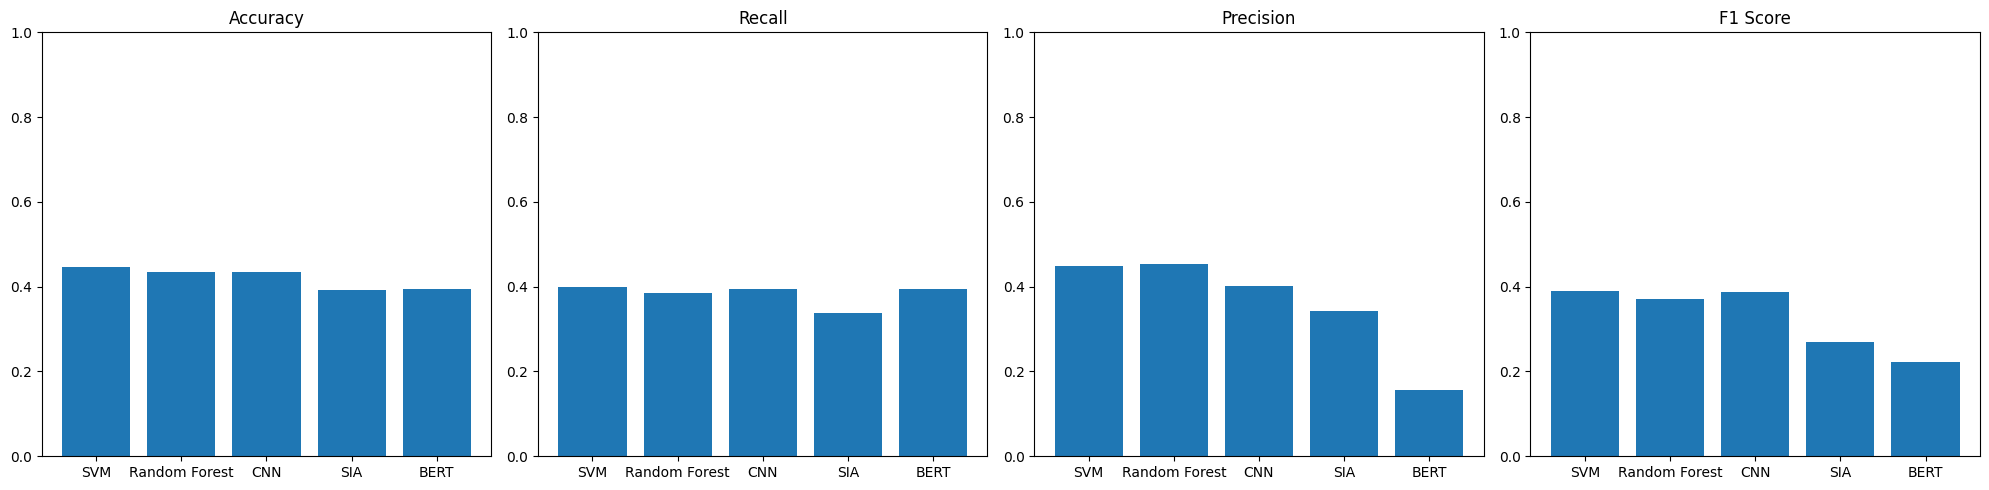

In [ ]:
import matplotlib.pyplot as plt

# # Accuracies obtained from the models
model_metrics["BERT"] = {'Accuracy': 0.3947, 'Recall':0.3947, 'Precision':0.15575 , 'F1 Score':0.22335}
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5))

for i, metric in enumerate(metrics):
    values = [model_metrics[model][metric] for model in model_metrics]
    axs[i].bar(model_metrics.keys(), values)
    axs[i].set_title(metric)
    axs[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [ ]:
BertEPochs = {1:0.3956,2:0.3848,3:0.3875}
